In [1]:
import sys
sys.path.append("/Users/yohei.moriya/src/")
import rakus_ml_training as rmt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/yohei.moriya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/yohei.moriya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/yohei.moriya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/yohei.moriya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/yohei.moriya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/yoh

load success rakus_ml_training


In [77]:
def fit(vec_x, vec_w):
    """
    線形回帰のモデルを組み立てて値を返します。

    :param vec_x:
    :param vec_w:
    :return:
    """
    if vec_x.shape[1] != vec_w.shape[0] :
        print(f"vec_x : {vec_x.shape}, vec_w : {vec_w.shape}")
        raise Exception('引数が不正です。')
        
    vec_y = vec_x.dot(vec_w.T)
    return vec_y


def cal_error(vec_y, vec_t):
    """
    出力の誤差を計算します

    :param vec_y:
    :param vec_t:
    :return:
    """
    if vec_y.shape[0] != vec_t.shape[0]:
        print(f"vec_y : {vec_y.shape} , vec_t : {vec_t.shape}")
        raise Exception('引数が不正です。')
    vec_dev = vec_y - vec_t
    error = np.sqrt((np.mean(vec_dev ** 2)) / 2)
#     error = (np.mean(vec_dev ** 2)) / 2
    return -error


def cal_derror(vec_x, vec_w, vec_t):
    """
    誤差の勾配を計算します。

    :param vec_x:
    :param vec_w:
    :param vec_t:
    :return:
    """
    if vec_x.shape[1] != vec_w.shape[0] and vec_x.shape[0] != vec_t[0]:
        print(f"vec_x : {vec_x.shape} , vec_w : {vec_w.shape} , vec_t : {vec_t.shape}")
        raise Exception('引数が不正です。')
    
    vec_y = fit(vec_x, vec_w)
    vec_dev = vec_y - vec_t
    vec_dcost = []
    for index_x in range(vec_x.shape[1]):
        vec_dcost.append(vec_dev * vec_x[:, index_x])

    return 2 * np.mean(np.array(vec_dcost), axis=1)


def train(vec_x, vec_w, vec_t, alpha):
    """
    ハイパーパラメータを更新します。

    :param vec_x:
    :param vec_w:
    :param vec_t:
    :param alpha:
    :return:
    """
    vec_item = cal_derror(vec_x, vec_w, vec_t) * alpha
    vec_re_w = vec_w - vec_item
    return vec_re_w


def norm(df_origin):
    """
    行列を正規化します。
    """
    vec_mean = df_origin.mean()
    vec_var = df_origin.var()
    nd_train = df_origin.values
    nd_norm = (nd_train - vec_mean.values) / np.sqrt(vec_var).values
    return pd.DataFrame(data=nd_norm, columns=df_origin.columns, index=df_origin.index)


def square(df_origin):
    """
    行列の二乗を計算します
    """
    df_origin_sq = df_origin ** 2
    df_origin_sq = df_origin_sq.rename(columns=lambda name: name + "^2")
    return df_origin_sq


def cube(df_origin):
    """
    行列の二乗を計算します
    """
    df_origin_cube = df_origin ** 3
    df_origin_cube = df_origin_cube.rename(columns=lambda name: name + "^3")
    return df_origin_cube


def choose(df_origin):
    """
    特徴量を選択します
    """
    df_choose = df_origin.drop('CHAS', axis=1)
    return df_choose


def do_cleansing(df_train, df_test):
    """
    入力されたデータを結合し、まとめて前処理を実行します。
    前処理が終了すると、元のindex番号を基準にして、データフレームを分割することで、データ集合を復元します。
    """
    if df_train.shape[1] != df_test.shape[1]:
        raise Exception('入力されたデータの特徴量数が一致しません')
    
    index_train = df_train.index.tolist()
    index_test = df_test.index.tolist()
    df_all = pd.concat([df_train, df_test])
    
    df_all_clean = df_all.copy()
    
    """
    前処理を列挙する
    """
# -----------------------------------------------------------------------------------------
#     特徴量の選択
#     df_all_clean = choose(df_all_clean)
    
#     特徴量の２乗を計算
    df_all_clean = pd.concat([df_all_clean, square(df_all_clean)], axis=1)
#     print(df_all_clean.columns)
    
#     特徴量の２乗と3乗を計算
#     df_all_clean = pd.concat([df_all_clean, square(df_all_clean), cube(df_all_clean)], axis=1)
#     print(df_all_clean.columns)
    
#     標準化
    df_all_clean = norm(df_all_clean)
# -----------------------------------------------------------------------------------------
    
    #  分割
    df_train_clean = df_all_clean.iloc[:df_train.shape[0], :]
    df_test_clean = df_all_clean.iloc[df_train.shape[0]:, :]

    if df_train_clean.shape[0] == df_train.shape[0]:
        return df_train_clean, df_test_clean
    else:
        print(f"{df_train_clean.shape[0]}, {df_train.shape[0]}")
        raise Exception('前処理した結果データの数に不整合が生じたようです。')


def run(df_train, df_label, count):
    """
    線形回帰を実行します。

    :param df_origin:
    :return:
    """
    nd_train = df_train.values
    nd_label = df_label.values
    
    vec_w = np.zeros(nd_train.shape[1])
    
#     print(nd_train.shape)
#     print(vec_w.shape)
    
    for i in range(count):
        vec_w = train(nd_train, vec_w, nd_label, 0.01)
        y = fit(nd_train, vec_w)
        error = cal_error(y, df_label.values)
        print(f"{i} : {error}")
        # TODO 勾配の差を閾値にする
        if np.abs(error) < 2:
            break

    return vec_w


0 : -16.61389094258974
1 : -16.173780712845165
2 : -15.785848506681358
3 : -15.43264672283104
4 : -15.103400883287286
5 : -14.791460300762564
6 : -14.4927037434203
7 : -14.20455503993055
8 : -13.925380063859393
9 : -13.654119109112669
10 : -13.39006339692994
11 : -13.132719403765513
12 : -12.881726538993053
13 : -12.636807173512738
14 : -12.397736265821177
15 : -12.164322854372827
16 : -11.936398734961495
17 : -11.71381149052383
18 : -11.49642016000909
19 : -11.284092510078246
20 : -11.07670328284721
21 : -10.874133040413223
22 : -10.67626737651703
23 : -10.482996356123714
24 : -10.294214098369567
25 : -10.109818451375324
26 : -9.929710727421812
27 : -9.753795479090694
28 : -9.581980304312696
29 : -9.414175672724785
30 : -9.250294768455515
31 : -9.090253346121923
32 : -8.933969597848193
33 : -8.781364029756197
34 : -8.632359346783396
35 : -8.486880344945455
36 : -8.344853810335298
37 : -8.206208424270345
38 : -8.070874674086012
39 : -7.938784769138281
40 : -7.809872561629087
41 : -7.68

426 : -3.2303224325316857
427 : -3.2298963502330453
428 : -3.2294708366976725
429 : -3.2290458902976416
430 : -3.228621509420502
431 : -3.2281976924689912
432 : -3.227774437860754
433 : -3.227351744028068
434 : -3.226929609417577
435 : -3.2265080324900284
436 : -3.2260870117200224
437 : -3.225666545595761
438 : -3.225246632618811
439 : -3.224827271303861
440 : -3.2244084601784975
441 : -3.223990197782979
442 : -3.223572482670013
443 : -3.223155313404548
444 : -3.2227386885635596
445 : -3.2223226067358506
446 : -3.2219070665218457
447 : -3.2214920665334037
448 : -3.2210776053936248
449 : -3.220663681736662
450 : -3.220250294207544
451 : -3.219837441461995
452 : -3.2194251221662618
453 : -3.219013334996945
454 : -3.2186020786408327
455 : -3.218191351794738
456 : -3.2177811531653404
457 : -3.2173714814690335
458 : -3.216962335431769
459 : -3.2165537137889104
460 : -3.2161456152850882
461 : -3.2157380386740573
462 : -3.215330982718559
463 : -3.214924446190183
464 : -3.2145184278692334
465 

822 : -3.096111742719851
823 : -3.0958431764483234
824 : -3.0955748992978305
825 : -3.095306910879411
826 : -3.095039210804831
827 : -3.0947717986865815
828 : -3.094504674137877
829 : -3.094237836772652
830 : -3.0939712862055604
831 : -3.0937050220519726
832 : -3.0934390439279733
833 : -3.0931733514503605
834 : -3.0929079442366416
835 : -3.0926428219050326
836 : -3.0923779840744574
837 : -3.0921134303645426
838 : -3.091849160395619
839 : -3.0915851737887152
840 : -3.091321470165561
841 : -3.09105804914858
842 : -3.090794910360893
843 : -3.0905320534263114
844 : -3.090269477969337
845 : -3.0900071836151626
846 : -3.0897451699896648
847 : -3.089483436719407
848 : -3.089221983431633
849 : -3.0889608097542705
850 : -3.0886999153159254
851 : -3.0884392997458794
852 : -3.0881789626740894
853 : -3.0879189037311883
854 : -3.0876591225484784
855 : -3.0873996187579316
856 : -3.087140391992189
857 : -3.086881441884556
858 : -3.0866227680690037
859 : -3.0863643701801644
860 : -3.086106247853332
86

1245 : -3.0042192145181668
1246 : -3.004045303291797
1247 : -3.0038715634018085
1248 : -3.003697994650304
1249 : -3.003524596839663
1250 : -3.0033513697725396
1251 : -3.003178313251866
1252 : -3.003005427080848
1253 : -3.002832711062967
1254 : -3.0026601650019784
1255 : -3.00248778870191
1256 : -3.0023155819670633
1257 : -3.0021435446020144
1258 : -3.0019716764116096
1259 : -3.0017999772009665
1260 : -3.001628446775475
1261 : -3.001457084940795
1262 : -3.0012858915028557
1263 : -3.001114866267857
1264 : -3.0009440090422683
1265 : -3.0007733196328257
1266 : -3.000602797846535
1267 : -3.0004324434906686
1268 : -3.0002622563727663
1269 : -3.0000922363006346
1270 : -2.9999223830823465
1271 : -2.999752696526239
1272 : -2.999583176440916
1273 : -2.9994138226352445
1274 : -2.9992446349183566
1275 : -2.999075613099647
1276 : -2.9989067569887755
1277 : -2.9987380663956618
1278 : -2.998569541130489
1279 : -2.9984011810037035
1280 : -2.9982329858260095
1281 : -2.998064955408375
1282 : -2.99789708

1664 : -2.9442493624186943
1665 : -2.9441327352365714
1666 : -2.9440162157037215
1667 : -2.9438998037047877
1668 : -2.94378349912455
1669 : -2.9436673018479285
1670 : -2.9435512117599805
1671 : -2.9434352287459022
1672 : -2.9433193526910277
1673 : -2.9432035834808286
1674 : -2.943087921000914
1675 : -2.942972365137031
1676 : -2.942856915775063
1677 : -2.94274157280103
1678 : -2.942626336101091
1679 : -2.9425112055615394
1680 : -2.9423961810688057
1681 : -2.9422812625094568
1682 : -2.942166449770195
1683 : -2.942051742737859
1684 : -2.941937141299422
1685 : -2.9418226453419942
1686 : -2.941708254752821
1687 : -2.9415939694192796
1688 : -2.941479789228887
1689 : -2.94136571406929
1690 : -2.9412517438282744
1691 : -2.9411378783937563
1692 : -2.9410241176537877
1693 : -2.940910461496555
1694 : -2.940796909810376
1695 : -2.940683462483705
1696 : -2.9405701194051272
1697 : -2.9404568804633615
1698 : -2.9403437455472607
1699 : -2.940230714545808
1700 : -2.9401177873481226
1701 : -2.9400049638

2079 : -2.9038836592094697
2080 : -2.903803226013424
2081 : -2.9037228625274953
2082 : -2.903642568680271
2083 : -2.9035623444004197
2084 : -2.90348218961669
2085 : -2.903402104257909
2086 : -2.9033220882529833
2087 : -2.9032421415308995
2088 : -2.9031622640207244
2089 : -2.9030824556516017
2090 : -2.9030027163527565
2091 : -2.902923046053491
2092 : -2.902843444683188
2093 : -2.902763912171307
2094 : -2.9026844484473893
2095 : -2.902605053441051
2096 : -2.90252572708199
2097 : -2.9024464692999805
2098 : -2.9023672800248765
2099 : -2.9022881591866088
2100 : -2.902209106715188
2101 : -2.902130122540701
2102 : -2.9020512065933133
2103 : -2.901972358803268
2104 : -2.901893579100889
2105 : -2.901814867416571
2106 : -2.901736223680793
2107 : -2.9016576478241087
2108 : -2.9015791397771484
2109 : -2.901500699470621
2110 : -2.901422326835312
2111 : -2.901344021802083
2112 : -2.9012657843018754
2113 : -2.9011876142657043
2114 : -2.9011095116246635
2115 : -2.901031476309923
2116 : -2.900953508252

2487 : -2.876134867844411
2488 : -2.876077742881841
2489 : -2.8760206641484936
2490 : -2.8759636315986583
2491 : -2.8759066451866753
2492 : -2.8758497048669334
2493 : -2.875792810593869
2494 : -2.87573596232197
2495 : -2.8756791600057694
2496 : -2.8756224035998526
2497 : -2.8755656930588516
2498 : -2.875509028337447
2499 : -2.875452409390369
2500 : -2.8753958361723955
2501 : -2.8753393086383525
2502 : -2.875282826743115
2503 : -2.8752263904416067
2504 : -2.875169999688798
2505 : -2.87511365443971
2506 : -2.87505735464941
2507 : -2.875001100273013
2508 : -2.8749448912656836
2509 : -2.8748887275826345
2510 : -2.8748326091791245
2511 : -2.874776536010462
2512 : -2.874720508032002
2513 : -2.8746645251991487
2514 : -2.8746085874673524
2515 : -2.8745526947921123
2516 : -2.8744968471289742
2517 : -2.8744410444335324
2518 : -2.8743852866614286
2519 : -2.8743295737683505
2520 : -2.8742739057100355
2521 : -2.874218282442266
2522 : -2.8741627039208746
2523 : -2.8741071701017367
2524 : -2.87405168

2904 : -2.8558305628103384
2905 : -2.855789275124827
2906 : -2.855748018258501
2907 : -2.8557067921819264
2908 : -2.855665596865699
2909 : -2.8556244322804463
2910 : -2.855583298396825
2911 : -2.855542195185522
2912 : -2.855501122617257
2913 : -2.8554600806627777
2914 : -2.855419069292863
2915 : -2.8553780884783233
2916 : -2.8553371381899963
2917 : -2.8552962183987542
2918 : -2.8552553290754963
2919 : -2.8552144701911524
2920 : -2.855173641716684
2921 : -2.8551328436230814
2922 : -2.8550920758813656
2923 : -2.8550513384625873
2924 : -2.8550106313378283
2925 : -2.8549699544781992
2926 : -2.8549293078548397
2927 : -2.854888691438923
2928 : -2.854848105201649
2929 : -2.8548075491142475
2930 : -2.8547670231479807
2931 : -2.854726527274138
2932 : -2.8546860614640406
2933 : -2.854645625689037
2934 : -2.854605219920509
2935 : -2.8545648441298637
2936 : -2.8545244982885416
2937 : -2.854484182368011
2938 : -2.8544438963397702
2939 : -2.8544036401753465
2940 : -2.8543634138462983
2941 : -2.85432

3311 : -2.8412760925382754
3312 : -2.8412452227562017
3313 : -2.841214374004124
3314 : -2.8411835462626573
3315 : -2.8411527395124336
3316 : -2.8411219537341075
3317 : -2.8410911889083508
3318 : -2.8410604450158563
3319 : -2.8410297220373364
3320 : -2.8409990199535224
3321 : -2.8409683387451645
3322 : -2.8409376783930345
3323 : -2.8409070388779205
3324 : -2.8408764201806336
3325 : -2.840845822282002
3326 : -2.840815245162873
3327 : -2.840784688804115
3328 : -2.840754153186615
3329 : -2.8407236382912786
3330 : -2.8406931440990317
3331 : -2.840662670590819
3332 : -2.840632217747605
3333 : -2.8406017855503727
3334 : -2.8405713739801244
3335 : -2.8405409830178825
3336 : -2.8405106126446875
3337 : -2.8404802628415995
3338 : -2.840449933589698
3339 : -2.8404196248700817
3340 : -2.8403893366638675
3341 : -2.840359068952193
3342 : -2.8403288217162124
3343 : -2.8402985949371025
3344 : -2.840268388596055
3345 : -2.840238202674283
3346 : -2.840208037153019
3347 : -2.840177892013514
3348 : -2.8401

3724 : -2.8301116434716223
3725 : -2.8300880155115933
3726 : -2.8300644020254153
3727 : -2.830040803000264
3728 : -2.830017218423328
3729 : -2.8299936482818073
3730 : -2.8299700925629163
3731 : -2.8299465512538804
3732 : -2.829923024341939
3733 : -2.829899511814343
3734 : -2.8298760136583567
3735 : -2.8298525298612565
3736 : -2.8298290604103307
3737 : -2.829805605292883
3738 : -2.829782164496225
3739 : -2.829758738007685
3740 : -2.8297353258146027
3741 : -2.8297119279043286
3742 : -2.8296885442642266
3743 : -2.829665174881675
3744 : -2.8296418197440616
3745 : -2.829618478838788
3746 : -2.8295951521532685
3747 : -2.82957183967493
3748 : -2.8295485413912114
3749 : -2.8295252572895624
3750 : -2.829501987357448
3751 : -2.829478731582344
3752 : -2.8294554899517377
3753 : -2.8294322624531314
3754 : -2.8294090490740365
3755 : -2.8293858498019797
3756 : -2.8293626646244974
3757 : -2.82933949352914
3758 : -2.8293163365034695
3759 : -2.8292931935350607
3760 : -2.8292700646115003
3761 : -2.829246

4149 : -2.82122652285225
4150 : -2.821208035499207
4151 : -2.8211895581605253
4152 : -2.8211710908277348
4153 : -2.8211526334923747
4154 : -2.821134186145993
4155 : -2.821115748780144
4156 : -2.8210973213863912
4157 : -2.821078903956307
4158 : -2.8210604964814707
4159 : -2.8210420989534692
4160 : -2.821023711363899
4161 : -2.821005333704365
4162 : -2.8209869659664784
4163 : -2.8209686081418592
4164 : -2.8209502602221366
4165 : -2.8209319221989455
4166 : -2.8209135940639314
4167 : -2.820895275808746
4168 : -2.8208769674250505
4169 : -2.820858668904513
4170 : -2.82084038023881
4171 : -2.8208221014196257
4172 : -2.8208038324386524
4173 : -2.820785573287592
4174 : -2.8207673239581514
4175 : -2.820749084442049
4176 : -2.8207308547310075
4177 : -2.82071263481676
4178 : -2.820694424691047
4179 : -2.820676224345616
4180 : -2.820658033772225
4181 : -2.820639852962637
4182 : -2.820621681908624
4183 : -2.820603520601966
4184 : -2.8205853690344522
4185 : -2.8205672271978774
4186 : -2.8205490950840

4573 : -2.814189073418477
4574 : -2.8141741655092303
4575 : -2.814159264661183
4576 : -2.814144370868679
4577 : -2.8141294841260702
4578 : -2.814114604427711
4579 : -2.8140997317679646
4580 : -2.8140848661411964
4581 : -2.8140700075417784
4582 : -2.8140551559640885
4583 : -2.8140403114025077
4584 : -2.814025473851425
4585 : -2.8140106433052336
4586 : -2.8139958197583304
4587 : -2.8139810032051207
4588 : -2.813966193640012
4589 : -2.813951391057419
4590 : -2.8139365954517612
4591 : -2.8139218068174627
4592 : -2.8139070251489535
4593 : -2.8138922504406683
4594 : -2.8138774826870483
4595 : -2.813862721882538
4596 : -2.8138479680215887
4597 : -2.813833221098656
4598 : -2.813818481108202
4599 : -2.813803748044692
4600 : -2.813789021902597
4601 : -2.8137743026763955
4602 : -2.8137595903605677
4603 : -2.813744884949602
4604 : -2.81373018643799
4605 : -2.8137154948202294
4606 : -2.8137008100908227
4607 : -2.813686132244278
4608 : -2.8136714612751073
4609 : -2.81365679717783
4610 : -2.813642139

4976 : -2.8086972685053797
4977 : -2.808684800494853
4978 : -2.8086723376455063
4979 : -2.8086598799534523
4980 : -2.8086474274148063
4981 : -2.8086349800256882
4982 : -2.8086225377822216
4983 : -2.8086101006805326
4984 : -2.8085976687167515
4985 : -2.8085852418870116
4986 : -2.808572820187451
4987 : -2.80856040361421
4988 : -2.8085479921634335
4989 : -2.8085355858312684
4990 : -2.808523184613867
4991 : -2.808510788507384
4992 : -2.808498397507978
4993 : -2.8084860116118113
4994 : -2.808473630815049
4995 : -2.80846125511386
4996 : -2.808448884504417
4997 : -2.808436518982897
4998 : -2.808424158545478
4999 : -2.8084118031883443
5000 : -2.808399452907682
5001 : -2.808387107699682
5002 : -2.808374767560536
5003 : -2.8083624324864433
5004 : -2.808350102473603
5005 : -2.808337777518219
5006 : -2.8083254576164998
5007 : -2.8083131427646557
5008 : -2.8083008329589014
5009 : -2.8082885281954555
5010 : -2.808276228470538
5011 : -2.808263933780374
5012 : -2.8082516441211927
5013 : -2.80823935948

5402 : -2.8038078279579866
5403 : -2.8037972479812647
5404 : -2.8037866717922766
5405 : -2.80377609938838
5406 : -2.8037655307669325
5407 : -2.8037549659252967
5408 : -2.803744404860836
5409 : -2.803733847570917
5410 : -2.803723294052907
5411 : -2.8037127443041787
5412 : -2.803702198322104
5413 : -2.8036916561040583
5414 : -2.803681117647421
5415 : -2.8036705829495707
5416 : -2.8036600520078907
5417 : -2.803649524819766
5418 : -2.8036390013825834
5419 : -2.8036284816937336
5420 : -2.8036179657506066
5421 : -2.803607453550598
5422 : -2.8035969450911042
5423 : -2.8035864403695236
5424 : -2.8035759393832578
5425 : -2.8035654421297105
5426 : -2.803554948606286
5427 : -2.803544458810394
5428 : -2.8035339727394453
5429 : -2.8035234903908512
5430 : -2.803513011762027
5431 : -2.8035025368503903
5432 : -2.8034920656533613
5433 : -2.8034815981683616
5434 : -2.8034711343928147
5435 : -2.8034606743241475
5436 : -2.80345021795979
5437 : -2.803439765297172
5438 : -2.8034293163337267
5439 : -2.803418

5818 : -2.7997047132836084
5819 : -2.7996955063532756
5820 : -2.7996863022901786
5821 : -2.7996771010924824
5822 : -2.799667902758356
5823 : -2.799658707285968
5824 : -2.7996495146734897
5825 : -2.7996403249190935
5826 : -2.799631138020954
5827 : -2.799621953977247
5828 : -2.7996127727861486
5829 : -2.799603594445839
5830 : -2.799594418954498
5831 : -2.7995852463103086
5832 : -2.7995760765114532
5833 : -2.799566909556117
5834 : -2.799557745442488
5835 : -2.7995485841687535
5836 : -2.7995394257331028
5837 : -2.7995302701337286
5838 : -2.799521117368823
5839 : -2.799511967436581
5840 : -2.7995028203351993
5841 : -2.7994936760628737
5842 : -2.799484534617805
5843 : -2.799475395998194
5844 : -2.7994662602022427
5845 : -2.7994571272281537
5846 : -2.7994479970741346
5847 : -2.799438869738391
5848 : -2.7994297452191317
5849 : -2.7994206235145667
5850 : -2.7994115046229084
5851 : -2.7994023885423687
5852 : -2.799393275271163
5853 : -2.7993841648075075
5854 : -2.79937505714962
5855 : -2.7993659

6235 : -2.7960939379923473
6236 : -2.7960857849444625
6237 : -2.79607763412032
6238 : -2.7960694855186334
6239 : -2.7960613391381166
6240 : -2.796053194977484
6241 : -2.7960450530354537
6242 : -2.796036913310742
6243 : -2.796028775802068
6244 : -2.796020640508151
6245 : -2.796012507427711
6246 : -2.796004376559471
6247 : -2.7959962479021536
6248 : -2.7959881214544824
6249 : -2.795979997215181
6250 : -2.7959718751829783
6251 : -2.795963755356598
6252 : -2.795955637734771
6253 : -2.795947522316225
6254 : -2.7959394090996903
6255 : -2.7959312980838984
6256 : -2.7959231892675818
6257 : -2.7959150826494734
6258 : -2.795906978228308
6259 : -2.795898876002821
6260 : -2.795890775971749
6261 : -2.7958826781338297
6262 : -2.7958745824878015
6263 : -2.7958664890324036
6264 : -2.795858397766377
6265 : -2.7958503086884647
6266 : -2.7958422217974084
6267 : -2.7958341370919513
6268 : -2.7958260545708398
6269 : -2.7958179742328193
6270 : -2.7958098960766358
6271 : -2.7958018201010386
6272 : -2.7957937

6640 : -2.7929608370163925
6641 : -2.792953490068528
6642 : -2.7929461449009696
6643 : -2.7929388015127925
6644 : -2.792931459903073
6645 : -2.7929241200708876
6646 : -2.7929167820153142
6647 : -2.7929094457354315
6648 : -2.792902111230318
6649 : -2.7928947784990537
6650 : -2.79288744754072
6651 : -2.7928801183543968
6652 : -2.792872790939167
6653 : -2.7928654652941134
6654 : -2.792858141418319
6655 : -2.7928508193108685
6656 : -2.7928434989708464
6657 : -2.7928361803973387
6658 : -2.792828863589432
6659 : -2.792821548546213
6660 : -2.79281423526677
6661 : -2.7928069237501907
6662 : -2.792799613995565
6663 : -2.7927923060019837
6664 : -2.7927849997685366
6665 : -2.7927776952943155
6666 : -2.7927703925784124
6667 : -2.7927630916199213
6668 : -2.7927557924179336
6669 : -2.792748494971546
6670 : -2.792741199279852
6671 : -2.792733905341949
6672 : -2.792726613156932
6673 : -2.792719322723899
6674 : -2.7927120340419482
6675 : -2.7927047471101774
6676 : -2.792697461927687
6677 : -2.792690178

7054 : -2.7900613730617607
7055 : -2.790054692027668
7056 : -2.7900480124469995
7057 : -2.790041334319085
7058 : -2.7900346576432558
7059 : -2.790027982418843
7060 : -2.7900213086451786
7061 : -2.790014636321594
7062 : -2.7900079654474226
7063 : -2.7900012960219973
7064 : -2.789994628044653
7065 : -2.7899879615147216
7066 : -2.78998129643154
7067 : -2.789974632794443
7068 : -2.7899679706027656
7069 : -2.789961309855845
7070 : -2.7899546505530166
7071 : -2.7899479926936195
7072 : -2.7899413362769896
7073 : -2.7899346813024666
7074 : -2.7899280277693888
7075 : -2.7899213756770953
7076 : -2.7899147250249254
7077 : -2.789908075812221
7078 : -2.789901428038321
7079 : -2.7898947817025683
7080 : -2.789888136804303
7081 : -2.7898814933428686
7082 : -2.7898748513176073
7083 : -2.7898682107278625
7084 : -2.789861571572978
7085 : -2.789854933852298
7086 : -2.789848297565167
7087 : -2.789841662710931
7088 : -2.789835029288935
7089 : -2.7898283972985247
7090 : -2.7898217667390486
7091 : -2.78981513

7461 : -2.7874553377332623
7462 : -2.787449198089525
7463 : -2.787443059663923
7464 : -2.7874369224559583
7465 : -2.7874307864651353
7466 : -2.787424651690959
7467 : -2.7874185181329336
7468 : -2.7874123857905637
7469 : -2.7874062546633547
7470 : -2.7874001247508136
7471 : -2.7873939960524456
7472 : -2.7873878685677567
7473 : -2.7873817422962537
7474 : -2.787375617237445
7475 : -2.787369493390837
7476 : -2.7873633707559375
7477 : -2.7873572493322554
7478 : -2.7873511291192994
7479 : -2.787345010116577
7480 : -2.787338892323599
7481 : -2.7873327757398743
7482 : -2.7873266603649123
7483 : -2.7873205461982242
7484 : -2.78731443323932
7485 : -2.787308321487712
7486 : -2.7873022109429093
7487 : -2.7872961016044253
7488 : -2.7872899934717714
7489 : -2.78728388654446
7490 : -2.7872777808220053
7491 : -2.787271676303918
7492 : -2.7872655729897127
7493 : -2.7872594708789027
7494 : -2.7872533699710025
7495 : -2.787247270265527
7496 : -2.7872411717619903
7497 : -2.787235074459907
7498 : -2.787228

7902 : -2.784859402063971
7903 : -2.7848537560409627
7904 : -2.7848481110475567
7905 : -2.784842467083387
7906 : -2.7848368241480856
7907 : -2.784831182241289
7908 : -2.7848255413626295
7909 : -2.7848199015117414
7910 : -2.784814262688261
7911 : -2.784808624891822
7912 : -2.78480298812206
7913 : -2.7847973523786096
7914 : -2.7847917176611072
7915 : -2.784786083969188
7916 : -2.7847804513024887
7917 : -2.784774819660646
7918 : -2.784769189043295
7919 : -2.784763559450074
7920 : -2.7847579308806196
7921 : -2.7847523033345687
7922 : -2.7847466768115594
7923 : -2.7847410513112285
7924 : -2.784735426833215
7925 : -2.784729803377157
7926 : -2.7847241809426926
7927 : -2.784718559529461
7928 : -2.7847129391371004
7929 : -2.784707319765251
7930 : -2.7847017014135513
7931 : -2.784696084081642
7932 : -2.7846904677691615
7933 : -2.7846848524757513
7934 : -2.7846792382010515
7935 : -2.7846736249447024
7936 : -2.784668012706345
7937 : -2.78466240148562
7938 : -2.7846567912821696
7939 : -2.7846511820

8360 : -2.7823758500770013
8361 : -2.7823706407585886
8362 : -2.7823654323242746
8363 : -2.782360224773786
8364 : -2.7823550181068475
8365 : -2.782349812323185
8366 : -2.7823446074225258
8367 : -2.782339403404594
8368 : -2.782334200269118
8369 : -2.782328998015823
8370 : -2.7823237966444356
8371 : -2.7823185961546835
8372 : -2.782313396546293
8373 : -2.7823081978189914
8374 : -2.782302999972506
8375 : -2.782297803006565
8376 : -2.7822926069208953
8377 : -2.7822874117152248
8378 : -2.782282217389281
8379 : -2.7822770239427936
8380 : -2.7822718313754895
8381 : -2.782266639687097
8382 : -2.782261448877346
8383 : -2.7822562589459645
8384 : -2.7822510698926814
8385 : -2.782245881717227
8386 : -2.7822406944193276
8387 : -2.7822355079987164
8388 : -2.78223032245512
8389 : -2.7822251377882696
8390 : -2.782219953997896
8391 : -2.782214771083727
8392 : -2.782209589045494
8393 : -2.7822044078829284
8394 : -2.7821992275957594
8395 : -2.782194048183718
8396 : -2.7821888696465353
8397 : -2.782183691

8822 : -2.7800590994131436
8823 : -2.780054271781657
8824 : -2.780049444923049
8825 : -2.780044618837109
8826 : -2.780039793523627
8827 : -2.7800349689823918
8828 : -2.780030145213193
8829 : -2.7800253222158204
8830 : -2.780020499990064
8831 : -2.780015678535713
8832 : -2.780010857852558
8833 : -2.7800060379403897
8834 : -2.780001218798997
8835 : -2.779996400428171
8836 : -2.779991582827702
8837 : -2.7799867659973807
8838 : -2.7799819499369978
8839 : -2.779977134646344
8840 : -2.7799723201252102
8841 : -2.7799675063733877
8842 : -2.7799626933906674
8843 : -2.779957881176841
8844 : -2.779953069731699
8845 : -2.7799482590550335
8846 : -2.779943449146636
8847 : -2.7799386400062978
8848 : -2.779933831633812
8849 : -2.779929024028969
8850 : -2.7799242171915615
8851 : -2.779919411121382
8852 : -2.779914605818222
8853 : -2.779909801281874
8854 : -2.7799049975121313
8855 : -2.779900194508786
8856 : -2.77989539227163
8857 : -2.779890590800458
8858 : -2.7798857900950615
8859 : -2.779880990155233

9271 : -2.7779662452803757
9272 : -2.7779617450424507
9273 : -2.777957245493015
9274 : -2.777952746631901
9275 : -2.777948248458941
9276 : -2.777943750973968
9277 : -2.7779392541768146
9278 : -2.7779347580673135
9279 : -2.777930262645297
9280 : -2.7779257679106
9281 : -2.7779212738630537
9282 : -2.777916780502492
9283 : -2.777912287828748
9284 : -2.7779077958416547
9285 : -2.777903304541047
9286 : -2.7778988139267558
9287 : -2.7778943239986167
9288 : -2.7778898347564622
9289 : -2.7778853462001267
9290 : -2.7778808583294436
9291 : -2.777876371144248
9292 : -2.7778718846443717
9293 : -2.77786739882965
9294 : -2.777862913699916
9295 : -2.7778584292550064
9296 : -2.7778539454947526
9297 : -2.77784946241899
9298 : -2.7778449800275533
9299 : -2.777840498320277
9300 : -2.7778360172969956
9301 : -2.7778315369575437
9302 : -2.7778270573017565
9303 : -2.777822578329467
9304 : -2.7778181000405127
9305 : -2.7778136224347265
9306 : -2.7778091455119442
9307 : -2.7778046692720015
9308 : -2.7778001937

9683 : -2.7761685909216913
9684 : -2.7761643610289886
9685 : -2.776160131761972
9686 : -2.7761559031205034
9687 : -2.776151675104445
9688 : -2.7761474477136563
9689 : -2.776143220948
9690 : -2.776138994807338
9691 : -2.776134769291531
9692 : -2.7761305444004405
9693 : -2.7761263201339292
9694 : -2.7761220964918585
9695 : -2.7761178734740892
9696 : -2.7761136510804847
9697 : -2.776109429310906
9698 : -2.7761052081652147
9699 : -2.7761009876432743
9700 : -2.776096767744946
9701 : -2.7760925484700913
9702 : -2.776088329818574
9703 : -2.776084111790255
9704 : -2.776079894384997
9705 : -2.776075677602662
9706 : -2.7760714614431143
9707 : -2.776067245906215
9708 : -2.776063030991826
9709 : -2.7760588166998112
9710 : -2.7760546030300333
9711 : -2.776050389982354
9712 : -2.776046177556637
9713 : -2.7760419657527446
9714 : -2.776037754570541
9715 : -2.7760335440098878
9716 : -2.776029334070648
9717 : -2.7760251247526857
9718 : -2.7760209160558635
9719 : -2.7760167079800446
9720 : -2.77601250052

10091 : -2.77449324996654
10092 : -2.7744892644646533
10093 : -2.7744852795363943
10094 : -2.774481295181647
10095 : -2.7744773114002923
10096 : -2.7744733281922147
10097 : -2.7744693455572955
10098 : -2.774465363495419
10099 : -2.774461382006467
10100 : -2.7744574010903222
10101 : -2.774453420746868
10102 : -2.774449440975987
10103 : -2.774445461777563
10104 : -2.774441483151478
10105 : -2.7744375050976156
10106 : -2.7744335276158587
10107 : -2.7744295507060914
10108 : -2.774425574368196
10109 : -2.7744215986020557
10110 : -2.7744176234075546
10111 : -2.7744136487845754
10112 : -2.7744096747330014
10113 : -2.7744057012527175
10114 : -2.7744017283436047
10115 : -2.774397756005549
10116 : -2.7743937842384323
10117 : -2.774389813042139
10118 : -2.7743858424165526
10119 : -2.774381872361557
10120 : -2.7743779028770357
10121 : -2.774373933962873
10122 : -2.7743699656189524
10123 : -2.7743659978451576
10124 : -2.774362030641373
10125 : -2.774358064007482
10126 : -2.774354097943369
10127 : -

10552 : -2.7727149303826195
10553 : -2.7727111975598353
10554 : -2.7727074652609254
10555 : -2.7727037334857907
10556 : -2.77270000223433
10557 : -2.772696271506446
10558 : -2.772692541302039
10559 : -2.772688811621009
10560 : -2.772685082463257
10561 : -2.772681353828685
10562 : -2.772677625717194
10563 : -2.7726738981286836
10564 : -2.7726701710630555
10565 : -2.772666444520211
10566 : -2.77266271850005
10567 : -2.7726589930024756
10568 : -2.7726552680273873
10569 : -2.772651543574687
10570 : -2.7726478196442756
10571 : -2.7726440962360543
10572 : -2.772640373349925
10573 : -2.772636650985788
10574 : -2.7726329291435454
10575 : -2.772629207823099
10576 : -2.7726254870243485
10577 : -2.772621766747197
10578 : -2.772618046991545
10579 : -2.7726143277572946
10580 : -2.7726106090443468
10581 : -2.7726068908526034
10582 : -2.772603173181967
10583 : -2.7725994560323373
10584 : -2.7725957394036174
10585 : -2.7725920232957084
10586 : -2.7725883077085123
10587 : -2.7725845926419312
10588 : -2

11007 : -2.771069112147006
11008 : -2.771065607924228
11009 : -2.7710621041833408
11010 : -2.7710586009242597
11011 : -2.7710550981468978
11012 : -2.7710515958511706
11013 : -2.771048094036991
11014 : -2.771044592704274
11015 : -2.771041091852934
11016 : -2.771037591482885
11017 : -2.771034091594041
11018 : -2.771030592186318
11019 : -2.7710270932596286
11020 : -2.771023594813889
11021 : -2.7710200968490124
11022 : -2.7710165993649127
11023 : -2.7710131023615063
11024 : -2.7710096058387066
11025 : -2.7710061097964283
11026 : -2.7710026142345865
11027 : -2.770999119153095
11028 : -2.770995624551869
11029 : -2.770992130430823
11030 : -2.770988636789872
11031 : -2.7709851436289306
11032 : -2.7709816509479133
11033 : -2.770978158746735
11034 : -2.770974667025311
11035 : -2.770971175783555
11036 : -2.770967685021384
11037 : -2.77096419473871
11038 : -2.7709607049354497
11039 : -2.770957215611518
11040 : -2.7709537267668294
11041 : -2.770950238401299
11042 : -2.7709467505148426
11043 : -2.77

11457 : -2.7695396421460545
11458 : -2.7695363464744016
11459 : -2.7695330512484473
11460 : -2.7695297564681165
11461 : -2.7695264621333333
11462 : -2.7695231682440222
11463 : -2.7695198748001086
11464 : -2.769516581801516
11465 : -2.76951328924817
11466 : -2.7695099971399952
11467 : -2.7695067054769162
11468 : -2.7695034142588573
11469 : -2.7695001234857437
11470 : -2.7694968331574996
11471 : -2.7694935432740504
11472 : -2.7694902538353205
11473 : -2.7694869648412355
11474 : -2.7694836762917197
11475 : -2.769480388186697
11476 : -2.7694771005260943
11477 : -2.7694738133098347
11478 : -2.7694705265378436
11479 : -2.769467240210047
11480 : -2.769463954326368
11481 : -2.769460668886734
11482 : -2.7694573838910674
11483 : -2.769454099339295
11484 : -2.769450815231342
11485 : -2.7694475315671316
11486 : -2.76944424834659
11487 : -2.7694409655696433
11488 : -2.7694376832362155
11489 : -2.7694344013462313
11490 : -2.7694311198996173
11491 : -2.769427838896297
11492 : -2.7694245583361976
1149

11918 : -2.7680664073591177
11919 : -2.7680633094688045
11920 : -2.768060211991423
11921 : -2.7680571149269046
11922 : -2.768054018275184
11923 : -2.7680509220361924
11924 : -2.7680478262098647
11925 : -2.7680447307961327
11926 : -2.76804163579493
11927 : -2.768038541206189
11928 : -2.768035447029844
11929 : -2.7680323532658266
11930 : -2.7680292599140714
11931 : -2.7680261669745105
11932 : -2.768023074447078
11933 : -2.768019982331706
11934 : -2.768016890628329
11935 : -2.7680137993368787
11936 : -2.76801070845729
11937 : -2.7680076179894946
11938 : -2.7680045279334267
11939 : -2.7680014382890192
11940 : -2.767998349056206
11941 : -2.7679952602349194
11942 : -2.7679921718250933
11943 : -2.767989083826661
11944 : -2.7679859962395565
11945 : -2.7679829090637122
11946 : -2.7679798222990617
11947 : -2.7679767359455387
11948 : -2.7679736500030763
11949 : -2.7679705644716086
11950 : -2.7679674793510682
11951 : -2.767964394641389
11952 : -2.7679613103425047
11953 : -2.7679582264543487
11954 

12373 : -2.766698499462351
12374 : -2.7666955827773703
12375 : -2.766692666476413
12376 : -2.7666897505594203
12377 : -2.7666868350263307
12378 : -2.7666839198770847
12379 : -2.766681005111622
12380 : -2.766678090729882
12381 : -2.7666751767318054
12382 : -2.7666722631173313
12383 : -2.7666693498863992
12384 : -2.7666664370389498
12385 : -2.7666635245749225
12386 : -2.766660612494257
12387 : -2.7666577007968938
12388 : -2.766654789482772
12389 : -2.7666518785518326
12390 : -2.7666489680040143
12391 : -2.7666460578392575
12392 : -2.766643148057503
12393 : -2.7666402386586895
12394 : -2.766637329642758
12395 : -2.7666344210096474
12396 : -2.7666315127592993
12397 : -2.7666286048916517
12398 : -2.7666256974066465
12399 : -2.766622790304222
12400 : -2.76661988358432
12401 : -2.76661697724688
12402 : -2.766614071291841
12403 : -2.766611165719145
12404 : -2.7666082605287303
12405 : -2.766605355720538
12406 : -2.7666024512945087
12407 : -2.766599547250581
12408 : -2.766596643588697
12409 : -2

12825 : -2.7654184009056397
12826 : -2.7654156518545463
12827 : -2.7654129031615335
12828 : -2.765410154826547
12829 : -2.765407406849532
12830 : -2.765404659230434
12831 : -2.7654019119691986
12832 : -2.7653991650657708
12833 : -2.765396418520095
12834 : -2.765393672332118
12835 : -2.7653909265017846
12836 : -2.765388181029041
12837 : -2.7653854359138315
12838 : -2.765382691156102
12839 : -2.765379946755798
12840 : -2.7653772027128647
12841 : -2.7653744590272478
12842 : -2.765371715698893
12843 : -2.765368972727745
12844 : -2.7653662301137505
12845 : -2.7653634878568534
12846 : -2.765360745957001
12847 : -2.765358004414137
12848 : -2.7653552632282086
12849 : -2.7653525223991604
12850 : -2.7653497819269384
12851 : -2.7653470418114874
12852 : -2.765344302052754
12853 : -2.7653415626506836
12854 : -2.7653388236052208
12855 : -2.765336084916313
12856 : -2.765333346583904
12857 : -2.7653306086079406
12858 : -2.7653278709883677
12859 : -2.7653251337251317
12860 : -2.765322396818178
12861 : 

13247 : -2.7642894442395227
13248 : -2.764286841576285
13249 : -2.7642842392490063
13250 : -2.764281637257637
13251 : -2.7642790356021267
13252 : -2.7642764342824253
13253 : -2.7642738332984824
13254 : -2.764271232650248
13255 : -2.7642686323376715
13256 : -2.764266032360703
13257 : -2.7642634327192925
13258 : -2.76426083341339
13259 : -2.764258234442944
13260 : -2.764255635807906
13261 : -2.7642530375082246
13262 : -2.7642504395438503
13263 : -2.7642478419147327
13264 : -2.7642452446208226
13265 : -2.7642426476620683
13266 : -2.764240051038421
13267 : -2.76423745474983
13268 : -2.7642348587962453
13269 : -2.7642322631776173
13270 : -2.7642296678938947
13271 : -2.7642270729450287
13272 : -2.764224478330969
13273 : -2.7642218840516652
13274 : -2.764219290107068
13275 : -2.7642166964971264
13276 : -2.7642141032217915
13277 : -2.764211510281012
13278 : -2.764208917674739
13279 : -2.7642063254029217
13280 : -2.764203733465511
13281 : -2.764201141862457
13282 : -2.764198550593709
13283 : -2

13712 : -2.763114630671677
13713 : -2.7631121789648634
13714 : -2.763109727571644
13715 : -2.763107276491972
13716 : -2.763104825725802
13717 : -2.763102375273089
13718 : -2.7630999251337856
13719 : -2.763097475307846
13720 : -2.763095025795225
13721 : -2.763092576595875
13722 : -2.7630901277097517
13723 : -2.7630876791368086
13724 : -2.763085230876999
13725 : -2.763082782930278
13726 : -2.7630803352965994
13727 : -2.763077887975917
13728 : -2.763075440968185
13729 : -2.763072994273357
13730 : -2.763070547891388
13731 : -2.7630681018222316
13732 : -2.7630656560658418
13733 : -2.7630632106221724
13734 : -2.7630607654911787
13735 : -2.7630583206728137
13736 : -2.7630558761670323
13737 : -2.7630534319737885
13738 : -2.7630509880930356
13739 : -2.7630485445247293
13740 : -2.7630461012688223
13741 : -2.7630436583252695
13742 : -2.7630412156940247
13743 : -2.7630387733750426
13744 : -2.7630363313682778
13745 : -2.763033889673683
13746 : -2.7630314482912137
13747 : -2.7630290072208235
13748 :

14126 : -2.762125902971893
14127 : -2.7621235772535795
14128 : -2.762121251830494
14129 : -2.7621189267025943
14130 : -2.762116601869838
14131 : -2.762114277332182
14132 : -2.762111953089585
14133 : -2.762109629142002
14134 : -2.7621073054893923
14135 : -2.762104982131712
14136 : -2.762102659068918
14137 : -2.762100336300969
14138 : -2.7620980138278215
14139 : -2.762095691649433
14140 : -2.762093369765761
14141 : -2.762091048176762
14142 : -2.762088726882395
14143 : -2.7620864058826156
14144 : -2.7620840851773822
14145 : -2.762081764766652
14146 : -2.7620794446503827
14147 : -2.762077124828531
14148 : -2.762074805301055
14149 : -2.762072486067911
14150 : -2.7620701671290573
14151 : -2.762067848484452
14152 : -2.7620655301340507
14153 : -2.762063212077812
14154 : -2.7620608943156935
14155 : -2.762058576847652
14156 : -2.7620562596736455
14157 : -2.762053942793631
14158 : -2.7620516262075667
14159 : -2.762049309915409
14160 : -2.7620469939171164
14161 : -2.762044678212646
14162 : -2.7620

14535 : -2.7611988414920816
14536 : -2.7611966330386597
14537 : -2.7611944248635876
14538 : -2.761192216966827
14539 : -2.761190009348337
14540 : -2.761187802008078
14541 : -2.7611855949460105
14542 : -2.761183388162094
14543 : -2.7611811816562897
14544 : -2.761178975428557
14545 : -2.761176769478856
14546 : -2.7611745638071477
14547 : -2.761172358413392
14548 : -2.761170153297549
14549 : -2.761167948459579
14550 : -2.761165743899442
14551 : -2.761163539617099
14552 : -2.7611613356125084
14553 : -2.7611591318856332
14554 : -2.761156928436432
14555 : -2.761154725264865
14556 : -2.761152522370893
14557 : -2.7611503197544756
14558 : -2.761148117415574
14559 : -2.7611459153541484
14560 : -2.761143713570158
14561 : -2.7611415120635656
14562 : -2.761139310834329
14563 : -2.761137109882409
14564 : -2.7611349092077666
14565 : -2.761132708810362
14566 : -2.7611305086901554
14567 : -2.7611283088471072
14568 : -2.761126109281178
14569 : -2.7611239099923277
14570 : -2.761121710980517
14571 : -2.76

14966 : -2.7602722729106506
14967 : -2.7602701808219243
14968 : -2.760268088994983
14969 : -2.760265997429788
14970 : -2.7602639061263035
14971 : -2.760261815084493
14972 : -2.760259724304318
14973 : -2.7602576337857423
14974 : -2.7602555435287286
14975 : -2.7602534535332395
14976 : -2.760251363799238
14977 : -2.7602492743266884
14978 : -2.760247185115552
14979 : -2.7602450961657925
14980 : -2.7602430074773734
14981 : -2.760240919050256
14982 : -2.7602388308844055
14983 : -2.7602367429797834
14984 : -2.7602346553363533
14985 : -2.7602325679540782
14986 : -2.76023048083292
14987 : -2.760228393972844
14988 : -2.760226307373811
14989 : -2.7602242210357852
14990 : -2.76022213495873
14991 : -2.760220049142608
14992 : -2.7602179635873814
14993 : -2.7602158782930144
14994 : -2.76021379325947
14995 : -2.7602117084867106
14996 : -2.7602096239746996
14997 : -2.7602075397234
14998 : -2.7602054557327755
14999 : -2.7602033720027888
15000 : -2.760201288533403
15001 : -2.7601992053245805
15002 : -2.7

15410 : -2.7593686032118923
15411 : -2.759366623794687
15412 : -2.7593646446233815
15413 : -2.75936266569794
15414 : -2.7593606870183294
15415 : -2.7593587085845135
15416 : -2.759356730396459
15417 : -2.7593547524541306
15418 : -2.759352774757495
15419 : -2.7593507973065154
15420 : -2.75934882010116
15421 : -2.759346843141393
15422 : -2.7593448664271802
15423 : -2.7593428899584866
15424 : -2.759340913735279
15425 : -2.7593389377575215
15426 : -2.7593369620251806
15427 : -2.7593349865382217
15428 : -2.7593330112966097
15429 : -2.7593310363003116
15430 : -2.7593290615492916
15431 : -2.759327087043516
15432 : -2.7593251127829497
15433 : -2.759323138767559
15434 : -2.7593211649973095
15435 : -2.7593191914721658
15436 : -2.7593172181920953
15437 : -2.759315245157062
15438 : -2.7593132723670326
15439 : -2.759311299821972
15440 : -2.759309327521846
15441 : -2.7593073554666208
15442 : -2.7593053836562613
15443 : -2.759303412090733
15444 : -2.7593014407700025
15445 : -2.759299469694035
15446 : 

15871 : -2.7584816146675952
15872 : -2.758479745037403
15873 : -2.7584778756377633
15874 : -2.7584760064686438
15875 : -2.7584741375300137
15876 : -2.758472268821839
15877 : -2.758470400344089
15878 : -2.7584685320967304
15879 : -2.7584666640797333
15880 : -2.7584647962930635
15881 : -2.75846292873669
15882 : -2.75846106141058
15883 : -2.7584591943147014
15884 : -2.7584573274490234
15885 : -2.7584554608135132
15886 : -2.758453594408138
15887 : -2.7584517282328673
15888 : -2.758449862287668
15889 : -2.758447996572508
15890 : -2.7584461310873563
15891 : -2.7584442658321793
15892 : -2.758442400806947
15893 : -2.7584405360116255
15894 : -2.758438671446184
15895 : -2.7584368071105896
15896 : -2.758434943004811
15897 : -2.7584330791288165
15898 : -2.758431215482573
15899 : -2.7584293520660497
15900 : -2.758427488879214
15901 : -2.7584256259220337
15902 : -2.7584237631944775
15903 : -2.758421900696513
15904 : -2.7584200384281083
15905 : -2.7584181763892315
15906 : -2.758416314579851
15907 : -

16311 : -2.7576807990996883
16312 : -2.7576790278814363
16313 : -2.757677256880082
16314 : -2.7576754860955948
16315 : -2.757673715527946
16316 : -2.757671945177104
16317 : -2.7576701750430397
16318 : -2.757668405125723
16319 : -2.7576666354251245
16320 : -2.757664865941213
16321 : -2.75766309667396
16322 : -2.7576613276233344
16323 : -2.7576595587893062
16324 : -2.7576577901718466
16325 : -2.7576560217709245
16326 : -2.75765425358651
16327 : -2.7576524856185745
16328 : -2.7576507178670866
16329 : -2.7576489503320167
16330 : -2.757647183013335
16331 : -2.7576454159110124
16332 : -2.7576436490250176
16333 : -2.7576418823553217
16334 : -2.757640115901894
16335 : -2.757638349664705
16336 : -2.757636583643725
16337 : -2.7576348178389245
16338 : -2.7576330522502723
16339 : -2.7576312868777397
16340 : -2.757629521721296
16341 : -2.7576277567809124
16342 : -2.7576259920565573
16343 : -2.757624227548203
16344 : -2.7576224632558177
16345 : -2.757620699179373
16346 : -2.757618935318838
16347 : -

16756 : -2.75691360397153
16757 : -2.7569119263748414
16758 : -2.7569102489821424
16759 : -2.756908571793404
16760 : -2.7569068948085995
16761 : -2.7569052180276996
16762 : -2.756903541450678
16763 : -2.756901865077505
16764 : -2.7569001889081526
16765 : -2.7568985129425942
16766 : -2.756896837180801
16767 : -2.7568951616227446
16768 : -2.756893486268398
16769 : -2.7568918111177316
16770 : -2.756890136170719
16771 : -2.7568884614273315
16772 : -2.756886786887541
16773 : -2.75688511255132
16774 : -2.75688343841864
16775 : -2.7568817644894734
16776 : -2.7568800907637914
16777 : -2.7568784172415675
16778 : -2.756876743922773
16779 : -2.7568750708073795
16780 : -2.75687339789536
16781 : -2.756871725186685
16782 : -2.7568700526813283
16783 : -2.7568683803792613
16784 : -2.7568667082804557
16785 : -2.756865036384884
16786 : -2.7568633646925176
16787 : -2.7568616932033296
16788 : -2.7568600219172916
16789 : -2.756858350834375
16790 : -2.7568566799545535
16791 : -2.7568550092777975
16792 : -2.

17207 : -2.7561772888555955
17208 : -2.7561757004752696
17209 : -2.7561741122867014
17210 : -2.7561725242898656
17211 : -2.756170936484736
17212 : -2.756169348871287
17213 : -2.756167761449491
17214 : -2.7561661742193224
17215 : -2.7561645871807556
17216 : -2.7561630003337636
17217 : -2.7561614136783206
17218 : -2.756159827214401
17219 : -2.756158240941977
17220 : -2.756156654861024
17221 : -2.7561550689715144
17222 : -2.7561534832734234
17223 : -2.756151897766724
17224 : -2.7561503124513913
17225 : -2.7561487273273975
17226 : -2.756147142394717
17227 : -2.756145557653323
17228 : -2.7561439731031916
17229 : -2.756142388744294
17230 : -2.756140804576605
17231 : -2.7561392206000996
17232 : -2.7561376368147505
17233 : -2.7561360532205317
17234 : -2.7561344698174173
17235 : -2.7561328866053807
17236 : -2.7561313035843957
17237 : -2.7561297207544375
17238 : -2.7561281381154794
17239 : -2.7561265556674943
17240 : -2.7561249734104574
17241 : -2.7561233913443415
17242 : -2.7561218094691213
172

17647 : -2.7554965577613566
17648 : -2.7554950512764416
17649 : -2.7554935449721154
17650 : -2.7554920388483537
17651 : -2.755490532905131
17652 : -2.7554890271424233
17653 : -2.7554875215602057
17654 : -2.7554860161584545
17655 : -2.755484510937144
17656 : -2.7554830058962505
17657 : -2.755481501035749
17658 : -2.7554799963556147
17659 : -2.7554784918558237
17660 : -2.755476987536351
17661 : -2.7554754833971726
17662 : -2.755473979438263
17663 : -2.7554724756595994
17664 : -2.755470972061155
17665 : -2.7554694686429073
17666 : -2.7554679654048306
17667 : -2.7554664623469005
17668 : -2.755464959469093
17669 : -2.755463456771383
17670 : -2.755461954253747
17671 : -2.7554604519161594
17672 : -2.755458949758596
17673 : -2.755457447781033
17674 : -2.755455945983445
17675 : -2.755454444365808
17676 : -2.755452942928097
17677 : -2.7554514416702878
17678 : -2.7554499405923574
17679 : -2.7554484396942787
17680 : -2.755446938976029
17681 : -2.755445438437583
17682 : -2.755443938078917
17683 : -

18086 : -2.7548522341454715
18087 : -2.754850804626061
18088 : -2.75484937527679
18089 : -2.7548479460976347
18090 : -2.7548465170885725
18091 : -2.7548450882495805
18092 : -2.7548436595806356
18093 : -2.754842231081714
18094 : -2.7548408027527946
18095 : -2.7548393745938524
18096 : -2.7548379466048645
18097 : -2.7548365187858095
18098 : -2.754835091136663
18099 : -2.754833663657402
18100 : -2.7548322363480042
18101 : -2.754830809208446
18102 : -2.754829382238705
18103 : -2.7548279554387576
18104 : -2.7548265288085814
18105 : -2.7548251023481525
18106 : -2.7548236760574483
18107 : -2.754822249936446
18108 : -2.754820823985123
18109 : -2.754819398203456
18110 : -2.7548179725914212
18111 : -2.754816547148997
18112 : -2.7548151218761596
18113 : -2.754813696772886
18114 : -2.7548122718391537
18115 : -2.754810847074939
18116 : -2.75480942248022
18117 : -2.754807998054973
18118 : -2.7548065737991747
18119 : -2.754805149712803
18120 : -2.754803725795835
18121 : -2.7548023020482466
18122 : -2.

18523 : -2.7542434292061175
18524 : -2.7542420718872047
18525 : -2.75424071472867
18526 : -2.754239357730492
18527 : -2.7542380008926486
18528 : -2.754236644215119
18529 : -2.754235287697881
18530 : -2.7542339313409134
18531 : -2.754232575144194
18532 : -2.754231219107702
18533 : -2.754229863231415
18534 : -2.7542285075153115
18535 : -2.75422715195937
18536 : -2.754225796563569
18537 : -2.754224441327887
18538 : -2.7542230862523027
18539 : -2.754221731336793
18540 : -2.7542203765813382
18541 : -2.7542190219859157
18542 : -2.7542176675505035
18543 : -2.7542163132750814
18544 : -2.7542149591596266
18545 : -2.7542136052041184
18546 : -2.7542122514085343
18547 : -2.7542108977728534
18548 : -2.7542095442970536
18549 : -2.7542081909811142
18550 : -2.7542068378250124
18551 : -2.754205484828728
18552 : -2.7542041319922386
18553 : -2.754202779315522
18554 : -2.754201426798559
18555 : -2.754200074441325
18556 : -2.754198722243801
18557 : -2.754197370205964
18558 : -2.754196018327793
18559 : -2.7

18969 : -2.753653667325178
18970 : -2.753652379432764
18971 : -2.753651091691381
18972 : -2.7536498041010065
18973 : -2.753648516661622
18974 : -2.7536472293732066
18975 : -2.75364594223574
18976 : -2.7536446552492024
18977 : -2.7536433684135724
18978 : -2.753642081728831
18979 : -2.7536407951949577
18980 : -2.753639508811931
18981 : -2.753638222579732
18982 : -2.75363693649834
18983 : -2.7536356505677344
18984 : -2.7536343647878954
18985 : -2.753633079158803
18986 : -2.7536317936804364
18987 : -2.753630508352775
18988 : -2.7536292231757993
18989 : -2.7536279381494886
18990 : -2.7536266532738227
18991 : -2.753625368548782
18992 : -2.7536240839743455
18993 : -2.7536227995504934
18994 : -2.7536215152772052
18995 : -2.7536202311544606
18996 : -2.753618947182239
18997 : -2.7536176633605214
18998 : -2.753616379689287
18999 : -2.7536150961685153
19000 : -2.753613812798186
19001 : -2.7536125295782794
19002 : -2.753611246508775
19003 : -2.7536099635896525
19004 : -2.753608680820892
19005 : -2.

19419 : -2.753089072185155
19420 : -2.7530878502489147
19421 : -2.753086628454858
19422 : -2.7530854068029655
19423 : -2.753084185293218
19424 : -2.7530829639255976
19425 : -2.7530817427000844
19426 : -2.7530805216166594
19427 : -2.7530793006753034
19428 : -2.7530780798759977
19429 : -2.7530768592187234
19430 : -2.753075638703461
19431 : -2.7530744183301925
19432 : -2.753073198098898
19433 : -2.753071978009558
19434 : -2.7530707580621545
19435 : -2.753069538256669
19436 : -2.753068318593081
19437 : -2.7530670990713726
19438 : -2.7530658796915244
19439 : -2.753064660453517
19440 : -2.7530634413573325
19441 : -2.7530622224029506
19442 : -2.753061003590353
19443 : -2.7530597849195213
19444 : -2.753058566390436
19445 : -2.753057348003077
19446 : -2.7530561297574274
19447 : -2.7530549116534675
19448 : -2.753053693691177
19449 : -2.7530524758705384
19450 : -2.7530512581915323
19451 : -2.75305004065414
19452 : -2.753048823258342
19453 : -2.7530476060041202
19454 : -2.753046388891455
19455 : -

19864 : -2.7525590834918447
19865 : -2.7525579229856523
19866 : -2.752556762613435
19867 : -2.7525556023751734
19868 : -2.752554442270851
19869 : -2.7525532823004495
19870 : -2.752552122463951
19871 : -2.7525509627613376
19872 : -2.7525498031925926
19873 : -2.752548643757696
19874 : -2.7525474844566316
19875 : -2.752546325289381
19876 : -2.752545166255926
19877 : -2.7525440073562497
19878 : -2.752542848590333
19879 : -2.752541689958159
19880 : -2.75254053145971
19881 : -2.752539373094967
19882 : -2.7525382148639133
19883 : -2.7525370567665313
19884 : -2.752535898802802
19885 : -2.752534740972708
19886 : -2.752533583276232
19887 : -2.7525324257133557
19888 : -2.752531268284061
19889 : -2.752530110988331
19890 : -2.7525289538261473
19891 : -2.752527796797492
19892 : -2.752526639902347
19893 : -2.7525254831406962
19894 : -2.7525243265125194
19895 : -2.752523170017801
19896 : -2.7525220136565207
19897 : -2.7525208574286637
19898 : -2.7525197013342098
19899 : -2.752518545373142
19900 : -2.7

20299 : -2.7520666700292495
20300 : -2.7520655661490254
20301 : -2.7520644623952353
20302 : -2.752063358767863
20303 : -2.752062255266892
20304 : -2.752061151892305
20305 : -2.7520600486440854
20306 : -2.752058945522216
20307 : -2.7520578425266806
20308 : -2.7520567396574624
20309 : -2.752055636914544
20310 : -2.7520545342979092
20311 : -2.7520534318075414
20312 : -2.7520523294434227
20313 : -2.7520512272055373
20314 : -2.7520501250938683
20315 : -2.7520490231083987
20316 : -2.7520479212491122
20317 : -2.752046819515991
20318 : -2.752045717909019
20319 : -2.7520446164281798
20320 : -2.7520435150734563
20321 : -2.7520424138448316
20322 : -2.752041312742289
20323 : -2.7520402117658116
20324 : -2.752039110915383
20325 : -2.7520380101909865
20326 : -2.7520369095926047
20327 : -2.7520358091202217
20328 : -2.75203470877382
20329 : -2.752033608553383
20330 : -2.752032508458895
20331 : -2.752031408490338
20332 : -2.7520303086476954
20333 : -2.7520292089309506
20334 : -2.7520281093400873
20335 

20738 : -2.7515939903671844
20739 : -2.7515929404086372
20740 : -2.7515918905693706
20741 : -2.751590840849367
20742 : -2.7515897912486116
20743 : -2.7515887417670886
20744 : -2.7515876924047817
20745 : -2.751586643161676
20746 : -2.751585594037755
20747 : -2.7515845450330025
20748 : -2.751583496147404
20749 : -2.7515824473809425
20750 : -2.751581398733603
20751 : -2.751580350205369
20752 : -2.7515793017962253
20753 : -2.751578253506156
20754 : -2.7515772053351455
20755 : -2.7515761572831776
20756 : -2.751575109350237
20757 : -2.751574061536308
20758 : -2.7515730138413734
20759 : -2.75157196626542
20760 : -2.75157091880843
20761 : -2.751569871470388
20762 : -2.751568824251278
20763 : -2.751567777151086
20764 : -2.7515667301697944
20765 : -2.7515656833073883
20766 : -2.7515646365638515
20767 : -2.7515635899391686
20768 : -2.7515625434333235
20769 : -2.751561497046301
20770 : -2.7515604507780855
20771 : -2.7515594046286607
20772 : -2.75155835859801
20773 : -2.7515573126861197
20774 : -2.

21130 : -2.7511913924456857
21131 : -2.7511903880557003
21132 : -2.7511893837789674
21133 : -2.7511883796154724
21134 : -2.7511873755652005
21135 : -2.7511863716281364
21136 : -2.751185367804266
21137 : -2.7511843640935734
21138 : -2.751183360496044
21139 : -2.7511823570116625
21140 : -2.7511813536404146
21141 : -2.7511803503822847
21142 : -2.751179347237259
21143 : -2.751178344205321
21144 : -2.7511773412864566
21145 : -2.751176338480651
21146 : -2.751175335787889
21147 : -2.7511743332081564
21148 : -2.7511733307414366
21149 : -2.7511723283877165
21150 : -2.7511713261469803
21151 : -2.7511703240192125
21152 : -2.7511693220044
21153 : -2.751168320102526
21154 : -2.7511673183135765
21155 : -2.751166316637536
21156 : -2.7511653150743904
21157 : -2.7511643136241246
21158 : -2.7511633122867236
21159 : -2.751162311062172
21160 : -2.751161309950456
21161 : -2.751160308951559
21162 : -2.7511593080654677
21163 : -2.7511583072921666
21164 : -2.751157306631641
21165 : -2.751156306083875
21166 : 

21560 : -2.7507697567429203
21561 : -2.750768799699407
21562 : -2.7507678427629054
21563 : -2.7507668859334005
21564 : -2.7507659292108793
21565 : -2.7507649725953267
21566 : -2.750764016086729
21567 : -2.7507630596850725
21568 : -2.7507621033903424
21569 : -2.7507611472025255
21570 : -2.750760191121607
21571 : -2.750759235147573
21572 : -2.7507582792804097
21573 : -2.750757323520103
21574 : -2.750756367866639
21575 : -2.7507554123200024
21576 : -2.7507544568801805
21577 : -2.7507535015471594
21578 : -2.750752546320924
21579 : -2.7507515912014604
21580 : -2.7507506361887555
21581 : -2.750749681282794
21582 : -2.7507487264835633
21583 : -2.750747771791048
21584 : -2.750746817205235
21585 : -2.7507458627261094
21586 : -2.750744908353658
21587 : -2.750743954087866
21588 : -2.75074299992872
21589 : -2.7507420458762057
21590 : -2.7507410919303092
21591 : -2.7507401380910164
21592 : -2.750739184358313
21593 : -2.7507382307321855
21594 : -2.7507372772126195
21595 : -2.7507363237996008
21596 :

21989 : -2.750368828033384
21990 : -2.750367915630107
21991 : -2.750367003327977
21992 : -2.75036609112698
21993 : -2.750365179027102
21994 : -2.7503642670283313
21995 : -2.750363355130654
21996 : -2.750362443334057
21997 : -2.750361531638527
21998 : -2.7503606200440505
21999 : -2.750359708550614
22000 : -2.7503587971582055
22001 : -2.7503578858668103
22002 : -2.7503569746764156
22003 : -2.750356063587009
22004 : -2.7503551525985763
22005 : -2.7503542417111047
22006 : -2.7503533309245802
22007 : -2.7503524202389906
22008 : -2.7503515096543225
22009 : -2.7503505991705617
22010 : -2.7503496887876957
22011 : -2.7503487785057112
22012 : -2.7503478683245954
22013 : -2.7503469582443354
22014 : -2.7503460482649156
22015 : -2.7503451383863253
22016 : -2.7503442286085504
22017 : -2.750343318931577
22018 : -2.7503424093553943
22019 : -2.7503414998799856
22020 : -2.7503405905053406
22021 : -2.750339681231444
22022 : -2.7503387720582837
22023 : -2.750337862985847
22024 : -2.750336954014119
22025 :

22427 : -2.7499786936702177
22428 : -2.7499778243248336
22429 : -2.7499769550749584
22430 : -2.74997608592058
22431 : -2.749975216861686
22432 : -2.749974347898264
22433 : -2.7499734790303005
22434 : -2.7499726102577844
22435 : -2.749971741580703
22436 : -2.7499708729990426
22437 : -2.7499700045127926
22438 : -2.7499691361219387
22439 : -2.74996826782647
22440 : -2.7499673996263727
22441 : -2.7499665315216357
22442 : -2.749965663512245
22443 : -2.7499647955981894
22444 : -2.749963927779456
22445 : -2.7499630600560323
22446 : -2.7499621924279056
22447 : -2.7499613248950645
22448 : -2.7499604574574956
22449 : -2.7499595901151856
22450 : -2.7499587228681244
22451 : -2.7499578557162976
22452 : -2.7499569886596933
22453 : -2.7499561216982995
22454 : -2.7499552548321033
22455 : -2.7499543880610924
22456 : -2.7499535213852533
22457 : -2.7499526548045763
22458 : -2.749951788319046
22459 : -2.749950921928652
22460 : -2.749950055633381
22461 : -2.7499491894332206
22462 : -2.749948323328158
22463

22856 : -2.749614352103283
22857 : -2.7496135226077585
22858 : -2.749612693202544
22859 : -2.749611863887629
22860 : -2.7496110346630003
22861 : -2.7496102055286467
22862 : -2.749609376484557
22863 : -2.749608547530719
22864 : -2.74960771866712
22865 : -2.74960688989375
22866 : -2.7496060612105957
22867 : -2.7496052326176463
22868 : -2.74960440411489
22869 : -2.7496035757023147
22870 : -2.7496027473799085
22871 : -2.7496019191476604
22872 : -2.7496010910055584
22873 : -2.74960026295359
22874 : -2.7495994349917448
22875 : -2.7495986071200096
22876 : -2.749597779338374
22877 : -2.7495969516468257
22878 : -2.7495961240453526
22879 : -2.7495952965339425
22880 : -2.7495944691125858
22881 : -2.749593641781269
22882 : -2.7495928145399806
22883 : -2.7495919873887096
22884 : -2.749591160327443
22885 : -2.74959033335617
22886 : -2.749589506474879
22887 : -2.7495886796835585
22888 : -2.749587852982196
22889 : -2.74958702637078
22890 : -2.7495861998492988
22891 : -2.7495853734177405
22892 : -2.749

23255 : -2.749290432228909
23256 : -2.7492896378503136
23257 : -2.749288843557464
23258 : -2.7492880493503478
23259 : -2.7492872552289542
23260 : -2.7492864611932717
23261 : -2.74928566724329
23262 : -2.7492848733789974
23263 : -2.749284079600383
23264 : -2.7492832859074356
23265 : -2.749282492300144
23266 : -2.749281698778497
23267 : -2.749280905342484
23268 : -2.7492801119920935
23269 : -2.749279318727314
23270 : -2.7492785255481356
23271 : -2.7492777324545457
23272 : -2.749276939446534
23273 : -2.749276146524089
23274 : -2.7492753536872008
23275 : -2.7492745609358566
23276 : -2.7492737682700463
23277 : -2.7492729756897587
23278 : -2.7492721831949827
23279 : -2.7492713907857067
23280 : -2.74927059846192
23281 : -2.749269806223612
23282 : -2.74926901407077
23283 : -2.7492682220033853
23284 : -2.749267430021445
23285 : -2.749266638124938
23286 : -2.749265846313855
23287 : -2.7492650545881823
23288 : -2.749264262947911
23289 : -2.749263471393029
23290 : -2.749262679923526
23291 : -2.749

23656 : -2.74897864605958
23657 : -2.7489778851883355
23658 : -2.7489771243984946
23659 : -2.7489763636900473
23660 : -2.748975603062981
23661 : -2.748974842517287
23662 : -2.7489740820529542
23663 : -2.7489733216699723
23664 : -2.7489725613683307
23665 : -2.7489718011480186
23666 : -2.748971041009026
23667 : -2.748970280951341
23668 : -2.748969520974955
23669 : -2.7489687610798565
23670 : -2.748968001266035
23671 : -2.7489672415334807
23672 : -2.748966481882182
23673 : -2.748965722312129
23674 : -2.748964962823311
23675 : -2.748964203415717
23676 : -2.748963444089338
23677 : -2.748962684844162
23678 : -2.7489619256801796
23679 : -2.748961166597379
23680 : -2.748960407595751
23681 : -2.7489596486752843
23682 : -2.748958889835969
23683 : -2.748958131077794
23684 : -2.7489573724007488
23685 : -2.748956613804823
23686 : -2.7489558552900073
23687 : -2.7489550968562897
23688 : -2.74895433850366
23689 : -2.7489535802321083
23690 : -2.748952822041624
23691 : -2.748952063932196
23692 : -2.7489

24036 : -2.748695282541654
24037 : -2.748694551858518
24038 : -2.7486938212528877
24039 : -2.7486930907247533
24040 : -2.7486923602741027
24041 : -2.7486916299009283
24042 : -2.748690899605219
24043 : -2.7486901693869648
24044 : -2.748689439246156
24045 : -2.7486887091827827
24046 : -2.748687979196834
24047 : -2.7486872492883014
24048 : -2.748686519457174
24049 : -2.7486857897034422
24050 : -2.748685060027096
24051 : -2.7486843304281243
24052 : -2.748683600906518
24053 : -2.748682871462268
24054 : -2.748682142095364
24055 : -2.748681412805795
24056 : -2.748680683593551
24057 : -2.7486799544586233
24058 : -2.748679225401001
24059 : -2.7486784964206743
24060 : -2.7486777675176337
24061 : -2.748677038691869
24062 : -2.7486763099433693
24063 : -2.748675581272126
24064 : -2.7486748526781284
24065 : -2.748674124161367
24066 : -2.7486733957218314
24067 : -2.748672667359512
24068 : -2.7486719390743986
24069 : -2.748671210866481
24070 : -2.74867048273575
24071 : -2.7486697546821954
24072 : -2.7

24473 : -2.7483832216501742
24474 : -2.748382523903744
24475 : -2.7483818262305815
24476 : -2.7483811286306765
24477 : -2.7483804311040205
24478 : -2.7483797336506037
24479 : -2.748379036270418
24480 : -2.748378338963452
24481 : -2.7483776417296983
24482 : -2.748376944569145
24483 : -2.7483762474817848
24484 : -2.7483755504676077
24485 : -2.748374853526604
24486 : -2.748374156658765
24487 : -2.748373459864081
24488 : -2.748372763142542
24489 : -2.748372066494139
24490 : -2.7483713699188628
24491 : -2.7483706734167037
24492 : -2.748369976987653
24493 : -2.7483692806317004
24494 : -2.748368584348837
24495 : -2.7483678881390534
24496 : -2.7483671920023403
24497 : -2.748366495938688
24498 : -2.748365799948087
24499 : -2.748365104030529
24500 : -2.7483644081860032
24501 : -2.7483637124145015
24502 : -2.748363016716014
24503 : -2.7483623210905304
24504 : -2.7483616255380428
24505 : -2.7483609300585408
24506 : -2.7483602346520155
24507 : -2.7483595393184586
24508 : -2.7483588440578575
24509 :

24902 : -2.7480904936939456
24903 : -2.74808982653234
24904 : -2.748089159440083
24905 : -2.7480884924171654
24906 : -2.7480878254635783
24907 : -2.7480871585793127
24908 : -2.748086491764361
24909 : -2.7480858250187126
24910 : -2.7480851583423593
24911 : -2.748084491735292
24912 : -2.7480838251975026
24913 : -2.748083158728982
24914 : -2.7480824923297202
24915 : -2.74808182599971
24916 : -2.748081159738941
24917 : -2.748080493547406
24918 : -2.748079827425095
24919 : -2.748079161371999
24920 : -2.7480784953881106
24921 : -2.7480778294734187
24922 : -2.748077163627916
24923 : -2.748076497851594
24924 : -2.7480758321444427
24925 : -2.748075166506454
24926 : -2.7480745009376184
24927 : -2.748073835437928
24928 : -2.748073170007373
24929 : -2.7480725046459455
24930 : -2.7480718393536354
24931 : -2.748071174130435
24932 : -2.748070508976335
24933 : -2.7480698438913267
24934 : -2.7480691788754013
24935 : -2.7480685139285495
24936 : -2.7480678490507637
24937 : -2.7480671842420334
24938 : -2.

25305 : -2.7478271502705733
25306 : -2.7478265103509707
25307 : -2.7478258704972394
25308 : -2.7478252307093705
25309 : -2.7478245909873555
25310 : -2.747823951331187
25311 : -2.747823311740856
25312 : -2.7478226722163543
25313 : -2.7478220327576732
25314 : -2.7478213933648044
25315 : -2.74782075403774
25316 : -2.7478201147764714
25317 : -2.7478194755809895
25318 : -2.7478188364512866
25319 : -2.7478181973873546
25320 : -2.747817558389185
25321 : -2.7478169194567688
25322 : -2.747816280590097
25323 : -2.7478156417891633
25324 : -2.747815003053959
25325 : -2.7478143643844737
25326 : -2.7478137257807007
25327 : -2.747813087242631
25328 : -2.7478124487702567
25329 : -2.7478118103635687
25330 : -2.74781117202256
25331 : -2.747810533747221
25332 : -2.747809895537544
25333 : -2.74780925739352
25334 : -2.747808619315141
25335 : -2.747807981302399
25336 : -2.7478073433552845
25337 : -2.7478067054737902
25338 : -2.7478060676579075
25339 : -2.7478054299076278
25340 : -2.7478047922229436
25341 : 

25724 : -2.7475646916573617
25725 : -2.747564078616743
25726 : -2.7475634656385792
25727 : -2.747562852722861
25728 : -2.747562239869581
25729 : -2.7475616270787317
25730 : -2.7475610143503038
25731 : -2.747560401684291
25732 : -2.747559789080685
25733 : -2.747559176539477
25734 : -2.747558564060661
25735 : -2.7475579516442266
25736 : -2.747557339290167
25737 : -2.7475567269984746
25738 : -2.7475561147691416
25739 : -2.747555502602159
25740 : -2.74755489049752
25741 : -2.747554278455217
25742 : -2.7475536664752407
25743 : -2.7475530545575846
25744 : -2.747552442702239
25745 : -2.7475518309091975
25746 : -2.7475512191784524
25747 : -2.7475506075099947
25748 : -2.747549995903817
25749 : -2.7475493843599113
25750 : -2.74754877287827
25751 : -2.747548161458885
25752 : -2.7475475501017486
25753 : -2.7475469388068525
25754 : -2.7475463275741885
25755 : -2.7475457164037507
25756 : -2.747545105295528
25757 : -2.747544494249515
25758 : -2.747543883265703
25759 : -2.747543272344085
25760 : -2.74

26136 : -2.747317316250753
26137 : -2.747316728282782
26138 : -2.747316140374091
26139 : -2.7473155525246726
26140 : -2.7473149647345187
26141 : -2.747314377003623
26142 : -2.7473137893319772
26143 : -2.747313201719573
26144 : -2.7473126141664053
26145 : -2.747312026672464
26146 : -2.7473114392377433
26147 : -2.747310851862235
26148 : -2.747310264545932
26149 : -2.7473096772888264
26150 : -2.7473090900909116
26151 : -2.7473085029521784
26152 : -2.7473079158726215
26153 : -2.747307328852232
26154 : -2.747306741891002
26155 : -2.7473061549889257
26156 : -2.7473055681459937
26157 : -2.7473049813622006
26158 : -2.7473043946375375
26159 : -2.747303807971997
26160 : -2.7473032213655726
26161 : -2.7473026348182557
26162 : -2.7473020483300394
26163 : -2.7473014619009164
26164 : -2.747300875530878
26165 : -2.747300289219919
26166 : -2.74729970296803
26167 : -2.7472991167752046
26168 : -2.7472985306414346
26169 : -2.747297944566713
26170 : -2.747297358551032
26171 : -2.7472967725943853
26172 : -

26551 : -2.747078314659449
26552 : -2.7470777506612967
26553 : -2.747077186719403
26554 : -2.7470766228337604
26555 : -2.747076059004363
26556 : -2.747075495231203
26557 : -2.747074931514273
26558 : -2.7470743678535654
26559 : -2.7470738042490748
26560 : -2.747073240700793
26561 : -2.7470726772087124
26562 : -2.747072113772828
26563 : -2.7470715503931307
26564 : -2.747070987069614
26565 : -2.747070423802271
26566 : -2.747069860591095
26567 : -2.747069297436078
26568 : -2.7470687343372138
26569 : -2.747068171294495
26570 : -2.7470676083079155
26571 : -2.747067045377466
26572 : -2.747066482503141
26573 : -2.747065919684933
26574 : -2.7470653569228363
26575 : -2.7470647942168416
26576 : -2.747064231566943
26577 : -2.7470636689731336
26578 : -2.747063106435406
26579 : -2.747062543953754
26580 : -2.747061981528169
26581 : -2.747061419158645
26582 : -2.747060856845175
26583 : -2.747060294587751
26584 : -2.747059732386367
26585 : -2.7470591702410156
26586 : -2.7470586081516895
26587 : -2.7470

26958 : -2.7468533377030897
26959 : -2.7468527960281874
26960 : -2.7468522544067433
26961 : -2.7468517128387493
26962 : -2.7468511713241983
26963 : -2.746850629863085
26964 : -2.746850088455402
26965 : -2.7468495471011423
26966 : -2.7468490058003003
26967 : -2.746848464552868
26968 : -2.7468479233588385
26969 : -2.7468473822182067
26970 : -2.746846841130965
26971 : -2.7468463000971073
26972 : -2.746845759116626
26973 : -2.7468452181895144
26974 : -2.746844677315767
26975 : -2.7468441364953757
26976 : -2.7468435957283353
26977 : -2.746843055014638
26978 : -2.746842514354277
26979 : -2.7468419737472467
26980 : -2.746841433193539
26981 : -2.7468408926931485
26982 : -2.746840352246068
26983 : -2.7468398118522908
26984 : -2.746839271511811
26985 : -2.74683873122462
26986 : -2.7468381909907134
26987 : -2.746837650810083
26988 : -2.7468371106827223
26989 : -2.7468365706086253
26990 : -2.746836030587785
26991 : -2.746835490620195
26992 : -2.7468349507058476
26993 : -2.746834410844737
26994 : -

27380 : -2.7466294174747943
27381 : -2.746628897775388
27382 : -2.7466283781266934
27383 : -2.7466278585287043
27384 : -2.7466273389814146
27385 : -2.7466268194848182
27386 : -2.746626300038908
27387 : -2.7466257806436785
27388 : -2.746625261299123
27389 : -2.7466247420052348
27390 : -2.746624222762009
27391 : -2.7466237035694374
27392 : -2.7466231844275155
27393 : -2.746622665336236
27394 : -2.7466221462955915
27395 : -2.7466216273055784
27396 : -2.746621108366188
27397 : -2.7466205894774154
27398 : -2.746620070639253
27399 : -2.7466195518516963
27400 : -2.7466190331147375
27401 : -2.7466185144283704
27402 : -2.74661799579259
27403 : -2.746617477207388
27404 : -2.7466169586727593
27405 : -2.746616440188698
27406 : -2.746615921755197
27407 : -2.7466154033722496
27408 : -2.7466148850398513
27409 : -2.746614366757994
27410 : -2.7466138485266725
27411 : -2.746613330345879
27412 : -2.7466128122156097
27413 : -2.746612294135856
27414 : -2.7466117761066124
27415 : -2.746611258127873
27416 : 

27780 : -2.746425518519875
27781 : -2.7464250186099544
27782 : -2.7464245187482854
27783 : -2.746424018934862
27784 : -2.7464235191696784
27785 : -2.746423019452728
27786 : -2.746422519784006
27787 : -2.7464220201635055
27788 : -2.746421520591221
27789 : -2.7464210210671456
27790 : -2.746420521591274
27791 : -2.7464200221636004
27792 : -2.746419522784118
27793 : -2.7464190234528223
27794 : -2.746418524169706
27795 : -2.7464180249347634
27796 : -2.7464175257479897
27797 : -2.7464170266093766
27798 : -2.74641652751892
27799 : -2.746416028476614
27800 : -2.746415529482451
27801 : -2.7464150305364265
27802 : -2.746414531638534
27803 : -2.746414032788768
27804 : -2.7464135339871216
27805 : -2.7464130352335894
27806 : -2.746412536528166
27807 : -2.746412037870844
27808 : -2.746411539261619
27809 : -2.7464110407004836
27810 : -2.7464105421874336
27811 : -2.746410043722461
27812 : -2.7464095453055615
27813 : -2.7464090469367273
27814 : -2.7464085486159546
27815 : -2.7464080503432364
27816 : -2

28192 : -2.7462235726056297
28193 : -2.746223092077949
28194 : -2.7462226115961217
28195 : -2.7462221311601427
28196 : -2.7462216507700057
28197 : -2.746221170425705
28198 : -2.746220690127235
28199 : -2.7462202098745903
28200 : -2.7462197296677657
28201 : -2.7462192495067543
28202 : -2.7462187693915516
28203 : -2.746218289322151
28204 : -2.7462178092985474
28205 : -2.7462173293207353
28206 : -2.7462168493887087
28207 : -2.7462163695024624
28208 : -2.74621588966199
28209 : -2.746215409867286
28210 : -2.746214930118346
28211 : -2.7462144504151627
28212 : -2.746213970757731
28213 : -2.7462134911460456
28214 : -2.7462130115801004
28215 : -2.7462125320598902
28216 : -2.7462120525854097
28217 : -2.746211573156652
28218 : -2.7462110937736126
28219 : -2.746210614436285
28220 : -2.7462101351446644
28221 : -2.7462096558987446
28222 : -2.74620917669852
28223 : -2.746208697543985
28224 : -2.7462082184351346
28225 : -2.746207739371962
28226 : -2.7462072603544625
28227 : -2.7462067813826296
28228 :

28609 : -2.7460271027528016
28610 : -2.7460266408642604
28611 : -2.746026179019278
28612 : -2.7460257172178495
28613 : -2.746025255459969
28614 : -2.746024793745632
28615 : -2.7460243320748323
28616 : -2.7460238704475652
28617 : -2.7460234088638242
28618 : -2.7460229473236053
28619 : -2.7460224858269027
28620 : -2.7460220243737106
28621 : -2.7460215629640246
28622 : -2.7460211015978384
28623 : -2.7460206402751473
28624 : -2.7460201789959453
28625 : -2.746019717760228
28626 : -2.7460192565679895
28627 : -2.746018795419224
28628 : -2.7460183343139275
28629 : -2.746017873252093
28630 : -2.746017412233716
28631 : -2.746016951258792
28632 : -2.7460164903273148
28633 : -2.7460160294392786
28634 : -2.7460155685946788
28635 : -2.7460151077935095
28636 : -2.7460146470357665
28637 : -2.746014186321443
28638 : -2.7460137256505344
28639 : -2.746013265023035
28640 : -2.7460128044389402
28641 : -2.7460123438982444
28642 : -2.7460118834009424
28643 : -2.7460114229470283
28644 : -2.746010962536497
286

29013 : -2.7458439881918033
29014 : -2.7458435434735367
29015 : -2.7458430987967257
29016 : -2.745842654161365
29017 : -2.745842209567452
29018 : -2.74584176501498
29019 : -2.745841320503943
29020 : -2.7458408760343374
29021 : -2.745840431606158
29022 : -2.7458399872194
29023 : -2.745839542874057
29024 : -2.7458390985701255
29025 : -2.7458386543075988
29026 : -2.7458382100864736
29027 : -2.7458377659067437
29028 : -2.745837321768404
29029 : -2.7458368776714503
29030 : -2.7458364336158767
29031 : -2.7458359896016784
29032 : -2.7458355456288506
29033 : -2.7458351016973883
29034 : -2.7458346578072863
29035 : -2.745834213958539
29036 : -2.745833770151142
29037 : -2.7458333263850907
29038 : -2.7458328826603786
29039 : -2.745832438977002
29040 : -2.745831995334955
29041 : -2.7458315517342333
29042 : -2.7458311081748312
29043 : -2.7458306646567436
29044 : -2.745830221179966
29045 : -2.7458297777444933
29046 : -2.74582933435032
29047 : -2.745828890997442
29048 : -2.745828447685853
29049 : -2.7

29399 : -2.7456753598121404
29400 : -2.74567493072621
29401 : -2.7456745016798316
29402 : -2.7456740726730002
29403 : -2.745673643705712
29404 : -2.74567321477796
29405 : -2.7456727858897407
29406 : -2.74567235704105
29407 : -2.7456719282318818
29408 : -2.745671499462232
29409 : -2.745671070732096
29410 : -2.745670642041468
29411 : -2.745670213390344
29412 : -2.745669784778719
29413 : -2.745669356206589
29414 : -2.7456689276739477
29415 : -2.7456684991807907
29416 : -2.7456680707271146
29417 : -2.7456676423129123
29418 : -2.7456672139381815
29419 : -2.745666785602915
29420 : -2.7456663573071105
29421 : -2.745665929050761
29422 : -2.7456655008338626
29423 : -2.7456650726564105
29424 : -2.7456646445184005
29425 : -2.745664216419826
29426 : -2.7456637883606847
29427 : -2.7456633603409695
29428 : -2.745662932360678
29429 : -2.7456625044198026
29430 : -2.745662076518341
29431 : -2.745661648656286
29432 : -2.7456612208336355
29433 : -2.7456607930503827
29434 : -2.745660365306524
29435 : -2.7

29799 : -2.7455068314739473
29800 : -2.7455064178320256
29801 : -2.745506004227784
29802 : -2.7455055906612196
29803 : -2.745505177132325
29804 : -2.7455047636410974
29805 : -2.7455043501875327
29806 : -2.7455039367716245
29807 : -2.74550352339337
29808 : -2.7455031100527636
29809 : -2.7455026967498015
29810 : -2.7455022834844782
29811 : -2.74550187025679
29812 : -2.745501457066732
29813 : -2.7455010439142997
29814 : -2.7455006307994894
29815 : -2.7455002177222947
29816 : -2.745499804682712
29817 : -2.7454993916807373
29818 : -2.7454989787163657
29819 : -2.745498565789593
29820 : -2.745498152900413
29821 : -2.7454977400488234
29822 : -2.745497327234818
29823 : -2.7454969144583936
29824 : -2.7454965017195443
29825 : -2.7454960890182667
29826 : -2.745495676354555
29827 : -2.7454952637284067
29828 : -2.745494851139815
29829 : -2.7454944385887763
29830 : -2.7454940260752867
29831 : -2.7454936135993404
29832 : -2.745493201160934
29833 : -2.7454927887600626
29834 : -2.745492376396722
29835 :

30209 : -2.745340346374685
30210 : -2.7453399478068143
30211 : -2.7453395492748065
30212 : -2.745339150778659
30213 : -2.7453387523183665
30214 : -2.745338353893925
30215 : -2.745337955505331
30216 : -2.7453375571525784
30217 : -2.7453371588356643
30218 : -2.7453367605545838
30219 : -2.7453363623093323
30220 : -2.745335964099907
30221 : -2.745335565926302
30222 : -2.745335167788513
30223 : -2.745334769686537
30224 : -2.745334371620369
30225 : -2.745333973590004
30226 : -2.745333575595439
30227 : -2.745333177636669
30228 : -2.745332779713689
30229 : -2.745332381826496
30230 : -2.745331983975085
30231 : -2.745331586159452
30232 : -2.7453311883795926
30233 : -2.745330790635502
30234 : -2.7453303929271766
30235 : -2.745329995254612
30236 : -2.7453295976178036
30237 : -2.7453292000167475
30238 : -2.745328802451439
30239 : -2.745328404921874
30240 : -2.7453280074280477
30241 : -2.7453276099699573
30242 : -2.7453272125475965
30243 : -2.7453268151609627
30244 : -2.745326417810051
30245 : -2.74

30630 : -2.745175667563171
30631 : -2.7451752837201155
30632 : -2.74517489991116
30633 : -2.7451745161363004
30634 : -2.745174132395533
30635 : -2.7451737486888534
30636 : -2.745173365016257
30637 : -2.745172981377742
30638 : -2.7451725977733017
30639 : -2.7451722142029333
30640 : -2.745171830666632
30641 : -2.7451714471643953
30642 : -2.745171063696217
30643 : -2.745170680262095
30644 : -2.7451702968620233
30645 : -2.7451699134959995
30646 : -2.7451695301640187
30647 : -2.745169146866077
30648 : -2.745168763602171
30649 : -2.7451683803722955
30650 : -2.7451679971764467
30651 : -2.7451676140146213
30652 : -2.7451672308868145
30653 : -2.7451668477930222
30654 : -2.745166464733241
30655 : -2.7451660817074663
30656 : -2.7451656987156934
30657 : -2.7451653157579208
30658 : -2.7451649328341414
30659 : -2.745164549944352
30660 : -2.74516416708855
30661 : -2.74516378426673
30662 : -2.745163401478888
30663 : -2.7451630187250204
30664 : -2.745162636005122
30665 : -2.745162253319191
30666 : -2.7

31051 : -2.745017034850453
31052 : -2.7450166650102283
31053 : -2.7450162952024373
31054 : -2.7450159254270763
31055 : -2.745015555684141
31056 : -2.745015185973627
31057 : -2.745014816295532
31058 : -2.7450144466498494
31059 : -2.745014077036578
31060 : -2.745013707455713
31061 : -2.7450133379072503
31062 : -2.7450129683911864
31063 : -2.7450125989075174
31064 : -2.7450122294562393
31065 : -2.745011860037349
31066 : -2.745011490650842
31067 : -2.7450111212967143
31068 : -2.745010751974962
31069 : -2.7450103826855816
31070 : -2.745010013428569
31071 : -2.7450096442039214
31072 : -2.745009275011633
31073 : -2.745008905851702
31074 : -2.7450085367241233
31075 : -2.7450081676288938
31076 : -2.745007798566008
31077 : -2.7450074295354647
31078 : -2.7450070605372585
31079 : -2.745006691571385
31080 : -2.745006322637842
31081 : -2.745005953736624
31082 : -2.745005584867728
31083 : -2.74500521603115
31084 : -2.745004847226887
31085 : -2.745004478454934
31086 : -2.7450041097152877
31087 : -2.74

31477 : -2.744862370398108
31478 : -2.7448620140326305
31479 : -2.7448616576979923
31480 : -2.7448613013941907
31481 : -2.744860945121221
31482 : -2.744860588879081
31483 : -2.7448602326677656
31484 : -2.744859876487272
31485 : -2.744859520337596
31486 : -2.744859164218735
31487 : -2.7448588081306844
31488 : -2.744858452073441
31489 : -2.7448580960470013
31490 : -2.744857740051361
31491 : -2.7448573840865174
31492 : -2.744857028152466
31493 : -2.744856672249204
31494 : -2.7448563163767266
31495 : -2.744855960535031
31496 : -2.7448556047241137
31497 : -2.7448552489439706
31498 : -2.7448548931945984
31499 : -2.744854537475993
31500 : -2.744854181788152
31501 : -2.7448538261310707
31502 : -2.7448534705047454
31503 : -2.7448531149091733
31504 : -2.744852759344349
31505 : -2.7448524038102713
31506 : -2.7448520483069347
31507 : -2.744851692834337
31508 : -2.7448513373924732
31509 : -2.744850981981341
31510 : -2.744850626600936
31511 : -2.7448502712512544
31512 : -2.744849915932293
31513 : -2

31903 : -2.744713304620273
31904 : -2.744712961069621
31905 : -2.7447126175483048
31906 : -2.744712274056319
31907 : -2.7447119305936605
31908 : -2.7447115871603263
31909 : -2.7447112437563126
31910 : -2.7447109003816172
31911 : -2.744710557036235
31912 : -2.7447102137201633
31913 : -2.744709870433398
31914 : -2.7447095271759374
31915 : -2.744709183947776
31916 : -2.744708840748912
31917 : -2.744708497579341
31918 : -2.7447081544390595
31919 : -2.744707811328065
31920 : -2.744707468246353
31921 : -2.744707125193921
31922 : -2.744706782170765
31923 : -2.744706439176882
31924 : -2.744706096212268
31925 : -2.7447057532769197
31926 : -2.744705410370834
31927 : -2.7447050674940074
31928 : -2.7447047246464367
31929 : -2.744704381828118
31930 : -2.7447040390390476
31931 : -2.7447036962792226
31932 : -2.7447033535486396
31933 : -2.744703010847295
31934 : -2.744702668175186
31935 : -2.7447023255323084
31936 : -2.744701982918659
31937 : -2.7447016403342346
31938 : -2.7447012977790313
31939 : -2.

32330 : -2.7445692328651985
32331 : -2.744568901533868
32332 : -2.7445685702304474
32333 : -2.7445682389549324
32334 : -2.744567907707319
32335 : -2.744567576487606
32336 : -2.744567245295789
32337 : -2.7445669141318643
32338 : -2.7445665829958297
32339 : -2.744566251887681
32340 : -2.744565920807416
32341 : -2.7445655897550307
32342 : -2.7445652587305216
32343 : -2.7445649277338866
32344 : -2.7445645967651213
32345 : -2.744564265824223
32346 : -2.7445639349111888
32347 : -2.744563604026015
32348 : -2.7445632731686977
32349 : -2.7445629423392353
32350 : -2.744562611537623
32351 : -2.744562280763858
32352 : -2.744561950017938
32353 : -2.7445616192998585
32354 : -2.744561288609617
32355 : -2.7445609579472103
32356 : -2.7445606273126346
32357 : -2.7445602967058873
32358 : -2.7445599661269644
32359 : -2.7445596355758637
32360 : -2.744559305052581
32361 : -2.7445589745571137
32362 : -2.7445586440894587
32363 : -2.7445583136496117
32364 : -2.7445579832375704
32365 : -2.7445576528533313
32366

32750 : -2.7444324902012194
32751 : -2.744432170311487
32752 : -2.744431850448337
32753 : -2.744431530611769
32754 : -2.744431210801778
32755 : -2.7444308910183617
32756 : -2.7444305712615176
32757 : -2.744430251531242
32758 : -2.7444299318275314
32759 : -2.7444296121503835
32760 : -2.7444292924997953
32761 : -2.7444289728757627
32762 : -2.7444286532782836
32763 : -2.7444283337073547
32764 : -2.7444280141629736
32765 : -2.7444276946451356
32766 : -2.744427375153839
32767 : -2.7444270556890804
32768 : -2.7444267362508565
32769 : -2.7444264168391643
32770 : -2.744426097454001
32771 : -2.7444257780953634
32772 : -2.7444254587632484
32773 : -2.744425139457653
32774 : -2.7444248201785744
32775 : -2.7444245009260086
32776 : -2.7444241816999537
32777 : -2.7444238625004056
32778 : -2.744423543327362
32779 : -2.74442322418082
32780 : -2.744422905060776
32781 : -2.744422585967227
32782 : -2.74442226690017
32783 : -2.744421947859602
32784 : -2.74442162884552
32785 : -2.7444213098579207
32786 : -2

33168 : -2.7443010565902326
33169 : -2.7443007475500614
33170 : -2.7443004385352263
33171 : -2.7443001295457248
33172 : -2.744299820581554
33173 : -2.7442995116427102
33174 : -2.744299202729192
33175 : -2.744298893840995
33176 : -2.744298584978118
33177 : -2.7442982761405568
33178 : -2.7442979673283086
33179 : -2.7442976585413703
33180 : -2.7442973497797403
33181 : -2.7442970410434144
33182 : -2.7442967323323906
33183 : -2.7442964236466643
33184 : -2.744296114986235
33185 : -2.744295806351098
33186 : -2.744295497741251
33187 : -2.7442951891566914
33188 : -2.7442948805974154
33189 : -2.7442945720634215
33190 : -2.744294263554706
33191 : -2.744293955071266
33192 : -2.744293646613099
33193 : -2.744293338180201
33194 : -2.7442930297725705
33195 : -2.7442927213902037
33196 : -2.7442924130330977
33197 : -2.7442921047012505
33198 : -2.7442917963946583
33199 : -2.7442914881133182
33200 : -2.7442911798572283
33201 : -2.744290871626384
33202 : -2.744290563420784
33203 : -2.744290255240425
33204 

33529 : -2.744191117145756
33530 : -2.7441908170663942
33531 : -2.7441905170113454
33532 : -2.7441902169806065
33533 : -2.744189916974176
33534 : -2.7441896169920508
33535 : -2.744189317034227
33536 : -2.7441890171007026
33537 : -2.7441887171914754
33538 : -2.7441884173065416
33539 : -2.7441881174458995
33540 : -2.7441878176095456
33541 : -2.744187517797477
33542 : -2.7441872180096913
33543 : -2.7441869182461853
33544 : -2.744186618506957
33545 : -2.7441863187920044
33546 : -2.7441860191013223
33547 : -2.7441857194349097
33548 : -2.744185419792763
33549 : -2.74418512017488
33550 : -2.744184820581258
33551 : -2.7441845210118943
33552 : -2.744184221466785
33553 : -2.7441839219459285
33554 : -2.7441836224493215
33555 : -2.744183322976961
33556 : -2.7441830235288465
33557 : -2.744182724104972
33558 : -2.7441824247053366
33559 : -2.744182125329937
33560 : -2.7441818259787705
33561 : -2.7441815266518343
33562 : -2.7441812273491264
33563 : -2.7441809280706426
33564 : -2.7441806288163817
33565

33942 : -2.7440692210747613
33943 : -2.7440689308055757
33944 : -2.7440686405595915
33945 : -2.7440683503368057
33946 : -2.7440680601372165
33947 : -2.74406776996082
33948 : -2.744067479807613
33949 : -2.7440671896775948
33950 : -2.7440668995707624
33951 : -2.7440666094871125
33952 : -2.744066319426642
33953 : -2.7440660293893497
33954 : -2.7440657393752326
33955 : -2.744065449384287
33956 : -2.744065159416511
33957 : -2.7440648694719028
33958 : -2.7440645795504586
33959 : -2.744064289652176
33960 : -2.7440639997770524
33961 : -2.744063709925086
33962 : -2.744063420096273
33963 : -2.7440631302906118
33964 : -2.7440628405080987
33965 : -2.7440625507487324
33966 : -2.744062261012509
33967 : -2.7440619712994265
33968 : -2.7440616816094825
33969 : -2.7440613919426746
33970 : -2.744061102298999
33971 : -2.7440608126784545
33972 : -2.7440605230810373
33973 : -2.744060233506745
33974 : -2.7440599439555764
33975 : -2.7440596544275273
33976 : -2.7440593649225953
33977 : -2.744059075440778
33978

34374 : -2.743945950238688
34375 : -2.743945669752978
34376 : -2.743945389289369
34377 : -2.7439451088478584
34378 : -2.743944828428443
34379 : -2.7439445480311213
34380 : -2.7439442676558903
34381 : -2.743943987302748
34382 : -2.743943706971691
34383 : -2.7439434266627174
34384 : -2.743943146375825
34385 : -2.7439428661110106
34386 : -2.7439425858682727
34387 : -2.7439423056476078
34388 : -2.743942025449014
34389 : -2.7439417452724886
34390 : -2.74394146511803
34391 : -2.7439411849856343
34392 : -2.7439409048753
34393 : -2.743940624787024
34394 : -2.7439403447208046
34395 : -2.743940064676639
34396 : -2.7439397846545246
34397 : -2.743939504654459
34398 : -2.743939224676439
34399 : -2.743938944720463
34400 : -2.743938664786529
34401 : -2.743938384874634
34402 : -2.743938104984775
34403 : -2.74393782511695
34404 : -2.7439375452711565
34405 : -2.743937265447392
34406 : -2.7439369856456546
34407 : -2.7439367058659405
34408 : -2.7439364261082484
34409 : -2.7439361463725755
34410 : -2.74393

34806 : -2.743826805328671
34807 : -2.7438265341642993
34808 : -2.7438262630209884
34809 : -2.743825991898736
34810 : -2.7438257207975405
34811 : -2.7438254497173986
34812 : -2.7438251786583083
34813 : -2.7438249076202683
34814 : -2.743824636603274
34815 : -2.743824365607326
34816 : -2.7438240946324193
34817 : -2.743823823678553
34818 : -2.7438235527457238
34819 : -2.7438232818339303
34820 : -2.74382301094317
34821 : -2.7438227400734405
34822 : -2.7438224692247384
34823 : -2.743822198397063
34824 : -2.7438219275904117
34825 : -2.7438216568047813
34826 : -2.74382138604017
34827 : -2.7438211152965755
34828 : -2.7438208445739956
34829 : -2.743820573872427
34830 : -2.7438203031918684
34831 : -2.743820032532317
34832 : -2.7438197618937705
34833 : -2.743819491276227
34834 : -2.7438192206796845
34835 : -2.7438189501041386
34836 : -2.7438186795495896
34837 : -2.7438184090160336
34838 : -2.7438181385034683
34839 : -2.743817868011892
34840 : -2.743817597541302
34841 : -2.743817327091696
34842 : 

35207 : -2.7437197328874503
35208 : -2.743719469984217
35209 : -2.743719207101131
35210 : -2.7437189442381893
35211 : -2.743718681395391
35212 : -2.7437184185727332
35213 : -2.743718155770214
35214 : -2.7437178929878305
35215 : -2.7437176302255817
35216 : -2.7437173674834643
35217 : -2.7437171047614766
35218 : -2.7437168420596163
35219 : -2.7437165793778813
35220 : -2.743716316716269
35221 : -2.7437160540747776
35222 : -2.7437157914534045
35223 : -2.7437155288521478
35224 : -2.743715266271005
35225 : -2.743715003709974
35226 : -2.743714741169053
35227 : -2.743714478648239
35228 : -2.7437142161475307
35229 : -2.7437139536669255
35230 : -2.743713691206421
35231 : -2.7437134287660143
35232 : -2.7437131663457044
35233 : -2.743712903945489
35234 : -2.743712641565365
35235 : -2.7437123792053315
35236 : -2.743712116865385
35237 : -2.7437118545455235
35238 : -2.7437115922457456
35239 : -2.7437113299660485
35240 : -2.7437110677064296
35241 : -2.7437108054668875
35242 : -2.7437105432474196
35243

35611 : -2.7436151361995122
35612 : -2.7436148812582584
35613 : -2.7436146263362775
35614 : -2.7436143714335697
35615 : -2.743614116550131
35616 : -2.7436138616859598
35617 : -2.7436136068410537
35618 : -2.7436133520154113
35619 : -2.7436130972090305
35620 : -2.743612842421909
35621 : -2.743612587654044
35622 : -2.743612332905435
35623 : -2.7436120781760773
35624 : -2.743611823465972
35625 : -2.743611568775114
35626 : -2.7436113141035037
35627 : -2.7436110594511374
35628 : -2.743610804818013
35629 : -2.7436105502041293
35630 : -2.7436102956094843
35631 : -2.7436100410340747
35632 : -2.7436097864778994
35633 : -2.7436095319409555
35634 : -2.7436092774232415
35635 : -2.7436090229247556
35636 : -2.7436087684454953
35637 : -2.743608513985458
35638 : -2.7436082595446423
35639 : -2.743608005123046
35640 : -2.7436077507206664
35641 : -2.743607496337502
35642 : -2.743607241973551
35643 : -2.7436069876288105
35644 : -2.7436067333032788
35645 : -2.743606478996954
35646 : -2.743606224709834
35647

36021 : -2.743512202615319
36022 : -2.7435119554029375
36023 : -2.7435117082089895
36024 : -2.743511461033472
36025 : -2.7435112138763844
36026 : -2.7435109667377247
36027 : -2.7435107196174897
36028 : -2.743510472515678
36029 : -2.743510225432287
36030 : -2.7435099783673165
36031 : -2.743509731320763
36032 : -2.7435094842926246
36033 : -2.7435092372828995
36034 : -2.7435089902915863
36035 : -2.7435087433186824
36036 : -2.743508496364185
36037 : -2.743508249428094
36038 : -2.743508002510406
36039 : -2.74350775561112
36040 : -2.7435075087302323
36041 : -2.743507261867743
36042 : -2.7435070150236487
36043 : -2.743506768197948
36044 : -2.743506521390638
36045 : -2.7435062746017187
36046 : -2.7435060278311862
36047 : -2.743505781079039
36048 : -2.7435055343452763
36049 : -2.7435052876298935
36050 : -2.7435050409328916
36051 : -2.743504794254267
36052 : -2.7435045475940174
36053 : -2.7435043009521416
36054 : -2.7435040543286378
36055 : -2.7435038077235028
36056 : -2.7435035611367358
36057 :

36409 : -2.743417649105126
36410 : -2.7434174088974888
36411 : -2.7434171687075293
36412 : -2.7434169285352463
36413 : -2.7434166883806377
36414 : -2.7434164482437007
36415 : -2.743416208124435
36416 : -2.743415968022837
36417 : -2.7434157279389066
36418 : -2.74341548787264
36419 : -2.7434152478240366
36420 : -2.743415007793094
36421 : -2.7434147677798104
36422 : -2.7434145277841844
36423 : -2.7434142878062127
36424 : -2.7434140478458953
36425 : -2.743413807903229
36426 : -2.7434135679782123
36427 : -2.743413328070843
36428 : -2.743413088181119
36429 : -2.74341284830904
36430 : -2.7434126084546024
36431 : -2.7434123686178054
36432 : -2.743412128798646
36433 : -2.743411888997123
36434 : -2.743411649213235
36435 : -2.743411409446979
36436 : -2.743411169698353
36437 : -2.743410929967357
36438 : -2.7434106902539868
36439 : -2.7434104505582417
36440 : -2.7434102108801204
36441 : -2.74340997121962
36442 : -2.7434097315767385
36443 : -2.743409491951474
36444 : -2.743409252343826
36445 : -2.74

36821 : -2.7433201586095075
36822 : -2.7433199255273113
36823 : -2.743319692462032
36824 : -2.7433194594136663
36825 : -2.743319226382214
36826 : -2.7433189933676725
36827 : -2.7433187603700406
36828 : -2.743318527389316
36829 : -2.7433182944254972
36830 : -2.743318061478582
36831 : -2.743317828548569
36832 : -2.743317595635456
36833 : -2.7433173627392415
36834 : -2.743317129859924
36835 : -2.743316896997501
36836 : -2.743316664151971
36837 : -2.7433164313233322
36838 : -2.7433161985115833
36839 : -2.7433159657167216
36840 : -2.743315732938746
36841 : -2.743315500177655
36842 : -2.7433152674334456
36843 : -2.7433150347061166
36844 : -2.7433148019956666
36845 : -2.7433145693020937
36846 : -2.743314336625395
36847 : -2.74331410396557
36848 : -2.743313871322617
36849 : -2.7433136386965336
36850 : -2.7433134060873177
36851 : -2.743313173494968
36852 : -2.7433129409194827
36853 : -2.7433127083608606
36854 : -2.7433124758190983
36855 : -2.743312243294195
36856 : -2.7433120107861497
36857 : -

37206 : -2.743231655650383
37207 : -2.7432314289501476
37208 : -2.743231202266153
37209 : -2.743230975598397
37210 : -2.7432307489468775
37211 : -2.7432305223115936
37212 : -2.743230295692544
37213 : -2.7432300690897256
37214 : -2.7432298425031374
37215 : -2.7432296159327776
37216 : -2.743229389378645
37217 : -2.743229162840737
37218 : -2.743228936319052
37219 : -2.7432287098135895
37220 : -2.7432284833243465
37221 : -2.7432282568513218
37222 : -2.743228030394514
37223 : -2.74322780395392
37224 : -2.7432275775295394
37225 : -2.74322735112137
37226 : -2.7432271247294104
37227 : -2.743226898353659
37228 : -2.743226671994114
37229 : -2.743226445650773
37230 : -2.7432262193236356
37231 : -2.7432259930126985
37232 : -2.743225766717961
37233 : -2.7432255404394215
37234 : -2.743225314177078
37235 : -2.7432250879309286
37236 : -2.7432248617009716
37237 : -2.7432246354872056
37238 : -2.743224409289629
37239 : -2.7432241831082393
37240 : -2.743223956943036
37241 : -2.7432237307940164
37242 : -2.

37575 : -2.7431490918663415
37576 : -2.7431488710443626
37577 : -2.7431486502380076
37578 : -2.7431484294472734
37579 : -2.7431482086721597
37580 : -2.7431479879126637
37581 : -2.7431477671687845
37582 : -2.743147546440521
37583 : -2.74314732572787
37584 : -2.7431471050308316
37585 : -2.743146884349403
37586 : -2.743146663683583
37587 : -2.7431464430333694
37588 : -2.743146222398762
37589 : -2.7431460017797575
37590 : -2.7431457811763553
37591 : -2.7431455605885535
37592 : -2.7431453400163504
37593 : -2.7431451194597445
37594 : -2.743144898918734
37595 : -2.743144678393317
37596 : -2.743144457883493
37597 : -2.7431442373892594
37598 : -2.7431440169106143
37599 : -2.7431437964475567
37600 : -2.7431435760000853
37601 : -2.743143355568197
37602 : -2.743143135151892
37603 : -2.7431429147511674
37604 : -2.743142694366022
37605 : -2.7431424739964543
37606 : -2.743142253642463
37607 : -2.7431420333040455
37608 : -2.7431418129812006
37609 : -2.743141592673927
37610 : -2.743141372382223
37611 :

37940 : -2.743069516717108
37941 : -2.7430693014907677
37942 : -2.7430690862794687
37943 : -2.7430688710832083
37944 : -2.7430686559019857
37945 : -2.743068440735799
37946 : -2.743068225584647
37947 : -2.7430680104485274
37948 : -2.74306779532744
37949 : -2.743067580221382
37950 : -2.7430673651303525
37951 : -2.7430671500543498
37952 : -2.7430669349933723
37953 : -2.743066719947418
37954 : -2.743066504916486
37955 : -2.743066289900574
37956 : -2.743066074899682
37957 : -2.7430658599138065
37958 : -2.743065644942947
37959 : -2.743065429987102
37960 : -2.7430652150462698
37961 : -2.7430650001204486
37962 : -2.7430647852096373
37963 : -2.743064570313834
37964 : -2.7430643554330363
37965 : -2.7430641405672445
37966 : -2.7430639257164557
37967 : -2.743063710880669
37968 : -2.7430634960598823
37969 : -2.7430632812540945
37970 : -2.743063066463304
37971 : -2.7430628516875086
37972 : -2.7430626369267075
37973 : -2.7430624221808997
37974 : -2.7430622074500817
37975 : -2.7430619927342543
37976 :

38315 : -2.742989848141106
38316 : -2.742989638447452
38317 : -2.7429894287682672
38318 : -2.742989219103552
38319 : -2.7429890094533027
38320 : -2.7429887998175198
38321 : -2.7429885901962
38322 : -2.742988380589343
38323 : -2.7429881709969477
38324 : -2.7429879614190114
38325 : -2.742987751855533
38326 : -2.7429875423065115
38327 : -2.742987332771945
38328 : -2.742987123251832
38329 : -2.7429869137461713
38330 : -2.742986704254961
38331 : -2.7429864947782003
38332 : -2.7429862853158866
38333 : -2.7429860758680196
38334 : -2.7429858664345965
38335 : -2.742985657015618
38336 : -2.74298544761108
38337 : -2.742985238220983
38338 : -2.7429850288453244
38339 : -2.742984819484103
38340 : -2.7429846101373174
38341 : -2.7429844008049664
38342 : -2.7429841914870488
38343 : -2.7429839821835618
38344 : -2.7429837728945046
38345 : -2.742983563619876
38346 : -2.742983354359674
38347 : -2.742983145113898
38348 : -2.7429829358825457
38349 : -2.742982726665616
38350 : -2.7429825174631075
38351 : -2.7

38667 : -2.7429169192777545
38668 : -2.7429167145870674
38669 : -2.7429165099103385
38670 : -2.7429163052475665
38671 : -2.74291610059875
38672 : -2.742915895963888
38673 : -2.742915691342979
38674 : -2.742915486736021
38675 : -2.742915282143012
38676 : -2.742915077563952
38677 : -2.7429148729988397
38678 : -2.742914668447672
38679 : -2.742914463910449
38680 : -2.7429142593871685
38681 : -2.7429140548778292
38682 : -2.7429138503824304
38683 : -2.7429136459009698
38684 : -2.742913441433446
38685 : -2.742913236979858
38686 : -2.742913032540204
38687 : -2.7429128281144837
38688 : -2.7429126237026944
38689 : -2.7429124193048344
38690 : -2.7429122149209038
38691 : -2.7429120105509
38692 : -2.7429118061948223
38693 : -2.7429116018526685
38694 : -2.7429113975244377
38695 : -2.7429111932101278
38696 : -2.7429109889097387
38697 : -2.7429107846232683
38698 : -2.7429105803507148
38699 : -2.742910376092077
38700 : -2.742910171847354
38701 : -2.742909967616544
38702 : -2.7429097633996458
38703 : -2

39067 : -2.742836142024651
39068 : -2.7428359428058005
39069 : -2.742835743600354
39070 : -2.7428355444083103
39071 : -2.7428353452296688
39072 : -2.7428351460644262
39073 : -2.7428349469125832
39074 : -2.742834747774137
39075 : -2.7428345486490873
39076 : -2.742834349537432
39077 : -2.74283415043917
39078 : -2.7428339513543
39079 : -2.7428337522828206
39080 : -2.74283355322473
39081 : -2.742833354180028
39082 : -2.742833155148712
39083 : -2.7428329561307816
39084 : -2.742832757126235
39085 : -2.7428325581350705
39086 : -2.742832359157288
39087 : -2.7428321601928842
39088 : -2.7428319612418597
39089 : -2.742831762304212
39090 : -2.7428315633799403
39091 : -2.7428313644690427
39092 : -2.7428311655715185
39093 : -2.7428309666873654
39094 : -2.7428307678165837
39095 : -2.74283056895917
39096 : -2.742830370115125
39097 : -2.742830171284446
39098 : -2.7428299724671312
39099 : -2.7428297736631806
39100 : -2.7428295748725926
39101 : -2.7428293760953655
39102 : -2.7428291773314974
39103 : -2.7

39454 : -2.742760032702828
39455 : -2.742759838572086
39456 : -2.7427596444542384
39457 : -2.7427594503492827
39458 : -2.742759256257219
39459 : -2.7427590621780453
39460 : -2.74275886811176
39461 : -2.7427586740583623
39462 : -2.7427584800178506
39463 : -2.7427582859902238
39464 : -2.7427580919754804
39465 : -2.74275789797362
39466 : -2.74275770398464
39467 : -2.7427575100085395
39468 : -2.742757316045317
39469 : -2.7427571220949734
39470 : -2.742756928157505
39471 : -2.7427567342329104
39472 : -2.7427565403211895
39473 : -2.7427563464223406
39474 : -2.742756152536362
39475 : -2.7427559586632535
39476 : -2.742755764803013
39477 : -2.7427555709556395
39478 : -2.742755377121132
39479 : -2.742755183299488
39480 : -2.7427549894907073
39481 : -2.7427547956947884
39482 : -2.74275460191173
39483 : -2.7427544081415305
39484 : -2.742754214384189
39485 : -2.7427540206397043
39486 : -2.742753826908075
39487 : -2.7427536331892997
39488 : -2.7427534394833772
39489 : -2.742753245790306
39490 : -2.7

39855 : -2.742683206810599
39856 : -2.7426830177488224
39857 : -2.7426828286994365
39858 : -2.742682639662441
39859 : -2.7426824506378327
39860 : -2.742682261625612
39861 : -2.742682072625777
39862 : -2.742681883638327
39863 : -2.74268169466326
39864 : -2.742681505700575
39865 : -2.742681316750271
39866 : -2.742681127812347
39867 : -2.7426809388868016
39868 : -2.742680749973633
39869 : -2.7426805610728406
39870 : -2.7426803721844233
39871 : -2.7426801833083796
39872 : -2.742679994444708
39873 : -2.7426798055934074
39874 : -2.742679616754477
39875 : -2.7426794279279156
39876 : -2.7426792391137216
39877 : -2.742679050311894
39878 : -2.742678861522431
39879 : -2.742678672745332
39880 : -2.742678483980596
39881 : -2.742678295228221
39882 : -2.7426781064882064
39883 : -2.742677917760551
39884 : -2.742677729045253
39885 : -2.742677540342312
39886 : -2.7426773516517255
39887 : -2.742677162973494
39888 : -2.7426769743076145
39889 : -2.7426767856540875
39890 : -2.74267659701291
39891 : -2.74267

40277 : -2.742604508405327
40278 : -2.7426043244656473
40279 : -2.7426041405378547
40280 : -2.7426039566219496
40281 : -2.7426037727179295
40282 : -2.742603588825794
40283 : -2.7426034049455414
40284 : -2.7426032210771716
40285 : -2.742603037220682
40286 : -2.7426028533760722
40287 : -2.742602669543341
40288 : -2.742602485722487
40289 : -2.7426023019135095
40290 : -2.742602118116407
40291 : -2.7426019343311783
40292 : -2.742601750557823
40293 : -2.7426015667963384
40294 : -2.7426013830467246
40295 : -2.74260119930898
40296 : -2.742601015583104
40297 : -2.7426008318690953
40298 : -2.742600648166951
40299 : -2.742600464476672
40300 : -2.742600280798257
40301 : -2.742600097131704
40302 : -2.742599913477012
40303 : -2.7425997298341804
40304 : -2.7425995462032073
40305 : -2.7425993625840923
40306 : -2.7425991789768336
40307 : -2.7425989953814303
40308 : -2.742598811797881
40309 : -2.7425986282261854
40310 : -2.7425984446663416
40311 : -2.742598261118349
40312 : -2.7425980775822043
40313 : -

40695 : -2.742528643834703
40696 : -2.7425284647647246
40697 : -2.742528285706161
40698 : -2.742528106659012
40699 : -2.742527927623276
40700 : -2.7425277485989517
40701 : -2.7425275695860383
40702 : -2.742527390584534
40703 : -2.7425272115944384
40704 : -2.7425270326157505
40705 : -2.7425268536484686
40706 : -2.742526674692592
40707 : -2.7425264957481197
40708 : -2.74252631681505
40709 : -2.7425261378933827
40710 : -2.7425259589831157
40711 : -2.7425257800842493
40712 : -2.742525601196781
40713 : -2.74252542232071
40714 : -2.742525243456036
40715 : -2.7425250646027566
40716 : -2.742524885760872
40717 : -2.74252470693038
40718 : -2.7425245281112804
40719 : -2.742524349303572
40720 : -2.742524170507253
40721 : -2.7425239917223228
40722 : -2.7425238129487797
40723 : -2.7425236341866244
40724 : -2.7425234554358537
40725 : -2.742523276696468
40726 : -2.7425230979684647
40727 : -2.7425229192518437
40728 : -2.7425227405466037
40729 : -2.742522561852744
40730 : -2.7425223831702628
40731 : -2.

41112 : -2.742454948706009
41113 : -2.7424547743022023
41114 : -2.7424545999093626
41115 : -2.74245442552749
41116 : -2.7424542511565826
41117 : -2.7424540767966388
41118 : -2.7424539024476586
41119 : -2.7424537281096404
41120 : -2.7424535537825836
41121 : -2.7424533794664865
41122 : -2.7424532051613486
41123 : -2.742453030867168
41124 : -2.742452856583945
41125 : -2.7424526823116775
41126 : -2.742452508050365
41127 : -2.7424523338000064
41128 : -2.7424521595606004
41129 : -2.7424519853321465
41130 : -2.7424518111146425
41131 : -2.742451636908088
41132 : -2.742451462712483
41133 : -2.742451288527825
41134 : -2.7424511143541133
41135 : -2.7424509401913473
41136 : -2.7424507660395254
41137 : -2.7424505918986473
41138 : -2.742450417768711
41139 : -2.7424502436497162
41140 : -2.7424500695416616
41141 : -2.7424498954445458
41142 : -2.7424497213583683
41143 : -2.7424495472831283
41144 : -2.742449373218824
41145 : -2.7424491991654545
41146 : -2.742449025123019
41147 : -2.7424488510915164
4114

41526 : -2.7423836710110217
41527 : -2.742383501059752
41528 : -2.7423833311190275
41529 : -2.7423831611888474
41530 : -2.74238299126921
41531 : -2.7423828213601147
41532 : -2.742382651461561
41533 : -2.7423824815735465
41534 : -2.7423823116960713
41535 : -2.7423821418291348
41536 : -2.7423819719727347
41537 : -2.7423818021268715
41538 : -2.742381632291542
41539 : -2.742381462466748
41540 : -2.742381292652486
41541 : -2.7423811228487573
41542 : -2.742380953055559
41543 : -2.742380783272891
41544 : -2.7423806135007522
41545 : -2.7423804437391417
41546 : -2.742380273988058
41547 : -2.7423801042475007
41548 : -2.742379934517469
41549 : -2.7423797647979606
41550 : -2.742379595088976
41551 : -2.7423794253905136
41552 : -2.7423792557025726
41553 : -2.742379086025151
41554 : -2.7423789163582493
41555 : -2.7423787467018657
41556 : -2.7423785770559994
41557 : -2.742378407420649
41558 : -2.7423782377958146
41559 : -2.742378068181494
41560 : -2.7423778985776863
41561 : -2.7423777289843914
41562 :

41939 : -2.742314366843385
41940 : -2.7423142011640316
41941 : -2.742314035494823
41942 : -2.7423138698357583
41943 : -2.7423137041868357
41944 : -2.742313538548055
41945 : -2.7423133729194156
41946 : -2.7423132073009153
41947 : -2.7423130416925545
41948 : -2.7423128760943323
41949 : -2.7423127105062464
41950 : -2.7423125449282963
41951 : -2.7423123793604818
41952 : -2.7423122138028013
41953 : -2.7423120482552545
41954 : -2.74231188271784
41955 : -2.742311717190556
41956 : -2.7423115516734033
41957 : -2.74231138616638
41958 : -2.7423112206694853
41959 : -2.7423110551827183
41960 : -2.7423108897060775
41961 : -2.742310724239563
41962 : -2.7423105587831724
41963 : -2.7423103933369064
41964 : -2.742310227900763
41965 : -2.7423100624747416
41966 : -2.7423098970588415
41967 : -2.7423097316530605
41968 : -2.7423095662573997
41969 : -2.742309400871857
41970 : -2.7423092354964305
41971 : -2.7423090701311215
41972 : -2.742308904775927
41973 : -2.7423087394308476
41974 : -2.742308574095882
41975

42343 : -2.7422482480304886
42344 : -2.742248086373852
42345 : -2.742247924726987
42346 : -2.7422477630898925
42347 : -2.742247601462569
42348 : -2.7422474398450145
42349 : -2.7422472782372287
42350 : -2.74224711663921
42351 : -2.7422469550509576
42352 : -2.7422467934724715
42353 : -2.7422466319037495
42354 : -2.742246470344792
42355 : -2.7422463087955973
42356 : -2.7422461472561643
42357 : -2.742245985726493
42358 : -2.7422458242065813
42359 : -2.7422456626964298
42360 : -2.7422455011960363
42361 : -2.7422453397054003
42362 : -2.7422451782245214
42363 : -2.742245016753398
42364 : -2.7422448552920295
42365 : -2.742244693840415
42366 : -2.7422445323985536
42367 : -2.7422443709664446
42368 : -2.742244209544086
42369 : -2.7422440481314787
42370 : -2.7422438867286205
42371 : -2.7422437253355114
42372 : -2.7422435639521496
42373 : -2.7422434025785343
42374 : -2.742243241214666
42375 : -2.742243079860542
42376 : -2.7422429185161623
42377 : -2.742242757181525
42378 : -2.742242595856631
42379 

42745 : -2.742184040138178
42746 : -2.7421838823385025
42747 : -2.742183724548246
42748 : -2.742183566767408
42749 : -2.7421834089959862
42750 : -2.742183251233981
42751 : -2.7421830934813913
42752 : -2.7421829357382164
42753 : -2.742182778004455
42754 : -2.742182620280107
42755 : -2.7421824625651707
42756 : -2.7421823048596456
42757 : -2.7421821471635313
42758 : -2.7421819894768253
42759 : -2.742181831799529
42760 : -2.74218167413164
42761 : -2.742181516473158
42762 : -2.742181358824082
42763 : -2.7421812011844113
42764 : -2.7421810435541443
42765 : -2.7421808859332812
42766 : -2.742180728321821
42767 : -2.742180570719762
42768 : -2.742180413127105
42769 : -2.742180255543847
42770 : -2.7421800979699884
42771 : -2.7421799404055283
42772 : -2.7421797828504655
42773 : -2.7421796253048
42774 : -2.74217946776853
42775 : -2.7421793102416543
42776 : -2.742179152724173
42777 : -2.742178995216085
42778 : -2.7421788377173892
42779 : -2.742178680228085
42780 : -2.742178522748172
42781 : -2.74217

43151 : -2.742120738468986
43152 : -2.742120584424047
43153 : -2.7421204303881868
43154 : -2.7421202763614057
43155 : -2.7421201223437013
43156 : -2.7421199683350745
43157 : -2.742119814335523
43158 : -2.7421196603450477
43159 : -2.7421195063636468
43160 : -2.742119352391319
43161 : -2.7421191984280635
43162 : -2.7421190444738803
43163 : -2.7421188905287686
43164 : -2.7421187365927264
43165 : -2.742118582665755
43166 : -2.742118428747851
43167 : -2.742118274839015
43168 : -2.7421181209392467
43169 : -2.7421179670485443
43170 : -2.742117813166907
43171 : -2.742117659294335
43172 : -2.7421175054308264
43173 : -2.742117351576381
43174 : -2.7421171977309977
43175 : -2.7421170438946754
43176 : -2.7421168900674138
43177 : -2.742116736249212
43178 : -2.7421165824400693
43179 : -2.742116428639984
43180 : -2.742116274848957
43181 : -2.7421161210669864
43182 : -2.7421159672940707
43183 : -2.74211581353021
43184 : -2.7421156597754037
43185 : -2.7421155060296503
43186 : -2.7421153522929496
43187 :

43551 : -2.7420598364816615
43552 : -2.7420596860043314
43553 : -2.7420595355357618
43554 : -2.7420593850759523
43555 : -2.7420592346249015
43556 : -2.7420590841826087
43557 : -2.7420589337490733
43558 : -2.742058783324295
43559 : -2.742058632908272
43560 : -2.7420584825010046
43561 : -2.7420583321024914
43562 : -2.742058181712731
43563 : -2.7420580313317244
43564 : -2.7420578809594693
43565 : -2.742057730595965
43566 : -2.7420575802412115
43567 : -2.7420574298952074
43568 : -2.742057279557952
43569 : -2.7420571292294453
43570 : -2.742056978909685
43571 : -2.742056828598672
43572 : -2.7420566782964046
43573 : -2.7420565280028826
43574 : -2.742056377718104
43575 : -2.7420562274420694
43576 : -2.742056077174777
43577 : -2.7420559269162266
43578 : -2.7420557766664175
43579 : -2.7420556264253486
43580 : -2.742055476193019
43581 : -2.7420553259694285
43582 : -2.7420551757545755
43583 : -2.7420550255484595
43584 : -2.7420548753510814
43585 : -2.742054725162438
43586 : -2.7420545749825296
435

43955 : -2.7419997484127765
43956 : -2.7419996014123633
43957 : -2.7419994544204025
43958 : -2.7419993074368954
43959 : -2.74199916046184
43960 : -2.741999013495236
43961 : -2.741998866537083
43962 : -2.74199871958738
43963 : -2.741998572646126
43964 : -2.74199842571332
43965 : -2.7419982787889627
43966 : -2.7419981318730513
43967 : -2.7419979849655873
43968 : -2.7419978380665677
43969 : -2.741997691175993
43970 : -2.741997544293863
43971 : -2.7419973974201763
43972 : -2.7419972505549315
43973 : -2.7419971036981283
43974 : -2.741996956849767
43975 : -2.7419968100098453
43976 : -2.7419966631783637
43977 : -2.7419965163553206
43978 : -2.7419963695407152
43979 : -2.741996222734548
43980 : -2.7419960759368167
43981 : -2.741995929147522
43982 : -2.741995782366662
43983 : -2.7419956355942365
43984 : -2.7419954888302445
43985 : -2.7419953420746856
43986 : -2.7419951953275588
43987 : -2.7419950485888633
43988 : -2.7419949018585994
43989 : -2.741994755136764
43990 : -2.7419946084233584
43991 : 

44385 : -2.7419373083225427
44386 : -2.741937164889952
44387 : -2.741937021465504
44388 : -2.7419368780491977
44389 : -2.7419367346410333
44390 : -2.741936591241009
44391 : -2.7419364478491257
44392 : -2.741936304465381
44393 : -2.7419361610897752
44394 : -2.741936017722307
44395 : -2.741935874362976
44396 : -2.7419357310117816
44397 : -2.741935587668723
44398 : -2.741935444333799
44399 : -2.7419353010070098
44400 : -2.7419351576883537
44401 : -2.7419350143778307
44402 : -2.7419348710754408
44403 : -2.741934727781181
44404 : -2.7419345844950533
44405 : -2.741934441217055
44406 : -2.741934297947186
44407 : -2.7419341546854463
44408 : -2.7419340114318342
44409 : -2.7419338681863494
44410 : -2.741933724948992
44411 : -2.7419335817197594
44412 : -2.7419334384986525
44413 : -2.74193329528567
44414 : -2.7419331520808115
44415 : -2.741933008884076
44416 : -2.741932865695463
44417 : -2.7419327225149717
44418 : -2.741932579342601
44419 : -2.741932436178351
44420 : -2.7419322930222205
44421 : -2

44790 : -2.7418798766320718
44791 : -2.741879736440566
44792 : -2.741879596256924
44793 : -2.7418794560811457
44794 : -2.7418793159132298
44795 : -2.7418791757531764
44796 : -2.741879035600985
44797 : -2.7418788954566535
44798 : -2.7418787553201818
44799 : -2.7418786151915695
44800 : -2.7418784750708167
44801 : -2.741878334957921
44802 : -2.741878194852883
44803 : -2.7418780547557025
44804 : -2.741877914666377
44805 : -2.741877774584908
44806 : -2.741877634511292
44807 : -2.741877494445531
44808 : -2.7418773543876234
44809 : -2.741877214337568
44810 : -2.7418770742953655
44811 : -2.741876934261014
44812 : -2.741876794234513
44813 : -2.741876654215862
44814 : -2.74187651420506
44815 : -2.7418763742021066
44816 : -2.7418762342070018
44817 : -2.741876094219744
44818 : -2.741875954240333
44819 : -2.741875814268768
44820 : -2.741875674305048
44821 : -2.7418755343491727
44822 : -2.7418753944011414
44823 : -2.741875254460953
44824 : -2.741875114528608
44825 : -2.7418749746041042
44826 : -2.74

45175 : -2.7418264779449277
45176 : -2.7418263407321612
45177 : -2.7418262035270056
45178 : -2.7418260663294607
45179 : -2.7418259291395257
45180 : -2.7418257919571998
45181 : -2.7418256547824824
45182 : -2.7418255176153727
45183 : -2.741825380455871
45184 : -2.7418252433039756
45185 : -2.7418251061596854
45186 : -2.7418249690230017
45187 : -2.741824831893922
45188 : -2.7418246947724465
45189 : -2.7418245576585747
45190 : -2.7418244205523057
45191 : -2.741824283453638
45192 : -2.741824146362573
45193 : -2.741824009279108
45194 : -2.7418238722032435
45195 : -2.741823735134979
45196 : -2.7418235980743124
45197 : -2.7418234610212444
45198 : -2.7418233239757748
45199 : -2.7418231869379013
45200 : -2.741823049907625
45201 : -2.741822912884944
45202 : -2.7418227758698577
45203 : -2.7418226388623665
45204 : -2.7418225018624685
45205 : -2.7418223648701643
45206 : -2.7418222278854523
45207 : -2.7418220909083324
45208 : -2.7418219539388033
45209 : -2.741821816976865
45210 : -2.741821680022517
45

45517 : -2.7417799907873297
45518 : -2.7417798561405986
45519 : -2.7417797215012634
45520 : -2.741779586869323
45521 : -2.7417794522447774
45522 : -2.7417793176276253
45523 : -2.741779183017867
45524 : -2.741779048415501
45525 : -2.741778913820527
45526 : -2.741778779232945
45527 : -2.741778644652753
45528 : -2.741778510079951
45529 : -2.7417783755145395
45530 : -2.741778240956517
45531 : -2.741778106405882
45532 : -2.741777971862635
45533 : -2.741777837326775
45534 : -2.741777702798302
45535 : -2.741777568277214
45536 : -2.7417774337635117
45537 : -2.741777299257194
45538 : -2.7417771647582607
45539 : -2.7417770302667104
45540 : -2.7417768957825426
45541 : -2.7417767613057573
45542 : -2.7417766268363533
45543 : -2.7417764923743304
45544 : -2.7417763579196883
45545 : -2.7417762234724252
45546 : -2.741776089032541
45547 : -2.7417759546000364
45548 : -2.7417758201749085
45549 : -2.7417756857571582
45550 : -2.7417755513467843
45551 : -2.741775416943787
45552 : -2.741775282548165
45553 : -

45950 : -2.741722372266898
45951 : -2.741722240765722
45952 : -2.7417221092716804
45953 : -2.741721977784774
45954 : -2.741721846305001
45955 : -2.7417217148323605
45956 : -2.741721583366853
45957 : -2.7417214519084783
45958 : -2.741721320457234
45959 : -2.7417211890131217
45960 : -2.7417210575761386
45961 : -2.7417209261462854
45962 : -2.7417207947235616
45963 : -2.7417206633079663
45964 : -2.741720531899498
45965 : -2.741720400498158
45966 : -2.741720269103945
45967 : -2.741720137716858
45968 : -2.741720006336896
45969 : -2.7417198749640592
45970 : -2.7417197435983467
45971 : -2.7417196122397582
45972 : -2.741719480888293
45973 : -2.74171934954395
45974 : -2.74171921820673
45975 : -2.7417190868766306
45976 : -2.7417189555536527
45977 : -2.741718824237794
45978 : -2.7417186929290565
45979 : -2.741718561627437
45980 : -2.7417184303329365
45981 : -2.7417182990455538
45982 : -2.7417181677652884
45983 : -2.74171803649214
45984 : -2.7417179052261083
45985 : -2.7417177739671916
45986 : -2.7

46382 : -2.7416662202535402
46383 : -2.741666091780877
46384 : -2.741665963315102
46385 : -2.741665834856214
46386 : -2.7416657064042127
46387 : -2.741665577959096
46388 : -2.741665449520865
46389 : -2.7416653210895188
46390 : -2.741665192665056
46391 : -2.7416650642474774
46392 : -2.7416649358367815
46393 : -2.7416648074329677
46394 : -2.7416646790360364
46395 : -2.741664550645986
46396 : -2.741664422262816
46397 : -2.7416642938865263
46398 : -2.741664165517116
46399 : -2.7416640371545853
46400 : -2.7416639087989325
46401 : -2.741663780450158
46402 : -2.7416636521082602
46403 : -2.74166352377324
46404 : -2.7416633954450957
46405 : -2.741663267123827
46406 : -2.7416631388094337
46407 : -2.741663010501915
46408 : -2.7416628822012696
46409 : -2.741662753907498
46410 : -2.7416626256206
46411 : -2.7416624973405734
46412 : -2.741662369067419
46413 : -2.7416622408011357
46414 : -2.741662112541723
46415 : -2.7416619842891805
46416 : -2.7416618560435078
46417 : -2.7416617278047037
46418 : -2.7

46809 : -2.7416119817263023
46810 : -2.7416118561445284
46811 : -2.7416117305694097
46812 : -2.7416116050009434
46813 : -2.7416114794391317
46814 : -2.741611353883972
46815 : -2.7416112283354654
46816 : -2.74161110279361
46817 : -2.741610977258406
46818 : -2.741610851729852
46819 : -2.741610726207949
46820 : -2.7416106006926952
46821 : -2.741610475184091
46822 : -2.7416103496821345
46823 : -2.7416102241868265
46824 : -2.7416100986981657
46825 : -2.741609973216152
46826 : -2.7416098477407846
46827 : -2.7416097222720635
46828 : -2.741609596809987
46829 : -2.741609471354556
46830 : -2.7416093459057693
46831 : -2.741609220463626
46832 : -2.741609095028126
46833 : -2.7416089695992687
46834 : -2.741608844177054
46835 : -2.74160871876148
46836 : -2.741608593352548
46837 : -2.7416084679502557
46838 : -2.7416083425546045
46839 : -2.7416082171655924
46840 : -2.7416080917832186
46841 : -2.7416079664074844
46842 : -2.741607841038387
46843 : -2.7416077156759275
46844 : -2.741607590320105
46845 : -2

47231 : -2.741559570789023
47232 : -2.7415594479688354
47233 : -2.741559325155083
47234 : -2.741559202347765
47235 : -2.7415590795468803
47236 : -2.74155895675243
47237 : -2.7415588339644126
47238 : -2.7415587111828272
47239 : -2.741558588407673
47240 : -2.741558465638951
47241 : -2.7415583428766594
47242 : -2.741558220120799
47243 : -2.7415580973713674
47244 : -2.741557974628366
47245 : -2.7415578518917925
47246 : -2.7415577291616477
47247 : -2.741557606437931
47248 : -2.741557483720641
47249 : -2.7415573610097783
47250 : -2.741557238305342
47251 : -2.7415571156073306
47252 : -2.7415569929157457
47253 : -2.741556870230585
47254 : -2.741556747551848
47255 : -2.7415566248795353
47256 : -2.741556502213646
47257 : -2.7415563795541793
47258 : -2.7415562569011347
47259 : -2.7415561342545116
47260 : -2.74155601161431
47261 : -2.741555888980529
47262 : -2.7415557663531684
47263 : -2.741555643732227
47264 : -2.741555521117706
47265 : -2.7415553985096026
47266 : -2.741555275907918
47267 : -2.74

47634 : -2.7415105900628736
47635 : -2.7415104697954265
47636 : -2.7415103495342135
47637 : -2.741510229279236
47638 : -2.7415101090304916
47639 : -2.74150998878798
47640 : -2.7415098685517023
47641 : -2.741509748321656
47642 : -2.7415096280978424
47643 : -2.7415095078802594
47644 : -2.741509387668908
47645 : -2.741509267463787
47646 : -2.741509147264895
47647 : -2.7415090270722335
47648 : -2.7415089068858007
47649 : -2.741508786705596
47650 : -2.7415086665316193
47651 : -2.7415085463638698
47652 : -2.7415084262023486
47653 : -2.741508306047053
47654 : -2.7415081858979837
47655 : -2.74150806575514
47656 : -2.741507945618521
47657 : -2.7415078254881275
47658 : -2.7415077053639574
47659 : -2.741507585246011
47660 : -2.7415074651342874
47661 : -2.741507345028787
47662 : -2.7415072249295087
47663 : -2.741507104836452
47664 : -2.7415069847496163
47665 : -2.741506864669001
47666 : -2.7415067445946066
47667 : -2.741506624526432
47668 : -2.7415065044644766
47669 : -2.7415063844087397
47670 : -

48040 : -2.7414622687562247
48041 : -2.741462150980774
48042 : -2.7414620332113646
48043 : -2.741461915447998
48044 : -2.741461797690672
48045 : -2.7414616799393863
48046 : -2.7414615621941407
48047 : -2.7414614444549352
48048 : -2.741461326721769
48049 : -2.7414612089946413
48050 : -2.741461091273552
48051 : -2.7414609735585005
48052 : -2.741460855849487
48053 : -2.74146073814651
48054 : -2.741460620449569
48055 : -2.7414605027586645
48056 : -2.7414603850737955
48057 : -2.7414602673949617
48058 : -2.7414601497221622
48059 : -2.741460032055397
48060 : -2.7414599143946656
48061 : -2.741459796739967
48062 : -2.7414596790913017
48063 : -2.7414595614486683
48064 : -2.741459443812067
48065 : -2.7414593261814972
48066 : -2.741459208556958
48067 : -2.741459090938449
48068 : -2.74145897332597
48069 : -2.741458855719521
48070 : -2.741458738119101
48071 : -2.7414586205247096
48072 : -2.741458502936346
48073 : -2.7414583853540107
48074 : -2.741458267777702
48075 : -2.74145815020742
48076 : -2.741

48465 : -2.7414127527482943
48466 : -2.741412637499531
48467 : -2.7414125222566166
48468 : -2.7414124070195514
48469 : -2.7414122917883343
48470 : -2.741412176562965
48471 : -2.7414120613434436
48472 : -2.741411946129769
48473 : -2.7414118309219413
48474 : -2.7414117157199596
48475 : -2.7414116005238243
48476 : -2.7414114853335336
48477 : -2.741411370149088
48478 : -2.741411254970487
48479 : -2.7414111397977297
48480 : -2.741411024630816
48481 : -2.741410909469746
48482 : -2.7414107943145174
48483 : -2.741410679165132
48484 : -2.7414105640215882
48485 : -2.7414104488838857
48486 : -2.741410333752024
48487 : -2.7414102186260028
48488 : -2.741410103505822
48489 : -2.74140998839148
48490 : -2.7414098732829775
48491 : -2.7414097581803136
48492 : -2.7414096430834882
48493 : -2.7414095279925004
48494 : -2.74140941290735
48495 : -2.7414092978280364
48496 : -2.74140918275456
48497 : -2.741409067686919
48498 : -2.7414089526251133
48499 : -2.741408837569143
48500 : -2.741408722519008
48501 : -2.

48883 : -2.7413650832563348
48884 : -2.7413649704145517
48885 : -2.7413648575784384
48886 : -2.741364744747991
48887 : -2.741364631923213
48888 : -2.741364519104101
48889 : -2.741364406290656
48890 : -2.7413642934828775
48891 : -2.741364180680764
48892 : -2.7413640678843163
48893 : -2.7413639550935334
48894 : -2.741363842308415
48895 : -2.74136372952896
48896 : -2.74136361675517
48897 : -2.741363503987042
48898 : -2.7413633912245774
48899 : -2.7413632784677753
48900 : -2.7413631657166344
48901 : -2.7413630529711557
48902 : -2.7413629402313378
48903 : -2.7413628274971806
48904 : -2.741362714768684
48905 : -2.7413626020458466
48906 : -2.7413624893286688
48907 : -2.74136237661715
48908 : -2.7413622639112902
48909 : -2.741362151211088
48910 : -2.741362038516544
48911 : -2.741361925827657
48912 : -2.7413618131444273
48913 : -2.741361700466854
48914 : -2.7413615877949358
48915 : -2.741361475128674
48916 : -2.741361362468067
48917 : -2.7413612498131155
48918 : -2.7413611371638176
48919 : -2.7

49298 : -2.741318735900984
49299 : -2.741318625375718
49300 : -2.7413185148559487
49301 : -2.7413184043416754
49302 : -2.7413182938328977
49303 : -2.741318183329615
49304 : -2.7413180728318283
49305 : -2.7413179623395347
49306 : -2.741317851852736
49307 : -2.741317741371431
49308 : -2.7413176308956193
49309 : -2.7413175204253
49310 : -2.741317409960473
49311 : -2.7413172995011386
49312 : -2.741317189047296
49313 : -2.7413170785989442
49314 : -2.741316968156083
49315 : -2.7413168577187133
49316 : -2.7413167472868327
49317 : -2.741316636860442
49318 : -2.7413165264395407
49319 : -2.7413164160241283
49320 : -2.741316305614204
49321 : -2.741316195209768
49322 : -2.7413160848108196
49323 : -2.741315974417358
49324 : -2.7413158640293833
49325 : -2.7413157536468957
49326 : -2.7413156432698935
49327 : -2.7413155328983767
49328 : -2.7413154225323453
49329 : -2.7413153121717992
49330 : -2.7413152018167373
49331 : -2.741315091467159
49332 : -2.7413149811230646
49333 : -2.7413148707844535
49334 : 

49699 : -2.741274851818174
49700 : -2.741274743465008
49701 : -2.7412746351171795
49702 : -2.741274526774689
49703 : -2.7412744184375346
49704 : -2.7412743101057164
49705 : -2.7412742017792358
49706 : -2.7412740934580895
49707 : -2.7412739851422785
49708 : -2.741273876831803
49709 : -2.7412737685266615
49710 : -2.7412736602268546
49711 : -2.7412735519323816
49712 : -2.7412734436432413
49713 : -2.7412733353594345
49714 : -2.7412732270809608
49715 : -2.7412731188078188
49716 : -2.7412730105400085
49717 : -2.7412729022775295
49718 : -2.741272794020382
49719 : -2.7412726857685654
49720 : -2.741272577522078
49721 : -2.741272469280921
49722 : -2.7412723610450946
49723 : -2.741272252814596
49724 : -2.7412721445894266
49725 : -2.7412720363695855
49726 : -2.741271928155072
49727 : -2.7412718199458865
49728 : -2.7412717117420278
49729 : -2.7412716035434967
49730 : -2.741271495350292
49731 : -2.741271387162412
49732 : -2.741271278979859
49733 : -2.7412711708026314
49734 : -2.741271062630727
49735

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.403040  0.279425 -1.282678 -0.292539 -0.132241  0.443998 -0.098516   
1 -0.400742 -0.494220 -0.587669 -0.292539 -0.721385  0.220310  0.380970   
2 -0.400744 -0.494220 -0.587669 -0.292539 -0.721385  1.330034 -0.242011   
3 -0.400188 -0.494220 -1.301659 -0.292539 -0.815307  1.058413 -0.777496   
7 -0.387908  0.043033 -0.470860 -0.292539 -0.251777 -0.141368  0.982952   

        DIS       RAD       TAX  ...      NOX^2      RM^2     AGE^2     DIS^2  \
0  0.126607 -0.977777 -0.637272  ...  -0.217443  0.391982 -0.342055 -0.109911   
1  0.540263 -0.862828 -0.956185  ...  -0.711385  0.164811  0.225720  0.259910   
2  0.540263 -0.862828 -0.956185  ...  -0.711385  1.344714 -0.490984  0.259910   
3  1.056731 -0.747879 -1.074300  ...  -0.783874  1.043668 -0.961377  0.822193   
7  1.004051 -0.517981 -0.548685  ...  -0.323137 -0.191108  1.091402  0.759726   

      RAD^2     TAX^2  PTRATIO^2       B^2   LSTAT^2  BIAS  
0 -0.677616 -0.660403  -1.450336  0.517915 -0.789500     1  
1 -0.665286 -0.844663  -0.366617  0.517915 -0.546426     1  
2 -0.665286 -0.844663  -0.366617  0.440768 -0.824920     1  
3 -0.644735 -0.903521   0.063597  0.474789 -0.856359     1  
7 -0.578971 -0.602655  -1.490280  0.517915  0.625437     1  

[5 rows x 27 columns]

-8.550905383802341


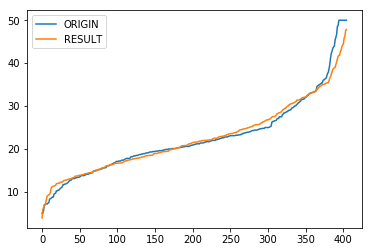

In [79]:
"""
train で fit するかを確認
"""
def test():
    df_test_origin = rmt.boston.get_test_data()
    df_train_origin = rmt.boston.get_train_data()
    
    df_train = df_train_origin.drop('TARGET', axis=1)
    df_test = df_train_origin.drop('TARGET', axis=1)
    df_label = df_train_origin['TARGET']
    
    df_train_clean, df_test_clean = do_cleansing(df_train, df_test)
    df_train_clean = norm(df_train_clean)
    df_test_clean = norm(df_test_clean)
    
#     df_train_clean = norm(df_train)
#     df_test_clean = norm(df_test)
    
    df_train_clean['BIAS'] = 1
    df_test_clean['BIAS'] = 1
    
    vec_w = run(df_train_clean, df_label, 50000)
    
    display(df_test_clean.head())
    
    nd_result = fit(vec_w=vec_w, vec_x=df_test_clean.values)
    df_result = pd.DataFrame(data=nd_result, columns=['TARGET'])

    df_plot = pd.DataFrame([])
    df_plot['ORIGIN'] = df_train_origin.sort_values('TARGET').reset_index()['TARGET']
    df_plot['RESULT'] = df_result.sort_values('TARGET').reset_index()['TARGET']
    df_plot.plot()
    
    print(cal_error(df_result.values, df_label.values))
    
test()

In [78]:
def main():
    df_test_origin = rmt.boston.get_test_data()
    df_train_origin = rmt.boston.get_train_data()
    
    df_train = df_train_origin.drop('TARGET', axis=1)
    df_test = df_test_origin
    df_label = df_train_origin['TARGET']
        
    df_train_clean, df_test_clean = do_cleansing(df_train.copy(), df_test.copy())
    
#     display(df_train.head(10))
#     display(df_train_clean.head(10))
#     display(df_test.head(10))
#     display(df_test_clean.head(10))
    
#     df_train_clean = norm(df_train_clean)
#     df_test_clean = norm(df_test_clean)
    
#     df_train_clean = norm(df_train)
#     df_test_clean = norm(df_test)
    
    df_train_clean['BIAS'] = 1
    df_test_clean['BIAS'] = 1
    
    vec_w = run(df_train_clean, df_label, 100000)
    
    print(f"vec_w")
    print(f"{vec_w}")

    nd_result = fit(vec_w=vec_w, vec_x=df_test_clean.values)
    df_result = pd.DataFrame(data=nd_result, columns=['TARGET'])
    rmt.boston.confirm(df_result)

main()

0 : -16.606453267926007
1 : -16.164314114316195
2 : -15.777227858475591
3 : -15.426325889352889
4 : -15.100056740660461
5 : -14.79135485820842
6 : -14.495883185711346
7 : -14.210956958232439
8 : -13.93489007755121
9 : -13.666600103368511
10 : -13.40537021460309
11 : -13.150705968528998
12 : -12.902249137157451
13 : -12.659725848292572
14 : -12.422915324624203
15 : -12.1916309861875
16 : -11.965708974477245
17 : -11.745001134531712
18 : -11.529370678114168
19 : -11.318689462701672
20 : -11.112836247452544
21 : -10.911695542848237
22 : -10.715156823795803
23 : -10.523113967702391
24 : -10.335464834003819
25 : -10.15211093458766
26 : -9.972957164327191
27 : -9.797911572823283
28 : -9.626885165602847
29 : -9.459791727340136
30 : -9.296547662285693
31 : -9.137071848686906
32 : -8.981285504970272
33 : -8.82911206607276
34 : -8.680477068703722
35 : -8.535308044577384
36 : -8.393534420831568
37 : -8.25508742697244
38 : -8.119900007776936
39 : -7.987906741655474
40 : -7.8590437640347215
41 : -7

426 : -3.229115889547096
427 : -3.2286919435445847
428 : -3.2282685510374374
429 : -3.227845710424202
430 : -3.227423420119868
431 : -3.2270016785555553
432 : -3.226580484178199
433 : -3.2261598354502556
434 : -3.2257397308494045
435 : -3.225320168868268
436 : -3.2249011480141268
437 : -3.2244826668086533
438 : -3.224064723787648
439 : -3.223647317500774
440 : -3.2232304465113115
441 : -3.2228141093959115
442 : -3.222398304744351
443 : -3.221983031159304
444 : -3.221568287256109
445 : -3.2211540716625504
446 : -3.2207403830186343
447 : -3.2203272199763804
448 : -3.219914581199611
449 : -3.2195024653637514
450 : -3.2190908711556268
451 : -3.218679797273273
452 : -3.218269242425743
453 : -3.217859205332924
454 : -3.2174496847253553
455 : -3.2170406793440525
456 : -3.216632187940331
457 : -3.216224209275643
458 : -3.2158167421214046
459 : -3.2154097852588395
460 : -3.215003337478818
461 : -3.2145973975817017
462 : -3.214191964377193
463 : -3.213787036684186
464 : -3.2133826133306216
465 :

844 : -3.089170451307427
845 : -3.088907647973964
846 : -3.0886451253899145
847 : -3.0883828831970086
848 : -3.0881209210375795
849 : -3.0878592385545636
850 : -3.0875978353914957
851 : -3.0873367111925103
852 : -3.0870758656023396
853 : -3.0868152982663117
854 : -3.086555008830348
855 : -3.086294996940963
856 : -3.0860352622452623
857 : -3.0857758043909405
858 : -3.085516623026282
859 : -3.085257717800154
860 : -3.084999088362012
861 : -3.084740734361894
862 : -3.08448265545042
863 : -3.0842248512787895
864 : -3.0839673214987817
865 : -3.083710065762753
866 : -3.083453083723636
867 : -3.083196375034938
868 : -3.082939939350738
869 : -3.0826837763256885
870 : -3.082427885615011
871 : -3.0821722668744957
872 : -3.0819169197605
873 : -3.081661843929948
874 : -3.0814070390403265
875 : -3.0811525047496877
876 : -3.080898240716642
877 : -3.080644246600364
878 : -3.0803905220605836
879 : -3.08013706675759
880 : -3.0798838803522273
881 : -3.079630962505895
882 : -3.0793783128805448
883 : -3.0

1274 : -2.9980464124540576
1275 : -2.997877577970146
1276 : -2.997708911333162
1277 : -2.9975404123523623
1278 : -2.997372080837254
1279 : -2.997203916597594
1280 : -2.997035919443389
1281 : -2.9968680891848947
1282 : -2.996700425632616
1283 : -2.9965329285973055
1284 : -2.9963655978899655
1285 : -2.9961984333218443
1286 : -2.996031434704438
1287 : -2.9958646018494903
1288 : -2.9956979345689883
1289 : -2.9955314326751683
1290 : -2.9953650959805103
1291 : -2.9951989242977395
1292 : -2.995032917439827
1293 : -2.9948670752199864
1294 : -2.994701397451678
1295 : -2.994535883948601
1296 : -2.9943705345247023
1297 : -2.9942053489941682
1298 : -2.9940403271714295
1299 : -2.993875468871157
1300 : -2.993710773908264
1301 : -2.993546242097904
1302 : -2.9933818732554727
1303 : -2.9932176671966046
1304 : -2.9930536237371737
1305 : -2.992889742693295
1306 : -2.9927260238813216
1307 : -2.9925624671178452
1308 : -2.9923990722196954
1309 : -2.99223583900394
1310 : -2.992072767287885
1311 : -2.99190985

1705 : -2.938615854446318
1706 : -2.938504504811188
1707 : -2.9383932595318076
1708 : -2.9382821184960544
1709 : -2.9381710815919395
1710 : -2.9380601487076032
1711 : -2.9379493197313176
1712 : -2.937838594551486
1713 : -2.9377279730566417
1714 : -2.9376174551354484
1715 : -2.9375070406767003
1716 : -2.937396729569322
1717 : -2.9372865217023674
1718 : -2.9371764169650203
1719 : -2.9370664152465946
1720 : -2.9369565164365325
1721 : -2.936846720424406
1722 : -2.936737027099917
1723 : -2.9366274363528952
1724 : -2.9365179480732984
1725 : -2.936408562151215
1726 : -2.93629927847686
1727 : -2.9361900969405763
1728 : -2.9360810174328367
1729 : -2.935972039844241
1730 : -2.9358631640655144
1731 : -2.935754389987514
1732 : -2.9356457175012207
1733 : -2.9355371464977438
1734 : -2.935428676868319
1735 : -2.93532030850431
1736 : -2.935212041297206
1737 : -2.9351038751386236
1738 : -2.934995809920305
1739 : -2.934887845534118
1740 : -2.9347799818720577
1741 : -2.9346722188262446
1742 : -2.93456455

2125 : -2.8998076709118834
2126 : -2.8997316969785314
2127 : -2.899655790022919
2128 : -2.8995799499755237
2129 : -2.8995041767668974
2130 : -2.8994284703276714
2131 : -2.899352830588552
2132 : -2.899277257480325
2133 : -2.8992017509338517
2134 : -2.8991263108800687
2135 : -2.899050937249992
2136 : -2.898975629974712
2137 : -2.8989003889853966
2138 : -2.89882521421329
2139 : -2.8987501055897127
2140 : -2.89867506304606
2141 : -2.8986000865138046
2142 : -2.8985251759244965
2143 : -2.8984503312097583
2144 : -2.898375552301292
2145 : -2.8983008391308727
2146 : -2.8982261916303518
2147 : -2.8981516097316566
2148 : -2.89807709336679
2149 : -2.89800264246783
2150 : -2.8979282569669294
2151 : -2.897853936796317
2152 : -2.8977796818882964
2153 : -2.8977054921752456
2154 : -2.8976313675896193
2155 : -2.8975573080639445
2156 : -2.897483313530825
2157 : -2.897409383922937
2158 : -2.8973355191730352
2159 : -2.8972617192139443
2160 : -2.8971879839785664
2161 : -2.8971143133998765
2162 : -2.89704070

2528 : -2.873939048498948
2529 : -2.873885180285992
2530 : -2.8738313564033593
2531 : -2.8737775768063063
2532 : -2.873723841450136
2533 : -2.873670150290198
2534 : -2.873616503281893
2535 : -2.873562900380669
2536 : -2.87350934154202
2537 : -2.8734558267214894
2538 : -2.873402355874669
2539 : -2.8733489289571983
2540 : -2.8732955459247624
2541 : -2.873242206733098
2542 : -2.8731889113379867
2543 : -2.873135659695257
2544 : -2.8730824517607885
2545 : -2.873029287490505
2546 : -2.872976166840379
2547 : -2.8729230897664304
2548 : -2.8728700562247265
2549 : -2.8728170661713817
2550 : -2.8727641195625577
2551 : -2.872711216354464
2552 : -2.872658356503356
2553 : -2.872605539965537
2554 : -2.8725527666973574
2555 : -2.872500036655215
2556 : -2.872447349795552
2557 : -2.872394706074861
2558 : -2.87234210544968
2559 : -2.872289547876592
2560 : -2.872237033312229
2561 : -2.87218456171327
2562 : -2.872132133036438
2563 : -2.8720797472385047
2564 : -2.872027404276288
2565 : -2.8719751041066512
2

2941 : -2.854994139447069
2942 : -2.854955275349331
2943 : -2.8549164406374783
2944 : -2.8548776352827
2945 : -2.8548388592562164
2946 : -2.8548001125292766
2947 : -2.85476139507316
2948 : -2.8547227068591776
2949 : -2.8546840478586692
2950 : -2.8546454180430056
2951 : -2.8546068173835875
2952 : -2.8545682458518455
2953 : -2.854529703419241
2954 : -2.854491190057265
2955 : -2.854452705737438
2956 : -2.854414250431312
2957 : -2.854375824110467
2958 : -2.854337426746515
2959 : -2.854299058311096
2960 : -2.854260718775881
2961 : -2.8542224081125704
2962 : -2.854184126292895
2963 : -2.8541458732886142
2964 : -2.8541076490715183
2965 : -2.8540694536134272
2966 : -2.854031286886189
2967 : -2.8539931488616834
2968 : -2.8539550395118183
2969 : -2.8539169588085325
2970 : -2.853878906723793
2971 : -2.853840883229597
2972 : -2.8538028882979702
2973 : -2.85376492190097
2974 : -2.853726984010681
2975 : -2.8536890745992176
2976 : -2.8536511936387243
2977 : -2.8536133411013744
2978 : -2.8535755169593

3354 : -2.841140788538168
3355 : -2.8411119270078347
3356 : -2.8410830851993913
3357 : -2.8410542630941196
3358 : -2.84102546067332
3359 : -2.8409966779183122
3360 : -2.840967914810434
3361 : -2.840939171331045
3362 : -2.840910447461523
3363 : -2.840881743183264
3364 : -2.8408530584776837
3365 : -2.840824393326219
3366 : -2.840795747710323
3367 : -2.8407671216114694
3368 : -2.840738515011151
3369 : -2.840709927890881
3370 : -2.840681360232188
3371 : -2.8406528120166237
3372 : -2.840624283225757
3373 : -2.8405957738411756
3374 : -2.8405672838444875
3375 : -2.840538813217318
3376 : -2.8405103619413126
3377 : -2.840481929998135
3378 : -2.8404535173694683
3379 : -2.840425124037015
3380 : -2.840396749982496
3381 : -2.8403683951876504
3382 : -2.8403400596342365
3383 : -2.840311743304033
3384 : -2.840283446178835
3385 : -2.840255168240458
3386 : -2.8402269094707355
3387 : -2.8401986698515205
3388 : -2.8401704493646838
3389 : -2.8401422479921155
3390 : -2.8401140657157242
3391 : -2.84008590251

3776 : -2.830503442314794
3777 : -2.8304814564081355
3778 : -2.8304594838110586
3779 : -2.830437524511417
3780 : -2.830415578497074
3781 : -2.8303936457559074
3782 : -2.8303717262758044
3783 : -2.8303498200446673
3784 : -2.8303279270504094
3785 : -2.8303060472809562
3786 : -2.830284180724246
3787 : -2.8302623273682292
3788 : -2.8302404872008675
3789 : -2.830218660210136
3790 : -2.830196846384021
3791 : -2.8301750457105217
3792 : -2.83015325817765
3793 : -2.830131483773428
3794 : -2.830109722485893
3795 : -2.8300879743030904
3796 : -2.8300662392130818
3797 : -2.8300445172039375
3798 : -2.830022808263742
3799 : -2.8300011123805917
3800 : -2.829979429542594
3801 : -2.82995775973787
3802 : -2.8299361029545507
3803 : -2.829914459180781
3804 : -2.8298928284047165
3805 : -2.829871210614526
3806 : -2.82984960579839
3807 : -2.829828013944499
3808 : -2.8298064350410583
3809 : -2.8297848690762843
3810 : -2.8297633160384046
3811 : -2.829741775915659
3812 : -2.8297202486962996
3813 : -2.82969873436

4192 : -2.822375407625845
4193 : -2.8223580419917624
4194 : -2.8223406855381588
4195 : -2.822323338257035
4196 : -2.8223060001404066
4197 : -2.822288671180293
4198 : -2.822271351368724
4199 : -2.8222540406977354
4200 : -2.822236739159372
4201 : -2.8222194467456863
4202 : -2.822202163448739
4203 : -2.822184889260598
4204 : -2.8221676241733396
4205 : -2.822150368179048
4206 : -2.8221331212698146
4207 : -2.82211588343774
4208 : -2.822098654674932
4209 : -2.8220814349735055
4210 : -2.822064224325584
4211 : -2.8220470227232988
4212 : -2.822029830158789
4213 : -2.822012646624201
4214 : -2.8219954721116904
4215 : -2.8219783066134188
4216 : -2.8219611501215573
4217 : -2.821944002628284
4218 : -2.8219268641257833
4219 : -2.8219097346062503
4220 : -2.8218926140618854
4221 : -2.821875502484899
4222 : -2.8218583998675064
4223 : -2.821841306201933
4224 : -2.821824221480412
4225 : -2.8218071456951823
4226 : -2.8217900788384918
4227 : -2.8217730209025964
4228 : -2.821755971879759
4229 : -2.8217389317

4604 : -2.8159142000799053
4605 : -2.8159000229735085
4606 : -2.8158858523411947
4607 : -2.815871688177637
4608 : -2.8158575304775173
4609 : -2.8158433792355186
4610 : -2.815829234446332
4611 : -2.8158150961046524
4612 : -2.8158009642051804
4613 : -2.8157868387426217
4614 : -2.815772719711687
4615 : -2.815758607107092
4616 : -2.8157445009235578
4617 : -2.8157304011558115
4618 : -2.815716307798583
4619 : -2.81570222084661
4620 : -2.8156881402946334
4621 : -2.815674066137401
4622 : -2.8156599983696635
4623 : -2.815645936986179
4624 : -2.8156318819817083
4625 : -2.81561783335102
4626 : -2.815603791088886
4627 : -2.815589755190083
4628 : -2.8155757256493943
4629 : -2.8155617024616073
4630 : -2.8155476856215147
4631 : -2.815533675123914
4632 : -2.815519670963609
4633 : -2.8155056731354065
4634 : -2.815491681634119
4635 : -2.815477696454566
4636 : -2.8154637175915695
4637 : -2.815449745039958
4638 : -2.8154357787945647
4639 : -2.8154218188502274
4640 : -2.8154078652017898
4641 : -2.815393917

5020 : -2.810517814719392
5021 : -2.810505926993505
5022 : -2.8104940439175654
5023 : -2.8104821654880094
5024 : -2.8104702917012756
5025 : -2.8104584225538063
5026 : -2.810446558042047
5027 : -2.8104346981624473
5028 : -2.8104228429114593
5029 : -2.8104109922855383
5030 : -2.810399146281144
5031 : -2.8103873048947396
5032 : -2.81037546812279
5033 : -2.810363635961765
5034 : -2.810351808408137
5035 : -2.810339985458383
5036 : -2.810328167108981
5037 : -2.8103163533564146
5038 : -2.81030454419717
5039 : -2.8102927396277355
5040 : -2.810280939644606
5041 : -2.8102691442442755
5042 : -2.810257353423244
5043 : -2.8102455671780153
5044 : -2.810233785505095
5045 : -2.810222008400992
5046 : -2.810210235862219
5047 : -2.8101984678852934
5048 : -2.8101867044667337
5049 : -2.8101749456030625
5050 : -2.810163191290805
5051 : -2.810151441526493
5052 : -2.8101396963066567
5053 : -2.8101279556278334
5054 : -2.8101162194865625
5055 : -2.810104487879385
5056 : -2.810092760802848
5057 : -2.810081038253

5432 : -2.805976228370082
5433 : -2.805965990189899
5434 : -2.805955755442787
5435 : -2.8059455241263285
5436 : -2.8059352962381054
5437 : -2.805925071775704
5438 : -2.8059148507367118
5439 : -2.8059046331187183
5440 : -2.8058944189193173
5441 : -2.805884208136102
5442 : -2.80587400076667
5443 : -2.805863796808619
5444 : -2.805853596259551
5445 : -2.80584339911707
5446 : -2.8058332053787804
5447 : -2.8058230150422907
5448 : -2.805812828105211
5449 : -2.8058026445651536
5450 : -2.8057924644197323
5451 : -2.8057822876665646
5452 : -2.8057721143032692
5453 : -2.805761944327467
5454 : -2.8057517777367815
5455 : -2.805741614528838
5456 : -2.8057314547012644
5457 : -2.805721298251691
5458 : -2.805711145177749
5459 : -2.805700995477073
5460 : -2.8056908491473
5461 : -2.8056807061860685
5462 : -2.805670566591019
5463 : -2.805660430359794
5464 : -2.8056502974900406
5465 : -2.805640167979404
5466 : -2.8056300418255358
5467 : -2.805619919026086
5468 : -2.80560979957871
5469 : -2.805599683481062
5

5842 : -2.8020412426631425
5843 : -2.8020322324063933
5844 : -2.802023224755924
5845 : -2.802014219710071
5846 : -2.8020052172671717
5847 : -2.801996217425566
5848 : -2.801987220183595
5849 : -2.801978225539601
5850 : -2.8019692334919273
5851 : -2.8019602440389204
5852 : -2.801951257178926
5853 : -2.8019422729102934
5854 : -2.8019332912313724
5855 : -2.8019243121405135
5856 : -2.8019153356360706
5857 : -2.801906361716397
5858 : -2.8018973903798496
5859 : -2.801888421624785
5860 : -2.801879455449561
5861 : -2.80187049185254
5862 : -2.8018615308320816
5863 : -2.8018525723865495
5864 : -2.801843616514309
5865 : -2.8018346632137248
5866 : -2.801825712483166
5867 : -2.8018167643210004
5868 : -2.8018078187255986
5869 : -2.801798875695333
5870 : -2.8017899352285767
5871 : -2.801780997323704
5872 : -2.8017720619790922
5873 : -2.801763129193118
5874 : -2.8017541989641614
5875 : -2.8017452712906024
5876 : -2.8017363461708236
5877 : -2.801727423603208
5878 : -2.8017185035861405
5879 : -2.80170958

6294 : -2.7982111721455296
6295 : -2.798203190879049
6296 : -2.7981952115989226
6297 : -2.7981872343040317
6298 : -2.7981792589932595
6299 : -2.798171285665489
6300 : -2.798163314319605
6301 : -2.7981553449544934
6302 : -2.7981473775690398
6303 : -2.7981394121621324
6304 : -2.7981314487326587
6305 : -2.7981234872795087
6306 : -2.7981155278015724
6307 : -2.7981075702977414
6308 : -2.798099614766907
6309 : -2.798091661207963
6310 : -2.798083709619803
6311 : -2.798075760001322
6312 : -2.7980678123514164
6313 : -2.7980598666689827
6314 : -2.798051922952919
6315 : -2.7980439812021243
6316 : -2.7980360414154974
6317 : -2.79802810359194
6318 : -2.7980201677303524
6319 : -2.7980122338296387
6320 : -2.7980043018887013
6321 : -2.7979963719064456
6322 : -2.797988443881775
6323 : -2.7979805178135977
6324 : -2.7979725937008206
6325 : -2.7979646715423514
6326 : -2.7979567513370993
6327 : -2.7979488330839746
6328 : -2.7979409167818883
6329 : -2.7979330024297515
6330 : -2.797925090026478
6331 : -2.797

6750 : -2.7947617885050904
6751 : -2.7947546105463656
6752 : -2.79474743415048
6753 : -2.7947402593166704
6754 : -2.794733086044172
6755 : -2.7947259143322225
6756 : -2.79471874418006
6757 : -2.794711575586922
6758 : -2.7947044085520485
6759 : -2.794697243074678
6760 : -2.794690079154051
6761 : -2.794682916789409
6762 : -2.794675755979992
6763 : -2.7946685967250438
6764 : -2.7946614390238054
6765 : -2.794654282875521
6766 : -2.7946471282794345
6767 : -2.79463997523479
6768 : -2.7946328237408324
6769 : -2.7946256737968076
6770 : -2.794618525401962
6771 : -2.7946113785555426
6772 : -2.794604233256797
6773 : -2.7945970895049728
6774 : -2.794589947299319
6775 : -2.794582806639086
6776 : -2.7945756675235214
6777 : -2.794568529951878
6778 : -2.7945613939234057
6779 : -2.7945542594373567
6780 : -2.7945471264929833
6781 : -2.794539995089539
6782 : -2.7945328652262766
6783 : -2.7945257369024508
6784 : -2.7945186101173154
6785 : -2.794511484870127
6786 : -2.794504361160142
6787 : -2.794497238986

7213 : -2.791594061203568
7214 : -2.7915875342756973
7215 : -2.7915810086144695
7216 : -2.7915744842193533
7217 : -2.7915679610898176
7218 : -2.791561439225332
7219 : -2.791554918625365
7220 : -2.791548399289388
7221 : -2.7915418812168706
7222 : -2.791535364407284
7223 : -2.791528848860099
7224 : -2.791522334574787
7225 : -2.7915158215508207
7226 : -2.7915093097876724
7227 : -2.7915027992848147
7228 : -2.791496290041721
7229 : -2.7914897820578637
7230 : -2.791483275332719
7231 : -2.791476769865759
7232 : -2.7914702656564603
7233 : -2.7914637627042973
7234 : -2.791457261008745
7235 : -2.7914507605692807
7236 : -2.79144426138538
7237 : -2.791437763456519
7238 : -2.7914312667821766
7239 : -2.7914247713618288
7240 : -2.791418277194954
7241 : -2.7914117842810304
7242 : -2.791405292619537
7243 : -2.7913988022099527
7244 : -2.791392313051758
7245 : -2.791385825144431
7246 : -2.7913793384874532
7247 : -2.791372853080305
7248 : -2.7913663689224677
7249 : -2.791359886013422
7250 : -2.79135340435

7609 : -2.7891033791056365
7610 : -2.789097315967827
7611 : -2.7890912539140698
7612 : -2.7890851929439675
7613 : -2.789079133057121
7614 : -2.7890730742531336
7615 : -2.7890670165316074
7616 : -2.789060959892145
7617 : -2.789054904334351
7618 : -2.789048849857826
7619 : -2.789042796462176
7620 : -2.7890367441470048
7621 : -2.7890306929119157
7622 : -2.789024642756514
7623 : -2.7890185936804035
7624 : -2.7890125456831902
7625 : -2.789006498764479
7626 : -2.789000452923876
7627 : -2.7889944081609865
7628 : -2.788988364475417
7629 : -2.7889823218667744
7630 : -2.7889762803346647
7631 : -2.788970239878695
7632 : -2.788964200498473
7633 : -2.7889581621936057
7634 : -2.7889521249637013
7635 : -2.7889460888083684
7636 : -2.788940053727214
7637 : -2.788934019719848
7638 : -2.7889279867858785
7639 : -2.788921954924915
7640 : -2.7889159241365675
7641 : -2.7889098944204447
7642 : -2.7889038657761582
7643 : -2.7888978382033165
7644 : -2.7888918117015313
7645 : -2.7888857862704124
7646 : -2.788879

8055 : -2.78650136737413
8056 : -2.78649575193153
8057 : -2.7864901374197695
8058 : -2.7864845238385545
8059 : -2.786478911187589
8060 : -2.7864732994665777
8061 : -2.786467688675227
8062 : -2.7864620788132424
8063 : -2.7864564698803282
8064 : -2.7864508618761907
8065 : -2.7864452548005367
8066 : -2.786439648653072
8067 : -2.786434043433502
8068 : -2.7864284391415346
8069 : -2.786422835776876
8070 : -2.786417233339233
8071 : -2.786411631828313
8072 : -2.786406031243823
8073 : -2.786400431585471
8074 : -2.786394832852964
8075 : -2.7863892350460104
8076 : -2.7863836381643186
8077 : -2.7863780422075957
8078 : -2.786372447175551
8079 : -2.786366853067893
8080 : -2.78636125988433
8081 : -2.786355667624571
8082 : -2.786350076288326
8083 : -2.786344485875304
8084 : -2.7863388963852143
8085 : -2.7863333078177663
8086 : -2.7863277201726713
8087 : -2.7863221334496373
8088 : -2.7863165476483758
8089 : -2.7863109627685976
8090 : -2.7863053788100127
8091 : -2.7862997957723317
8092 : -2.786294213655

8519 : -2.7839912365427066
8520 : -2.7839860241190846
8521 : -2.7839808125070844
8522 : -2.7839756017064827
8523 : -2.783970391717056
8524 : -2.7839651825385823
8525 : -2.783959974170838
8526 : -2.783954766613601
8527 : -2.7839495598666484
8528 : -2.7839443539297584
8529 : -2.7839391488027085
8530 : -2.783933944485276
8531 : -2.78392874097724
8532 : -2.783923538278377
8533 : -2.783918336388468
8534 : -2.783913135307288
8535 : -2.783907935034618
8536 : -2.7839027355702357
8537 : -2.7838975369139196
8538 : -2.7838923390654498
8539 : -2.7838871420246036
8540 : -2.783881945791161
8541 : -2.7838767503649016
8542 : -2.7838715557456046
8543 : -2.783866361933049
8544 : -2.783861168927015
8545 : -2.7838559767272817
8546 : -2.78385078533363
8547 : -2.7838455947458387
8548 : -2.7838404049636893
8549 : -2.783835215986961
8550 : -2.783830027815434
8551 : -2.78382484044889
8552 : -2.7838196538871087
8553 : -2.783814468129871
8554 : -2.7838092831769576
8555 : -2.78380409902815
8556 : -2.7837989156832

8979 : -2.78167582570904
8980 : -2.781670964943973
8981 : -2.7816661048997666
8982 : -2.781661245576246
8983 : -2.7816563869732387
8984 : -2.781651529090569
8985 : -2.7816466719280624
8986 : -2.7816418154855467
8987 : -2.781636959762846
8988 : -2.781632104759787
8989 : -2.781627250476197
8990 : -2.7816223969119007
8991 : -2.781617544066726
8992 : -2.781612691940498
8993 : -2.781607840533045
8994 : -2.781602989844192
8995 : -2.781598139873766
8996 : -2.7815932906215943
8997 : -2.781588442087504
8998 : -2.7815835942713227
8999 : -2.7815787471728757
9000 : -2.7815739007919915
9001 : -2.7815690551284966
9002 : -2.7815642101822196
9003 : -2.7815593659529863
9004 : -2.7815545224406253
9005 : -2.781549679644964
9006 : -2.78154483756583
9007 : -2.781539996203051
9008 : -2.7815351555564556
9009 : -2.7815303156258704
9010 : -2.781525476411125
9011 : -2.781520637912046
9012 : -2.781515800128463
9013 : -2.781510963060203
9014 : -2.7815061267070953
9015 : -2.7815012910689685
9016 : -2.7814964561456

9440 : -2.779508768821552
9441 : -2.7795042231874816
9442 : -2.779499678202166
9443 : -2.7794951338654643
9444 : -2.779490590177237
9445 : -2.7794860471373433
9446 : -2.779481504745644
9447 : -2.7794769630019984
9448 : -2.779472421906266
9449 : -2.7794678814583076
9450 : -2.7794633416579826
9451 : -2.7794588025051516
9452 : -2.779454263999675
9453 : -2.779449726141412
9454 : -2.7794451889302243
9455 : -2.779440652365971
9456 : -2.7794361164485135
9457 : -2.779431581177712
9458 : -2.7794270465534274
9459 : -2.779422512575519
9460 : -2.7794179792438496
9461 : -2.7794134465582787
9462 : -2.7794089145186667
9463 : -2.7794043831248754
9464 : -2.7793998523767653
9465 : -2.779395322274197
9466 : -2.7793907928170323
9467 : -2.7793862640051326
9468 : -2.7793817358383577
9469 : -2.77937720831657
9470 : -2.77937268143963
9471 : -2.7793681552074005
9472 : -2.7793636296197413
9473 : -2.7793591046765145
9474 : -2.779354580377581
9475 : -2.779350056722804
9476 : -2.779345533712044
9477 : -2.779341011

9885 : -2.777548098176511
9886 : -2.777543828205977
9887 : -2.777539558827239
9888 : -2.7775352900401815
9889 : -2.777531021844687
9890 : -2.777526754240639
9891 : -2.7775224872279205
9892 : -2.7775182208064146
9893 : -2.7775139549760057
9894 : -2.7775096897365765
9895 : -2.7775054250880102
9896 : -2.777501161030192
9897 : -2.777496897563003
9898 : -2.7774926346863285
9899 : -2.7774883724000516
9900 : -2.777484110704057
9901 : -2.777479849598227
9902 : -2.777475589082446
9903 : -2.777471329156598
9904 : -2.777467069820567
9905 : -2.777462811074236
9906 : -2.77745855291749
9907 : -2.7774542953502133
9908 : -2.777450038372289
9909 : -2.777445781983602
9910 : -2.7774415261840355
9911 : -2.777437270973475
9912 : -2.777433016351804
9913 : -2.7774287623189067
9914 : -2.7774245088746676
9915 : -2.7774202560189707
9916 : -2.7774160037517017
9917 : -2.7774117520727435
9918 : -2.7774075009819814
9919 : -2.7774032504793
9920 : -2.777399000564584
9921 : -2.777394751237717
9922 : -2.777390502498585

10355 : -2.775604513389108
10356 : -2.7756005094052645
10357 : -2.775596505962799
10358 : -2.7755925030616124
10359 : -2.7755885007016072
10360 : -2.775584498882684
10361 : -2.7755804976047447
10362 : -2.7755764968676897
10363 : -2.7755724966714226
10364 : -2.7755684970158425
10365 : -2.7755644979008536
10366 : -2.7755604993263554
10367 : -2.7755565012922507
10368 : -2.775552503798441
10369 : -2.7755485068448285
10370 : -2.7755445104313137
10371 : -2.7755405145578
10372 : -2.7755365192241874
10373 : -2.7755325244303797
10374 : -2.7755285301762775
10375 : -2.775524536461784
10376 : -2.7755205432867998
10377 : -2.7755165506512274
10378 : -2.775512558554969
10379 : -2.7755085669979267
10380 : -2.7755045759800026
10381 : -2.7755005855010983
10382 : -2.7754965955611164
10383 : -2.7754926061599594
10384 : -2.7754886172975293
10385 : -2.7754846289737283
10386 : -2.7754806411884587
10387 : -2.775476653941623
10388 : -2.7754726672331236
10389 : -2.775468681062862
10390 : -2.775464695430742
1039

10794 : -2.7738974800639182
10795 : -2.7738937046990264
10796 : -2.773889929835144
10797 : -2.7738861554721845
10798 : -2.773882381610063
10799 : -2.7738786082486935
10800 : -2.7738748353879896
10801 : -2.7738710630278667
10802 : -2.773867291168238
10803 : -2.773863519809019
10804 : -2.773859748950123
10805 : -2.7738559785914654
10806 : -2.7738522087329587
10807 : -2.7738484393745195
10808 : -2.7738446705160613
10809 : -2.773840902157498
10810 : -2.7738371342987453
10811 : -2.7738333669397175
10812 : -2.7738296000803286
10813 : -2.773825833720493
10814 : -2.7738220678601264
10815 : -2.7738183024991425
10816 : -2.7738145376374566
10817 : -2.7738107732749824
10818 : -2.7738070094116356
10819 : -2.773803246047331
10820 : -2.7737994831819823
10821 : -2.773795720815505
10822 : -2.7737919589478137
10823 : -2.773788197578824
10824 : -2.7737844367084494
10825 : -2.7737806763366066
10826 : -2.7737769164632087
10827 : -2.773773157088171
10828 : -2.7737693982114093
10829 : -2.7737656398328387
108

11177 : -2.772487389945483
11178 : -2.7724838004143324
11179 : -2.772480211353065
11180 : -2.7724766227616047
11181 : -2.7724730346398743
11182 : -2.772469446987796
11183 : -2.772465859805294
11184 : -2.772462273092291
11185 : -2.7724586868487093
11186 : -2.772455101074473
11187 : -2.772451515769505
11188 : -2.7724479309337284
11189 : -2.7724443465670667
11190 : -2.7724407626694423
11191 : -2.772437179240779
11192 : -2.7724335962810005
11193 : -2.772430013790029
11194 : -2.772426431767789
11195 : -2.7724228502142028
11196 : -2.772419269129194
11197 : -2.7724156885126856
11198 : -2.7724121083646023
11199 : -2.7724085286848665
11200 : -2.772404949473402
11201 : -2.772401370730132
11202 : -2.772397792454979
11203 : -2.772394214647868
11204 : -2.7723906373087224
11205 : -2.772387060437465
11206 : -2.772383484034019
11207 : -2.7723799080983094
11208 : -2.7723763326302584
11209 : -2.7723727576297907
11210 : -2.7723691830968287
11211 : -2.7723656090312967
11212 : -2.772362035433119
11213 : -2

11646 : -2.7708541917394687
11647 : -2.7708508144684103
11648 : -2.7708474376332344
11649 : -2.770844061233871
11650 : -2.7708406852702545
11651 : -2.7708373097423147
11652 : -2.7708339346499837
11653 : -2.7708305599931933
11654 : -2.7708271857718754
11655 : -2.7708238119859616
11656 : -2.7708204386353836
11657 : -2.7708170657200744
11658 : -2.770813693239964
11659 : -2.770810321194986
11660 : -2.770806949585071
11661 : -2.7708035784101512
11662 : -2.7708002076701583
11663 : -2.7707968373650247
11664 : -2.7707934674946824
11665 : -2.7707900980590634
11666 : -2.770786729058098
11667 : -2.7707833604917207
11668 : -2.7707799923598624
11669 : -2.770776624662455
11670 : -2.77077325739943
11671 : -2.7707698905707203
11672 : -2.7707665241762576
11673 : -2.770763158215974
11674 : -2.770759792689802
11675 : -2.7707564275976733
11676 : -2.7707530629395203
11677 : -2.770749698715275
11678 : -2.7707463349248687
11679 : -2.770742971568235
11680 : -2.770739608645305
11681 : -2.7707362461560123
11682

12054 : -2.7695117060580916
12055 : -2.7695085011321154
12056 : -2.7695052966154394
12057 : -2.769502092508001
12058 : -2.7694988888097383
12059 : -2.769495685520589
12060 : -2.76949248264049
12061 : -2.7694892801693807
12062 : -2.769486078107198
12063 : -2.7694828764538806
12064 : -2.769479675209366
12065 : -2.769476474373592
12066 : -2.7694732739464976
12067 : -2.7694700739280194
12068 : -2.7694668743180957
12069 : -2.769463675116665
12070 : -2.769460476323665
12071 : -2.769457277939034
12072 : -2.76945407996271
12073 : -2.7694508823946307
12074 : -2.7694476852347343
12075 : -2.769444488482959
12076 : -2.769441292139243
12077 : -2.769438096203524
12078 : -2.769434900675741
12079 : -2.7694317055558306
12080 : -2.769428510843733
12081 : -2.7694253165393845
12082 : -2.769422122642725
12083 : -2.769418929153691
12084 : -2.7694157360722214
12085 : -2.769412543398255
12086 : -2.769409351131729
12087 : -2.7694061592725827
12088 : -2.7694029678207532
12089 : -2.7693997767761798
12090 : -2.76

12499 : -2.7681250633724597
12500 : -2.7681220346364213
12501 : -2.768119006283305
12502 : -2.768115978313054
12503 : -2.7681129507256133
12504 : -2.7681099235209246
12505 : -2.7681068966989324
12506 : -2.768103870259579
12507 : -2.7681008442028094
12508 : -2.7680978185285667
12509 : -2.7680947932367936
12510 : -2.7680917683274346
12511 : -2.7680887438004333
12512 : -2.7680857196557325
12513 : -2.768082695893276
12514 : -2.768079672513008
12515 : -2.7680766495148714
12516 : -2.76807362689881
12517 : -2.7680706046647683
12518 : -2.768067582812688
12519 : -2.768064561342515
12520 : -2.7680615402541915
12521 : -2.7680585195476612
12522 : -2.768055499222869
12523 : -2.7680524792797576
12524 : -2.76804945971827
12525 : -2.7680464405383516
12526 : -2.7680434217399457
12527 : -2.7680404033229946
12528 : -2.7680373852874443
12529 : -2.768034367633236
12530 : -2.768031350360316
12531 : -2.7680283334686266
12532 : -2.768025316958112
12533 : -2.7680223008287164
12534 : -2.7680192850803826
12535 :

12945 : -2.7668114341769017
12946 : -2.766808570776368
12947 : -2.766805707734627
12948 : -2.7668028450516267
12949 : -2.7667999827273158
12950 : -2.7667971207616415
12951 : -2.766794259154553
12952 : -2.7667913979059975
12953 : -2.7667885370159246
12954 : -2.766785676484282
12955 : -2.7667828163110175
12956 : -2.76677995649608
12957 : -2.766777097039418
12958 : -2.7667742379409797
12959 : -2.7667713792007125
12960 : -2.7667685208185655
12961 : -2.766765662794487
12962 : -2.7667628051284257
12963 : -2.7667599478203293
12964 : -2.7667570908701467
12965 : -2.766754234277826
12966 : -2.7667513780433155
12967 : -2.7667485221665644
12968 : -2.76674566664752
12969 : -2.7667428114861314
12970 : -2.766739956682347
12971 : -2.766737102236115
12972 : -2.7667342481473844
12973 : -2.7667313944161025
12974 : -2.7667285410422195
12975 : -2.7667256880256823
12976 : -2.76672283536644
12977 : -2.766719983064441
12978 : -2.7667171311196346
12979 : -2.766714279531968
12980 : -2.766711428301391
12981 : -2

13407 : -2.765525923805028
13408 : -2.7655232208081437
13409 : -2.7655205181471323
13410 : -2.765517815821945
13411 : -2.765515113832535
13412 : -2.7655124121788552
13413 : -2.7655097108608575
13414 : -2.7655070098784935
13415 : -2.765504309231717
13416 : -2.7655016089204807
13417 : -2.7654989089447364
13418 : -2.765496209304436
13419 : -2.765493509999533
13420 : -2.7654908110299807
13421 : -2.76548811239573
13422 : -2.7654854140967347
13423 : -2.7654827161329463
13424 : -2.765480018504318
13425 : -2.7654773212108026
13426 : -2.7654746242523522
13427 : -2.7654719276289197
13428 : -2.7654692313404574
13429 : -2.7654665353869183
13430 : -2.7654638397682554
13431 : -2.76546114448442
13432 : -2.765458449535366
13433 : -2.7654557549210455
13434 : -2.765453060641412
13435 : -2.7654503666964168
13436 : -2.765447673086013
13437 : -2.765444979810154
13438 : -2.765442286868792
13439 : -2.76543959426188
13440 : -2.7654369019893696
13441 : -2.7654342100512155
13442 : -2.7654315184473686
13443 : -2

13865 : -2.764322360081902
13866 : -2.764319806070649
13867 : -2.7643172523743487
13868 : -2.7643146989929583
13869 : -2.764312145926434
13870 : -2.764309593174731
13871 : -2.7643070407378065
13872 : -2.764304488615616
13873 : -2.7643019368081156
13874 : -2.7642993853152618
13875 : -2.76429683413701
13876 : -2.764294283273318
13877 : -2.7642917327241405
13878 : -2.764289182489435
13879 : -2.7642866325691555
13880 : -2.7642840829632607
13881 : -2.7642815336717046
13882 : -2.7642789846944456
13883 : -2.7642764360314382
13884 : -2.7642738876826396
13885 : -2.7642713396480056
13886 : -2.764268791927493
13887 : -2.7642662445210573
13888 : -2.764263697428655
13889 : -2.764261150650243
13890 : -2.764258604185777
13891 : -2.7642560580352136
13892 : -2.764253512198508
13893 : -2.764250966675618
13894 : -2.764248421466499
13895 : -2.7642458765711075
13896 : -2.7642433319894004
13897 : -2.7642407877213335
13898 : -2.764238243766863
13899 : -2.7642357001259454
13900 : -2.764233156798537
13901 : -2

14271 : -2.7633108477448713
14272 : -2.7633084180776804
14273 : -2.76330598870822
14274 : -2.763303559636451
14275 : -2.76330113086233
14276 : -2.7632987023858178
14277 : -2.7632962742068736
14278 : -2.763293846325455
14279 : -2.763291418741522
14280 : -2.763288991455034
14281 : -2.7632865644659486
14282 : -2.7632841377742263
14283 : -2.7632817113798254
14284 : -2.7632792852827053
14285 : -2.7632768594828243
14286 : -2.7632744339801434
14287 : -2.76327200877462
14288 : -2.7632695838662134
14289 : -2.763267159254882
14290 : -2.763264734940587
14291 : -2.763262310923286
14292 : -2.7632598872029384
14293 : -2.7632574637795035
14294 : -2.76325504065294
14295 : -2.763252617823208
14296 : -2.7632501952902655
14297 : -2.7632477730540725
14298 : -2.7632453511145876
14299 : -2.7632429294717697
14300 : -2.7632405081255786
14301 : -2.763238087075974
14302 : -2.763235666322914
14303 : -2.7632332458663584
14304 : -2.7632308257062657
14305 : -2.7632284058425958
14306 : -2.763225986275308
14307 : -2.

14727 : -2.7622331741720854
14728 : -2.7622308761197334
14729 : -2.762228578347089
14730 : -2.7622262808541147
14731 : -2.762223983640772
14732 : -2.7622216867070235
14733 : -2.76221939005283
14734 : -2.7622170936781547
14735 : -2.7622147975829585
14736 : -2.7622125017672037
14737 : -2.762210206230852
14738 : -2.762207910973866
14739 : -2.762205615996207
14740 : -2.7622033212978376
14741 : -2.7622010268787194
14742 : -2.762198732738814
14743 : -2.7621964388780844
14744 : -2.7621941452964913
14745 : -2.7621918519939976
14746 : -2.762189558970565
14747 : -2.7621872662261557
14748 : -2.762184973760731
14749 : -2.762182681574254
14750 : -2.7621803896666868
14751 : -2.7621780980379897
14752 : -2.762175806688127
14753 : -2.762173515617058
14754 : -2.7621712248247476
14755 : -2.762168934311156
14756 : -2.762166644076247
14757 : -2.7621643541199807
14758 : -2.7621620644423204
14759 : -2.7621597750432274
14760 : -2.762157485922664
14761 : -2.762155197080593
14762 : -2.762152908516976
14763 : -2

15173 : -2.7612354497570597
15174 : -2.7612332727604447
15175 : -2.7612310960271262
15176 : -2.7612289195570687
15177 : -2.761226743350236
15178 : -2.7612245674065936
15179 : -2.761222391726106
15180 : -2.7612202163087356
15181 : -2.7612180411544496
15182 : -2.761215866263211
15183 : -2.761213691634985
15184 : -2.7612115172697353
15185 : -2.761209343167427
15186 : -2.7612071693280247
15187 : -2.761204995751492
15188 : -2.761202822437795
15189 : -2.7612006493868972
15190 : -2.761198476598763
15191 : -2.7611963040733576
15192 : -2.7611941318106448
15193 : -2.7611919598105903
15194 : -2.7611897880731573
15195 : -2.761187616598311
15196 : -2.7611854453860163
15197 : -2.7611832744362372
15198 : -2.761181103748939
15199 : -2.7611789333240853
15200 : -2.7611767631616413
15201 : -2.7611745932615723
15202 : -2.761172423623841
15203 : -2.7611702542484142
15204 : -2.7611680851352545
15205 : -2.761165916284328
15206 : -2.761163747695599
15207 : -2.761161579369032
15208 : -2.761159411304591
15209 :

15608 : -2.760312833842758
15609 : -2.7603107680985004
15610 : -2.7603087026025825
15611 : -2.76030663735497
15612 : -2.760304572355631
15613 : -2.76030250760453
15614 : -2.760300443101636
15615 : -2.760298378846914
15616 : -2.7602963148403323
15617 : -2.7602942510818567
15618 : -2.760292187571454
15619 : -2.7602901243090914
15620 : -2.7602880612947356
15621 : -2.760285998528353
15622 : -2.76028393600991
15623 : -2.760281873739375
15624 : -2.760279811716713
15625 : -2.7602777499418925
15626 : -2.760275688414879
15627 : -2.7602736271356396
15628 : -2.7602715661041417
15629 : -2.760269505320352
15630 : -2.7602674447842364
15631 : -2.7602653844957623
15632 : -2.760263324454897
15633 : -2.7602612646616067
15634 : -2.760259205115859
15635 : -2.76025714581762
15636 : -2.7602550867668567
15637 : -2.760253027963536
15638 : -2.760250969407625
15639 : -2.7602489110990907
15640 : -2.7602468530378994
15641 : -2.7602447952240183
15642 : -2.7602427376574155
15643 : -2.7602406803380557
15644 : -2.760

16018 : -2.759486327094228
16019 : -2.7594843604358785
16020 : -2.759482394012638
16021 : -2.7594804278244753
16022 : -2.7594784618713586
16023 : -2.759476496153257
16024 : -2.75947453067014
16025 : -2.7594725654219747
16026 : -2.759470600408731
16027 : -2.7594686356303773
16028 : -2.7594666710868827
16029 : -2.7594647067782154
16030 : -2.759462742704344
16031 : -2.7594607788652383
16032 : -2.759458815260866
16033 : -2.7594568518911955
16034 : -2.7594548887561974
16035 : -2.7594529258558382
16036 : -2.759450963190089
16037 : -2.7594490007589165
16038 : -2.759447038562291
16039 : -2.7594450766001803
16040 : -2.7594431148725533
16041 : -2.7594411533793797
16042 : -2.7594391921206274
16043 : -2.7594372310962654
16044 : -2.7594352703062626
16045 : -2.7594333097505883
16046 : -2.75943134942921
16047 : -2.7594293893420976
16048 : -2.75942742948922
16049 : -2.759425469870545
16050 : -2.7594235104860427
16051 : -2.7594215513356812
16052 : -2.7594195924194294
16053 : -2.7594176337372565
16054 :

16427 : -2.75870123135216
16428 : -2.758699358293429
16429 : -2.758697485457382
16430 : -2.7586956128439892
16431 : -2.7586937404532224
16432 : -2.7586918682850508
16433 : -2.7586899963394456
16434 : -2.758688124616378
16435 : -2.758686253115817
16436 : -2.7586843818377345
16437 : -2.7586825107821
16438 : -2.758680639948885
16439 : -2.7586787693380597
16440 : -2.7586768989495942
16441 : -2.7586750287834594
16442 : -2.7586731588396267
16443 : -2.7586712891180647
16444 : -2.758669419618746
16445 : -2.7586675503416402
16446 : -2.758665681286718
16447 : -2.7586638124539498
16448 : -2.758661943843307
16449 : -2.758660075454759
16450 : -2.7586582072882777
16451 : -2.758656339343833
16452 : -2.758654471621395
16453 : -2.758652604120935
16454 : -2.7586507368424242
16455 : -2.7586488697858322
16456 : -2.75864700295113
16457 : -2.758645136338288
16458 : -2.7586432699472767
16459 : -2.7586414037780678
16460 : -2.7586395378306308
16461 : -2.758637672104937
16462 : -2.7586358066009566
16463 : -2.75

16832 : -2.7579605410377934
16833 : -2.7579587558005607
16834 : -2.7579569707744147
16835 : -2.7579551859593265
16836 : -2.757953401355269
16837 : -2.7579516169622154
16838 : -2.757949832780136
16839 : -2.757948048809004
16840 : -2.757946265048792
16841 : -2.7579444814994702
16842 : -2.7579426981610133
16843 : -2.757940915033393
16844 : -2.7579391321165803
16845 : -2.757937349410548
16846 : -2.7579355669152688
16847 : -2.7579337846307146
16848 : -2.757932002556858
16849 : -2.7579302206936704
16850 : -2.757928439041125
16851 : -2.7579266575991936
16852 : -2.7579248763678486
16853 : -2.7579230953470617
16854 : -2.757921314536806
16855 : -2.7579195339370535
16856 : -2.7579177535477757
16857 : -2.757915973368946
16858 : -2.757914193400536
16859 : -2.757912413642519
16860 : -2.757910634094866
16861 : -2.757908854757549
16862 : -2.757907075630542
16863 : -2.7579052967138162
16864 : -2.757903518007344
16865 : -2.757901739511098
16866 : -2.7578999612250503
16867 : -2.7578981831491727
16868 : -

17287 : -2.7571696333192817
17288 : -2.757167941314796
17289 : -2.757166249509143
17290 : -2.757164557902297
17291 : -2.7571628664942325
17292 : -2.7571611752849225
17293 : -2.757159484274341
17294 : -2.7571577934624636
17295 : -2.7571561028492617
17296 : -2.757154412434711
17297 : -2.7571527222187853
17298 : -2.757151032201458
17299 : -2.7571493423827027
17300 : -2.757147652762494
17301 : -2.7571459633408066
17302 : -2.7571442741176133
17303 : -2.7571425850928883
17304 : -2.757140896266606
17305 : -2.75713920763874
17306 : -2.7571375192092646
17307 : -2.7571358309781537
17308 : -2.757134142945381
17309 : -2.757132455110921
17310 : -2.757130767474747
17311 : -2.757129080036834
17312 : -2.757127392797155
17313 : -2.7571257057556844
17314 : -2.7571240189123967
17315 : -2.757122332267265
17316 : -2.7571206458202644
17317 : -2.7571189595713683
17318 : -2.7571172735205502
17319 : -2.7571155876677857
17320 : -2.7571139020130473
17321 : -2.7571122165563096
17322 : -2.7571105312975472
17323 : 

17697 : -2.756492289596081
17698 : -2.7564906769687108
17699 : -2.7564890645297875
17700 : -2.7564874522792864
17701 : -2.756485840217182
17702 : -2.756484228343451
17703 : -2.7564826166580683
17704 : -2.7564810051610094
17705 : -2.7564793938522496
17706 : -2.7564777827317646
17707 : -2.756476171799529
17708 : -2.756474561055519
17709 : -2.7564729504997096
17710 : -2.7564713401320766
17711 : -2.7564697299525953
17712 : -2.756468119961241
17713 : -2.7564665101579897
17714 : -2.7564649005428157
17715 : -2.756463291115695
17716 : -2.7564616818766035
17717 : -2.756460072825516
17718 : -2.756458463962409
17719 : -2.7564568552872566
17720 : -2.7564552468000345
17721 : -2.756453638500718
17722 : -2.7564520303892848
17723 : -2.7564504224657074
17724 : -2.756448814729963
17725 : -2.7564472071820267
17726 : -2.7564455998218733
17727 : -2.7564439926494795
17728 : -2.75644238566482
17729 : -2.75644077886787
17730 : -2.756439172258606
17731 : -2.756437565837002
17732 : -2.756435959603036
17733 : -2

18098 : -2.755860480555929
18099 : -2.7558589415581523
18100 : -2.7558574027392235
18101 : -2.7558558640991206
18102 : -2.755854325637819
18103 : -2.755852787355297
18104 : -2.7558512492515304
18105 : -2.7558497113264955
18106 : -2.7558481735801696
18107 : -2.7558466360125298
18108 : -2.755845098623552
18109 : -2.7558435614132137
18110 : -2.7558420243814923
18111 : -2.755840487528362
18112 : -2.755838950853802
18113 : -2.7558374143577886
18114 : -2.7558358780402976
18115 : -2.755834341901307
18116 : -2.755832805940792
18117 : -2.755831270158732
18118 : -2.7558297345551006
18119 : -2.755828199129877
18120 : -2.7558266638830364
18121 : -2.755825128814557
18122 : -2.755823593924414
18123 : -2.7558220592125866
18124 : -2.755820524679049
18125 : -2.7558189903237795
18126 : -2.755817456146754
18127 : -2.7558159221479506
18128 : -2.755814388327345
18129 : -2.755812854684914
18130 : -2.755811321220636
18131 : -2.755809787934485
18132 : -2.7558082548264404
18133 : -2.7558067218964784
18134 : -2

18480 : -2.755285386660157
18481 : -2.755283914318271
18482 : -2.7552824421465743
18483 : -2.7552809701450434
18484 : -2.7552794983136573
18485 : -2.7552780266523933
18486 : -2.75527655516123
18487 : -2.7552750838401456
18488 : -2.7552736126891166
18489 : -2.7552721417081227
18490 : -2.7552706708971404
18491 : -2.7552692002561483
18492 : -2.7552677297851242
18493 : -2.755266259484047
18494 : -2.7552647893528923
18495 : -2.755263319391641
18496 : -2.7552618496002688
18497 : -2.7552603799787545
18498 : -2.755258910527077
18499 : -2.7552574412452118
18500 : -2.7552559721331398
18501 : -2.755254503190837
18502 : -2.7552530344182817
18503 : -2.755251565815452
18504 : -2.755250097382327
18505 : -2.755248629118883
18506 : -2.755247161025099
18507 : -2.7552456931009526
18508 : -2.7552442253464218
18509 : -2.7552427577614846
18510 : -2.75524129034612
18511 : -2.7552398231003044
18512 : -2.755238356024017
18513 : -2.7552368891172345
18514 : -2.7552354223799367
18515 : -2.7552339558121
18516 : -2

18919 : -2.7546550861073236
18920 : -2.754653686397801
18921 : -2.7546522868490615
18922 : -2.754650887461085
18923 : -2.7546494882338504
18924 : -2.7546480891673366
18925 : -2.7546466902615236
18926 : -2.75464529151639
18927 : -2.7546438929319157
18928 : -2.7546424945080794
18929 : -2.7546410962448604
18930 : -2.754639698142238
18931 : -2.754638300200191
18932 : -2.7546369024186994
18933 : -2.7546355047977418
18934 : -2.754634107337298
18935 : -2.754632710037347
18936 : -2.754631312897868
18937 : -2.7546299159188403
18938 : -2.7546285191002426
18939 : -2.7546271224420553
18940 : -2.7546257259442575
18941 : -2.7546243296068273
18942 : -2.7546229334297454
18943 : -2.75462153741299
18944 : -2.754620141556541
18945 : -2.7546187458603777
18946 : -2.7546173503244784
18947 : -2.7546159549488234
18948 : -2.754614559733392
18949 : -2.754613164678163
18950 : -2.754611769783116
18951 : -2.7546103750482303
18952 : -2.7546089804734852
18953 : -2.75460758605886
18954 : -2.754606191804333
18955 : -2

19365 : -2.7540464703273253
19366 : -2.7540451403058364
19367 : -2.754043810436137
19368 : -2.7540424807182085
19369 : -2.7540411511520304
19370 : -2.7540398217375843
19371 : -2.7540384924748498
19372 : -2.754037163363807
19373 : -2.7540358344044376
19374 : -2.7540345055967204
19375 : -2.754033176940638
19376 : -2.7540318484361688
19377 : -2.754030520083294
19378 : -2.7540291918819944
19379 : -2.75402786383225
19380 : -2.7540265359340417
19381 : -2.75402520818735
19382 : -2.754023880592155
19383 : -2.7540225531484372
19384 : -2.7540212258561776
19385 : -2.754019898715356
19386 : -2.7540185717259535
19387 : -2.7540172448879505
19388 : -2.754015918201327
19389 : -2.754014591666064
19390 : -2.7540132652821416
19391 : -2.75401193904954
19392 : -2.754010612968241
19393 : -2.7540092870382242
19394 : -2.7540079612594703
19395 : -2.75400663563196
19396 : -2.7540053101556734
19397 : -2.7540039848305913
19398 : -2.7540026596566936
19399 : -2.754001334633962
19400 : -2.754000009762376
19401 : -2.

19802 : -2.7534794451500173
19803 : -2.7534781796338406
19804 : -2.7534769142611557
19805 : -2.753475649031945
19806 : -2.753474383946189
19807 : -2.753473119003869
19808 : -2.753471854204968
19809 : -2.753470589549466
19810 : -2.7534693250373463
19811 : -2.753468060668589
19812 : -2.7534667964431767
19813 : -2.75346553236109
19814 : -2.7534642684223116
19815 : -2.7534630046268225
19816 : -2.7534617409746045
19817 : -2.7534604774656386
19818 : -2.753459214099907
19819 : -2.753457950877391
19820 : -2.7534566877980726
19821 : -2.753455424861933
19822 : -2.753454162068954
19823 : -2.753452899419117
19824 : -2.753451636912404
19825 : -2.7534503745487964
19826 : -2.7534491123282754
19827 : -2.753447850250824
19828 : -2.753446588316422
19829 : -2.753445326525053
19830 : -2.753444064876697
19831 : -2.753442803371336
19832 : -2.753441542008952
19833 : -2.7534402807895266
19834 : -2.7534390197130407
19835 : -2.7534377587794774
19836 : -2.753436497988817
19837 : -2.753435237341042
19838 : -2.753

20227 : -2.752954298566793
20228 : -2.7529530924053787
20229 : -2.752951886379844
20230 : -2.752950680490171
20231 : -2.752949474736343
20232 : -2.7529482691183422
20233 : -2.7529470636361517
20234 : -2.752945858289754
20235 : -2.7529446530791306
20236 : -2.752943448004266
20237 : -2.7529422430651413
20238 : -2.75294103826174
20239 : -2.7529398335940436
20240 : -2.752938629062036
20241 : -2.7529374246656992
20242 : -2.752936220405016
20243 : -2.7529350162799693
20244 : -2.752933812290541
20245 : -2.7529326084367143
20246 : -2.7529314047184714
20247 : -2.752930201135796
20248 : -2.7529289976886693
20249 : -2.7529277943770745
20250 : -2.752926591200995
20251 : -2.7529253881604117
20252 : -2.752924185255309
20253 : -2.752922982485669
20254 : -2.7529217798514742
20255 : -2.752920577352707
20256 : -2.75291937498935
20257 : -2.7529181727613876
20258 : -2.7529169706688
20259 : -2.7529157687115715
20260 : -2.7529145668896837
20261 : -2.75291336520312
20262 : -2.752912163651863
20263 : -2.75291

20671 : -2.7524318776805665
20672 : -2.7524307301718505
20673 : -2.7524295827915144
20674 : -2.7524284355395414
20675 : -2.752427288415915
20676 : -2.7524261414206195
20677 : -2.7524249945536376
20678 : -2.7524238478149536
20679 : -2.7524227012045515
20680 : -2.7524215547224133
20681 : -2.7524204083685238
20682 : -2.752419262142867
20683 : -2.752418116045426
20684 : -2.752416970076184
20685 : -2.752415824235125
20686 : -2.7524146785222334
20687 : -2.7524135329374917
20688 : -2.752412387480884
20689 : -2.752411242152394
20690 : -2.7524100969520053
20691 : -2.7524089518797012
20692 : -2.7524078069354663
20693 : -2.752406662119283
20694 : -2.752405517431136
20695 : -2.752404372871008
20696 : -2.752403228438884
20697 : -2.7524020841347467
20698 : -2.752400939958579
20699 : -2.752399795910366
20700 : -2.752398651990091
20701 : -2.7523975081977374
20702 : -2.7523963645332894
20703 : -2.7523952209967297
20704 : -2.752394077588043
20705 : -2.7523929343072115
20706 : -2.752391791154221
20707 : 

21113 : -2.751936959951371
21114 : -2.751935867619979
21115 : -2.7519347754099317
21116 : -2.751933683321215
21117 : -2.7519325913538113
21118 : -2.7519314995077075
21119 : -2.751930407782887
21120 : -2.751929316179334
21121 : -2.7519282246970334
21122 : -2.7519271333359705
21123 : -2.751926042096129
21124 : -2.7519249509774935
21125 : -2.7519238599800486
21126 : -2.7519227691037798
21127 : -2.7519216783486704
21128 : -2.751920587714706
21129 : -2.75191949720187
21130 : -2.751918406810148
21131 : -2.751917316539524
21132 : -2.7519162263899837
21133 : -2.75191513636151
21134 : -2.7519140464540883
21135 : -2.751912956667704
21136 : -2.75191186700234
21137 : -2.751910777457983
21138 : -2.751909688034615
21139 : -2.7519085987322227
21140 : -2.7519075095507897
21141 : -2.751906420490301
21142 : -2.751905331550742
21143 : -2.7519042427320954
21144 : -2.7519031540343475
21145 : -2.7519020654574815
21146 : -2.7519009770014837
21147 : -2.751899888666337
21148 : -2.7518988004520275
21149 : -2.75

21554 : -2.751466798591432
21555 : -2.751465758303547
21556 : -2.751464718130393
21557 : -2.7514636780719535
21558 : -2.751462638128215
21559 : -2.7514615982991626
21560 : -2.7514605585847813
21561 : -2.751459518985058
21562 : -2.7514584794999775
21563 : -2.7514574401295238
21564 : -2.751456400873684
21565 : -2.7514553617324435
21566 : -2.7514543227057873
21567 : -2.7514532837937007
21568 : -2.75145224499617
21569 : -2.7514512063131793
21570 : -2.7514501677447143
21571 : -2.751449129290762
21572 : -2.7514480909513064
21573 : -2.7514470527263337
21574 : -2.751446014615829
21575 : -2.7514449766197777
21576 : -2.751443938738165
21577 : -2.7514429009709773
21578 : -2.7514418633181994
21579 : -2.751440825779817
21580 : -2.7514397883558157
21581 : -2.7514387510461806
21582 : -2.7514377138508976
21583 : -2.7514366767699516
21584 : -2.7514356398033293
21585 : -2.7514346029510146
21586 : -2.7514335662129947
21587 : -2.751432529589253
21588 : -2.7514314930797767
21589 : -2.7514304566845507
21590

21992 : -2.7510219328662995
21993 : -2.7510209414631834
21994 : -2.751019950168602
21995 : -2.7510189589825407
21996 : -2.751017967904987
21997 : -2.751016976935926
21998 : -2.7510159860753447
21999 : -2.7510149953232297
22000 : -2.751014004679566
22001 : -2.751013014144341
22002 : -2.7510120237175406
22003 : -2.7510110333991515
22004 : -2.7510100431891593
22005 : -2.751009053087551
22006 : -2.751008063094312
22007 : -2.7510070732094296
22008 : -2.7510060834328884
22009 : -2.7510050937646766
22010 : -2.7510041042047795
22011 : -2.751003114753184
22012 : -2.751002125409876
22013 : -2.7510011361748417
22014 : -2.7510001470480674
22015 : -2.7509991580295394
22016 : -2.7509981691192444
22017 : -2.7509971803171682
22018 : -2.7509961916232974
22019 : -2.7509952030376184
22020 : -2.750994214560117
22021 : -2.75099322619078
22022 : -2.7509922379295944
22023 : -2.7509912497765447
22024 : -2.7509902617316184
22025 : -2.7509892737948016
22026 : -2.750988285966081
22027 : -2.7509872982454424
22028

22425 : -2.7506026243930624
22426 : -2.7506016787250473
22427 : -2.750600733159788
22428 : -2.7505997876972703
22429 : -2.750598842337483
22430 : -2.7505978970804112
22431 : -2.750596951926043
22432 : -2.7505960068743653
22433 : -2.750595061925365
22434 : -2.7505941170790305
22435 : -2.7505931723353467
22436 : -2.7505922276943013
22437 : -2.7505912831558823
22438 : -2.750590338720076
22439 : -2.750589394386869
22440 : -2.750588450156249
22441 : -2.7505875060282037
22442 : -2.750586562002719
22443 : -2.750585618079782
22444 : -2.7505846742593807
22445 : -2.7505837305415013
22446 : -2.750582786926131
22447 : -2.750581843413258
22448 : -2.7505809000028676
22449 : -2.750579956694948
22450 : -2.7505790134894856
22451 : -2.750578070386468
22452 : -2.750577127385882
22453 : -2.750576184487715
22454 : -2.750575241691954
22455 : -2.7505742989985857
22456 : -2.750573356407598
22457 : -2.7505724139189764
22458 : -2.7505714715327096
22459 : -2.7505705292487836
22460 : -2.7505695870671873
22461 : -

22848 : -2.750211617898506
22849 : -2.7502107145601324
22850 : -2.750209811319183
22851 : -2.750208908175642
22852 : -2.7502080051294997
22853 : -2.750207102180742
22854 : -2.7502061993293583
22855 : -2.7502052965753356
22856 : -2.750204393918661
22857 : -2.7502034913593225
22858 : -2.7502025888973094
22859 : -2.7502016865326073
22860 : -2.750200784265205
22861 : -2.750199882095091
22862 : -2.7501989800222515
22863 : -2.750198078046675
22864 : -2.7501971761683497
22865 : -2.7501962743872626
22866 : -2.7501953727034016
22867 : -2.7501944711167554
22868 : -2.7501935696273105
22869 : -2.750192668235055
22870 : -2.7501917669399774
22871 : -2.750190865742065
22872 : -2.7501899646413053
22873 : -2.750189063637687
22874 : -2.7501881627311957
22875 : -2.7501872619218224
22876 : -2.7501863612095514
22877 : -2.7501854605943734
22878 : -2.750184560076275
22879 : -2.7501836596552445
22880 : -2.750182759331268
22881 : -2.750181859104335
22882 : -2.7501809589744335
22883 : -2.75018005894155
22884 : 

23283 : -2.749827697262462
23284 : -2.7498268351676947
23285 : -2.749825973165168
23286 : -2.7498251112548724
23287 : -2.749824249436794
23288 : -2.7498233877109235
23289 : -2.7498225260772475
23290 : -2.7498216645357556
23291 : -2.7498208030864353
23292 : -2.749819941729276
23293 : -2.7498190804642655
23294 : -2.749818219291392
23295 : -2.749817358210645
23296 : -2.749816497222012
23297 : -2.749815636325482
23298 : -2.749814775521043
23299 : -2.749813914808684
23300 : -2.749813054188393
23301 : -2.749812193660158
23302 : -2.7498113332239686
23303 : -2.7498104728798127
23304 : -2.7498096126276783
23305 : -2.7498087524675547
23306 : -2.7498078923994305
23307 : -2.749807032423293
23308 : -2.749806172539131
23309 : -2.7498053127469335
23310 : -2.7498044530466887
23311 : -2.7498035934383855
23312 : -2.7498027339220124
23313 : -2.7498018744975563
23314 : -2.7498010151650067
23315 : -2.7498001559243535
23316 : -2.749799296775583
23317 : -2.7497984377186846
23318 : -2.749797578753647
23319 : 

23702 : -2.7494744183363085
23703 : -2.749473593896054
23704 : -2.7494727695433254
23705 : -2.7494719452781116
23706 : -2.7494711211004024
23707 : -2.7494702970101863
23708 : -2.7494694730074523
23709 : -2.74946864909219
23710 : -2.749467825264387
23711 : -2.749467001524035
23712 : -2.7494661778711205
23713 : -2.7494653543056335
23714 : -2.7494645308275634
23715 : -2.7494637074368993
23716 : -2.7494628841336297
23717 : -2.749462060917744
23718 : -2.7494612377892316
23719 : -2.7494604147480803
23720 : -2.7494595917942806
23721 : -2.7494587689278216
23722 : -2.749457946148691
23723 : -2.749457123456879
23724 : -2.7494563008523745
23725 : -2.7494554783351663
23726 : -2.749454655905244
23727 : -2.749453833562596
23728 : -2.749453011307212
23729 : -2.749452189139081
23730 : -2.7494513670581915
23731 : -2.749450545064533
23732 : -2.7494497231580954
23733 : -2.7494489013388668
23734 : -2.7494480796068363
23735 : -2.7494472579619935
23736 : -2.7494464364043267
23737 : -2.7494456149338258
23738

24116 : -2.7491404559945756
24117 : -2.7491396668712476
24118 : -2.7491388778310366
24119 : -2.749138088873932
24120 : -2.7491372999999233
24121 : -2.7491365112090005
24122 : -2.7491357225011526
24123 : -2.7491349338763698
24124 : -2.749134145334642
24125 : -2.7491333568759577
24126 : -2.749132568500307
24127 : -2.749131780207681
24128 : -2.7491309919980678
24129 : -2.749130203871457
24130 : -2.749129415827839
24131 : -2.749128627867204
24132 : -2.74912783998954
24133 : -2.749127052194837
24134 : -2.7491262644830856
24135 : -2.7491254768542754
24136 : -2.7491246893083945
24137 : -2.749123901845435
24138 : -2.7491231144653843
24139 : -2.7491223271682337
24140 : -2.7491215399539723
24141 : -2.749120752822589
24142 : -2.749119965774075
24143 : -2.749119178808419
24144 : -2.74911839192561
24145 : -2.749117605125639
24146 : -2.749116818408495
24147 : -2.749116031774168
24148 : -2.7491152452226473
24149 : -2.7491144587539225
24150 : -2.7491136723679843
24151 : -2.7491128860648213
24152 : -2.

24531 : -2.7488199890761247
24532 : -2.7488192335721617
24533 : -2.748818478147131
24534 : -2.748817722801024
24535 : -2.748816967533829
24536 : -2.748816212345537
24537 : -2.7488154572361387
24538 : -2.7488147022056233
24539 : -2.7488139472539816
24540 : -2.748813192381204
24541 : -2.7488124375872798
24542 : -2.7488116828722005
24543 : -2.7488109282359554
24544 : -2.748810173678535
24545 : -2.748809419199929
24546 : -2.748808664800128
24547 : -2.748807910479123
24548 : -2.7488071562369023
24549 : -2.748806402073458
24550 : -2.7488056479887795
24551 : -2.7488048939828573
24552 : -2.748804140055681
24553 : -2.748803386207242
24554 : -2.7488026324375285
24555 : -2.7488018787465327
24556 : -2.7488011251342437
24557 : -2.748800371600652
24558 : -2.748799618145749
24559 : -2.7487988647695225
24560 : -2.748798111471965
24561 : -2.7487973582530656
24562 : -2.7487966051128145
24563 : -2.748795852051202
24564 : -2.748795099068219
24565 : -2.7487943461638547
24566 : -2.7487935933381005
24567 : -

24966 : -2.748498663930821
24967 : -2.748497941853996
24968 : -2.7484972198519566
24969 : -2.7484964979246937
24970 : -2.748495776072198
24971 : -2.74849505429446
24972 : -2.7484943325914712
24973 : -2.748493610963221
24974 : -2.748492889409701
24975 : -2.7484921679309022
24976 : -2.748491446526815
24977 : -2.7484907251974304
24978 : -2.7484900039427385
24979 : -2.7484892827627303
24980 : -2.748488561657397
24981 : -2.748487840626729
24982 : -2.7484871196707172
24983 : -2.7484863987893524
24984 : -2.748485677982625
24985 : -2.7484849572505263
24986 : -2.7484842365930464
24987 : -2.7484835160101766
24988 : -2.7484827955019075
24989 : -2.7484820750682295
24990 : -2.748481354709134
24991 : -2.7484806344246113
24992 : -2.7484799142146525
24993 : -2.748479194079248
24994 : -2.748478474018389
24995 : -2.748477754032066
24996 : -2.7484770341202696
24997 : -2.7484763142829913
24998 : -2.7484755945202206
24999 : -2.7484748748319494
25000 : -2.7484741552181684
25001 : -2.7484734356788683
25002 :

25370 : -2.748212933189086
25371 : -2.748212240584874
25372 : -2.7482115480518035
25373 : -2.7482108555898654
25374 : -2.748210163199052
25375 : -2.7482094708793534
25376 : -2.748208778630761
25377 : -2.748208086453267
25378 : -2.748207394346862
25379 : -2.7482067023115375
25380 : -2.748206010347283
25381 : -2.748205318454093
25382 : -2.7482046266319555
25383 : -2.7482039348808636
25384 : -2.748203243200808
25385 : -2.7482025515917803
25386 : -2.7482018600537717
25387 : -2.7482011685867724
25388 : -2.748200477190774
25389 : -2.7481997858657694
25390 : -2.7481990946117483
25391 : -2.7481984034287015
25392 : -2.7481977123166215
25393 : -2.7481970212754985
25394 : -2.7481963303053245
25395 : -2.7481956394060902
25396 : -2.7481949485777872
25397 : -2.748194257820407
25398 : -2.7481935671339404
25399 : -2.7481928765183787
25400 : -2.7481921859737124
25401 : -2.748191495499935
25402 : -2.7481908050970354
25403 : -2.748190114765006
25404 : -2.748189424503838
25405 : -2.748188734313522
25406 :

25788 : -2.747929520143692
25789 : -2.747928856525133
25790 : -2.7479281929741437
25791 : -2.747927529490715
25792 : -2.747926866074841
25793 : -2.747926202726511
25794 : -2.7479255394457174
25795 : -2.747924876232453
25796 : -2.747924213086708
25797 : -2.7479235500084753
25798 : -2.7479228869977455
25799 : -2.747922224054511
25800 : -2.7479215611787633
25801 : -2.7479208983704937
25802 : -2.747920235629695
25803 : -2.7479195729563575
25804 : -2.7479189103504744
25805 : -2.747918247812036
25806 : -2.747917585341035
25807 : -2.747916922937462
25808 : -2.74791626060131
25809 : -2.7479155983325705
25810 : -2.7479149361312345
25811 : -2.747914273997294
25812 : -2.7479136119307404
25813 : -2.7479129499315667
25814 : -2.7479122879997626
25815 : -2.747911626135321
25816 : -2.747910964338234
25817 : -2.7479103026084934
25818 : -2.747909640946089
25819 : -2.747908979351015
25820 : -2.7479083178232613
25821 : -2.7479076563628206
25822 : -2.7479069949696853
25823 : -2.747906333643845
25824 : -2.7

26197 : -2.74766364507075
26198 : -2.747663008406977
26199 : -2.7476623718074635
26200 : -2.7476617352722026
26201 : -2.7476610988011854
26202 : -2.7476604623944048
26203 : -2.7476598260518528
26204 : -2.747659189773521
26205 : -2.7476585535594023
26206 : -2.7476579174094877
26207 : -2.74765728132377
26208 : -2.7476566453022424
26209 : -2.747656009344895
26210 : -2.7476553734517215
26211 : -2.747654737622714
26212 : -2.747654101857863
26213 : -2.747653466157162
26214 : -2.7476528305206025
26215 : -2.747652194948178
26216 : -2.7476515594398787
26217 : -2.7476509239956988
26218 : -2.7476502886156284
26219 : -2.747649653299661
26220 : -2.747649018047788
26221 : -2.7476483828600022
26222 : -2.7476477477362953
26223 : -2.7476471126766597
26224 : -2.747646477681087
26225 : -2.7476458427495705
26226 : -2.7476452078821008
26227 : -2.7476445730786714
26228 : -2.747643938339274
26229 : -2.7476433036639003
26230 : -2.747642669052543
26231 : -2.7476420345051937
26232 : -2.747641400021845
26233 : -

26586 : -2.7474207565819637
26587 : -2.747420144330805
26588 : -2.747419532140919
26589 : -2.747418920012298
26590 : -2.747418307944935
26591 : -2.747417695938823
26592 : -2.747417083993952
26593 : -2.7474164721103165
26594 : -2.7474158602879086
26595 : -2.747415248526721
26596 : -2.7474146368267465
26597 : -2.747414025187976
26598 : -2.747413413610404
26599 : -2.747412802094023
26600 : -2.7474121906388236
26601 : -2.7474115792448
26602 : -2.7474109679119447
26603 : -2.7474103566402492
26604 : -2.7474097454297066
26605 : -2.7474091342803093
26606 : -2.74740852319205
26607 : -2.7474079121649218
26608 : -2.7474073011989164
26609 : -2.747406690294026
26610 : -2.7474060794502444
26611 : -2.747405468667563
26612 : -2.747404857945975
26613 : -2.747404247285473
26614 : -2.7474036366860486
26615 : -2.747403026147695
26616 : -2.747402415670405
26617 : -2.7474018052541713
26618 : -2.7474011948989854
26619 : -2.7474005846048404
26620 : -2.747399974371729
26621 : -2.747399364199644
26622 : -2.7473

27018 : -2.7471618698222624
27019 : -2.7471612833569403
27020 : -2.7471606969497477
27021 : -2.7471601106006758
27022 : -2.7471595243097187
27023 : -2.7471589380768693
27024 : -2.7471583519021197
27025 : -2.747157765785464
27026 : -2.7471571797268943
27027 : -2.747156593726404
27028 : -2.747156007783986
27029 : -2.747155421899633
27030 : -2.7471548360733378
27031 : -2.747154250305094
27032 : -2.7471536645948937
27033 : -2.7471530789427305
27034 : -2.7471524933485973
27035 : -2.7471519078124866
27036 : -2.747151322334391
27037 : -2.7471507369143047
27038 : -2.747150151552219
27039 : -2.747149566248129
27040 : -2.7471489810020264
27041 : -2.747148395813903
27042 : -2.747147810683754
27043 : -2.747147225611571
27044 : -2.747146640597347
27045 : -2.7471460556410756
27046 : -2.747145470742749
27047 : -2.74714488590236
27048 : -2.747144301119903
27049 : -2.7471437163953696
27050 : -2.747143131728753
27051 : -2.747142547120047
27052 : -2.7471419625692426
27053 : -2.7471413780763343
27054 : -2

27449 : -2.74691439734089
27450 : -2.746913835285735
27451 : -2.7469132732857444
27452 : -2.746912711340912
27453 : -2.746912149451231
27454 : -2.746911587616694
27455 : -2.746911025837295
27456 : -2.746910464113027
27457 : -2.7469099024438832
27458 : -2.7469093408298573
27459 : -2.746908779270943
27460 : -2.7469082177671327
27461 : -2.7469076563184203
27462 : -2.7469070949247976
27463 : -2.7469065335862606
27464 : -2.746905972302801
27465 : -2.7469054110744118
27466 : -2.746904849901088
27467 : -2.746904288782821
27468 : -2.7469037277196056
27469 : -2.7469031667114345
27470 : -2.746902605758301
27471 : -2.7469020448601977
27472 : -2.746901484017119
27473 : -2.746900923229059
27474 : -2.7469003624960084
27475 : -2.746899801817963
27476 : -2.7468992411949156
27477 : -2.7468986806268583
27478 : -2.746898120113786
27479 : -2.746897559655691
27480 : -2.7468969992525665
27481 : -2.7468964389044075
27482 : -2.7468958786112054
27483 : -2.746895318372954
27484 : -2.7468947581896486
27485 : -2.

27880 : -2.746677176030716
27881 : -2.746676637143422
27882 : -2.7466760983084906
27883 : -2.7466755595259165
27884 : -2.746675020795692
27885 : -2.7466744821178115
27886 : -2.7466739434922682
27887 : -2.7466734049190564
27888 : -2.746672866398169
27889 : -2.746672327929601
27890 : -2.7466717895133446
27891 : -2.7466712511493943
27892 : -2.746670712837743
27893 : -2.7466701745783864
27894 : -2.746669636371316
27895 : -2.7466690982165263
27896 : -2.7466685601140104
27897 : -2.7466680220637634
27898 : -2.7466674840657777
27899 : -2.7466669461200475
27900 : -2.746666408226567
27901 : -2.746665870385329
27902 : -2.7466653325963275
27903 : -2.7466647948595564
27904 : -2.746664257175009
27905 : -2.74666371954268
27906 : -2.7466631819625613
27907 : -2.746662644434648
27908 : -2.7466621069589334
27909 : -2.7466615695354113
27910 : -2.746661032164076
27911 : -2.7466604948449196
27912 : -2.746659957577937
27913 : -2.746659420363122
27914 : -2.7466588832004675
27915 : -2.7466583460899683
27916 : 

28309 : -2.7464507191653005
28310 : -2.746450202172161
28311 : -2.7464496852287485
28312 : -2.746449168335056
28313 : -2.746448651491078
28314 : -2.746448134696808
28315 : -2.746447617952241
28316 : -2.74644710125737
28317 : -2.7464465846121895
28318 : -2.7464460680166938
28319 : -2.746445551470877
28320 : -2.7464450349747316
28321 : -2.746444518528254
28322 : -2.7464440021314367
28323 : -2.746443485784274
28324 : -2.7464429694867603
28325 : -2.7464424532388887
28326 : -2.7464419370406543
28327 : -2.746441420892051
28328 : -2.7464409047930722
28329 : -2.7464403887437125
28330 : -2.746439872743966
28331 : -2.746439356793826
28332 : -2.7464388408932874
28333 : -2.7464383250423436
28334 : -2.746437809240989
28335 : -2.746437293489218
28336 : -2.7464367777870233
28337 : -2.7464362621344
28338 : -2.7464357465313425
28339 : -2.7464352309778444
28340 : -2.746434715473899
28341 : -2.7464342000195017
28342 : -2.746433684614646
28343 : -2.7464331692593253
28344 : -2.7464326539535344
28345 : -2.7

28731 : -2.746236892000894
28732 : -2.7462363954710836
28733 : -2.7462358989885467
28734 : -2.7462354025532774
28735 : -2.7462349061652693
28736 : -2.7462344098245177
28737 : -2.746233913531016
28738 : -2.746233417284759
28739 : -2.746232921085741
28740 : -2.746232424933956
28741 : -2.7462319288293995
28742 : -2.7462314327720647
28743 : -2.7462309367619464
28744 : -2.7462304407990388
28745 : -2.7462299448833365
28746 : -2.746229449014834
28747 : -2.746228953193524
28748 : -2.746228457419403
28749 : -2.746227961692465
28750 : -2.7462274660127033
28751 : -2.746226970380113
28752 : -2.746226474794689
28753 : -2.746225979256424
28754 : -2.7462254837653135
28755 : -2.7462249883213525
28756 : -2.7462244929245334
28757 : -2.7462239975748526
28758 : -2.746223502272303
28759 : -2.74622300701688
28760 : -2.7462225118085772
28761 : -2.7462220166473896
28762 : -2.746221521533311
28763 : -2.7462210264663365
28764 : -2.746220531446459
28765 : -2.746220036473675
28766 : -2.7462195415479767
28767 : -2

29142 : -2.7460367371267806
29143 : -2.746036259558034
29144 : -2.7460357820342973
29145 : -2.7460353045555648
29146 : -2.7460348271218313
29147 : -2.7460343497330912
29148 : -2.74603387238934
29149 : -2.746033395090571
29150 : -2.74603291783678
29151 : -2.746032440627961
29152 : -2.7460319634641084
29153 : -2.7460314863452178
29154 : -2.746031009271283
29155 : -2.7460305322422993
29156 : -2.746030055258261
29157 : -2.746029578319162
29158 : -2.746029101424998
29159 : -2.7460286245757635
29160 : -2.7460281477714537
29161 : -2.7460276710120617
29162 : -2.746027194297583
29163 : -2.7460267176280126
29164 : -2.7460262410033445
29165 : -2.7460257644235737
29166 : -2.746025287888695
29167 : -2.746024811398703
29168 : -2.7460243349535918
29169 : -2.746023858553357
29170 : -2.746023382197992
29171 : -2.746022905887492
29172 : -2.7460224296218527
29173 : -2.7460219534010677
29174 : -2.7460214772251317
29175 : -2.7460210010940402
29176 : -2.7460205250077863
29177 : -2.7460200489663658
29178 : -

29552 : -2.745844647452602
29553 : -2.7458441878962203
29554 : -2.745843728382707
29555 : -2.7458432689120578
29556 : -2.7458428094842677
29557 : -2.7458423500993323
29558 : -2.7458418907572453
29559 : -2.7458414314580026
29560 : -2.745840972201598
29561 : -2.7458405129880283
29562 : -2.745840053817286
29563 : -2.745839594689368
29564 : -2.745839135604269
29565 : -2.7458386765619824
29566 : -2.7458382175625045
29567 : -2.7458377586058305
29568 : -2.745837299691954
29569 : -2.74583684082087
29570 : -2.7458363819925755
29571 : -2.7458359232070633
29572 : -2.745835464464329
29573 : -2.7458350057643677
29574 : -2.745834547107174
29575 : -2.7458340884927432
29576 : -2.7458336299210697
29577 : -2.745833171392149
29578 : -2.745832712905976
29579 : -2.7458322544625458
29580 : -2.7458317960618523
29581 : -2.745831337703891
29582 : -2.7458308793886568
29583 : -2.7458304211161457
29584 : -2.745829962886351
29585 : -2.7458295046992687
29586 : -2.745829046554893
29587 : -2.7458285884532194
29588 : 

29922 : -2.7456774960077595
29923 : -2.745677051971535
29924 : -2.7456766079763444
29925 : -2.7456761640221816
29926 : -2.745675720109043
29927 : -2.7456752762369225
29928 : -2.745674832405816
29929 : -2.7456743886157184
29930 : -2.745673944866625
29931 : -2.7456735011585303
29932 : -2.745673057491431
29933 : -2.7456726138653207
29934 : -2.7456721702801956
29935 : -2.7456717267360498
29936 : -2.7456712832328796
29937 : -2.7456708397706797
29938 : -2.745670396349445
29939 : -2.7456699529691706
29940 : -2.7456695096298525
29941 : -2.745669066331485
29942 : -2.7456686230740637
29943 : -2.7456681798575833
29944 : -2.74566773668204
29945 : -2.745667293547428
29946 : -2.745666850453743
29947 : -2.7456664074009796
29948 : -2.7456659643891332
29949 : -2.7456655214181986
29950 : -2.7456650784881727
29951 : -2.745664635599048
29952 : -2.7456641927508225
29953 : -2.745663749943489
29954 : -2.745663307177044
29955 : -2.745662864451482
29956 : -2.745662421766799
29957 : -2.7456619791229895
29958 : 

30304 : -2.7455108160885353
30305 : -2.745510387380201
30306 : -2.7455099587110947
30307 : -2.745509530081211
30308 : -2.7455091014905464
30309 : -2.7455086729390956
30310 : -2.7455082444268544
30311 : -2.7455078159538173
30312 : -2.745507387519981
30313 : -2.7455069591253394
30314 : -2.7455065307698887
30315 : -2.745506102453625
30316 : -2.7455056741765422
30317 : -2.7455052459386367
30318 : -2.7455048177399037
30319 : -2.7455043895803386
30320 : -2.745503961459936
30321 : -2.745503533378693
30322 : -2.745503105336604
30323 : -2.7455026773336635
30324 : -2.745502249369869
30325 : -2.7455018214452136
30326 : -2.745501393559695
30327 : -2.7455009657133065
30328 : -2.745500537906045
30329 : -2.745500110137905
30330 : -2.7454996824088824
30331 : -2.7454992547189723
30332 : -2.7454988270681704
30333 : -2.7454983994564723
30334 : -2.745497971883873
30335 : -2.745497544350367
30336 : -2.7454971168559514
30337 : -2.7454966894006207
30338 : -2.745496261984371
30339 : -2.7454958346071967
30340 

30713 : -2.745338695879603
30714 : -2.7453382828374324
30715 : -2.745337869832653
30716 : -2.74533745686526
30717 : -2.7453370439352502
30718 : -2.745336631042618
30719 : -2.7453362181873593
30720 : -2.7453358053694696
30721 : -2.7453353925889448
30722 : -2.7453349798457816
30723 : -2.7453345671399743
30724 : -2.745334154471518
30725 : -2.7453337418404096
30726 : -2.745333329246644
30727 : -2.7453329166902174
30728 : -2.7453325041711256
30729 : -2.7453320916893627
30730 : -2.7453316792449267
30731 : -2.7453312668378116
30732 : -2.745330854468013
30733 : -2.745330442135526
30734 : -2.7453300298403485
30735 : -2.7453296175824744
30736 : -2.7453292053619
30737 : -2.7453287931786208
30738 : -2.745328381032632
30739 : -2.7453279689239296
30740 : -2.745327556852509
30741 : -2.7453271448183663
30742 : -2.7453267328214968
30743 : -2.7453263208618957
30744 : -2.74532590893956
30745 : -2.745325497054484
30746 : -2.745325085206664
30747 : -2.745324673396096
30748 : -2.7453242616227747
30749 : -2.

31132 : -2.7451688530754548
31133 : -2.745168455324066
31134 : -2.745168057608285
31135 : -2.745167659928107
31136 : -2.7451672622835295
31137 : -2.7451668646745464
31138 : -2.7451664671011557
31139 : -2.745166069563351
31140 : -2.7451656720611295
31141 : -2.7451652745944863
31142 : -2.745164877163418
31143 : -2.7451644797679204
31144 : -2.7451640824079884
31145 : -2.745163685083619
31146 : -2.745163287794808
31147 : -2.745162890541551
31148 : -2.745162493323843
31149 : -2.7451620961416814
31150 : -2.7451616989950605
31151 : -2.7451613018839773
31152 : -2.7451609048084276
31153 : -2.7451605077684067
31154 : -2.745160110763911
31155 : -2.745159713794936
31156 : -2.745159316861478
31157 : -2.7451589199635325
31158 : -2.745158523101095
31159 : -2.745158126274163
31160 : -2.7451577294827296
31161 : -2.745157332726793
31162 : -2.7451569360063486
31163 : -2.7451565393213917
31164 : -2.7451561426719184
31165 : -2.745155746057925
31166 : -2.7451553494794068
31167 : -2.7451549529363604
31168 : 

31546 : -2.745007180147573
31547 : -2.745006796789868
31548 : -2.7450064134661
31549 : -2.7450060301762664
31550 : -2.745005646920362
31551 : -2.7450052636983844
31552 : -2.745004880510329
31553 : -2.7450044973561907
31554 : -2.7450041142359676
31555 : -2.7450037311496547
31556 : -2.745003348097248
31557 : -2.745002965078744
31558 : -2.745002582094138
31559 : -2.7450021991434275
31560 : -2.7450018162266074
31561 : -2.745001433343674
31562 : -2.7450010504946234
31563 : -2.745000667679452
31564 : -2.745000284898156
31565 : -2.7449999021507305
31566 : -2.7449995194371724
31567 : -2.7449991367574773
31568 : -2.744998754111642
31569 : -2.744998371499662
31570 : -2.7449979889215332
31571 : -2.7449976063772525
31572 : -2.7449972238668154
31573 : -2.7449968413902184
31574 : -2.744996458947457
31575 : -2.744996076538527
31576 : -2.744995694163426
31577 : -2.744995311822149
31578 : -2.7449949295146916
31579 : -2.744994547241051
31580 : -2.7449941650012226
31581 : -2.7449937827952025
31582 : -2.7

31941 : -2.7448583551976617
31942 : -2.7448579849449315
31943 : -2.7448576147246264
31944 : -2.7448572445367434
31945 : -2.7448568743812785
31946 : -2.7448565042582276
31947 : -2.744856134167587
31948 : -2.744855764109353
31949 : -2.744855394083523
31950 : -2.744855024090091
31951 : -2.744854654129056
31952 : -2.744854284200412
31953 : -2.7448539143041573
31954 : -2.744853544440286
31955 : -2.744853174608796
31956 : -2.7448528048096827
31957 : -2.744852435042943
31958 : -2.7448520653085726
31959 : -2.744851695606568
31960 : -2.744851325936925
31961 : -2.7448509562996413
31962 : -2.744850586694712
31963 : -2.7448502171221336
31964 : -2.7448498475819023
31965 : -2.744849478074015
31966 : -2.7448491085984665
31967 : -2.7448487391552545
31968 : -2.744848369744375
31969 : -2.7448480003658235
31970 : -2.744847631019598
31971 : -2.7448472617056927
31972 : -2.744846892424105
31973 : -2.7448465231748314
31974 : -2.7448461539578677
31975 : -2.7448457847732106
31976 : -2.7448454156208557
31977 : 

32336 : -2.7447145909900237
32337 : -2.744714233259788
32338 : -2.7447138755605396
32339 : -2.7447135178922757
32340 : -2.7447131602549932
32341 : -2.744712802648688
32342 : -2.744712445073357
32343 : -2.744712087528996
32344 : -2.744711730015602
32345 : -2.744711372533171
32346 : -2.7447110150817
32347 : -2.744710657661185
32348 : -2.744710300271622
32349 : -2.7447099429130093
32350 : -2.7447095855853414
32351 : -2.744709228288616
32352 : -2.7447088710228282
32353 : -2.7447085137879763
32354 : -2.7447081565840548
32355 : -2.744707799411062
32356 : -2.744707442268993
32357 : -2.744707085157845
32358 : -2.744706728077614
32359 : -2.744706371028297
32360 : -2.7447060140098896
32361 : -2.7447056570223896
32362 : -2.7447053000657915
32363 : -2.744704943140094
32364 : -2.7447045862452923
32365 : -2.7447042293813824
32366 : -2.7447038725483623
32367 : -2.7447035157462274
32368 : -2.7447031589749744
32369 : -2.744702802234599
32370 : -2.744702445525099
32371 : -2.7447020888464695
32372 : -2.7

32737 : -2.7445735890505394
32738 : -2.744573243466829
32739 : -2.7445728979127204
32740 : -2.7445725523882096
32741 : -2.744572206893294
32742 : -2.74457186142797
32743 : -2.7445715159922335
32744 : -2.744571170586082
32745 : -2.7445708252095113
32746 : -2.7445704798625195
32747 : -2.7445701345451017
32748 : -2.744569789257255
32749 : -2.7445694439989765
32750 : -2.744569098770263
32751 : -2.7445687535711096
32752 : -2.7445684084015145
32753 : -2.7445680632614735
32754 : -2.7445677181509835
32755 : -2.7445673730700415
32756 : -2.744567028018644
32757 : -2.7445666829967865
32758 : -2.744566338004467
32759 : -2.7445659930416824
32760 : -2.744565648108428
32761 : -2.7445653032047015
32762 : -2.744564958330499
32763 : -2.7445646134858173
32764 : -2.7445642686706533
32765 : -2.744563923885002
32766 : -2.7445635791288634
32767 : -2.7445632344022313
32768 : -2.7445628897051026
32769 : -2.744562545037475
32770 : -2.744562200399345
32771 : -2.7445618557907085
32772 : -2.744561511211563
32773 :

33123 : -2.7444423616233964
33124 : -2.744442027219572
33125 : -2.744441692844081
33126 : -2.7444413584969194
33127 : -2.7444410241780828
33128 : -2.74444068988757
33129 : -2.7444403556253767
33130 : -2.7444400213914997
33131 : -2.7444396871859364
33132 : -2.744439353008683
33133 : -2.7444390188597363
33134 : -2.744438684739093
33135 : -2.7444383506467513
33136 : -2.7444380165827056
33137 : -2.7444376825469545
33138 : -2.744437348539494
33139 : -2.7444370145603214
33140 : -2.744436680609433
33141 : -2.744436346686826
33142 : -2.744436012792497
33143 : -2.744435678926443
33144 : -2.7444353450886605
33145 : -2.7444350112791462
33146 : -2.744434677497898
33147 : -2.7444343437449112
33148 : -2.7444340100201825
33149 : -2.744433676323711
33150 : -2.7444333426554905
33151 : -2.7444330090155207
33152 : -2.744432675403796
33153 : -2.7444323418203145
33154 : -2.744432008265073
33155 : -2.7444316747380673
33156 : -2.744431341239295
33157 : -2.744431007768753
33158 : -2.744430674326438
33159 : -2

33544 : -2.7443040434158306
33545 : -2.7443037206614687
33546 : -2.7443033979341247
33547 : -2.7443030752337956
33548 : -2.7443027525604786
33549 : -2.7443024299141703
33550 : -2.744302107294868
33551 : -2.7443017847025684
33552 : -2.744301462137269
33553 : -2.7443011395989663
33554 : -2.744300817087657
33555 : -2.7443004946033382
33556 : -2.7443001721460076
33557 : -2.744299849715661
33558 : -2.744299527312296
33559 : -2.74429920493591
33560 : -2.744298882586499
33561 : -2.7442985602640615
33562 : -2.744298237968592
33563 : -2.74429791570009
33564 : -2.744297593458551
33565 : -2.7442972712439726
33566 : -2.744296949056351
33567 : -2.744296626895684
33568 : -2.7442963047619684
33569 : -2.744295982655201
33570 : -2.7442956605753785
33571 : -2.744295338522498
33572 : -2.744295016496557
33573 : -2.7442946944975524
33574 : -2.7442943725254803
33575 : -2.744294050580338
33576 : -2.7442937286621234
33577 : -2.7442934067708324
33578 : -2.744293084906463
33579 : -2.7442927630690113
33580 : -2.

33954 : -2.744173945245965
33955 : -2.744173633318557
33956 : -2.7441733214169544
33957 : -2.7441730095411514
33958 : -2.7441726976911474
33959 : -2.7441723858669382
33960 : -2.744172074068522
33961 : -2.744171762295895
33962 : -2.7441714505490555
33963 : -2.7441711388279986
33964 : -2.7441708271327236
33965 : -2.7441705154632268
33966 : -2.7441702038195044
33967 : -2.7441698922015547
33968 : -2.7441695806093747
33969 : -2.744169269042961
33970 : -2.744168957502311
33971 : -2.7441686459874215
33972 : -2.7441683344982897
33973 : -2.7441680230349137
33974 : -2.74416771159729
33975 : -2.7441674001854146
33976 : -2.744167088799286
33977 : -2.744166777438901
33978 : -2.744166466104257
33979 : -2.7441661547953498
33980 : -2.7441658435121785
33981 : -2.744165532254739
33982 : -2.744165221023028
33983 : -2.7441649098170435
33984 : -2.7441645986367837
33985 : -2.744164287482243
33986 : -2.7441639763534202
33987 : -2.744163665250312
33988 : -2.7441633541729162
33989 : -2.744163043121229
33990 : 

34357 : -2.7440502978692356
34358 : -2.7440499961111486
34359 : -2.7440496943777326
34360 : -2.744049392668985
34361 : -2.7440490909849022
34362 : -2.744048789325483
34363 : -2.7440484876907227
34364 : -2.7440481860806205
34365 : -2.744047884495173
34366 : -2.7440475829343765
34367 : -2.7440472813982293
34368 : -2.7440469798867286
34369 : -2.7440466783998714
34370 : -2.744046376937655
34371 : -2.744046075500077
34372 : -2.744045774087134
34373 : -2.7440454726988235
34374 : -2.744045171335143
34375 : -2.74404486999609
34376 : -2.7440445686816615
34377 : -2.7440442673918537
34378 : -2.7440439661266653
34379 : -2.7440436648860937
34380 : -2.744043363670135
34381 : -2.7440430624787875
34382 : -2.744042761312048
34383 : -2.7440424601699136
34384 : -2.744042159052381
34385 : -2.7440418579594494
34386 : -2.7440415568911147
34387 : -2.744041255847374
34388 : -2.744040954828225
34389 : -2.7440406538336646
34390 : -2.744040352863691
34391 : -2.7440400519183004
34392 : -2.744039750997491
34393 : 

34769 : -2.7439280310318246
34770 : -2.743927739210165
34771 : -2.743927447412076
34772 : -2.743927155637556
34773 : -2.743926863886602
34774 : -2.7439265721592108
34775 : -2.74392628045538
34776 : -2.7439259887751075
34777 : -2.743925697118391
34778 : -2.743925405485227
34779 : -2.7439251138756133
34780 : -2.743924822289547
34781 : -2.7439245307270257
34782 : -2.7439242391880474
34783 : -2.743923947672608
34784 : -2.7439236561807068
34785 : -2.7439233647123404
34786 : -2.743923073267505
34787 : -2.7439227818462
34788 : -2.7439224904484214
34789 : -2.7439221990741673
34790 : -2.7439219077234354
34791 : -2.743921616396222
34792 : -2.743921325092525
34793 : -2.743921033812343
34794 : -2.743920742555671
34795 : -2.743920451322508
34796 : -2.7439201601128516
34797 : -2.7439198689266986
34798 : -2.7439195777640464
34799 : -2.7439192866248927
34800 : -2.7439189955092345
34801 : -2.74391870441707
34802 : -2.7439184133483954
34803 : -2.743918122303209
34804 : -2.7439178312815087
34805 : -2.743

35183 : -2.743809201841138
35184 : -2.743808919559408
35185 : -2.7438086373002006
35186 : -2.743808355063513
35187 : -2.7438080728493426
35188 : -2.743807790657687
35189 : -2.7438075084885436
35190 : -2.74380722634191
35191 : -2.743806944217784
35192 : -2.743806662116163
35193 : -2.7438063800370442
35194 : -2.7438060979804253
35195 : -2.7438058159463043
35196 : -2.7438055339346783
35197 : -2.7438052519455454
35198 : -2.743804969978901
35199 : -2.743804688034746
35200 : -2.7438044061130755
35201 : -2.7438041242138884
35202 : -2.743803842337181
35203 : -2.7438035604829514
35204 : -2.743803278651197
35205 : -2.7438029968419158
35206 : -2.7438027150551054
35207 : -2.743802433290763
35208 : -2.743802151548885
35209 : -2.743801869829471
35210 : -2.7438015881325173
35211 : -2.743801306458022
35212 : -2.743801024805982
35213 : -2.743800743176396
35214 : -2.7438004615692595
35215 : -2.7438001799845724
35216 : -2.7437998984223313
35217 : -2.7437996168825323
35218 : -2.7437993353651757
35219 : -2

35585 : -2.743697513711156
35586 : -2.7436972402877795
35587 : -2.743696966885957
35588 : -2.743696693505688
35589 : -2.743696420146969
35590 : -2.7436961468097985
35591 : -2.7436958734941728
35592 : -2.7436956002000903
35593 : -2.7436953269275492
35594 : -2.743695053676547
35595 : -2.743694780447081
35596 : -2.743694507239148
35597 : -2.7436942340527475
35598 : -2.7436939608878754
35599 : -2.7436936877445306
35600 : -2.7436934146227103
35601 : -2.7436931415224124
35602 : -2.743692868443634
35603 : -2.743692595386373
35604 : -2.7436923223506278
35605 : -2.7436920493363948
35606 : -2.7436917763436726
35607 : -2.7436915033724585
35608 : -2.74369123042275
35609 : -2.743690957494545
35610 : -2.743690684587841
35611 : -2.743690411702636
35612 : -2.7436901388389274
35613 : -2.743689865996713
35614 : -2.7436895931759904
35615 : -2.7436893203767565
35616 : -2.7436890475990108
35617 : -2.7436887748427496
35618 : -2.74368850210797
35619 : -2.7436882293946714
35620 : -2.74368795670285
35621 : -2.

35988 : -2.7435890450326026
35989 : -2.743588780109072
35990 : -2.743588515206175
35991 : -2.743588250323909
35992 : -2.743587985462272
35993 : -2.7435877206212624
35994 : -2.743587455800876
35995 : -2.7435871910011125
35996 : -2.7435869262219694
35997 : -2.7435866614634437
35998 : -2.743586396725534
35999 : -2.743586132008237
36000 : -2.743585867311551
36001 : -2.7435856026354744
36002 : -2.743585337980004
36003 : -2.7435850733451383
36004 : -2.743584808730875
36005 : -2.7435845441372115
36006 : -2.743584279564146
36007 : -2.7435840150116753
36008 : -2.7435837504797984
36009 : -2.743583485968512
36010 : -2.7435832214778153
36011 : -2.7435829570077055
36012 : -2.743582692558179
36013 : -2.7435824281292356
36014 : -2.743582163720872
36015 : -2.7435818993330856
36016 : -2.7435816349658753
36017 : -2.743581370619238
36018 : -2.7435811062931714
36019 : -2.7435808419876744
36020 : -2.7435805777027436
36021 : -2.743580313438377
36022 : -2.7435800491945734
36023 : -2.7435797849713293
36024 : 

36396 : -2.7434826446490743
36397 : -2.743482387961994
36398 : -2.743482131294661
36399 : -2.7434818746470726
36400 : -2.7434816180192265
36401 : -2.743481361411121
36402 : -2.7434811048227536
36403 : -2.7434808482541224
36404 : -2.7434805917052256
36405 : -2.74348033517606
36406 : -2.743480078666625
36407 : -2.7434798221769174
36408 : -2.7434795657069353
36409 : -2.743479309256678
36410 : -2.74347905282614
36411 : -2.743478796415322
36412 : -2.7434785400242214
36413 : -2.7434782836528355
36414 : -2.743478027301163
36415 : -2.7434777709692018
36416 : -2.7434775146569486
36417 : -2.7434772583644023
36418 : -2.7434770020915598
36419 : -2.7434767458384206
36420 : -2.743476489604981
36421 : -2.743476233391239
36422 : -2.743475977197194
36423 : -2.7434757210228424
36424 : -2.743475464868183
36425 : -2.743475208733213
36426 : -2.7434749526179303
36427 : -2.7434746965223336
36428 : -2.74347444044642
36429 : -2.7434741843901875
36430 : -2.7434739283536347
36431 : -2.743473672336759
36432 : -2.

36811 : -2.7433777911332524
36812 : -2.7433775424622633
36813 : -2.743377293810165
36814 : -2.743377045176954
36815 : -2.7433767965626297
36816 : -2.74337654796719
36817 : -2.743376299390632
36818 : -2.7433760508329543
36819 : -2.7433758022941555
36820 : -2.743375553774233
36821 : -2.743375305273184
36822 : -2.743375056791008
36823 : -2.743374808327702
36824 : -2.743374559883264
36825 : -2.7433743114576923
36826 : -2.743374063050985
36827 : -2.74337381466314
36828 : -2.743373566294155
36829 : -2.743373317944029
36830 : -2.7433730696127583
36831 : -2.7433728213003423
36832 : -2.743372573006778
36833 : -2.7433723247320643
36834 : -2.7433720764761986
36835 : -2.7433718282391792
36836 : -2.743371580021004
36837 : -2.743371331821671
36838 : -2.7433710836411778
36839 : -2.7433708354795225
36840 : -2.7433705873367042
36841 : -2.7433703392127193
36842 : -2.743370091107568
36843 : -2.7433698430212448
36844 : -2.743369594953751
36845 : -2.7433693469050833
36846 : -2.7433690988752395
36847 : -2.7

37226 : -2.7432761919762823
37227 : -2.7432759509750233
37228 : -2.743275709991842
37229 : -2.7432754690267354
37230 : -2.7432752280797033
37231 : -2.743274987150742
37232 : -2.7432747462398503
37233 : -2.743274505347027
37234 : -2.7432742644722685
37235 : -2.743274023615575
37236 : -2.743273782776943
37237 : -2.7432735419563707
37238 : -2.7432733011538573
37239 : -2.7432730603694
37240 : -2.7432728196029967
37241 : -2.743272578854646
37242 : -2.7432723381243465
37243 : -2.743272097412095
37244 : -2.743271856717891
37245 : -2.743271616041731
37246 : -2.7432713753836144
37247 : -2.7432711347435386
37248 : -2.7432708941215025
37249 : -2.743270653517503
37250 : -2.7432704129315386
37251 : -2.7432701723636086
37252 : -2.7432699318137095
37253 : -2.7432696912818404
37254 : -2.7432694507679987
37255 : -2.743269210272183
37256 : -2.743268969794391
37257 : -2.7432687293346216
37258 : -2.7432684888928716
37259 : -2.7432682484691404
37260 : -2.743268008063425
37261 : -2.743267767675724
37262 : -

37564 : -2.7431957510568084
37565 : -2.7431955160584636
37566 : -2.743195281077565
37567 : -2.7431950461141095
37568 : -2.743194811168096
37569 : -2.7431945762395222
37570 : -2.7431943413283872
37571 : -2.743194106434688
37572 : -2.743193871558424
37573 : -2.7431936366995924
37574 : -2.7431934018581914
37575 : -2.743193167034219
37576 : -2.743192932227675
37577 : -2.743192697438555
37578 : -2.7431924626668596
37579 : -2.7431922279125858
37580 : -2.743191993175732
37581 : -2.7431917584562955
37582 : -2.743191523754276
37583 : -2.743191289069671
37584 : -2.7431910544024776
37585 : -2.7431908197526953
37586 : -2.743190585120322
37587 : -2.743190350505356
37588 : -2.743190115907796
37589 : -2.7431898813276385
37590 : -2.743189646764883
37591 : -2.743189412219527
37592 : -2.7431891776915696
37593 : -2.7431889431810075
37594 : -2.74318870868784
37595 : -2.743188474212065
37596 : -2.7431882397536818
37597 : -2.743188005312686
37598 : -2.7431877708890777
37599 : -2.743187536482855
37600 : -2.7

37933 : -2.7431102061186263
37934 : -2.74310997743529
37935 : -2.743109748768739
37936 : -2.7431095201189715
37937 : -2.743109291485986
37938 : -2.743109062869781
37939 : -2.743108834270354
37940 : -2.743108605687704
37941 : -2.7431083771218288
37942 : -2.743108148572727
37943 : -2.7431079200403965
37944 : -2.743107691524836
37945 : -2.7431074630260435
37946 : -2.743107234544017
37947 : -2.743107006078755
37948 : -2.7431067776302553
37949 : -2.7431065491985174
37950 : -2.7431063207835384
37951 : -2.7431060923853168
37952 : -2.743105864003851
37953 : -2.743105635639139
37954 : -2.74310540729118
37955 : -2.743105178959971
37956 : -2.7431049506455114
37957 : -2.7431047223477982
37958 : -2.7431044940668303
37959 : -2.7431042658026064
37960 : -2.743104037555123
37961 : -2.7431038093243814
37962 : -2.743103581110377
37963 : -2.74310335291311
37964 : -2.7431031247325772
37965 : -2.7431028965687783
37966 : -2.74310266842171
37967 : -2.743102440291372
37968 : -2.7431022121777615
37969 : -2.7431

38330 : -2.7430207203994192
38331 : -2.743020498244726
38332 : -2.743020276106141
38333 : -2.743020053983663
38334 : -2.74301983187729
38335 : -2.74301960978702
38336 : -2.7430193877128515
38337 : -2.743019165654783
38338 : -2.7430189436128134
38339 : -2.74301872158694
38340 : -2.743018499577162
38341 : -2.743018277583477
38342 : -2.743018055605883
38343 : -2.74301783364438
38344 : -2.743017611698965
38345 : -2.7430173897696366
38346 : -2.7430171678563937
38347 : -2.743016945959233
38348 : -2.7430167240781556
38349 : -2.7430165022131563
38350 : -2.7430162803642366
38351 : -2.743016058531394
38352 : -2.7430158367146253
38353 : -2.7430156149139306
38354 : -2.743015393129308
38355 : -2.7430151713607547
38356 : -2.7430149496082707
38357 : -2.7430147278718526
38358 : -2.7430145061515003
38359 : -2.7430142844472103
38360 : -2.7430140627589834
38361 : -2.7430138410868157
38362 : -2.743013619430707
38363 : -2.7430133977906546
38364 : -2.743013176166658
38365 : -2.7430129545587145
38366 : -2.74

38699 : -2.742939825340225
38700 : -2.742939609018203
38701 : -2.74293939271169
38702 : -2.7429391764206823
38703 : -2.742938960145181
38704 : -2.742938743885182
38705 : -2.742938527640684
38706 : -2.742938311411687
38707 : -2.7429380951981885
38708 : -2.742937879000187
38709 : -2.7429376628176803
38710 : -2.7429374466506675
38711 : -2.7429372304991473
38712 : -2.742937014363117
38713 : -2.7429367982425763
38714 : -2.742936582137522
38715 : -2.7429363660479544
38716 : -2.742936149973871
38717 : -2.7429359339152697
38718 : -2.7429357178721503
38719 : -2.74293550184451
38720 : -2.7429352858323472
38721 : -2.742935069835661
38722 : -2.7429348538544494
38723 : -2.7429346378887107
38724 : -2.7429344219384437
38725 : -2.742934206003647
38726 : -2.742933990084318
38727 : -2.742933774180456
38728 : -2.7429335582920595
38729 : -2.742933342419126
38730 : -2.742933126561655
38731 : -2.7429329107196443
38732 : -2.742932694893092
38733 : -2.742932479081998
38734 : -2.742932263286359
38735 : -2.7429

39071 : -2.7428604103182757
39072 : -2.7428601996571897
39073 : -2.7428599890110332
39074 : -2.742859778379805
39075 : -2.7428595677635044
39076 : -2.7428593571621294
39077 : -2.7428591465756775
39078 : -2.7428589360041475
39079 : -2.7428587254475394
39080 : -2.7428585149058504
39081 : -2.742858304379079
39082 : -2.7428580938672242
39083 : -2.742857883370284
39084 : -2.742857672888257
39085 : -2.7428574624211417
39086 : -2.742857251968937
39087 : -2.7428570415316402
39088 : -2.7428568311092514
39089 : -2.7428566207017675
39090 : -2.7428564103091886
39091 : -2.742856199931512
39092 : -2.7428559895687368
39093 : -2.742855779220861
39094 : -2.7428555688878835
39095 : -2.7428553585698023
39096 : -2.742855148266616
39097 : -2.7428549379783234
39098 : -2.7428547277049233
39099 : -2.7428545174464127
39100 : -2.7428543072027924
39101 : -2.742854096974059
39102 : -2.7428538867602117
39103 : -2.7428536765612486
39104 : -2.742853466377169
39105 : -2.74285325620797
39106 : -2.7428530460536518
3910

39467 : -2.742778140788565
39468 : -2.7427779359228697
39469 : -2.7427777310715165
39470 : -2.742777526234505
39471 : -2.7427773214118334
39472 : -2.7427771166035004
39473 : -2.742776911809505
39474 : -2.742776707029844
39475 : -2.7427765022645185
39476 : -2.7427762975135264
39477 : -2.742776092776864
39478 : -2.742775888054533
39479 : -2.74277568334653
39480 : -2.7427754786528538
39481 : -2.7427752739735034
39482 : -2.742775069308477
39483 : -2.7427748646577736
39484 : -2.7427746600213916
39485 : -2.742774455399329
39486 : -2.7427742507915855
39487 : -2.7427740461981585
39488 : -2.7427738416190466
39489 : -2.7427736370542495
39490 : -2.742773432503765
39491 : -2.742773227967591
39492 : -2.7427730234457273
39493 : -2.742772818938172
39494 : -2.742772614444923
39495 : -2.74277240996598
39496 : -2.742772205501341
39497 : -2.7427720010510037
39498 : -2.742771796614968
39499 : -2.742771592193232
39500 : -2.742771387785795
39501 : -2.7427711833926534
39502 : -2.7427709790138075
39503 : -2.7

39856 : -2.742699516522349
39857 : -2.7426993171286114
39858 : -2.7426991177486673
39859 : -2.7426989183825157
39860 : -2.742698719030154
39861 : -2.7426985196915825
39862 : -2.7426983203667987
39863 : -2.742698121055801
39864 : -2.7426979217585887
39865 : -2.7426977224751607
39866 : -2.7426975232055146
39867 : -2.7426973239496495
39868 : -2.7426971247075644
39869 : -2.7426969254792573
39870 : -2.742696726264727
39871 : -2.7426965270639725
39872 : -2.7426963278769922
39873 : -2.7426961287037845
39874 : -2.742695929544348
39875 : -2.742695730398682
39876 : -2.7426955312667842
39877 : -2.7426953321486542
39878 : -2.7426951330442897
39879 : -2.74269493395369
39880 : -2.7426947348768533
39881 : -2.742694535813778
39882 : -2.7426943367644636
39883 : -2.742694137728908
39884 : -2.74269393870711
39885 : -2.742693739699068
39886 : -2.7426935407047814
39887 : -2.742693341724248
39888 : -2.742693142757467
39889 : -2.7426929438044367
39890 : -2.7426927448651557
39891 : -2.7426925459396228
39892 :

40213 : -2.7426291992163967
40214 : -2.7426290046605284
40215 : -2.7426288101179717
40216 : -2.7426286155887256
40217 : -2.742628421072789
40218 : -2.742628226570159
40219 : -2.742628032080836
40220 : -2.742627837604818
40221 : -2.742627643142103
40222 : -2.742627448692691
40223 : -2.74262725425658
40224 : -2.7426270598337688
40225 : -2.742626865424256
40226 : -2.74262667102804
40227 : -2.74262647664512
40228 : -2.7426262822754945
40229 : -2.7426260879191617
40230 : -2.7426258935761214
40231 : -2.742625699246371
40232 : -2.7426255049299098
40233 : -2.7426253106267366
40234 : -2.7426251163368502
40235 : -2.742624922060249
40236 : -2.742624727796932
40237 : -2.742624533546897
40238 : -2.7426243393101437
40239 : -2.7426241450866704
40240 : -2.742623950876475
40241 : -2.7426237566795577
40242 : -2.742623562495916
40243 : -2.7426233683255488
40244 : -2.7426231741684557
40245 : -2.742622980024634
40246 : -2.7426227858940835
40247 : -2.7426225917768026
40248 : -2.7426223976727893
40249 : -2.7

40599 : -2.7425550773568372
40600 : -2.7425548878426467
40601 : -2.7425546983412694
40602 : -2.7425545088527046
40603 : -2.742554319376951
40604 : -2.7425541299140073
40605 : -2.7425539404638726
40606 : -2.7425537510265445
40607 : -2.742553561602023
40608 : -2.7425533721903066
40609 : -2.742553182791393
40610 : -2.7425529934052824
40611 : -2.7425528040319724
40612 : -2.742552614671463
40613 : -2.7425524253237517
40614 : -2.7425522359888377
40615 : -2.7425520466667197
40616 : -2.7425518573573964
40617 : -2.742551668060867
40618 : -2.7425514787771297
40619 : -2.742551289506183
40620 : -2.7425511002480265
40621 : -2.7425509110026587
40622 : -2.742550721770078
40623 : -2.7425505325502826
40624 : -2.7425503433432725
40625 : -2.7425501541490456
40626 : -2.7425499649676017
40627 : -2.7425497757989383
40628 : -2.7425495866430545
40629 : -2.742549397499949
40630 : -2.742549208369621
40631 : -2.742549019252069
40632 : -2.7425488301472916
40633 : -2.7425486410552877
40634 : -2.7425484519760555
40

40986 : -2.742482680493751
40987 : -2.7424824958457954
40988 : -2.7424823112101775
40989 : -2.742482126586895
40990 : -2.742481941975949
40991 : -2.7424817573773357
40992 : -2.7424815727910543
40993 : -2.7424813882171053
40994 : -2.7424812036554855
40995 : -2.742481019106195
40996 : -2.7424808345692324
40997 : -2.742480650044596
40998 : -2.742480465532285
40999 : -2.7424802810322984
41000 : -2.742480096544634
41001 : -2.7424799120692924
41002 : -2.7424797276062702
41003 : -2.742479543155568
41004 : -2.742479358717184
41005 : -2.742479174291116
41006 : -2.7424789898773647
41007 : -2.742478805475928
41008 : -2.7424786210868035
41009 : -2.742478436709991
41010 : -2.7424782523454905
41011 : -2.7424780679932996
41012 : -2.742477883653417
41013 : -2.7424776993258413
41014 : -2.7424775150105725
41015 : -2.742477330707608
41016 : -2.7424771464169475
41017 : -2.742476962138589
41018 : -2.7424767778725325
41019 : -2.742476593618776
41020 : -2.7424764093773177
41021 : -2.742476225148158
41022 : -

41373 : -2.7424121318307075
41374 : -2.7424119518688768
41375 : -2.74241177191893
41376 : -2.7424115919808636
41377 : -2.7424114120546776
41378 : -2.7424112321403715
41379 : -2.7424110522379435
41380 : -2.7424108723473926
41381 : -2.742410692468717
41382 : -2.7424105126019165
41383 : -2.74241033274699
41384 : -2.7424101529039353
41385 : -2.742409973072752
41386 : -2.742409793253439
41387 : -2.7424096134459948
41388 : -2.742409433650418
41389 : -2.7424092538667084
41390 : -2.7424090740948643
41391 : -2.7424088943348846
41392 : -2.7424087145867686
41393 : -2.7424085348505143
41394 : -2.7424083551261207
41395 : -2.742408175413587
41396 : -2.742407995712912
41397 : -2.742407816024095
41398 : -2.7424076363471337
41399 : -2.7424074566820287
41400 : -2.742407277028777
41401 : -2.742407097387378
41402 : -2.742406917757831
41403 : -2.742406738140135
41404 : -2.7424065585342885
41405 : -2.7424063789402906
41406 : -2.7424061993581392
41407 : -2.7424060197878344
41408 : -2.7424058402293747
41409 :

41770 : -2.7423416093034487
41771 : -2.74234143397029
41772 : -2.742341258648569
41773 : -2.7423410833382857
41774 : -2.7423409080394365
41775 : -2.742340732752023
41776 : -2.7423405574760427
41777 : -2.742340382211495
41778 : -2.7423402069583784
41779 : -2.742340031716693
41780 : -2.7423398564864354
41781 : -2.742339681267607
41782 : -2.7423395060602047
41783 : -2.742339330864229
41784 : -2.742339155679678
41785 : -2.742338980506551
41786 : -2.7423388053448456
41787 : -2.7423386301945625
41788 : -2.7423384550556995
41789 : -2.742338279928256
41790 : -2.742338104812231
41791 : -2.7423379297076225
41792 : -2.742337754614431
41793 : -2.7423375795326534
41794 : -2.7423374044622904
41795 : -2.74233722940334
41796 : -2.742337054355801
41797 : -2.7423368793196734
41798 : -2.7423367042949547
41799 : -2.742336529281644
41800 : -2.742336354279742
41801 : -2.742336179289245
41802 : -2.742336004310154
41803 : -2.7423358293424664
41804 : -2.742335654386182
41805 : -2.7423354794412993
41806 : -2.74

42148 : -2.742276138695298
42149 : -2.7422759676088857
42150 : -2.7422757965335074
42151 : -2.7422756254691625
42152 : -2.7422754544158483
42153 : -2.742275283373565
42154 : -2.7422751123423112
42155 : -2.7422749413220853
42156 : -2.742274770312887
42157 : -2.7422745993147153
42158 : -2.742274428327569
42159 : -2.7422742573514465
42160 : -2.7422740863863475
42161 : -2.74227391543227
42162 : -2.742273744489214
42163 : -2.7422735735571777
42164 : -2.742273402636161
42165 : -2.7422732317261618
42166 : -2.7422730608271797
42167 : -2.7422728899392133
42168 : -2.742272719062262
42169 : -2.742272548196324
42170 : -2.742272377341399
42171 : -2.742272206497486
42172 : -2.7422720356645836
42173 : -2.7422718648426905
42174 : -2.742271694031806
42175 : -2.742271523231929
42176 : -2.7422713524430584
42177 : -2.7422711816651932
42178 : -2.7422710108983335
42179 : -2.7422708401424756
42180 : -2.742270669397621
42181 : -2.7422704986637676
42182 : -2.742270327940914
42183 : -2.74227015722906
42184 : -2

42550 : -2.7422082401754593
42551 : -2.7422080734416197
42552 : -2.742207906718403
42553 : -2.7422077400058087
42554 : -2.7422075733038365
42555 : -2.7422074066124837
42556 : -2.7422072399317505
42557 : -2.7422070732616355
42558 : -2.7422069066021373
42559 : -2.7422067399532555
42560 : -2.742206573314989
42561 : -2.742206406687337
42562 : -2.742206240070298
42563 : -2.742206073463871
42564 : -2.742205906868056
42565 : -2.742205740282851
42566 : -2.742205573708255
42567 : -2.742205407144268
42568 : -2.7422052405908874
42569 : -2.742205074048114
42570 : -2.7422049075159447
42571 : -2.7422047409943806
42572 : -2.7422045744834196
42573 : -2.7422044079830608
42574 : -2.7422042414933037
42575 : -2.742204075014147
42576 : -2.742203908545589
42577 : -2.742203742087629
42578 : -2.7422035756402674
42579 : -2.7422034092035013
42580 : -2.7422032427773315
42581 : -2.742203076361755
42582 : -2.742202909956773
42583 : -2.742202743562383
42584 : -2.7422025771785843
42585 : -2.7422024108053757
42586 : 

42947 : -2.742142871695199
42948 : -2.7421427091016515
42949 : -2.7421425465183407
42950 : -2.7421423839452657
42951 : -2.742142221382425
42952 : -2.742142058829819
42953 : -2.7421418962874458
42954 : -2.742141733755304
42955 : -2.7421415712333936
42956 : -2.742141408721713
42957 : -2.742141246220262
42958 : -2.7421410837290385
42959 : -2.7421409212480428
42960 : -2.742140758777273
42961 : -2.742140596316729
42962 : -2.742140433866409
42963 : -2.7421402714263126
42964 : -2.7421401089964386
42965 : -2.7421399465767866
42966 : -2.7421397841673545
42967 : -2.742139621768142
42968 : -2.7421394593791493
42969 : -2.7421392970003735
42970 : -2.742139134631814
42971 : -2.742138972273471
42972 : -2.742138809925343
42973 : -2.7421386475874283
42974 : -2.7421384852597273
42975 : -2.742138322942238
42976 : -2.74213816063496
42977 : -2.742137998337892
42978 : -2.742137836051033
42979 : -2.7421376737743826
42980 : -2.7421375115079396
42981 : -2.7421373492517027
42982 : -2.7421371870056714
42983 : -2

43363 : -2.742076105225843
43364 : -2.742075946810032
43365 : -2.742075788404071
43366 : -2.7420756300079607
43367 : -2.7420754716216993
43368 : -2.742075313245286
43369 : -2.74207515487872
43370 : -2.7420749965219997
43371 : -2.742074838175125
43372 : -2.7420746798380944
43373 : -2.742074521510908
43374 : -2.742074363193564
43375 : -2.7420742048860616
43376 : -2.7420740465884
43377 : -2.742073888300578
43378 : -2.742073730022596
43379 : -2.7420735717544513
43380 : -2.742073413496144
43381 : -2.742073255247673
43382 : -2.7420730970090372
43383 : -2.742072938780236
43384 : -2.742072780561269
43385 : -2.7420726223521337
43386 : -2.7420724641528307
43387 : -2.7420723059633585
43388 : -2.742072147783716
43389 : -2.742071989613903
43390 : -2.7420718314539183
43391 : -2.7420716733037604
43392 : -2.742071515163429
43393 : -2.742071357032924
43394 : -2.7420711989122424
43395 : -2.742071040801385
43396 : -2.7420708827003497
43397 : -2.7420707246091367
43398 : -2.7420705665277447
43399 : -2.7420

43776 : -2.742011507155706
43777 : -2.7420113527324816
43778 : -2.742011198318744
43779 : -2.74201104391449
43780 : -2.742010889519721
43781 : -2.7420107351344347
43782 : -2.742010580758631
43783 : -2.7420104263923086
43784 : -2.7420102720354675
43785 : -2.742010117688106
43786 : -2.7420099633502235
43787 : -2.742009809021819
43788 : -2.7420096547028914
43789 : -2.7420095003934404
43790 : -2.7420093460934654
43791 : -2.7420091918029645
43792 : -2.7420090375219375
43793 : -2.7420088832503833
43794 : -2.7420087289883015
43795 : -2.7420085747356913
43796 : -2.7420084204925503
43797 : -2.7420082662588796
43798 : -2.7420081120346773
43799 : -2.742007957819943
43800 : -2.7420078036146753
43801 : -2.7420076494188734
43802 : -2.7420074952325373
43803 : -2.7420073410556656
43804 : -2.742007186888257
43805 : -2.742007032730311
43806 : -2.742006878581827
43807 : -2.7420067244428035
43808 : -2.74200657031324
43809 : -2.7420064161931363
43810 : -2.7420062620824908
43811 : -2.7420061079813025
43812 

44195 : -2.7419476241415137
44196 : -2.7419474736185685
44197 : -2.741947323104756
44198 : -2.7419471726000757
44199 : -2.7419470221045272
44200 : -2.74194687161811
44201 : -2.7419467211408226
44202 : -2.7419465706726642
44203 : -2.741946420213634
44204 : -2.741946269763732
44205 : -2.741946119322956
44206 : -2.741945968891306
44207 : -2.7419458184687806
44208 : -2.7419456680553806
44209 : -2.7419455176511036
44210 : -2.7419453672559486
44211 : -2.741945216869916
44212 : -2.741945066493004
44213 : -2.7419449161252127
44214 : -2.74194476576654
44215 : -2.7419446154169864
44216 : -2.74194446507655
44217 : -2.7419443147452305
44218 : -2.741944164423027
44219 : -2.7419440141099387
44220 : -2.7419438638059654
44221 : -2.741943713511105
44222 : -2.741943563225358
44223 : -2.7419434129487223
44224 : -2.7419432626811977
44225 : -2.741943112422784
44226 : -2.7419429621734794
44227 : -2.7419428119332836
44228 : -2.7419426617021956
44229 : -2.741942511480215
44230 : -2.7419423612673404
44231 : -2

44618 : -2.7418847579474606
44619 : -2.7418846112157875
44620 : -2.7418844644929092
44621 : -2.7418843177788244
44622 : -2.741884171073532
44623 : -2.7418840243770317
44624 : -2.7418838776893226
44625 : -2.741883731010404
44626 : -2.7418835843402753
44627 : -2.741883437678935
44628 : -2.741883291026383
44629 : -2.741883144382619
44630 : -2.7418829977476404
44631 : -2.7418828511214484
44632 : -2.7418827045040413
44633 : -2.741882557895418
44634 : -2.7418824112955784
44635 : -2.7418822647045213
44636 : -2.741882118122246
44637 : -2.741881971548752
44638 : -2.741881824984038
44639 : -2.741881678428104
44640 : -2.741881531880948
44641 : -2.741881385342571
44642 : -2.7418812388129705
44643 : -2.741881092292146
44644 : -2.7418809457800983
44645 : -2.741880799276824
44646 : -2.7418806527823247
44647 : -2.741880506296599
44648 : -2.741880359819645
44649 : -2.7418802133514633
44650 : -2.7418800668920524
44651 : -2.7418799204414115
44652 : -2.74187977399954
44653 : -2.7418796275664374
44654 : -2

45037 : -2.7418240381061914
45038 : -2.7418238949919944
45039 : -2.741823751886271
45040 : -2.7418236087890224
45041 : -2.741823465700246
45042 : -2.741823322619943
45043 : -2.7418231795481116
45044 : -2.741823036484751
45045 : -2.74182289342986
45046 : -2.741822750383439
45047 : -2.7418226073454863
45048 : -2.7418224643160016
45049 : -2.741822321294985
45050 : -2.741822178282434
45051 : -2.741822035278349
45052 : -2.741821892282729
45053 : -2.741821749295573
45054 : -2.7418216063168805
45055 : -2.7418214633466507
45056 : -2.7418213203848834
45057 : -2.741821177431577
45058 : -2.741821034486731
45059 : -2.7418208915503453
45060 : -2.741820748622418
45061 : -2.7418206057029493
45062 : -2.741820462791938
45063 : -2.7418203198893836
45064 : -2.7418201769952852
45065 : -2.741820034109642
45066 : -2.7418198912324536
45067 : -2.741819748363719
45068 : -2.7418196055034376
45069 : -2.741819462651608
45070 : -2.7418193198082306
45071 : -2.741819176973304
45072 : -2.741819034146827
45073 : -2.74

45448 : -2.7417659237487038
45449 : -2.7417657840558207
45450 : -2.7417656443711143
45451 : -2.7417655046945817
45452 : -2.741765365026224
45453 : -2.74176522536604
45454 : -2.7417650857140283
45455 : -2.74176494607019
45456 : -2.741764806434522
45457 : -2.7417646668070255
45458 : -2.7417645271876983
45459 : -2.7417643875765405
45460 : -2.741764247973552
45461 : -2.7417641083787307
45462 : -2.7417639687920774
45463 : -2.74176382921359
45464 : -2.741763689643268
45465 : -2.741763550081111
45466 : -2.7417634105271196
45467 : -2.741763270981291
45468 : -2.7417631314436255
45469 : -2.741762991914122
45470 : -2.74176285239278
45471 : -2.7417627128795994
45472 : -2.7417625733745785
45473 : -2.741762433877717
45474 : -2.741762294389014
45475 : -2.741762154908469
45476 : -2.741762015436082
45477 : -2.7417618759718505
45478 : -2.7417617365157754
45479 : -2.7417615970678555
45480 : -2.741761457628089
45481 : -2.741761318196478
45482 : -2.741761178773019
45483 : -2.7417610393577125
45484 : -2.741

45867 : -2.741708099842414
45868 : -2.741707963513934
45869 : -2.741707827193339
45870 : -2.7417076908806273
45871 : -2.741707554575801
45872 : -2.7417074182788572
45873 : -2.741707281989796
45874 : -2.741707145708616
45875 : -2.7417070094353173
45876 : -2.741706873169899
45877 : -2.74170673691236
45878 : -2.7417066006627
45879 : -2.7417064644209193
45880 : -2.741706328187016
45881 : -2.74170619196099
45882 : -2.7417060557428394
45883 : -2.7417059195325644
45884 : -2.7417057833301652
45885 : -2.74170564713564
45886 : -2.741705510948988
45887 : -2.741705374770209
45888 : -2.7417052385993026
45889 : -2.741705102436268
45890 : -2.741704966281104
45891 : -2.74170483013381
45892 : -2.741704693994386
45893 : -2.7417045578628305
45894 : -2.7417044217391435
45895 : -2.741704285623324
45896 : -2.741704149515371
45897 : -2.7417040134152844
45898 : -2.741703877323064
45899 : -2.741703741238708
45900 : -2.741703605162216
45901 : -2.741703469093587
45902 : -2.7417033330328215
45903 : -2.74170319697

46276 : -2.7416529918206236
46277 : -2.741652858661529
46278 : -2.741652725510049
46279 : -2.7416525923661834
46280 : -2.7416524592299307
46281 : -2.7416523261012906
46282 : -2.7416521929802626
46283 : -2.7416520598668455
46284 : -2.7416519267610395
46285 : -2.741651793662843
46286 : -2.741651660572256
46287 : -2.741651527489278
46288 : -2.7416513944139083
46289 : -2.7416512613461457
46290 : -2.74165112828599
46291 : -2.74165099523344
46292 : -2.741650862188496
46293 : -2.7416507291511567
46294 : -2.7416505961214215
46295 : -2.74165046309929
46296 : -2.7416503300847612
46297 : -2.7416501970778353
46298 : -2.7416500640785104
46299 : -2.7416499310867866
46300 : -2.7416497981026633
46301 : -2.7416496651261393
46302 : -2.7416495321572145
46303 : -2.7416493991958886
46304 : -2.74164926624216
46305 : -2.7416491332960287
46306 : -2.741649000357494
46307 : -2.741648867426555
46308 : -2.741648734503211
46309 : -2.741648601587462
46310 : -2.741648468679306
46311 : -2.741648335778744
46312 : -2.7

46688 : -2.741598767573886
46689 : -2.7415986374981
46690 : -2.7415985074296687
46691 : -2.741598377368591
46692 : -2.741598247314866
46693 : -2.741598117268494
46694 : -2.7415979872294742
46695 : -2.741597857197805
46696 : -2.7415977271734864
46697 : -2.741597597156518
46698 : -2.7415974671468994
46699 : -2.741597337144629
46700 : -2.7415972071497072
46701 : -2.741597077162133
46702 : -2.7415969471819057
46703 : -2.7415968172090253
46704 : -2.74159668724349
46705 : -2.7415965572853005
46706 : -2.741596427334455
46707 : -2.741596297390953
46708 : -2.741596167454795
46709 : -2.7415960375259787
46710 : -2.741595907604505
46711 : -2.741595777690373
46712 : -2.7415956477835812
46713 : -2.7415955178841305
46714 : -2.7415953879920187
46715 : -2.741595258107246
46716 : -2.7415951282298114
46717 : -2.7415949983597145
46718 : -2.7415948684969553
46719 : -2.7415947386415325
46720 : -2.7415946087934455
46721 : -2.7415944789526936
46722 : -2.7415943491192762
46723 : -2.7415942192931935
46724 : -2.

47106 : -2.7415450294815007
47107 : -2.7415449024269054
47108 : -2.7415447753794124
47109 : -2.741544648339022
47110 : -2.7415445213057317
47111 : -2.741544394279543
47112 : -2.741544267260454
47113 : -2.7415441402484646
47114 : -2.7415440132435744
47115 : -2.741543886245782
47116 : -2.741543759255088
47117 : -2.7415436322714912
47118 : -2.74154350529499
47119 : -2.741543378325586
47120 : -2.7415432513632765
47121 : -2.7415431244080626
47122 : -2.7415429974599426
47123 : -2.7415428705189155
47124 : -2.741542743584982
47125 : -2.7415426166581414
47126 : -2.741542489738392
47127 : -2.7415423628257347
47128 : -2.7415422359201673
47129 : -2.7415421090216903
47130 : -2.741541982130303
47131 : -2.7415418552460045
47132 : -2.741541728368794
47133 : -2.7415416014986715
47134 : -2.7415414746356364
47135 : -2.7415413477796875
47136 : -2.741541220930825
47137 : -2.741541094089048
47138 : -2.7415409672543554
47139 : -2.741540840426747
47140 : -2.7415407136062226
47141 : -2.7415405867927816
47142 :

47521 : -2.741492905079788
47522 : -2.741492780922919
47523 : -2.7414926567729134
47524 : -2.7414925326297714
47525 : -2.7414924084934924
47526 : -2.741492284364075
47527 : -2.741492160241519
47528 : -2.7414920361258246
47529 : -2.7414919120169903
47530 : -2.741491787915016
47531 : -2.7414916638199
47532 : -2.7414915397316433
47533 : -2.741491415650245
47534 : -2.741491291575704
47535 : -2.74149116750802
47536 : -2.741491043447192
47537 : -2.741490919393221
47538 : -2.7414907953461047
47539 : -2.741490671305843
47540 : -2.7414905472724356
47541 : -2.7414904232458817
47542 : -2.7414902992261814
47543 : -2.7414901752133334
47544 : -2.7414900512073372
47545 : -2.741489927208193
47546 : -2.7414898032158987
47547 : -2.741489679230455
47548 : -2.741489555251862
47549 : -2.7414894312801166
47550 : -2.7414893073152204
47551 : -2.7414891833571726
47552 : -2.741489059405972
47553 : -2.7414889354616188
47554 : -2.741488811524111
47555 : -2.74148868759345
47556 : -2.7414885636696336
47557 : -2.741

47925 : -2.741443298392902
47926 : -2.741443176963915
47927 : -2.741443055541569
47928 : -2.7414429341258653
47929 : -2.741442812716801
47930 : -2.7414426913143783
47931 : -2.7414425699185943
47932 : -2.7414424485294493
47933 : -2.7414423271469426
47934 : -2.741442205771074
47935 : -2.7414420844018434
47936 : -2.741441963039249
47937 : -2.7414418416832906
47938 : -2.7414417203339694
47939 : -2.741441598991283
47940 : -2.74144147765523
47941 : -2.7414413563258124
47942 : -2.7414412350030286
47943 : -2.7414411136868773
47944 : -2.741440992377359
47945 : -2.7414408710744733
47946 : -2.7414407497782176
47947 : -2.741440628488594
47948 : -2.741440507205601
47949 : -2.741440385929237
47950 : -2.741440264659503
47951 : -2.7414401433963977
47952 : -2.7414400221399204
47953 : -2.7414399008900716
47954 : -2.7414397796468495
47955 : -2.7414396584102545
47956 : -2.741439537180285
47957 : -2.741439415956942
47958 : -2.741439294740223
47959 : -2.7414391735301296
47960 : -2.7414390523266596
47961 : -

48317 : -2.741396201928117
48318 : -2.7413960830620865
48319 : -2.7413959642024923
48320 : -2.741395845349332
48321 : -2.7413957265026068
48322 : -2.741395607662316
48323 : -2.7413954888284584
48324 : -2.7413953700010336
48325 : -2.741395251180041
48326 : -2.741395132365481
48327 : -2.7413950135573524
48328 : -2.741394894755654
48329 : -2.7413947759603867
48330 : -2.741394657171549
48331 : -2.7413945383891405
48332 : -2.7413944196131608
48333 : -2.7413943008436106
48334 : -2.741394182080487
48335 : -2.741394063323791
48336 : -2.741393944573522
48337 : -2.7413938258296793
48338 : -2.741393707092262
48339 : -2.7413935883612703
48340 : -2.7413934696367033
48341 : -2.74139335091856
48342 : -2.7413932322068417
48343 : -2.7413931135015455
48344 : -2.741392994802673
48345 : -2.7413928761102215
48346 : -2.741392757424192
48347 : -2.741392638744584
48348 : -2.741392520071397
48349 : -2.7413924014046294
48350 : -2.741392282744282
48351 : -2.741392164090353
48352 : -2.741392045442843
48353 : -2.7

48724 : -2.7413483494877915
48725 : -2.7413482331991297
48726 : -2.7413481169166984
48727 : -2.7413480006404973
48728 : -2.7413478843705263
48729 : -2.741347768106784
48730 : -2.741347651849271
48731 : -2.7413475355979857
48732 : -2.741347419352928
48733 : -2.741347303114098
48734 : -2.7413471868814945
48735 : -2.741347070655117
48736 : -2.741346954434966
48737 : -2.7413468382210393
48738 : -2.7413467220133376
48739 : -2.7413466058118603
48740 : -2.7413464896166073
48741 : -2.741346373427577
48742 : -2.7413462572447695
48743 : -2.7413461410681847
48744 : -2.741346024897821
48745 : -2.741345908733679
48746 : -2.7413457925757583
48747 : -2.7413456764240576
48748 : -2.7413455602785772
48749 : -2.7413454441393155
48750 : -2.7413453280062723
48751 : -2.741345211879448
48752 : -2.7413450957588417
48753 : -2.741344979644453
48754 : -2.741344863536281
48755 : -2.7413447474343253
48756 : -2.7413446313385856
48757 : -2.741344515249061
48758 : -2.741344399165752
48759 : -2.7413442830886567
48760 

49138 : -2.741300732932524
49139 : -2.741300619181897
49140 : -2.741300505437302
49141 : -2.7413003916987377
49142 : -2.741300277966204
49143 : -2.741300164239701
49144 : -2.741300050519226
49145 : -2.741299936804781
49146 : -2.741299823096364
49147 : -2.7412997093939757
49148 : -2.7412995956976145
49149 : -2.741299482007281
49150 : -2.7412993683229736
49151 : -2.7412992546446926
49152 : -2.7412991409724374
49153 : -2.7412990273062077
49154 : -2.7412989136460024
49155 : -2.7412987999918212
49156 : -2.7412986863436646
49157 : -2.741298572701531
49158 : -2.741298459065421
49159 : -2.7412983454353324
49160 : -2.741298231811266
49161 : -2.7412981181932214
49162 : -2.7412980045811977
49163 : -2.741297890975195
49164 : -2.7412977773752116
49165 : -2.7412976637812485
49166 : -2.741297550193304
49167 : -2.741297436611379
49168 : -2.7412973230354716
49169 : -2.741297209465582
49170 : -2.7412970959017096
49171 : -2.741296982343854
49172 : -2.741296868792015
49173 : -2.741296755246192
49174 : -2.

49553 : -2.7412540390442324
49554 : -2.7412539277567958
49555 : -2.7412538164751994
49556 : -2.7412537051994437
49557 : -2.741253593929527
49558 : -2.7412534826654493
49559 : -2.74125337140721
49560 : -2.7412532601548087
49561 : -2.7412531489082457
49562 : -2.7412530376675193
49563 : -2.74125292643263
49564 : -2.7412528152035773
49565 : -2.7412527039803605
49566 : -2.7412525927629785
49567 : -2.741252481551432
49568 : -2.7412523703457197
49569 : -2.7412522591458415
49570 : -2.7412521479517973
49571 : -2.741252036763586
49572 : -2.7412519255812073
49573 : -2.741251814404661
49574 : -2.7412517032339463
49575 : -2.7412515920690637
49576 : -2.7412514809100115
49577 : -2.74125136975679
49578 : -2.741251258609398
49579 : -2.7412511474678363
49580 : -2.741251036332103
49581 : -2.7412509252021993
49582 : -2.7412508140781235
49583 : -2.741250702959875
49584 : -2.741250591847454
49585 : -2.7412504807408604
49586 : -2.741250369640093
49587 : -2.741250258545152
49588 : -2.741250147456036
49589 : -

49955 : -2.74120976744983
49956 : -2.741209658474465
49957 : -2.741209549504763
49958 : -2.741209440540724
49959 : -2.741209331582347
49960 : -2.7412092226296325
49961 : -2.741209113682579
49962 : -2.7412090047411874
49963 : -2.741208895805457
49964 : -2.741208786875385
49965 : -2.7412086779509743
49966 : -2.7412085690322225
49967 : -2.7412084601191298
49968 : -2.7412083512116956
49969 : -2.7412082423099196
49970 : -2.7412081334138017
49971 : -2.74120802452334
49972 : -2.7412079156385363
49973 : -2.7412078067593884
49974 : -2.741207697885897
49975 : -2.7412075890180603
49976 : -2.7412074801558792
49977 : -2.7412073712993523
49978 : -2.7412072624484805
49979 : -2.741207153603262
49980 : -2.741207044763697
49981 : -2.741206935929785
49982 : -2.741206827101525
49983 : -2.741206718278918
49984 : -2.7412066094619623
49985 : -2.741206500650658
49986 : -2.741206391845004
49987 : -2.741206283045001
49988 : -2.7412061742506473
49989 : -2.7412060654619435
49990 : -2.7412059566788884
49991 : -2.7

50356 : -2.7411665179747127
50357 : -2.7411664112362395
50358 : -2.741166304503261
50359 : -2.7411661977757755
50360 : -2.741166091053784
50361 : -2.7411659843372846
50362 : -2.741165877626278
50363 : -2.7411657709207633
50364 : -2.7411656642207403
50365 : -2.7411655575262084
50366 : -2.7411654508371672
50367 : -2.741165344153616
50368 : -2.741165237475555
50369 : -2.741165130802983
50370 : -2.7411650241359014
50371 : -2.7411649174743076
50372 : -2.741164810818202
50373 : -2.7411647041675846
50374 : -2.741164597522455
50375 : -2.7411644908828117
50376 : -2.741164384248655
50377 : -2.7411642776199847
50378 : -2.7411641709968007
50379 : -2.7411640643791015
50380 : -2.7411639577668874
50381 : -2.7411638511601577
50382 : -2.741163744558913
50383 : -2.741163637963151
50384 : -2.7411635313728726
50385 : -2.741163424788078
50386 : -2.7411633182087645
50387 : -2.741163211634934
50388 : -2.7411631050665846
50389 : -2.7411629985037176
50390 : -2.74116289194633
50391 : -2.741162785394424
50392 : 

50757 : -2.7411241521096694
50758 : -2.741124047541641
50759 : -2.7411239429789447
50760 : -2.7411238384215797
50761 : -2.7411237338695456
50762 : -2.7411236293228423
50763 : -2.741123524781469
50764 : -2.741123420245426
50765 : -2.7411233157147117
50766 : -2.741123211189327
50767 : -2.7411231066692707
50768 : -2.741123002154543
50769 : -2.7411228976451434
50770 : -2.7411227931410713
50771 : -2.7411226886423257
50772 : -2.7411225841489073
50773 : -2.741122479660815
50774 : -2.7411223751780485
50775 : -2.7411222707006075
50776 : -2.741122166228492
50777 : -2.741122061761701
50778 : -2.741121957300234
50779 : -2.7411218528440915
50780 : -2.741121748393272
50781 : -2.7411216439477757
50782 : -2.7411215395076027
50783 : -2.7411214350727517
50784 : -2.7411213306432227
50785 : -2.741121226219015
50786 : -2.741121121800129
50787 : -2.7411210173865634
50788 : -2.741120912978318
50789 : -2.741120808575393
50790 : -2.741120704177787
50791 : -2.741120599785501
50792 : -2.7411204953985333
50793 : 

51170 : -2.7410814145697295
51171 : -2.741081312170538
51172 : -2.7410812097765183
51173 : -2.7410811073876693
51174 : -2.741081005003992
51175 : -2.7410809026254856
51176 : -2.7410808002521483
51177 : -2.7410806978839815
51178 : -2.7410805955209843
51179 : -2.7410804931631563
51180 : -2.7410803908104966
51181 : -2.741080288463006
51182 : -2.7410801861206826
51183 : -2.7410800837835274
51184 : -2.7410799814515383
51185 : -2.741079879124717
51186 : -2.741079776803062
51187 : -2.7410796744865733
51188 : -2.74107957217525
51189 : -2.7410794698690917
51190 : -2.741079367568099
51191 : -2.7410792652722704
51192 : -2.741079162981606
51193 : -2.7410790606961055
51194 : -2.7410789584157684
51195 : -2.7410788561405943
51196 : -2.7410787538705836
51197 : -2.7410786516057346
51198 : -2.741078549346047
51199 : -2.7410784470915215
51200 : -2.7410783448421574
51201 : -2.7410782425979536
51202 : -2.7410781403589106
51203 : -2.7410780381250275
51204 : -2.7410779358963038
51205 : -2.7410778336727395
51

51579 : -2.7410399605630724
51580 : -2.741039860247927
51581 : -2.741039759937801
51582 : -2.741039659632695
51583 : -2.741039559332607
51584 : -2.741039459037539
51585 : -2.741039358747489
51586 : -2.7410392584624566
51587 : -2.7410391581824425
51588 : -2.7410390579074457
51589 : -2.7410389576374654
51590 : -2.7410388573725024
51591 : -2.7410387571125554
51592 : -2.7410386568576235
51593 : -2.741038556607708
51594 : -2.741038456362807
51595 : -2.741038356122922
51596 : -2.7410382558880504
51597 : -2.7410381556581926
51598 : -2.741038055433349
51599 : -2.7410379552135185
51600 : -2.7410378549987016
51601 : -2.7410377547888967
51602 : -2.7410376545841046
51603 : -2.7410375543843237
51604 : -2.741037454189555
51605 : -2.7410373539997965
51606 : -2.74103725381505
51607 : -2.741037153635313
51608 : -2.7410370534605866
51609 : -2.741036953290869
51610 : -2.741036853126162
51611 : -2.741036752966463
51612 : -2.741036652811773
51613 : -2.7410365526620915
51614 : -2.7410364525174176
51615 : -2

51988 : -2.7409993464341547
51989 : -2.740999248142224
51990 : -2.740999149855168
51991 : -2.740999051572985
51992 : -2.740998953295676
51993 : -2.74099885502324
51994 : -2.7409987567556775
51995 : -2.740998658492987
51996 : -2.740998560235169
51997 : -2.7409984619822225
51998 : -2.740998363734148
51999 : -2.740998265490944
52000 : -2.740998167252611
52001 : -2.7409980690191484
52002 : -2.7409979707905565
52003 : -2.7409978725668336
52004 : -2.74099777434798
52005 : -2.740997676133996
52006 : -2.74099757792488
52007 : -2.740997479720633
52008 : -2.740997381521254
52009 : -2.740997283326742
52010 : -2.740997185137098
52011 : -2.7409970869523206
52012 : -2.7409969887724097
52013 : -2.740996890597365
52014 : -2.740996792427187
52015 : -2.7409966942618733
52016 : -2.740996596101426
52017 : -2.740996497945843
52018 : -2.7409963997951245
52019 : -2.7409963016492704
52020 : -2.74099620350828
52021 : -2.740996105372153
52022 : -2.740996007240889
52023 : -2.740995909114488
52024 : -2.7409958109

52340 : -2.740965046297077
52341 : -2.740964949699608
52342 : -2.7409648531068926
52343 : -2.740964756518931
52344 : -2.740964659935722
52345 : -2.7409645633572666
52346 : -2.7409644667835624
52347 : -2.7409643702146114
52348 : -2.7409642736504116
52349 : -2.740964177090963
52350 : -2.7409640805362656
52351 : -2.740963983986319
52352 : -2.740963887441123
52353 : -2.7409637909006768
52354 : -2.74096369436498
52355 : -2.740963597834033
52356 : -2.7409635013078346
52357 : -2.7409634047863856
52358 : -2.7409633082696843
52359 : -2.740963211757731
52360 : -2.740963115250526
52361 : -2.7409630187480682
52362 : -2.740962922250357
52363 : -2.7409628257573924
52364 : -2.7409627292691745
52365 : -2.740962632785703
52366 : -2.740962536306977
52367 : -2.7409624398329964
52368 : -2.7409623433637598
52369 : -2.7409622468992687
52370 : -2.7409621504395214
52371 : -2.7409620539845188
52372 : -2.74096195753426
52373 : -2.7409618610887434
52374 : -2.7409617646479707
52375 : -2.740961668211941
52376 : -2

52720 : -2.7409286785533964
52721 : -2.7409285837384396
52722 : -2.7409284889281103
52723 : -2.740928394122409
52724 : -2.740928299321336
52725 : -2.7409282045248906
52726 : -2.7409281097330713
52727 : -2.7409280149458795
52728 : -2.740927920163314
52729 : -2.7409278253853744
52730 : -2.7409277306120603
52731 : -2.7409276358433723
52732 : -2.740927541079309
52733 : -2.740927446319871
52734 : -2.740927351565057
52735 : -2.7409272568148677
52736 : -2.740927162069302
52737 : -2.7409270673283594
52738 : -2.740926972592041
52739 : -2.7409268778603444
52740 : -2.740926783133271
52741 : -2.74092668841082
52742 : -2.7409265936929903
52743 : -2.740926498979783
52744 : -2.740926404271196
52745 : -2.74092630956723
52746 : -2.740926214867885
52747 : -2.7409261201731607
52748 : -2.740926025483055
52749 : -2.74092593079757
52750 : -2.740925836116705
52751 : -2.7409257414404578
52752 : -2.7409256467688294
52753 : -2.74092555210182
52754 : -2.7409254574394284
52755 : -2.7409253627816543
52756 : -2.740

53139 : -2.7408893524995395
53140 : -2.740889259595925
53141 : -2.740889166696806
53142 : -2.7408890738021827
53143 : -2.7408889809120542
53144 : -2.7408888880264204
53145 : -2.740888795145281
53146 : -2.7408887022686357
53147 : -2.740888609396484
53148 : -2.7408885165288255
53149 : -2.7408884236656608
53150 : -2.7408883308069885
53151 : -2.7408882379528086
53152 : -2.7408881451031206
53153 : -2.740888052257925
53154 : -2.74088795941722
53155 : -2.7408878665810077
53156 : -2.7408877737492854
53157 : -2.740887680922054
53158 : -2.7408875880993127
53159 : -2.740887495281062
53160 : -2.7408874024673007
53161 : -2.7408873096580293
53162 : -2.7408872168532463
53163 : -2.740887124052952
53164 : -2.7408870312571465
53165 : -2.7408869384658288
53166 : -2.7408868456789994
53167 : -2.7408867528966567
53168 : -2.740886660118802
53169 : -2.7408865673454343
53170 : -2.740886474576553
53171 : -2.740886381812158
53172 : -2.7408862890522485
53173 : -2.7408861962968256
53174 : -2.740886103545887
53175 

53556 : -2.7408509979374984
53557 : -2.740850906882002
53558 : -2.7408508158308744
53559 : -2.7408507247841154
53560 : -2.7408506337417244
53561 : -2.7408505427037015
53562 : -2.7408504516700463
53563 : -2.7408503606407586
53564 : -2.7408502696158377
53565 : -2.740850178595284
53566 : -2.740850087579096
53567 : -2.740849996567275
53568 : -2.7408499055598194
53569 : -2.740849814556729
53570 : -2.740849723558005
53571 : -2.740849632563645
53572 : -2.74084954157365
53573 : -2.740849450588019
53574 : -2.740849359606753
53575 : -2.7408492686298502
53576 : -2.740849177657311
53577 : -2.740849086689135
53578 : -2.740848995725322
53579 : -2.7408489047658713
53580 : -2.7408488138107834
53581 : -2.740848722860057
53582 : -2.7408486319136927
53583 : -2.7408485409716894
53584 : -2.740848450034048
53585 : -2.7408483591007666
53586 : -2.740848268171846
53587 : -2.7408481772472855
53588 : -2.7408480863270848
53589 : -2.7408479954112446
53590 : -2.7408479044997627
53591 : -2.7408478135926404
53592 : -

53970 : -2.740813670999539
53971 : -2.7408135817276387
53972 : -2.740813492459987
53973 : -2.740813403196583
53974 : -2.740813313937427
53975 : -2.740813224682517
53976 : -2.740813135431855
53977 : -2.740813046185439
53978 : -2.74081295694327
53979 : -2.7408128677053467
53980 : -2.740812778471669
53981 : -2.740812689242237
53982 : -2.7408126000170503
53983 : -2.7408125107961085
53984 : -2.7408124215794114
53985 : -2.740812332366959
53986 : -2.74081224315875
53987 : -2.7408121539547854
53988 : -2.7408120647550644
53989 : -2.740811975559586
53990 : -2.740811886368351
53991 : -2.7408117971813586
53992 : -2.740811707998608
53993 : -2.7408116188201004
53994 : -2.740811529645834
53995 : -2.7408114404758095
53996 : -2.740811351310026
53997 : -2.7408112621484833
53998 : -2.7408111729911813
53999 : -2.74081108383812
54000 : -2.7408109946892987
54001 : -2.740810905544717
54002 : -2.740810816404375
54003 : -2.740810727268272
54004 : -2.7408106381364084
54005 : -2.740810549008783
54006 : -2.740810

54382 : -2.7407772473710854
54383 : -2.74077715982552
54384 : -2.7407770722840867
54385 : -2.740776984746786
54386 : -2.740776897213618
54387 : -2.7407768096845815
54388 : -2.740776722159677
54389 : -2.740776634638903
54390 : -2.7407765471222603
54391 : -2.7407764596097484
54392 : -2.7407763721013674
54393 : -2.740776284597116
54394 : -2.7407761970969946
54395 : -2.740776109601003
54396 : -2.7407760221091406
54397 : -2.7407759346214076
54398 : -2.740775847137803
54399 : -2.7407757596583275
54400 : -2.7407756721829797
54401 : -2.74077558471176
54402 : -2.7407754972446687
54403 : -2.7407754097817043
54404 : -2.7407753223228677
54405 : -2.7407752348681576
54406 : -2.740775147417574
54407 : -2.7407750599711163
54408 : -2.7407749725287855
54409 : -2.7407748850905804
54410 : -2.7407747976565004
54411 : -2.740774710226546
54412 : -2.7407746228007164
54413 : -2.740774535379012
54414 : -2.740774447961431
54415 : -2.7407743605479755
54416 : -2.740774273138643
54417 : -2.740774185733434
54418 : -

54787 : -2.7407421265227865
54788 : -2.7407420406287812
54789 : -2.7407419547388003
54790 : -2.740741868852842
54791 : -2.740741782970907
54792 : -2.740741697092995
54793 : -2.7407416112191054
54794 : -2.740741525349238
54795 : -2.740741439483393
54796 : -2.7407413536215697
54797 : -2.740741267763768
54798 : -2.7407411819099874
54799 : -2.7407410960602276
54800 : -2.7407410102144882
54801 : -2.74074092437277
54802 : -2.7407408385350718
54803 : -2.7407407527013943
54804 : -2.740740666871735
54805 : -2.7407405810460954
54806 : -2.7407404952244754
54807 : -2.740740409406874
54808 : -2.740740323593291
54809 : -2.7407402377837276
54810 : -2.740740151978181
54811 : -2.740740066176653
54812 : -2.740739980379142
54813 : -2.7407398945856483
54814 : -2.740739808796172
54815 : -2.7407397230107127
54816 : -2.7407396372292694
54817 : -2.740739551451842
54818 : -2.740739465678431
54819 : -2.7407393799090354
54820 : -2.740739294143656
54821 : -2.7407392083822915
54822 : -2.740739122624942
54823 : -2.

55185 : -2.7407082558599347
55186 : -2.740708171546736
55187 : -2.7407080872374587
55188 : -2.740708002932101
55189 : -2.740707918630663
55190 : -2.7407078343331452
55191 : -2.7407077500395474
55192 : -2.7407076657498686
55193 : -2.740707581464108
55194 : -2.740707497182267
55195 : -2.740707412904344
55196 : -2.7407073286303394
55197 : -2.7407072443602534
55198 : -2.740707160094084
55199 : -2.7407070758318324
55200 : -2.7407069915734983
55201 : -2.740706907319081
55202 : -2.7407068230685807
55203 : -2.740706738821997
55204 : -2.740706654579329
55205 : -2.740706570340577
55206 : -2.7407064861057404
55207 : -2.7407064018748204
55208 : -2.7407063176478146
55209 : -2.7407062334247243
55210 : -2.740706149205548
55211 : -2.7407060649902864
55212 : -2.740705980778939
55213 : -2.7407058965715057
55214 : -2.740705812367986
55215 : -2.74070572816838
55216 : -2.7407056439726865
55217 : -2.7407055597809067
55218 : -2.7407054755930385
55219 : -2.7407053914090835
55220 : -2.7407053072290406
55221 : 

55575 : -2.7406756686331093
55576 : -2.74067558582987
55577 : -2.740675503030454
55578 : -2.7406754202348615
55579 : -2.740675337443091
55580 : -2.740675254655143
55581 : -2.740675171871018
55582 : -2.7406750890907143
55583 : -2.740675006314232
55584 : -2.740674923541573
55585 : -2.7406748407727335
55586 : -2.7406747580077155
55587 : -2.740674675246518
55588 : -2.740674592489141
55589 : -2.740674509735585
55590 : -2.7406744269858483
55591 : -2.740674344239932
55592 : -2.7406742614978348
55593 : -2.7406741787595568
55594 : -2.740674096025098
55595 : -2.740674013294458
55596 : -2.7406739305676364
55597 : -2.7406738478446333
55598 : -2.7406737651254485
55599 : -2.740673682410081
55600 : -2.7406735996985314
55601 : -2.7406735169907996
55602 : -2.7406734342868844
55603 : -2.740673351586786
55604 : -2.740673268890504
55605 : -2.7406731861980385
55606 : -2.7406731035093896
55607 : -2.740673020824556
55608 : -2.740672938143538
55609 : -2.740672855466336
55610 : -2.7406727727929487
55611 : -2.7

55980 : -2.740642443431454
55981 : -2.7406423621568274
55982 : -2.7406422808859268
55983 : -2.7406421996187507
55984 : -2.7406421183553005
55985 : -2.7406420370955757
55986 : -2.7406419558395756
55987 : -2.7406418745873005
55988 : -2.740641793338749
55989 : -2.740641712093923
55990 : -2.74064163085282
55991 : -2.7406415496154413
55992 : -2.7406414683817855
55993 : -2.740641387151854
55994 : -2.7406413059256445
55995 : -2.7406412247031584
55996 : -2.7406411434843942
55997 : -2.7406410622693533
55998 : -2.740640981058034
55999 : -2.7406408998504364
56000 : -2.7406408186465607
56001 : -2.740640737446406
56002 : -2.740640656249973
56003 : -2.740640575057261
56004 : -2.7406404938682685
56005 : -2.7406404126829975
56006 : -2.7406403315014463
56007 : -2.740640250323616
56008 : -2.7406401691495046
56009 : -2.7406400879791133
56010 : -2.7406400068124404
56011 : -2.740639925649487
56012 : -2.740639844490252
56013 : -2.740639763334736
56014 : -2.7406396821829384
56015 : -2.740639601034859
56016 :

56396 : -2.740608952021425
56397 : -2.740608872276663
56398 : -2.740608792535532
56399 : -2.740608712798029
56400 : -2.7406086330641557
56401 : -2.740608553333911
56402 : -2.740608473607296
56403 : -2.7406083938843078
56404 : -2.740608314164949
56405 : -2.740608234449218
56406 : -2.740608154737115
56407 : -2.7406080750286397
56408 : -2.7406079953237916
56409 : -2.7406079156225704
56410 : -2.740607835924977
56411 : -2.740607756231009
56412 : -2.7406076765406686
56413 : -2.7406075968539536
56414 : -2.7406075171708655
56415 : -2.7406074374914025
56416 : -2.7406073578155654
56417 : -2.7406072781433535
56418 : -2.7406071984747666
56419 : -2.7406071188098045
56420 : -2.7406070391484674
56421 : -2.740606959490755
56422 : -2.740606879836666
56423 : -2.740606800186201
56424 : -2.7406067205393603
56425 : -2.740606640896143
56426 : -2.740606561256549
56427 : -2.7406064816205777
56428 : -2.7406064019882295
56429 : -2.7406063223595036
56430 : -2.7406062427344007
56431 : -2.7406061631129193
56432 : 

56789 : -2.740577889656707
56790 : -2.7405778113211263
56791 : -2.7405777329890872
56792 : -2.7405776546605902
56793 : -2.7405775763356353
56794 : -2.7405774980142215
56795 : -2.7405774196963484
56796 : -2.7405773413820174
56797 : -2.740577263071226
56798 : -2.7405771847639757
56799 : -2.740577106460266
56800 : -2.740577028160096
56801 : -2.740576949863466
56802 : -2.7405768715703758
56803 : -2.7405767932808245
56804 : -2.740576714994813
56805 : -2.7405766367123405
56806 : -2.740576558433406
56807 : -2.740576480158011
56808 : -2.740576401886154
56809 : -2.7405763236178347
56810 : -2.7405762453530538
56811 : -2.7405761670918105
56812 : -2.740576088834105
56813 : -2.7405760105799364
56814 : -2.7405759323293046
56815 : -2.7405758540822096
56816 : -2.7405757758386518
56817 : -2.74057569759863
56818 : -2.7405756193621444
56819 : -2.740575541129195
56820 : -2.7405754628997814
56821 : -2.7405753846739027
56822 : -2.74057530645156
56823 : -2.740575228232752
56824 : -2.7405751500174786
56825 : 

57190 : -2.7405467588493995
57191 : -2.7405466819168476
57192 : -2.740546604987752
57193 : -2.740546528062112
57194 : -2.7405464511399273
57195 : -2.740546374221198
57196 : -2.740546297305924
57197 : -2.7405462203941044
57198 : -2.7405461434857394
57199 : -2.7405460665808294
57200 : -2.740545989679373
57201 : -2.7405459127813714
57202 : -2.7405458358868224
57203 : -2.740545758995728
57204 : -2.740545682108087
57205 : -2.740545605223898
57206 : -2.7405455283431635
57207 : -2.7405454514658802
57208 : -2.7405453745920507
57209 : -2.740545297721672
57210 : -2.7405452208547465
57211 : -2.7405451439912727
57212 : -2.740545067131251
57213 : -2.74054499027468
57214 : -2.740544913421561
57215 : -2.740544836571892
57216 : -2.7405447597256747
57217 : -2.740544682882908
57218 : -2.7405446060435916
57219 : -2.740544529207725
57220 : -2.7405444523753086
57221 : -2.7405443755463423
57222 : -2.7405442987208253
57223 : -2.7405442218987575
57224 : -2.7405441450801393
57225 : -2.7405440682649695
57226 : 

57591 : -2.7405161838282392
57592 : -2.7405161082647798
57593 : -2.7405160327046927
57594 : -2.740515957147979
57595 : -2.7405158815946367
57596 : -2.7405158060446673
57597 : -2.740515730498069
57598 : -2.7405156549548435
57599 : -2.7405155794149896
57600 : -2.7405155038785063
57601 : -2.7405154283453945
57602 : -2.740515352815654
57603 : -2.740515277289284
57604 : -2.740515201766284
57605 : -2.740515126246655
57606 : -2.7405150507303957
57607 : -2.7405149752175064
57608 : -2.7405148997079873
57609 : -2.740514824201837
57610 : -2.7405147486990566
57611 : -2.7405146731996455
57612 : -2.7405145977036027
57613 : -2.7405145222109293
57614 : -2.740514446721624
57615 : -2.740514371235687
57616 : -2.7405142957531186
57617 : -2.7405142202739174
57618 : -2.7405141447980843
57619 : -2.7405140693256187
57620 : -2.74051399385652
57621 : -2.7405139183907887
57622 : -2.740513842928424
57623 : -2.7405137674694267
57624 : -2.7405136920137956
57625 : -2.7405136165615307
57626 : -2.7405135411126316
5762

57996 : -2.7404858543380897
57997 : -2.740485780124157
57998 : -2.7404857059135153
57999 : -2.740485631706165
58000 : -2.740485557502107
58001 : -2.7404854833013395
58002 : -2.7404854091038633
58003 : -2.7404853349096783
58004 : -2.7404852607187835
58005 : -2.7404851865311795
58006 : -2.7404851123468656
58007 : -2.740485038165842
58008 : -2.7404849639881084
58009 : -2.7404848898136636
58010 : -2.7404848156425086
58011 : -2.740484741474643
58012 : -2.7404846673100667
58013 : -2.740484593148779
58014 : -2.7404845189907805
58015 : -2.74048444483607
58016 : -2.7404843706846473
58017 : -2.740484296536514
58018 : -2.7404842223916672
58019 : -2.740484148250109
58020 : -2.740484074111838
58021 : -2.740483999976855
58022 : -2.7404839258451577
58023 : -2.7404838517167485
58024 : -2.7404837775916255
58025 : -2.7404837034697893
58026 : -2.7404836293512393
58027 : -2.740483555235975
58028 : -2.7404834811239973
58029 : -2.7404834070153052
58030 : -2.7404833329098985
58031 : -2.7404832588077777
58032

58383 : -2.740457377549657
58384 : -2.7404573045951612
58385 : -2.740457231643883
58386 : -2.7404571586958206
58387 : -2.7404570857509754
58388 : -2.7404570128093475
58389 : -2.7404569398709353
58390 : -2.740456866935739
58391 : -2.740456794003759
58392 : -2.740456721074995
58393 : -2.7404566481494466
58394 : -2.7404565752271135
58395 : -2.7404565023079956
58396 : -2.740456429392093
58397 : -2.7404563564794047
58398 : -2.740456283569931
58399 : -2.7404562106636727
58400 : -2.740456137760628
58401 : -2.7404560648607976
58402 : -2.7404559919641813
58403 : -2.740455919070778
58404 : -2.7404558461805886
58405 : -2.740455773293613
58406 : -2.7404557004098495
58407 : -2.7404556275293
58408 : -2.7404555546519624
58409 : -2.740455481777838
58410 : -2.740455408906926
58411 : -2.740455336039226
58412 : -2.740455263174738
58413 : -2.7404551903134617
58414 : -2.7404551174553977
58415 : -2.740455044600544
58416 : -2.7404549717489024
58417 : -2.7404548989004716
58418 : -2.7404548260552515
58419 : -2

58761 : -2.74043002829934
58762 : -2.740429956547545
58763 : -2.740429884798895
58764 : -2.740429813053393
58765 : -2.740429741311036
58766 : -2.7404296695718253
58767 : -2.7404295978357602
58768 : -2.740429526102841
58769 : -2.740429454373068
58770 : -2.740429382646439
58771 : -2.7404293109229556
58772 : -2.7404292392026166
58773 : -2.7404291674854235
58774 : -2.740429095771374
58775 : -2.7404290240604694
58776 : -2.7404289523527083
58777 : -2.740428880648092
58778 : -2.7404288089466196
58779 : -2.74042873724829
58780 : -2.7404286655531043
58781 : -2.7404285938610617
58782 : -2.740428522172162
58783 : -2.740428450486406
58784 : -2.7404283788037924
58785 : -2.740428307124321
58786 : -2.740428235447992
58787 : -2.7404281637748054
58788 : -2.740428092104761
58789 : -2.7404280204378573
58790 : -2.7404279487740966
58791 : -2.7404278771134765
58792 : -2.740427805455998
58793 : -2.74042773380166
58794 : -2.740427662150463
58795 : -2.7404275905024074
58796 : -2.740427518857492
58797 : -2.7404

59170 : -2.7404009422915316
59171 : -2.74040087181154
59172 : -2.740400801334621
59173 : -2.7404007308607747
59174 : -2.740400660390001
59175 : -2.740400589922299
59176 : -2.74040051945767
59177 : -2.740400448996112
59178 : -2.7404003785376263
59179 : -2.740400308082212
59180 : -2.740400237629869
59181 : -2.740400167180597
59182 : -2.7404000967343967
59183 : -2.7404000262912662
59184 : -2.740399955851207
59185 : -2.740399885414218
59186 : -2.7403998149802997
59187 : -2.740399744549451
59188 : -2.7403996741216727
59189 : -2.740399603696964
59190 : -2.740399533275325
59191 : -2.7403994628567547
59192 : -2.7403993924412546
59193 : -2.7403993220288227
59194 : -2.7403992516194604
59195 : -2.7403991812131663
59196 : -2.7403991108099413
59197 : -2.7403990404097844
59198 : -2.7403989700126954
59199 : -2.740398899618675
59200 : -2.740398829227722
59201 : -2.740398758839836
59202 : -2.740398688455018
59203 : -2.7403986180732676
59204 : -2.7403985476945847
59205 : -2.7403984773189682
59206 : -2.7

59574 : -2.7403727166003846
59575 : -2.74037264734753
59576 : -2.740372578097677
59577 : -2.7403725088508266
59578 : -2.740372439606978
59579 : -2.740372370366132
59580 : -2.740372301128287
59581 : -2.740372231893444
59582 : -2.7403721626616018
59583 : -2.7403720934327613
59584 : -2.740372024206921
59585 : -2.740371954984082
59586 : -2.740371885764244
59587 : -2.7403718165474067
59588 : -2.7403717473335694
59589 : -2.7403716781227314
59590 : -2.740371608914894
59591 : -2.740371539710057
59592 : -2.7403714705082196
59593 : -2.7403714013093814
59594 : -2.7403713321135426
59595 : -2.740371262920702
59596 : -2.7403711937308612
59597 : -2.740371124544019
59598 : -2.7403710553601757
59599 : -2.740370986179331
59600 : -2.740370917001484
59601 : -2.7403708478266355
59602 : -2.7403707786547846
59603 : -2.7403707094859318
59604 : -2.740370640320077
59605 : -2.740370571157219
59606 : -2.740370501997358
59607 : -2.7403704328404945
59608 : -2.740370363686628
59609 : -2.7403702945357575
59610 : -2.7

59983 : -2.74034464076764
59984 : -2.7403445727286333
59985 : -2.740344504692561
59986 : -2.7403444366594214
59987 : -2.7403443686292155
59988 : -2.7403443006019423
59989 : -2.7403442325776015
59990 : -2.740344164556194
59991 : -2.740344096537719
59992 : -2.7403440285221765
59993 : -2.740343960509566
59994 : -2.7403438924998875
59995 : -2.7403438244931406
59996 : -2.740343756489326
59997 : -2.740343688488443
59998 : -2.7403436204904907
59999 : -2.74034355249547
60000 : -2.7403434845033807
60001 : -2.7403434165142215
60002 : -2.7403433485279938
60003 : -2.7403432805446957
60004 : -2.7403432125643286
60005 : -2.740343144586892
60006 : -2.740343076612385
60007 : -2.7403430086408083
60008 : -2.7403429406721607
60009 : -2.740342872706443
60010 : -2.740342804743655
60011 : -2.740342736783796
60012 : -2.7403426688268664
60013 : -2.740342600872865
60014 : -2.7403425329217925
60015 : -2.7403424649736494
60016 : -2.7403423970284333
60017 : -2.740342329086147
60018 : -2.740342261146788
60019 : -2

60396 : -2.740316788324854
60397 : -2.7403167214834787
60398 : -2.7403166546449693
60399 : -2.740316587809327
60400 : -2.74031652097655
60401 : -2.7403164541466385
60402 : -2.7403163873195933
60403 : -2.7403163204954137
60404 : -2.7403162536740995
60405 : -2.740316186855651
60406 : -2.7403161200400667
60407 : -2.740316053227348
60408 : -2.7403159864174933
60409 : -2.740315919610504
60410 : -2.7403158528063782
60411 : -2.7403157860051177
60412 : -2.7403157192067207
60413 : -2.740315652411188
60414 : -2.7403155856185184
60415 : -2.740315518828713
60416 : -2.740315452041771
60417 : -2.7403153852576922
60418 : -2.740315318476477
60419 : -2.7403152516981244
60420 : -2.740315184922635
60421 : -2.740315118150008
60422 : -2.740315051380243
60423 : -2.740314984613341
60424 : -2.7403149178493016
60425 : -2.7403148510881237
60426 : -2.740314784329808
60427 : -2.7403147175743534
60428 : -2.740314650821761
60429 : -2.7403145840720295
60430 : -2.7403145173251593
60431 : -2.7403144505811508
60432 : -

60803 : -2.7402898189377574
60804 : -2.740289753249925
60805 : -2.7402896875648954
60806 : -2.740289621882668
60807 : -2.7402895562032428
60808 : -2.7402894905266195
60809 : -2.7402894248527976
60810 : -2.7402893591817774
60811 : -2.7402892935135585
60812 : -2.7402892278481414
60813 : -2.7402891621855248
60814 : -2.7402890965257094
60815 : -2.740289030868695
60816 : -2.740288965214481
60817 : -2.7402888995630676
60818 : -2.7402888339144544
60819 : -2.7402887682686417
60820 : -2.7402887026256293
60821 : -2.7402886369854165
60822 : -2.740288571348003
60823 : -2.7402885057133894
60824 : -2.7402884400815752
60825 : -2.7402883744525606
60826 : -2.740288308826345
60827 : -2.740288243202928
60828 : -2.74028817758231
60829 : -2.7402881119644906
60830 : -2.7402880463494697
60831 : -2.7402879807372473
60832 : -2.740287915127823
60833 : -2.740287849521197
60834 : -2.7402877839173687
60835 : -2.7402877183163374
60836 : -2.740287652718105
60837 : -2.7402875871226695
60838 : -2.740287521530031
60839

61207 : -2.7402635075097694
61208 : -2.7402634429416413
61209 : -2.740263378376254
61210 : -2.7402633138136077
61211 : -2.740263249253702
61212 : -2.740263184696536
61213 : -2.7402631201421106
61214 : -2.7402630555904257
61215 : -2.7402629910414804
61216 : -2.7402629264952756
61217 : -2.74026286195181
61218 : -2.7402627974110843
61219 : -2.7402627328730977
61220 : -2.7402626683378504
61221 : -2.7402626038053426
61222 : -2.7402625392755735
61223 : -2.740262474748543
61224 : -2.740262410224252
61225 : -2.7402623457026984
61226 : -2.7402622811838837
61227 : -2.740262216667807
61228 : -2.740262152154469
61229 : -2.740262087643868
61230 : -2.740262023136005
61231 : -2.7402619586308803
61232 : -2.7402618941284924
61233 : -2.740261829628842
61234 : -2.7402617651319288
61235 : -2.7402617006377525
61236 : -2.7402616361463132
61237 : -2.7402615716576113
61238 : -2.740261507171645
61239 : -2.7402614426884155
61240 : -2.740261378207922
61241 : -2.740261313730165
61242 : -2.7402612492551435
61243 :

61617 : -2.740237262696505
61618 : -2.7402371992397403
61619 : -2.7402371357856565
61620 : -2.7402370723342533
61621 : -2.7402370088855297
61622 : -2.740236945439487
61623 : -2.740236881996124
61624 : -2.7402368185554415
61625 : -2.7402367551174374
61626 : -2.7402366916821137
61627 : -2.7402366282494692
61628 : -2.740236564819504
61629 : -2.7402365013922174
61630 : -2.7402364379676105
61631 : -2.7402363745456824
61632 : -2.7402363111264325
61633 : -2.7402362477098614
61634 : -2.7402361842959686
61635 : -2.7402361208847545
61636 : -2.7402360574762183
61637 : -2.7402359940703596
61638 : -2.740235930667179
61639 : -2.7402358672666765
61640 : -2.740235803868851
61641 : -2.7402357404737026
61642 : -2.7402356770812317
61643 : -2.7402356136914383
61644 : -2.7402355503043214
61645 : -2.7402354869198815
61646 : -2.740235423538118
61647 : -2.7402353601590312
61648 : -2.740235296782621
61649 : -2.7402352334088866
61650 : -2.7402351700378285
61651 : -2.7402351066694464
61652 : -2.74023504330374
61

62022 : -2.7402117804251613
62023 : -2.740211718042305
62024 : -2.740211655662072
62025 : -2.740211593284461
62026 : -2.740211530909473
62027 : -2.7402114685371077
62028 : -2.740211406167364
62029 : -2.7402113438002424
62030 : -2.7402112814357436
62031 : -2.740211219073866
62032 : -2.7402111567146106
62033 : -2.7402110943579765
62034 : -2.740211032003964
62035 : -2.7402109696525727
62036 : -2.7402109073038026
62037 : -2.7402108449576534
62038 : -2.7402107826141253
62039 : -2.7402107202732178
62040 : -2.7402106579349312
62041 : -2.7402105955992653
62042 : -2.7402105332662186
62043 : -2.740210470935793
62044 : -2.7402104086079873
62045 : -2.740210346282802
62046 : -2.740210283960235
62047 : -2.740210221640289
62048 : -2.740210159322962
62049 : -2.740210097008254
62050 : -2.7402100346961653
62051 : -2.740209972386697
62052 : -2.7402099100798467
62053 : -2.740209847775615
62054 : -2.740209785474002
62055 : -2.7402097231750076
62056 : -2.7402096608786315
62057 : -2.7402095985848733
62058 : 

62427 : -2.7401867284153467
62428 : -2.7401866670833965
62429 : -2.740186605754013
62430 : -2.7401865444271967
62431 : -2.7401864831029465
62432 : -2.740186421781263
62433 : -2.740186360462146
62434 : -2.740186299145595
62435 : -2.7401862378316104
62436 : -2.740186176520192
62437 : -2.740186115211339
62438 : -2.7401860539050524
62439 : -2.7401859926013308
62440 : -2.740185931300175
62441 : -2.740185870001584
62442 : -2.740185808705559
62443 : -2.740185747412098
62444 : -2.740185686121203
62445 : -2.7401856248328724
62446 : -2.7401855635471066
62447 : -2.7401855022639046
62448 : -2.740185440983268
62449 : -2.740185379705195
62450 : -2.7401853184296865
62451 : -2.740185257156742
62452 : -2.740185195886361
62453 : -2.7401851346185437
62454 : -2.7401850733532895
62455 : -2.7401850120905995
62456 : -2.740184950830473
62457 : -2.7401848895729093
62458 : -2.7401848283179087
62459 : -2.7401847670654704
62460 : -2.7401847058155955
62461 : -2.7401846445682834
62462 : -2.740184583323533
62463 : -

62825 : -2.74016251969095
62826 : -2.740162459370028
62827 : -2.7401623990516195
62828 : -2.740162338735725
62829 : -2.740162278422343
62830 : -2.7401622181114753
62831 : -2.7401621578031206
62832 : -2.740162097497279
62833 : -2.7401620371939504
62834 : -2.740161976893134
62835 : -2.7401619165948308
62836 : -2.7401618562990397
62837 : -2.740161796005762
62838 : -2.740161735714995
62839 : -2.7401616754267417
62840 : -2.7401616151409995
62841 : -2.7401615548577696
62842 : -2.7401614945770514
62843 : -2.7401614342988445
62844 : -2.7401613740231494
62845 : -2.7401613137499656
62846 : -2.740161253479293
62847 : -2.740161193211131
62848 : -2.7401611329454805
62849 : -2.740161072682341
62850 : -2.740161012421712
62851 : -2.7401609521635937
62852 : -2.740160891907985
62853 : -2.7401608316548876
62854 : -2.7401607714043
62855 : -2.7401607111562227
62856 : -2.7401606509106546
62857 : -2.740160590667597
62858 : -2.740160530427049
62859 : -2.74016047018901
62860 : -2.7401604099534804
62861 : -2.74

63231 : -2.7401382346152716
63232 : -2.7401381753042036
63233 : -2.740138115995596
63234 : -2.74013805668945
63235 : -2.7401379973857645
63236 : -2.7401379380845396
63237 : -2.7401378787857755
63238 : -2.7401378194894717
63239 : -2.740137760195628
63240 : -2.740137700904245
63241 : -2.7401376416153216
63242 : -2.740137582328859
63243 : -2.7401375230448553
63244 : -2.7401374637633116
63245 : -2.740137404484227
63246 : -2.740137345207602
63247 : -2.7401372859334363
63248 : -2.74013722666173
63249 : -2.7401371673924824
63250 : -2.740137108125694
63251 : -2.740137048861364
63252 : -2.740136989599493
63253 : -2.74013693034008
63254 : -2.740136871083126
63255 : -2.7401368118286302
63256 : -2.7401367525765927
63257 : -2.7401366933270124
63258 : -2.740136634079891
63259 : -2.740136574835226
63260 : -2.74013651559302
63261 : -2.740136456353271
63262 : -2.74013639711598
63263 : -2.740136337881145
63264 : -2.7401362786487673
63265 : -2.740136219418847
63266 : -2.740136160191384
63267 : -2.7401361

63643 : -2.7401140053578974
63644 : -2.7401139470500895
63645 : -2.7401138887446908
63646 : -2.7401138304417016
63647 : -2.7401137721411213
63648 : -2.7401137138429497
63649 : -2.7401136555471877
63650 : -2.740113597253833
63651 : -2.7401135389628877
63652 : -2.7401134806743506
63653 : -2.7401134223882218
63654 : -2.7401133641045017
63655 : -2.7401133058231886
63656 : -2.740113247544284
63657 : -2.7401131892677872
63658 : -2.7401131309936977
63659 : -2.7401130727220164
63660 : -2.740113014452742
63661 : -2.740112956185875
63662 : -2.7401128979214153
63663 : -2.7401128396593624
63664 : -2.7401127813997164
63665 : -2.7401127231424773
63666 : -2.740112664887645
63667 : -2.7401126066352197
63668 : -2.7401125483852
63669 : -2.740112490137587
63670 : -2.7401124318923804
63671 : -2.740112373649579
63672 : -2.7401123154091844
63673 : -2.7401122571711953
63674 : -2.7401121989356114
63675 : -2.740112140702434
63676 : -2.7401120824716614
63677 : -2.7401120242432944
63678 : -2.7401119660173325
636

64045 : -2.740090758488448
64046 : -2.740090701139289
64047 : -2.740090643792491
64048 : -2.740090586448052
64049 : -2.7400905291059736
64050 : -2.7400904717662553
64051 : -2.740090414428896
64052 : -2.740090357093897
64053 : -2.740090299761257
64054 : -2.740090242430977
64055 : -2.7400901851030564
64056 : -2.7400901277774943
64057 : -2.740090070454291
64058 : -2.7400900131334476
64059 : -2.7400899558149625
64060 : -2.7400898984988364
64061 : -2.7400898411850685
64062 : -2.7400897838736595
64063 : -2.7400897265646083
64064 : -2.7400896692579155
64065 : -2.740089611953581
64066 : -2.740089554651604
64067 : -2.740089497351985
64068 : -2.740089440054724
64069 : -2.7400893827598205
64070 : -2.7400893254672742
64071 : -2.7400892681770856
64072 : -2.7400892108892543
64073 : -2.7400891536037797
64074 : -2.7400890963206628
64075 : -2.740089039039902
64076 : -2.740088981761499
64077 : -2.7400889244854514
64078 : -2.740088867211761
64079 : -2.7400888099404273
64080 : -2.7400887526714492
64081 : 

64440 : -2.740068288017803
64441 : -2.7400682315916844
64442 : -2.74006817516788
64443 : -2.740068118746389
64444 : -2.740068062327211
64445 : -2.740068005910346
64446 : -2.7400679494957942
64447 : -2.740067893083556
64448 : -2.7400678366736297
64449 : -2.740067780266016
64450 : -2.7400677238607156
64451 : -2.7400676674577267
64452 : -2.740067611057051
64453 : -2.7400675546586872
64454 : -2.7400674982626354
64455 : -2.740067441868896
64456 : -2.7400673854774675
64457 : -2.7400673290883515
64458 : -2.7400672727015465
64459 : -2.740067216317054
64460 : -2.7400671599348723
64461 : -2.7400671035550013
64462 : -2.740067047177442
64463 : -2.7400669908021937
64464 : -2.7400669344292563
64465 : -2.74006687805863
64466 : -2.740066821690314
64467 : -2.7400667653243085
64468 : -2.740066708960614
64469 : -2.74006665259923
64470 : -2.740066596240155
64471 : -2.740066539883391
64472 : -2.7400664835289366
64473 : -2.7400664271767927
64474 : -2.7400663708269577
64475 : -2.7400663144794333
64476 : -2.7

64841 : -2.740045845450299
64842 : -2.7400457899426205
64843 : -2.7400457344372096
64844 : -2.7400456789340657
64845 : -2.7400456234331885
64846 : -2.7400455679345788
64847 : -2.740045512438236
64848 : -2.74004545694416
64849 : -2.7400454014523508
64850 : -2.7400453459628076
64851 : -2.740045290475532
64852 : -2.7400452349905215
64853 : -2.740045179507778
64854 : -2.7400451240273003
64855 : -2.740045068549089
64856 : -2.740045013073143
64857 : -2.740044957599463
64858 : -2.7400449021280493
64859 : -2.7400448466589
64860 : -2.740044791192017
64861 : -2.740044735727399
64862 : -2.740044680265046
64863 : -2.7400446248049586
64864 : -2.7400445693471362
64865 : -2.7400445138915783
64866 : -2.7400444584382857
64867 : -2.740044402987257
64868 : -2.7400443475384937
64869 : -2.7400442920919943
64870 : -2.740044236647759
64871 : -2.7400441812057883
64872 : -2.7400441257660813
64873 : -2.740044070328639
64874 : -2.74004401489346
64875 : -2.7400439594605444
64876 : -2.7400439040298936
64877 : -2.7

65244 : -2.740023658301434
65245 : -2.740023603698414
65246 : -2.740023549097616
65247 : -2.7400234944990407
65248 : -2.740023439902687
65249 : -2.740023385308556
65250 : -2.740023330716647
65251 : -2.740023276126959
65252 : -2.740023221539493
65253 : -2.7400231669542485
65254 : -2.740023112371226
65255 : -2.7400230577904243
65256 : -2.740023003211844
65257 : -2.7400229486354846
65258 : -2.7400228940613465
65259 : -2.7400228394894297
65260 : -2.740022784919733
65261 : -2.740022730352258
65262 : -2.7400226757870025
65263 : -2.740022621223968
65264 : -2.7400225666631535
65265 : -2.74002251210456
65266 : -2.740022457548186
65267 : -2.7400224029940325
65268 : -2.740022348442099
65269 : -2.740022293892385
65270 : -2.7400222393448903
65271 : -2.740022184799616
65272 : -2.7400221302565604
65273 : -2.740022075715725
65274 : -2.7400220211771082
65275 : -2.7400219666407115
65276 : -2.740021912106533
65277 : -2.740021857574573
65278 : -2.740021803044833
65279 : -2.7400217485173113
65280 : -2.7400

65651 : -2.7400016172662918
65652 : -2.7400015635587613
65653 : -2.7400015098534083
65654 : -2.7400014561502344
65655 : -2.740001402449238
65656 : -2.740001348750419
65657 : -2.7400012950537787
65658 : -2.740001241359315
65659 : -2.74000118766703
65660 : -2.7400011339769215
65661 : -2.740001080288991
65662 : -2.740001026603237
65663 : -2.740000972919661
65664 : -2.7400009192382613
65665 : -2.7400008655590393
65666 : -2.740000811881993
65667 : -2.740000758207124
65668 : -2.7400007045344315
65669 : -2.740000650863916
65670 : -2.740000597195576
65671 : -2.740000543529413
65672 : -2.740000489865425
65673 : -2.740000436203614
65674 : -2.7400003825439794
65675 : -2.74000032888652
65676 : -2.7400002752312362
65677 : -2.740000221578128
65678 : -2.7400001679271955
65679 : -2.740000114278438
65680 : -2.740000060631857
65681 : -2.7400000069874504
65682 : -2.739999953345219
65683 : -2.739999899705162
65684 : -2.7399998460672808
65685 : -2.7399997924315738
65686 : -2.7399997387980415
65687 : -2.739

66056 : -2.7399800427468124
66057 : -2.73997998991278
66058 : -2.739979937080883
66059 : -2.739979884251121
66060 : -2.7399798314234953
66061 : -2.7399797785980042
66062 : -2.739979725774648
66063 : -2.739979672953427
66064 : -2.7399796201343407
66065 : -2.739979567317389
66066 : -2.7399795145025725
66067 : -2.7399794616898903
66068 : -2.7399794088793423
66069 : -2.7399793560709287
66070 : -2.73997930326465
66071 : -2.7399792504605047
66072 : -2.7399791976584935
66073 : -2.739979144858616
66074 : -2.7399790920608726
66075 : -2.739979039265263
66076 : -2.739978986471787
66077 : -2.7399789336804448
66078 : -2.7399788808912353
66079 : -2.73997882810416
66080 : -2.7399787753192175
66081 : -2.7399787225364074
66082 : -2.7399786697557307
66083 : -2.7399786169771874
66084 : -2.7399785642007766
66085 : -2.7399785114264987
66086 : -2.7399784586543525
66087 : -2.7399784058843397
66088 : -2.7399783531164585
66089 : -2.73997830035071
66090 : -2.739978247587094
66091 : -2.7399781948256092
66092 : -

66454 : -2.7399591824344407
66455 : -2.739959130442191
66456 : -2.7399590784520353
66457 : -2.7399590264639744
66458 : -2.7399589744780077
66459 : -2.739958922494136
66460 : -2.739958870512358
66461 : -2.7399588185326738
66462 : -2.7399587665550844
66463 : -2.7399587145795885
66464 : -2.739958662606187
66465 : -2.7399586106348783
66466 : -2.7399585586656645
66467 : -2.7399585066985437
66468 : -2.739958454733516
66469 : -2.739958402770582
66470 : -2.7399583508097414
66471 : -2.7399582988509934
66472 : -2.7399582468943384
66473 : -2.739958194939777
66474 : -2.739958142987308
66475 : -2.739958091036932
66476 : -2.739958039088649
66477 : -2.7399579871424575
66478 : -2.739957935198359
66479 : -2.739957883256353
66480 : -2.739957831316439
66481 : -2.7399577793786176
66482 : -2.739957727442888
66483 : -2.7399576755092503
66484 : -2.739957623577704
66485 : -2.73995757164825
66486 : -2.7399575197208876
66487 : -2.7399574677956164
66488 : -2.739957415872437
66489 : -2.7399573639513486
66490 : -2

66835 : -2.739939524101026
66836 : -2.7399394728995845
66837 : -2.7399394217002007
66838 : -2.7399393705028734
66839 : -2.739939319307602
66840 : -2.739939268114387
66841 : -2.7399392169232284
66842 : -2.7399391657341257
66843 : -2.7399391145470795
66844 : -2.7399390633620886
66845 : -2.739939012179154
66846 : -2.739938960998275
66847 : -2.739938909819452
66848 : -2.739938858642684
66849 : -2.7399388074679716
66850 : -2.739938756295315
66851 : -2.7399387051247133
66852 : -2.7399386539561665
66853 : -2.739938602789675
66854 : -2.739938551625239
66855 : -2.739938500462857
66856 : -2.73993844930253
66857 : -2.739938398144258
66858 : -2.73993834698804
66859 : -2.739938295833877
66860 : -2.7399382446817677
66861 : -2.7399381935317133
66862 : -2.739938142383713
66863 : -2.739938091237766
66864 : -2.7399380400938744
66865 : -2.7399379889520357
66866 : -2.739937937812251
66867 : -2.73993788667452
66868 : -2.7399378355388424
66869 : -2.7399377844052184
66870 : -2.7399377332736474
66871 : -2.739

67238 : -2.7399190554538255
67239 : -2.7399190050732964
67240 : -2.739918954694785
67241 : -2.7399189043182903
67242 : -2.7399188539438133
67243 : -2.739918803571353
67244 : -2.73991875320091
67245 : -2.7399187028324845
67246 : -2.7399186524660752
67247 : -2.739918602101683
67248 : -2.739918551739308
67249 : -2.7399185013789484
67250 : -2.7399184510206065
67251 : -2.73991840066428
67252 : -2.73991835030997
67253 : -2.7399182999576768
67254 : -2.7399182496073995
67255 : -2.739918199259138
67256 : -2.739918148912892
67257 : -2.7399180985686624
67258 : -2.739918048226449
67259 : -2.7399179978862507
67260 : -2.7399179475480673
67261 : -2.7399178972119
67262 : -2.7399178468777485
67263 : -2.739917796545612
67264 : -2.7399177462154896
67265 : -2.7399176958873834
67266 : -2.739917645561292
67267 : -2.739917595237215
67268 : -2.739917544915153
67269 : -2.7399174945951064
67270 : -2.7399174442770735
67271 : -2.7399173939610555
67272 : -2.739917343647052
67273 : -2.7399172933350617
67274 : -2.73

67641 : -2.7398989144890624
67642 : -2.7398988649138687
67643 : -2.7398988153406543
67644 : -2.7398987657694196
67645 : -2.7398987162001633
67646 : -2.7398986666328864
67647 : -2.7398986170675887
67648 : -2.73989856750427
67649 : -2.7398985179429296
67650 : -2.7398984683835677
67651 : -2.739898418826185
67652 : -2.73989836927078
67653 : -2.739898319717354
67654 : -2.739898270165906
67655 : -2.7398982206164364
67656 : -2.7398981710689445
67657 : -2.739898121523431
67658 : -2.7398980719798955
67659 : -2.7398980224383376
67660 : -2.739897972898758
67661 : -2.739897923361155
67662 : -2.7398978738255306
67663 : -2.739897824291883
67664 : -2.739897774760213
67665 : -2.73989772523052
67666 : -2.7398976757028044
67667 : -2.7398976261770662
67668 : -2.7398975766533047
67669 : -2.7398975271315202
67670 : -2.7398974776117124
67671 : -2.739897428093881
67672 : -2.7398973785780267
67673 : -2.739897329064149
67674 : -2.739897279552247
67675 : -2.739897230042322
67676 : -2.739897180534373
67677 : -2.

68045 : -2.7398790462281997
68046 : -2.7398789974451208
68047 : -2.7398789486639843
68048 : -2.7398788998847903
68049 : -2.7398788511075374
68050 : -2.7398788023322265
68051 : -2.739878753558858
68052 : -2.7398787047874307
68053 : -2.739878656017945
68054 : -2.7398786072504007
68055 : -2.739878558484798
68056 : -2.739878509721136
68057 : -2.739878460959416
68058 : -2.7398784121996367
68059 : -2.739878363441799
68060 : -2.7398783146859014
68061 : -2.7398782659319454
68062 : -2.739878217179929
68063 : -2.739878168429854
68064 : -2.7398781196817197
68065 : -2.739878070935526
68066 : -2.7398780221912724
68067 : -2.739877973448959
68068 : -2.739877924708586
68069 : -2.7398778759701528
68070 : -2.73987782723366
68071 : -2.7398777784991064
68072 : -2.7398777297664934
68073 : -2.73987768103582
68074 : -2.7398776323070866
68075 : -2.7398775835802924
68076 : -2.739877534855437
68077 : -2.739877486132522
68078 : -2.7398774374115455
68079 : -2.7398773886925087
68080 : -2.7398773399754113
68081 : -

68442 : -2.7398598310728226
68443 : -2.7398597830536784
68444 : -2.7398597350364398
68445 : -2.7398596870211085
68446 : -2.7398596390076833
68447 : -2.739859590996164
68448 : -2.7398595429865513
68449 : -2.739859494978844
68450 : -2.739859446973043
68451 : -2.7398593989691484
68452 : -2.739859350967159
68453 : -2.739859302967075
68454 : -2.7398592549688967
68455 : -2.7398592069726244
68456 : -2.739859158978257
68457 : -2.7398591109857953
68458 : -2.739859062995239
68459 : -2.7398590150065876
68460 : -2.7398589670198414
68461 : -2.739858919035
68462 : -2.7398588710520637
68463 : -2.739858823071032
68464 : -2.739858775091905
68465 : -2.7398587271146826
68466 : -2.739858679139365
68467 : -2.7398586311659514
68468 : -2.739858583194443
68469 : -2.7398585352248386
68470 : -2.7398584872571377
68471 : -2.7398584392913414
68472 : -2.739858391327449
68473 : -2.739858343365461
68474 : -2.739858295405376
68475 : -2.739858247447195
68476 : -2.739858199490918
68477 : -2.7398581515365446
68478 : -2.7

68841 : -2.739840821886406
68842 : -2.7398407746209767
68843 : -2.7398407273574197
68844 : -2.739840680095733
68845 : -2.739840632835918
68846 : -2.739840585577975
68847 : -2.739840538321903
68848 : -2.7398404910677026
68849 : -2.7398404438153716
68850 : -2.7398403965649134
68851 : -2.7398403493163257
68852 : -2.7398403020696085
68853 : -2.7398402548247622
68854 : -2.7398402075817865
68855 : -2.7398401603406812
68856 : -2.739840113101446
68857 : -2.7398400658640822
68858 : -2.739840018628588
68859 : -2.7398399713949644
68860 : -2.7398399241632108
68861 : -2.7398398769333268
68862 : -2.7398398297053137
68863 : -2.73983978247917
68864 : -2.7398397352548955
68865 : -2.7398396880324913
68866 : -2.7398396408119567
68867 : -2.7398395935932913
68868 : -2.7398395463764955
68869 : -2.7398394991615693
68870 : -2.7398394519485127
68871 : -2.7398394047373245
68872 : -2.739839357528006
68873 : -2.7398393103205554
68874 : -2.739839263114975
68875 : -2.739839215911263
68876 : -2.7398391687094192
6887

69243 : -2.7398219711145058
69244 : -2.7398219245945583
69245 : -2.7398218780764494
69246 : -2.739821831560177
69247 : -2.739821785045741
69248 : -2.739821738533143
69249 : -2.739821692022382
69250 : -2.739821645513458
69251 : -2.7398215990063703
69252 : -2.7398215525011196
69253 : -2.7398215059977056
69254 : -2.7398214594961283
69255 : -2.739821412996387
69256 : -2.7398213664984823
69257 : -2.7398213200024144
69258 : -2.7398212735081824
69259 : -2.7398212270157867
69260 : -2.7398211805252264
69261 : -2.739821134036503
69262 : -2.7398210875496147
69263 : -2.739821041064563
69264 : -2.7398209945813465
69265 : -2.739820948099966
69266 : -2.739820901620421
69267 : -2.7398208551427117
69268 : -2.7398208086668374
69269 : -2.739820762192798
69270 : -2.7398207157205943
69271 : -2.7398206692502263
69272 : -2.7398206227816924
69273 : -2.739820576314994
69274 : -2.7398205298501304
69275 : -2.739820483387102
69276 : -2.7398204369259074
69277 : -2.7398203904665483
69278 : -2.739820344009023
69279 

69649 : -2.7398032341464233
69650 : -2.739803188365573
69651 : -2.7398031425865255
69652 : -2.7398030968092826
69653 : -2.739803051033842
69654 : -2.7398030052602054
69655 : -2.739802959488372
69656 : -2.7398029137183415
69657 : -2.7398028679501145
69658 : -2.7398028221836905
69659 : -2.739802776419069
69660 : -2.7398027306562507
69661 : -2.739802684895235
69662 : -2.7398026391360224
69663 : -2.739802593378612
69664 : -2.7398025476230043
69665 : -2.739802501869199
69666 : -2.7398024561171956
69667 : -2.739802410366995
69668 : -2.7398023646185976
69669 : -2.7398023188720004
69670 : -2.7398022731272067
69671 : -2.739802227384214
69672 : -2.7398021816430242
69673 : -2.739802135903635
69674 : -2.7398020901660476
69675 : -2.7398020444302627
69676 : -2.7398019986962794
69677 : -2.739801952964097
69678 : -2.739801907233716
69679 : -2.739801861505137
69680 : -2.7398018157783577
69681 : -2.7398017700533805
69682 : -2.7398017243302046
69683 : -2.7398016786088295
69684 : -2.739801632889255
69685 

70055 : -2.7397847945012845
70056 : -2.7397847494460064
70057 : -2.7397847043924988
70058 : -2.739784659340762
70059 : -2.739784614290796
70060 : -2.7397845692426
70061 : -2.7397845241961747
70062 : -2.7397844791515196
70063 : -2.7397844341086355
70064 : -2.73978438906752
70065 : -2.7397843440281755
70066 : -2.739784298990601
70067 : -2.7397842539547965
70068 : -2.7397842089207614
70069 : -2.7397841638884963
70070 : -2.7397841188580014
70071 : -2.739784073829275
70072 : -2.739784028802319
70073 : -2.7397839837771314
70074 : -2.739783938753714
70075 : -2.7397838937320653
70076 : -2.7397838487121864
70077 : -2.7397838036940763
70078 : -2.7397837586777354
70079 : -2.7397837136631633
70080 : -2.7397836686503605
70081 : -2.739783623639326
70082 : -2.7397835786300604
70083 : -2.739783533622563
70084 : -2.7397834886168346
70085 : -2.7397834436128745
70086 : -2.7397833986106828
70087 : -2.7397833536102594
70088 : -2.7397833086116044
70089 : -2.7397832636147172
70090 : -2.7397832186195985
70091

70453 : -2.739767001562715
70454 : -2.7397669572059105
70455 : -2.7397669128508446
70456 : -2.7397668684975183
70457 : -2.739766824145931
70458 : -2.7397667797960823
70459 : -2.739766735447973
70460 : -2.7397666911016025
70461 : -2.7397666467569715
70462 : -2.7397666024140785
70463 : -2.739766558072924
70464 : -2.739766513733508
70465 : -2.7397664693958306
70466 : -2.7397664250598917
70467 : -2.7397663807256913
70468 : -2.7397663363932288
70469 : -2.7397662920625043
70470 : -2.7397662477335185
70471 : -2.7397662034062704
70472 : -2.73976615908076
70473 : -2.739766114756988
70474 : -2.739766070434954
70475 : -2.7397660261146566
70476 : -2.7397659817960975
70477 : -2.7397659374792758
70478 : -2.7397658931641917
70479 : -2.739765848850845
70480 : -2.739765804539235
70481 : -2.739765760229363
70482 : -2.7397657159212274
70483 : -2.7397656716148293
70484 : -2.7397656273101685
70485 : -2.739765583007244
70486 : -2.739765538706057
70487 : -2.7397654944066065
70488 : -2.7397654501088926
70489 

70846 : -2.7397497025307898
70847 : -2.739749658851547
70848 : -2.739749615174013
70849 : -2.739749571498188
70850 : -2.7397495278240718
70851 : -2.7397494841516643
70852 : -2.7397494404809657
70853 : -2.7397493968119755
70854 : -2.7397493531446933
70855 : -2.7397493094791203
70856 : -2.739749265815255
70857 : -2.7397492221530984
70858 : -2.7397491784926498
70859 : -2.7397491348339096
70860 : -2.7397490911768774
70861 : -2.7397490475215522
70862 : -2.7397490038679355
70863 : -2.739748960216027
70864 : -2.7397489165658255
70865 : -2.7397488729173323
70866 : -2.739748829270547
70867 : -2.7397487856254683
70868 : -2.7397487419820967
70869 : -2.739748698340433
70870 : -2.739748654700477
70871 : -2.7397486110622276
70872 : -2.739748567425686
70873 : -2.7397485237908508
70874 : -2.739748480157723
70875 : -2.7397484365263014
70876 : -2.739748392896587
70877 : -2.73974834926858
70878 : -2.7397483056422782
70879 : -2.739748262017684
70880 : -2.7397482183947957
70881 : -2.7397481747736143
70882 

71249 : -2.7397322374048376
71250 : -2.739732194408172
71251 : -2.7397321514131856
71252 : -2.7397321084198776
71253 : -2.7397320654282478
71254 : -2.7397320224382966
71255 : -2.7397319794500232
71256 : -2.7397319364634285
71257 : -2.7397318934785124
71258 : -2.7397318504952737
71259 : -2.7397318075137127
71260 : -2.7397317645338304
71261 : -2.7397317215556254
71262 : -2.7397316785790986
71263 : -2.7397316356042487
71264 : -2.7397315926310775
71265 : -2.739731549659583
71266 : -2.7397315066897665
71267 : -2.7397314637216277
71268 : -2.739731420755165
71269 : -2.7397313777903802
71270 : -2.739731334827273
71271 : -2.7397312918658425
71272 : -2.7397312489060885
71273 : -2.739731205948013
71274 : -2.739731162991613
71275 : -2.73973112003689
71276 : -2.739731077083844
71277 : -2.7397310341324745
71278 : -2.739730991182782
71279 : -2.7397309482347656
71280 : -2.7397309052884258
71281 : -2.739730862343762
71282 : -2.7397308194007746
71283 : -2.739730776459464
71284 : -2.7397307335198287
7128

71653 : -2.7397150025924124
71654 : -2.739714960267887
71655 : -2.7397149179450118
71656 : -2.7397148756237844
71657 : -2.7397148333042063
71658 : -2.7397147909862767
71659 : -2.739714748669995
71660 : -2.7397147063553624
71661 : -2.7397146640423786
71662 : -2.739714621731043
71663 : -2.7397145794213555
71664 : -2.7397145371133163
71665 : -2.739714494806925
71666 : -2.739714452502182
71667 : -2.739714410199088
71668 : -2.73971436789764
71669 : -2.7397143255978413
71670 : -2.7397142832996897
71671 : -2.739714241003186
71672 : -2.7397141987083304
71673 : -2.7397141564151215
71674 : -2.739714114123561
71675 : -2.7397140718336477
71676 : -2.7397140295453815
71677 : -2.7397139872587624
71678 : -2.739713944973791
71679 : -2.7397139026904664
71680 : -2.739713860408789
71681 : -2.7397138181287586
71682 : -2.739713775850375
71683 : -2.7397137335736383
71684 : -2.739713691298549
71685 : -2.7397136490251057
71686 : -2.739713606753309
71687 : -2.7397135644831594
71688 : -2.7397135222146556
71689 :

72059 : -2.7396979535987693
72060 : -2.7396979119377654
72061 : -2.7396978702783814
72062 : -2.7396978286206175
72063 : -2.739697786964473
72064 : -2.7396977453099476
72065 : -2.739697703657042
72066 : -2.7396976620057556
72067 : -2.7396976203560888
72068 : -2.739697578708041
72069 : -2.7396975370616126
72070 : -2.7396974954168027
72071 : -2.7396974537736125
72072 : -2.739697412132041
72073 : -2.739697370492088
72074 : -2.739697328853754
72075 : -2.73969728721704
72076 : -2.7396972455819433
72077 : -2.7396972039484657
72078 : -2.739697162316606
72079 : -2.7396971206863654
72080 : -2.739697079057743
72081 : -2.739697037430739
72082 : -2.739696995805353
72083 : -2.7396969541815857
72084 : -2.739696912559436
72085 : -2.7396968709389045
72086 : -2.7396968293199913
72087 : -2.7396967877026954
72088 : -2.739696746087017
72089 : -2.739696704472957
72090 : -2.7396966628605144
72091 : -2.7396966212496903
72092 : -2.7396965796404826
72093 : -2.7396965380328933
72094 : -2.7396964964269204
72095 :

72455 : -2.7396815817963587
72456 : -2.739681540771264
72457 : -2.7396814997477614
72458 : -2.7396814587258507
72459 : -2.739681417705532
72460 : -2.739681376686805
72461 : -2.7396813356696703
72462 : -2.7396812946541265
72463 : -2.7396812536401742
72464 : -2.7396812126278136
72465 : -2.739681171617044
72466 : -2.7396811306078663
72467 : -2.73968108960028
72468 : -2.7396810485942846
72469 : -2.7396810075898803
72470 : -2.7396809665870667
72471 : -2.7396809255858448
72472 : -2.7396808845862135
72473 : -2.739680843588173
72474 : -2.739680802591723
72475 : -2.7396807615968646
72476 : -2.7396807206035962
72477 : -2.739680679611918
72478 : -2.739680638621831
72479 : -2.7396805976333343
72480 : -2.7396805566464284
72481 : -2.739680515661112
72482 : -2.739680474677386
72483 : -2.7396804336952503
72484 : -2.7396803927147046
72485 : -2.739680351735749
72486 : -2.739680310758383
72487 : -2.7396802697826073
72488 : -2.739680228808422
72489 : -2.7396801878358255
72490 : -2.739680146864819
72491 : 

72854 : -2.7396653384627063
72855 : -2.7396652980673406
72856 : -2.7396652576735407
72857 : -2.739665217281305
72858 : -2.7396651768906333
72859 : -2.7396651365015265
72860 : -2.7396650961139835
72861 : -2.7396650557280053
72862 : -2.7396650153435913
72863 : -2.7396649749607414
72864 : -2.739664934579455
72865 : -2.7396648941997332
72866 : -2.7396648538215755
72867 : -2.739664813444981
72868 : -2.7396647730699506
72869 : -2.7396647326964843
72870 : -2.739664692324581
72871 : -2.7396646519542416
72872 : -2.7396646115854657
72873 : -2.7396645712182535
72874 : -2.7396645308526044
72875 : -2.739664490488519
72876 : -2.739664450125997
72877 : -2.7396644097650373
72878 : -2.7396643694056415
72879 : -2.739664329047808
72880 : -2.7396642886915377
72881 : -2.7396642483368305
72882 : -2.7396642079836866
72883 : -2.739664167632105
72884 : -2.739664127282086
72885 : -2.73966408693363
72886 : -2.7396640465867366
72887 : -2.7396640062414055
72888 : -2.7396639658976367
72889 : -2.7396639255554307
728

73259 : -2.739649105600167
73260 : -2.739649065832967
73261 : -2.7396490260673056
73262 : -2.73964898630318
73263 : -2.7396489465405924
73264 : -2.739648906779542
73265 : -2.7396488670200294
73266 : -2.739648827262054
73267 : -2.739648787505615
73268 : -2.739648747750713
73269 : -2.739648707997348
73270 : -2.7396486682455206
73271 : -2.739648628495229
73272 : -2.7396485887464754
73273 : -2.7396485489992575
73274 : -2.7396485092535765
73275 : -2.7396484695094316
73276 : -2.739648429766824
73277 : -2.7396483900257524
73278 : -2.7396483502862172
73279 : -2.7396483105482186
73280 : -2.7396482708117555
73281 : -2.7396482310768286
73282 : -2.7396481913434383
73283 : -2.7396481516115836
73284 : -2.739648111881265
73285 : -2.7396480721524825
73286 : -2.739648032425236
73287 : -2.7396479926995245
73288 : -2.7396479529753495
73289 : -2.73964791325271
73290 : -2.7396478735316054
73291 : -2.739647833812037
73292 : -2.739647794094003
73293 : -2.739647754377506
73294 : -2.7396477146625435
73295 : -2

73661 : -2.7396332424002257
73662 : -2.739633203245793
73663 : -2.7396331640928713
73664 : -2.739633124941461
73665 : -2.739633085791561
73666 : -2.739633046643173
73667 : -2.739633007496295
73668 : -2.739632968350928
73669 : -2.7396329292070716
73670 : -2.739632890064726
73671 : -2.7396328509238916
73672 : -2.7396328117845674
73673 : -2.739632772646754
73674 : -2.7396327335104504
73675 : -2.7396326943756577
73676 : -2.7396326552423753
73677 : -2.739632616110603
73678 : -2.7396325769803402
73679 : -2.739632537851588
73680 : -2.7396324987243466
73681 : -2.739632459598614
73682 : -2.739632420474392
73683 : -2.73963238135168
73684 : -2.739632342230477
73685 : -2.7396323031107843
73686 : -2.7396322639926014
73687 : -2.739632224875928
73688 : -2.739632185760764
73689 : -2.7396321466471094
73690 : -2.7396321075349643
73691 : -2.7396320684243287
73692 : -2.739632029315202
73693 : -2.739631990207585
73694 : -2.739631951101477
73695 : -2.7396319119968773
73696 : -2.739631872893787
73697 : -2.73

74060 : -2.739617739091494
74061 : -2.739617700534905
74062 : -2.7396176619798016
74063 : -2.739617623426184
74064 : -2.739617584874052
74065 : -2.7396175463234043
74066 : -2.7396175077742426
74067 : -2.7396174692265665
74068 : -2.739617430680375
74069 : -2.739617392135669
74070 : -2.7396173535924486
74071 : -2.7396173150507126
74072 : -2.739617276510461
74073 : -2.739617237971695
74074 : -2.739617199434414
74075 : -2.7396171608986175
74076 : -2.7396171223643053
74077 : -2.739617083831478
74078 : -2.739617045300136
74079 : -2.7396170067702776
74080 : -2.739616968241904
74081 : -2.739616929715015
74082 : -2.7396168911896104
74083 : -2.7396168526656894
74084 : -2.7396168141432535
74085 : -2.739616775622301
74086 : -2.7396167371028324
74087 : -2.739616698584848
74088 : -2.7396166600683483
74089 : -2.7396166215533317
74090 : -2.7396165830397994
74091 : -2.7396165445277507
74092 : -2.7396165060171853
74093 : -2.739616467508104
74094 : -2.739616429000505
74095 : -2.7396163904943913
74096 : -

74447 : -2.7396029280479595
74448 : -2.7396028900615965
74449 : -2.739602852076696
74450 : -2.7396028140932556
74451 : -2.739602776111277
74452 : -2.7396027381307584
74453 : -2.7396027001517025
74454 : -2.7396026621741068
74455 : -2.739602624197972
74456 : -2.739602586223298
74457 : -2.7396025482500854
74458 : -2.7396025102783335
74459 : -2.7396024723080417
74460 : -2.7396024343392114
74461 : -2.7396023963718417
74462 : -2.7396023584059317
74463 : -2.7396023204414823
74464 : -2.739602282478493
74465 : -2.739602244516965
74466 : -2.7396022065568975
74467 : -2.739602168598289
74468 : -2.7396021306411416
74469 : -2.739602092685454
74470 : -2.7396020547312263
74471 : -2.7396020167784587
74472 : -2.739601978827151
74473 : -2.7396019408773027
74474 : -2.739601902928915
74475 : -2.739601864981987
74476 : -2.7396018270365174
74477 : -2.7396017890925086
74478 : -2.739601751149959
74479 : -2.7396017132088692
74480 : -2.7396016752692383
74481 : -2.739601637331068
74482 : -2.739601599394355
74483 

74843 : -2.739587999105892
74844 : -2.7395879616934034
74845 : -2.7395879242823513
74846 : -2.7395878868727364
74847 : -2.7395878494645585
74848 : -2.7395878120578177
74849 : -2.739587774652513
74850 : -2.7395877372486455
74851 : -2.7395876998462145
74852 : -2.73958766244522
74853 : -2.739587625045662
74854 : -2.739587587647541
74855 : -2.7395875502508558
74856 : -2.739587512855607
74857 : -2.739587475461795
74858 : -2.7395874380694196
74859 : -2.7395874006784795
74860 : -2.739587363288976
74861 : -2.7395873259009087
74862 : -2.7395872885142767
74863 : -2.7395872511290817
74864 : -2.7395872137453217
74865 : -2.7395871763629978
74866 : -2.73958713898211
74867 : -2.7395871016026576
74868 : -2.739587064224641
74869 : -2.7395870268480595
74870 : -2.739586989472914
74871 : -2.739586952099204
74872 : -2.7395869147269294
74873 : -2.7395868773560896
74874 : -2.7395868399866856
74875 : -2.739586802618717
74876 : -2.7395867652521826
74877 : -2.7395867278870845
74878 : -2.7395866905234207
74879 :

75246 : -2.7395730376238276
75247 : -2.739573000785585
75248 : -2.7395729639487545
75249 : -2.739572927113338
75250 : -2.7395728902793333
75251 : -2.7395728534467416
75252 : -2.7395728166155626
75253 : -2.7395727797857963
75254 : -2.739572742957442
75255 : -2.7395727061305006
75256 : -2.739572669304971
75257 : -2.7395726324808543
75258 : -2.7395725956581494
75259 : -2.739572558836857
75260 : -2.7395725220169767
75261 : -2.7395724851985084
75262 : -2.739572448381452
75263 : -2.7395724115658076
75264 : -2.739572374751575
75265 : -2.7395723379387547
75266 : -2.7395723011273456
75267 : -2.7395722643173483
75268 : -2.739572227508763
75269 : -2.739572190701589
75270 : -2.739572153895827
75271 : -2.739572117091476
75272 : -2.7395720802885366
75273 : -2.739572043487008
75274 : -2.7395720066868914
75275 : -2.739571969888186
75276 : -2.7395719330908914
75277 : -2.739571896295008
75278 : -2.7395718595005363
75279 : -2.739571822707475
75280 : -2.7395717859158246
75281 : -2.7395717491255858
75282 :

75655 : -2.7395580879958628
75656 : -2.7395580517305533
75657 : -2.739558015466632
75658 : -2.7395579792040996
75659 : -2.7395579429429566
75660 : -2.739557906683201
75661 : -2.7395578704248353
75662 : -2.7395578341678575
75663 : -2.7395577979122683
75664 : -2.7395577616580673
75665 : -2.739557725405254
75666 : -2.73955768915383
75667 : -2.739557652903794
75668 : -2.739557616655146
75669 : -2.7395575804078867
75670 : -2.739557544162015
75671 : -2.739557507917531
75672 : -2.7395574716744355
75673 : -2.7395574354327272
75674 : -2.7395573991924076
75675 : -2.739557362953475
75676 : -2.7395573267159303
75677 : -2.7395572904797736
75678 : -2.739557254245004
75679 : -2.739557218011622
75680 : -2.7395571817796283
75681 : -2.7395571455490204
75682 : -2.7395571093198017
75683 : -2.7395570730919694
75684 : -2.7395570368655244
75685 : -2.7395570006404664
75686 : -2.7395569644167956
75687 : -2.7395569281945122
75688 : -2.7395568919736157
75689 : -2.7395568557541057
75690 : -2.739556819535983
75691

76056 : -2.739543656372732
76057 : -2.739543620659708
76058 : -2.7395435849480494
76059 : -2.739543549237756
76060 : -2.739543513528829
76061 : -2.7395434778212673
76062 : -2.7395434421150715
76063 : -2.73954340641024
76064 : -2.739543370706775
76065 : -2.739543335004675
76066 : -2.73954329930394
76067 : -2.7395432636045705
76068 : -2.739543227906566
76069 : -2.7395431922099274
76070 : -2.7395431565146526
76071 : -2.739543120820744
76072 : -2.7395430851282
76073 : -2.7395430494370205
76074 : -2.7395430137472063
76075 : -2.7395429780587564
76076 : -2.7395429423716724
76077 : -2.7395429066859514
76078 : -2.7395428710015954
76079 : -2.7395428353186047
76080 : -2.739542799636978
76081 : -2.739542763956716
76082 : -2.739542728277818
76083 : -2.739542692600285
76084 : -2.7395426569241157
76085 : -2.739542621249311
76086 : -2.73954258557587
76087 : -2.7395425499037938
76088 : -2.739542514233081
76089 : -2.739542478563733
76090 : -2.7395424428957478
76091 : -2.739542407229127
76092 : -2.739542

76455 : -2.739529514723175
76456 : -2.739529479550598
76457 : -2.739529444379365
76458 : -2.7395294092094744
76459 : -2.7395293740409277
76460 : -2.7395293388737234
76461 : -2.7395293037078625
76462 : -2.7395292685433446
76463 : -2.7395292333801695
76464 : -2.7395291982183374
76465 : -2.7395291630578478
76466 : -2.739529127898701
76467 : -2.7395290927408977
76468 : -2.7395290575844364
76469 : -2.739529022429318
76470 : -2.7395289872755417
76471 : -2.7395289521231083
76472 : -2.739528916972018
76473 : -2.7395288818222685
76474 : -2.7395288466738625
76475 : -2.739528811526799
76476 : -2.7395287763810763
76477 : -2.739528741236697
76478 : -2.7395287060936595
76479 : -2.7395286709519646
76480 : -2.739528635811611
76481 : -2.7395286006725996
76482 : -2.7395285655349295
76483 : -2.739528530398602
76484 : -2.739528495263616
76485 : -2.739528460129972
76486 : -2.739528424997669
76487 : -2.7395283898667078
76488 : -2.7395283547370886
76489 : -2.73952831960881
76490 : -2.739528284481874
76491 : 

76862 : -2.739515309849208
76863 : -2.7395152752187735
76864 : -2.73951524058966
76865 : -2.7395152059618675
76866 : -2.7395151713353956
76867 : -2.739515136710245
76868 : -2.739515102086414
76869 : -2.7395150674639033
76870 : -2.739515032842714
76871 : -2.739514998222845
76872 : -2.7395149636042966
76873 : -2.7395149289870675
76874 : -2.739514894371159
76875 : -2.7395148597565715
76876 : -2.739514825143304
76877 : -2.7395147905313566
76878 : -2.739514755920729
76879 : -2.739514721311421
76880 : -2.739514686703434
76881 : -2.739514652096766
76882 : -2.7395146174914187
76883 : -2.7395145828873906
76884 : -2.7395145482846823
76885 : -2.739514513683294
76886 : -2.739514479083225
76887 : -2.7395144444844757
76888 : -2.739514409887046
76889 : -2.7395143752909354
76890 : -2.7395143406961444
76891 : -2.7395143061026728
76892 : -2.7395142715105205
76893 : -2.739514236919687
76894 : -2.7395142023301733
76895 : -2.7395141677419788
76896 : -2.7395141331551036
76897 : -2.739514098569547
76898 : -2

77265 : -2.7395014601877943
77266 : -2.7395014260852655
77267 : -2.7395013919840356
77268 : -2.7395013578841048
77269 : -2.739501323785473
77270 : -2.73950128968814
77271 : -2.7395012555921063
77272 : -2.739501221497371
77273 : -2.7395011874039334
77274 : -2.7395011533117963
77275 : -2.739501119220957
77276 : -2.739501085131416
77277 : -2.7395010510431743
77278 : -2.739501016956231
77279 : -2.739500982870585
77280 : -2.7395009487862385
77281 : -2.73950091470319
77282 : -2.73950088062144
77283 : -2.7395008465409876
77284 : -2.7395008124618334
77285 : -2.7395007783839778
77286 : -2.7395007443074197
77287 : -2.7395007102321602
77288 : -2.7395006761581984
77289 : -2.7395006420855346
77290 : -2.7395006080141684
77291 : -2.7395005739441
77292 : -2.7395005398753294
77293 : -2.739500505807856
77294 : -2.7395004717416813
77295 : -2.7395004376768033
77296 : -2.739500403613223
77297 : -2.7395003695509406
77298 : -2.7395003354899554
77299 : -2.739500301430267
77300 : -2.7395002673718767
77301 : -2

77677 : -2.739487519317099
77678 : -2.7394874857452898
77679 : -2.7394874521747576
77680 : -2.7394874186055023
77681 : -2.739487385037525
77682 : -2.7394873514708244
77683 : -2.7394873179054007
77684 : -2.739487284341254
77685 : -2.7394872507783847
77686 : -2.7394872172167917
77687 : -2.7394871836564763
77688 : -2.739487150097437
77689 : -2.739487116539675
77690 : -2.739487082983189
77691 : -2.73948704942798
77692 : -2.739487015874048
77693 : -2.739486982321392
77694 : -2.7394869487700126
77695 : -2.7394869152199095
77696 : -2.739486881671083
77697 : -2.7394868481235326
77698 : -2.7394868145772593
77699 : -2.739486781032261
77700 : -2.73948674748854
77701 : -2.739486713946094
77702 : -2.7394866804049247
77703 : -2.739486646865031
77704 : -2.739486613326414
77705 : -2.739486579789072
77706 : -2.7394865462530067
77707 : -2.7394865127182166
77708 : -2.7394864791847024
77709 : -2.739486445652464
77710 : -2.739486412121501
77711 : -2.739486378591814
77712 : -2.7394863450634026
77713 : -2.73

78081 : -2.739474059715004
78082 : -2.7394740266549773
78083 : -2.739473993596206
78084 : -2.739473960538691
78085 : -2.739473927482433
78086 : -2.7394738944274306
78087 : -2.7394738613736838
78088 : -2.739473828321194
78089 : -2.73947379526996
78090 : -2.7394737622199816
78091 : -2.739473729171259
78092 : -2.739473696123792
78093 : -2.7394736630775824
78094 : -2.7394736300326272
78095 : -2.7394735969889283
78096 : -2.739473563946485
78097 : -2.7394735309052973
78098 : -2.7394734978653643
78099 : -2.739473464826688
78100 : -2.739473431789267
78101 : -2.7394733987531006
78102 : -2.73947336571819
78103 : -2.739473332684535
78104 : -2.7394732996521345
78105 : -2.73947326662099
78106 : -2.7394732335911005
78107 : -2.739473200562466
78108 : -2.739473167535086
78109 : -2.7394731345089616
78110 : -2.739473101484092
78111 : -2.739473068460477
78112 : -2.7394730354381176
78113 : -2.7394730024170126
78114 : -2.739472969397162
78115 : -2.739472936378566
78116 : -2.7394729033612255
78117 : -2.7394

78478 : -2.73946103311053
78479 : -2.739461000545257
78480 : -2.7394609679812207
78481 : -2.7394609354184207
78482 : -2.739460902856856
78483 : -2.7394608702965284
78484 : -2.739460837737436
78485 : -2.73946080517958
78486 : -2.7394607726229596
78487 : -2.739460740067575
78488 : -2.739460707513426
78489 : -2.7394606749605126
78490 : -2.7394606424088357
78491 : -2.739460609858394
78492 : -2.7394605773091874
78493 : -2.7394605447612164
78494 : -2.7394605122144817
78495 : -2.739460479668981
78496 : -2.7394604471247166
78497 : -2.7394604145816874
78498 : -2.7394603820398933
78499 : -2.739460349499335
78500 : -2.739460316960011
78501 : -2.7394602844219222
78502 : -2.739460251885069
78503 : -2.73946021934945
78504 : -2.7394601868150663
78505 : -2.7394601542819177
78506 : -2.739460121750004
78507 : -2.739460089219325
78508 : -2.7394600566898806
78509 : -2.739460024161671
78510 : -2.7394599916346962
78511 : -2.7394599591089555
78512 : -2.73945992658445
78513 : -2.739459894061179
78514 : -2.739

78874 : -2.7394482334282886
78875 : -2.7394482013486257
78876 : -2.739448169270179
78877 : -2.739448137192949
78878 : -2.739448105116935
78879 : -2.7394480730421376
78880 : -2.739448040968556
78881 : -2.7394480088961903
78882 : -2.7394479768250406
78883 : -2.739447944755108
78884 : -2.739447912686391
78885 : -2.73944788061889
78886 : -2.7394478485526053
78887 : -2.7394478164875355
78888 : -2.739447784423682
78889 : -2.7394477523610448
78890 : -2.7394477202996232
78891 : -2.7394476882394168
78892 : -2.739447656180426
78893 : -2.739447624122651
78894 : -2.739447592066092
78895 : -2.7394475600107477
78896 : -2.7394475279566195
78897 : -2.7394474959037063
78898 : -2.7394474638520085
78899 : -2.739447431801526
78900 : -2.7394473997522595
78901 : -2.7394473677042073
78902 : -2.7394473356573705
78903 : -2.7394473036117484
78904 : -2.739447271567342
78905 : -2.7394472395241505
78906 : -2.7394472074821734
78907 : -2.739447175441412
78908 : -2.7394471434018643
78909 : -2.7394471113635324
78910 :

79260 : -2.739435940598117
79261 : -2.739435908984353
79262 : -2.739435877371786
79263 : -2.739435845760418
79264 : -2.739435814150246
79265 : -2.739435782541272
79266 : -2.7394357509334957
79267 : -2.739435719326916
79268 : -2.739435687721534
79269 : -2.7394356561173487
79270 : -2.739435624514361
79271 : -2.739435592912571
79272 : -2.739435561311977
79273 : -2.7394355297125808
79274 : -2.7394354981143816
79275 : -2.739435466517379
79276 : -2.7394354349215733
79277 : -2.7394354033269646
79278 : -2.7394353717335527
79279 : -2.739435340141337
79280 : -2.739435308550318
79281 : -2.739435276960497
79282 : -2.739435245371871
79283 : -2.7394352137844424
79284 : -2.73943518219821
79285 : -2.739435150613174
79286 : -2.739435119029335
79287 : -2.739435087446692
79288 : -2.739435055865245
79289 : -2.739435024284995
79290 : -2.7394349927059407
79291 : -2.739434961128082
79292 : -2.7394349295514204
79293 : -2.739434897975954
79294 : -2.7394348664016848
79295 : -2.739434834828611
79296 : -2.7394348

79662 : -2.739423327872231
79663 : -2.7394232967360117
79664 : -2.739423265600971
79665 : -2.7394232344671074
79666 : -2.739423203334423
79667 : -2.7394231722029168
79668 : -2.7394231410725887
79669 : -2.7394231099434383
79670 : -2.739423078815466
79671 : -2.7394230476886716
79672 : -2.7394230165630558
79673 : -2.7394229854386167
79674 : -2.739422954315356
79675 : -2.739422923193273
79676 : -2.739422892072368
79677 : -2.73942286095264
79678 : -2.7394228298340906
79679 : -2.7394227987167183
79680 : -2.739422767600523
79681 : -2.739422736485506
79682 : -2.7394227053716667
79683 : -2.7394226742590035
79684 : -2.7394226431475186
79685 : -2.739422612037211
79686 : -2.73942258092808
79687 : -2.739422549820127
79688 : -2.7394225187133507
79689 : -2.7394224876077513
79690 : -2.739422456503329
79691 : -2.7394224254000843
79692 : -2.7394223942980163
79693 : -2.7394223631971246
79694 : -2.7394223320974107
79695 : -2.7394223009988727
79696 : -2.7394222699015125
79697 : -2.739422238805328
79698 : -

80064 : -2.7394109055759177
80065 : -2.73941087490957
80066 : -2.7394108442443823
80067 : -2.739410813580353
80068 : -2.7394107829174836
80069 : -2.7394107522557736
80070 : -2.739410721595223
80071 : -2.739410690935831
80072 : -2.739410660277598
80073 : -2.7394106296205245
80074 : -2.7394105989646103
80075 : -2.739410568309854
80076 : -2.7394105376562576
80077 : -2.7394105070038193
80078 : -2.7394104763525404
80079 : -2.7394104457024198
80080 : -2.7394104150534586
80081 : -2.7394103844056557
80082 : -2.7394103537590118
80083 : -2.739410323113526
80084 : -2.739410292469199
80085 : -2.739410261826031
80086 : -2.7394102311840203
80087 : -2.739410200543169
80088 : -2.739410169903475
80089 : -2.739410139264941
80090 : -2.739410108627564
80091 : -2.7394100779913457
80092 : -2.739410047356285
80093 : -2.739410016722383
80094 : -2.7394099860896395
80095 : -2.739409955458053
80096 : -2.739409924827625
80097 : -2.7394098941983547
80098 : -2.7394098635702426
80099 : -2.7394098329432883
80100 : -2

80460 : -2.7393988519022363
80461 : -2.7393988216913883
80462 : -2.739398791481682
80463 : -2.739398761273116
80464 : -2.739398731065692
80465 : -2.7393987008594083
80466 : -2.7393986706542655
80467 : -2.739398640450264
80468 : -2.7393986102474033
80469 : -2.739398580045683
80470 : -2.739398549845104
80471 : -2.7393985196456656
80472 : -2.7393984894473675
80473 : -2.7393984592502107
80474 : -2.739398429054194
80475 : -2.739398398859318
80476 : -2.739398368665582
80477 : -2.739398338472987
80478 : -2.739398308281532
80479 : -2.7393982780912176
80480 : -2.7393982479020433
80481 : -2.7393982177140095
80482 : -2.7393981875271156
80483 : -2.739398157341362
80484 : -2.7393981271567487
80485 : -2.739398096973275
80486 : -2.739398066790942
80487 : -2.7393980366097486
80488 : -2.7393980064296954
80489 : -2.739397976250782
80490 : -2.7393979460730082
80491 : -2.7393979158963746
80492 : -2.7393978857208805
80493 : -2.7393978555465264
80494 : -2.7393978253733113
80495 : -2.7393977952012363
80496 :

80855 : -2.7393870069503126
80856 : -2.7393869771866752
80857 : -2.739386947424161
80858 : -2.7393869176627703
80859 : -2.7393868879025023
80860 : -2.739386858143358
80861 : -2.7393868283853355
80862 : -2.739386798628437
80863 : -2.739386768872661
80864 : -2.7393867391180082
80865 : -2.7393867093644784
80866 : -2.7393866796120716
80867 : -2.739386649860787
80868 : -2.7393866201106256
80869 : -2.739386590361587
80870 : -2.7393865606136707
80871 : -2.7393865308668772
80872 : -2.739386501121206
80873 : -2.739386471376658
80874 : -2.7393864416332314
80875 : -2.739386411890928
80876 : -2.7393863821497466
80877 : -2.739386352409688
80878 : -2.7393863226707516
80879 : -2.7393862929329376
80880 : -2.7393862631962453
80881 : -2.7393862334606762
80882 : -2.7393862037262275
80883 : -2.7393861739929024
80884 : -2.7393861442606986
80885 : -2.739386114529617
80886 : -2.7393860847996576
80887 : -2.739386055070819
80888 : -2.7393860253431033
80889 : -2.739385995616509
80890 : -2.739385965891037
80891 

81258 : -2.7393751027070787
81259 : -2.739375073392498
81260 : -2.7393750440790225
81261 : -2.7393750147666522
81262 : -2.7393749854553873
81263 : -2.739374956145227
81264 : -2.7393749268361725
81265 : -2.7393748975282226
81266 : -2.739374868221378
81267 : -2.7393748389156385
81268 : -2.739374809611004
81269 : -2.739374780307475
81270 : -2.73937475100505
81271 : -2.73937472170373
81272 : -2.739374692403515
81273 : -2.739374663104405
81274 : -2.739374633806399
81275 : -2.739374604509498
81276 : -2.739374575213702
81277 : -2.7393745459190106
81278 : -2.7393745166254235
81279 : -2.7393744873329404
81280 : -2.739374458041562
81281 : -2.739374428751289
81282 : -2.7393743994621196
81283 : -2.7393743701740547
81284 : -2.739374340887094
81285 : -2.739374311601237
81286 : -2.739374282316485
81287 : -2.739374253032836
81288 : -2.7393742237502927
81289 : -2.7393741944688528
81290 : -2.739374165188517
81291 : -2.739374135909285
81292 : -2.739374106631157
81293 : -2.7393740773541326
81294 : -2.7393

81664 : -2.739363291377614
81665 : -2.739363262508205
81666 : -2.7393632336398834
81667 : -2.7393632047726495
81668 : -2.7393631759065036
81669 : -2.739363147041445
81670 : -2.7393631181774727
81671 : -2.739363089314589
81672 : -2.7393630604527925
81673 : -2.739363031592083
81674 : -2.7393630027324614
81675 : -2.7393629738739262
81676 : -2.739362945016479
81677 : -2.7393629161601187
81678 : -2.7393628873048455
81679 : -2.7393628584506593
81680 : -2.73936282959756
81681 : -2.739362800745548
81682 : -2.739362771894623
81683 : -2.7393627430447847
81684 : -2.7393627141960337
81685 : -2.739362685348369
81686 : -2.739362656501791
81687 : -2.7393626276563
81688 : -2.739362598811896
81689 : -2.7393625699685775
81690 : -2.7393625411263467
81691 : -2.739362512285202
81692 : -2.7393624834451438
81693 : -2.7393624546061726
81694 : -2.739362425768287
81695 : -2.7393623969314884
81696 : -2.739362368095776
81697 : -2.73936233926115
81698 : -2.73936231042761
81699 : -2.739362281595156
81700 : -2.73936

82063 : -2.73935185839133
82064 : -2.739351829952481
82065 : -2.7393518015147036
82066 : -2.7393517730779946
82067 : -2.7393517446423576
82068 : -2.739351716207791
82069 : -2.7393516877742936
82070 : -2.739351659341868
82071 : -2.7393516309105124
82072 : -2.7393516024802267
82073 : -2.739351574051011
82074 : -2.739351545622866
82075 : -2.7393515171957907
82076 : -2.739351488769786
82077 : -2.7393514603448508
82078 : -2.739351431920986
82079 : -2.739351403498192
82080 : -2.7393513750764664
82081 : -2.7393513466558113
82082 : -2.7393513182362255
82083 : -2.739351289817711
82084 : -2.7393512614002646
82085 : -2.739351232983889
82086 : -2.7393512045685826
82087 : -2.7393511761543463
82088 : -2.739351147741179
82089 : -2.739351119329082
82090 : -2.7393510909180536
82091 : -2.7393510625080952
82092 : -2.739351034099206
82093 : -2.7393510056913866
82094 : -2.7393509772846363
82095 : -2.739350948878955
82096 : -2.739350920474343
82097 : -2.7393508920708007
82098 : -2.739350863668327
82099 : -2

82451 : -2.739340904086289
82452 : -2.7393408760596567
82453 : -2.739340848034078
82454 : -2.739340820009554
82455 : -2.7393407919860837
82456 : -2.7393407639636678
82457 : -2.7393407359423056
82458 : -2.7393407079219982
82459 : -2.739340679902744
82460 : -2.739340651884544
82461 : -2.7393406238673985
82462 : -2.7393405958513064
82463 : -2.7393405678362686
82464 : -2.739340539822284
82465 : -2.7393405118093535
82466 : -2.7393404837974766
82467 : -2.7393404557866536
82468 : -2.7393404277768836
82469 : -2.739340399768168
82470 : -2.7393403717605054
82471 : -2.7393403437538972
82472 : -2.739340315748341
82473 : -2.7393402877438393
82474 : -2.7393402597403904
82475 : -2.7393402317379953
82476 : -2.7393402037366537
82477 : -2.7393401757363645
82478 : -2.7393401477371295
82479 : -2.739340119738947
82480 : -2.739340091741818
82481 : -2.7393400637457423
82482 : -2.7393400357507196
82483 : -2.7393400077567494
82484 : -2.739339979763832
82485 : -2.7393399517719685
82486 : -2.739339923781157
8248

82837 : -2.73933016374885
82838 : -2.7393301361260876
82839 : -2.739330108504363
82840 : -2.7393300808836774
82841 : -2.739330053264029
82842 : -2.7393300256454194
82843 : -2.7393299980278476
82844 : -2.7393299704113145
82845 : -2.7393299427958193
82846 : -2.739329915181362
82847 : -2.7393298875679424
82848 : -2.739329859955561
82849 : -2.7393298323442186
82850 : -2.7393298047339125
82851 : -2.739329777124645
82852 : -2.739329749516415
82853 : -2.739329721909223
82854 : -2.739329694303069
82855 : -2.739329666697952
82856 : -2.739329639093872
82857 : -2.739329611490831
82858 : -2.739329583888827
82859 : -2.739329556287861
82860 : -2.739329528687932
82861 : -2.7393295010890406
82862 : -2.7393294734911864
82863 : -2.7393294458943696
82864 : -2.73932941829859
82865 : -2.739329390703848
82866 : -2.739329363110143
82867 : -2.7393293355174753
82868 : -2.739329307925845
82869 : -2.739329280335251
82870 : -2.7393292527456943
82871 : -2.7393292251571753
82872 : -2.7393291975696927
82873 : -2.739

83244 : -2.739319006618102
83245 : -2.7393189794145796
83246 : -2.73931895221208
83247 : -2.739318925010602
83248 : -2.7393188978101457
83249 : -2.739318870610711
83250 : -2.739318843412298
83251 : -2.7393188162149067
83252 : -2.7393187890185366
83253 : -2.739318761823189
83254 : -2.739318734628862
83255 : -2.7393187074355567
83256 : -2.7393186802432727
83257 : -2.73931865305201
83258 : -2.7393186258617694
83259 : -2.7393185986725497
83260 : -2.7393185714843513
83261 : -2.739318544297174
83262 : -2.739318517111018
83263 : -2.739318489925883
83264 : -2.7393184627417693
83265 : -2.7393184355586766
83266 : -2.739318408376605
83267 : -2.7393183811955537
83268 : -2.7393183540155244
83269 : -2.739318326836515
83270 : -2.7393182996585277
83271 : -2.7393182724815603
83272 : -2.7393182453056144
83273 : -2.739318218130688
83274 : -2.7393181909567836
83275 : -2.7393181637838993
83276 : -2.739318136612036
83277 : -2.7393181094411925
83278 : -2.7393180822713696
83279 : -2.7393180551025678
83280 : -

83651 : -2.739308018763507
83652 : -2.7393079919725722
83653 : -2.739307965182643
83654 : -2.7393079383937198
83655 : -2.7393079116058017
83656 : -2.739307884818889
83657 : -2.7393078580329817
83658 : -2.7393078312480803
83659 : -2.739307804464184
83660 : -2.739307777681293
83661 : -2.7393077508994077
83662 : -2.739307724118527
83663 : -2.739307697338652
83664 : -2.739307670559782
83665 : -2.7393076437819177
83666 : -2.739307617005058
83667 : -2.739307590229203
83668 : -2.7393075634543536
83669 : -2.7393075366805095
83670 : -2.73930750990767
83671 : -2.7393074831358346
83672 : -2.739307456365005
83673 : -2.7393074295951805
83674 : -2.739307402826361
83675 : -2.7393073760585454
83676 : -2.739307349291735
83677 : -2.739307322525929
83678 : -2.7393072957611273
83679 : -2.739307268997331
83680 : -2.739307242234539
83681 : -2.7393072154727514
83682 : -2.739307188711968
83683 : -2.739307161952189
83684 : -2.7393071351934153
83685 : -2.7393071084356455
83686 : -2.73930708167888
83687 : -2.739

84036 : -2.7392977782193246
84037 : -2.7392977518126593
84038 : -2.739297725406985
84039 : -2.739297699002301
84040 : -2.7392976725986076
84041 : -2.739297646195905
84042 : -2.739297619794192
84043 : -2.7392975933934696
84044 : -2.739297566993738
84045 : -2.7392975405949964
84046 : -2.7392975141972453
84047 : -2.739297487800484
84048 : -2.7392974614047136
84049 : -2.7392974350099326
84050 : -2.739297408616142
84051 : -2.7392973822233415
84052 : -2.739297355831531
84053 : -2.7392973294407104
84054 : -2.7392973030508796
84055 : -2.7392972766620396
84056 : -2.739297250274189
84057 : -2.739297223887328
84058 : -2.7392971975014566
84059 : -2.7392971711165752
84060 : -2.7392971447326837
84061 : -2.7392971183497816
84062 : -2.73929709196787
84063 : -2.7392970655869466
84064 : -2.7392970392070137
84065 : -2.7392970128280703
84066 : -2.739296986450116
84067 : -2.739296960073152
84068 : -2.739296933697177
84069 : -2.7392969073221907
84070 : -2.739296880948194
84071 : -2.739296854575187
84072 : -

84432 : -2.7392873982566783
84433 : -2.7392873722392683
84434 : -2.739287346222834
84435 : -2.7392873202073744
84436 : -2.7392872941928905
84437 : -2.739287268179382
84438 : -2.7392872421668484
84439 : -2.73928721615529
84440 : -2.7392871901447067
84441 : -2.7392871641350984
84442 : -2.739287138126465
84443 : -2.7392871121188076
84444 : -2.739287086112124
84445 : -2.739287060106416
84446 : -2.7392870341016833
84447 : -2.7392870080979246
84448 : -2.739286982095141
84449 : -2.7392869560933324
84450 : -2.739286930092498
84451 : -2.739286904092639
84452 : -2.739286878093754
84453 : -2.7392868520958444
84454 : -2.7392868260989087
84455 : -2.7392868001029482
84456 : -2.7392867741079616
84457 : -2.7392867481139502
84458 : -2.7392867221209127
84459 : -2.7392866961288496
84460 : -2.739286670137761
84461 : -2.7392866441476467
84462 : -2.739286618158507
84463 : -2.739286592170341
84464 : -2.7392865661831496
84465 : -2.7392865401969324
84466 : -2.7392865142116896
84467 : -2.73928648822742
84468 : 

84807 : -2.7392777097945133
84808 : -2.739277684140209
84809 : -2.7392776584868646
84810 : -2.7392776328344817
84811 : -2.7392776071830602
84812 : -2.739277581532599
84813 : -2.7392775558830995
84814 : -2.739277530234561
84815 : -2.7392775045869837
84816 : -2.739277478940367
84817 : -2.7392774532947106
84818 : -2.739277427650016
84819 : -2.7392774020062816
84820 : -2.739277376363508
84821 : -2.7392773507216956
84822 : -2.7392773250808435
84823 : -2.739277299440952
84824 : -2.739277273802022
84825 : -2.739277248164052
84826 : -2.739277222527043
84827 : -2.7392771968909937
84828 : -2.739277171255905
84829 : -2.7392771456217773
84830 : -2.7392771199886092
84831 : -2.739277094356402
84832 : -2.7392770687251553
84833 : -2.739277043094869
84834 : -2.7392770174655428
84835 : -2.739276991837176
84836 : -2.7392769662097702
84837 : -2.7392769405833253
84838 : -2.739276914957839
84839 : -2.739276889333314
84840 : -2.739276863709748
84841 : -2.7392768380871426
84842 : -2.739276812465497
84843 : -2

85169 : -2.7392684854490486
85170 : -2.739268460140262
85171 : -2.739268434832423
85172 : -2.739268409525532
85173 : -2.7392683842195886
85174 : -2.7392683589145927
85175 : -2.7392683336105446
85176 : -2.7392683083074436
85177 : -2.7392682830052912
85178 : -2.7392682577040848
85179 : -2.739268232403827
85180 : -2.7392682071045162
85181 : -2.739268181806153
85182 : -2.7392681565087362
85183 : -2.7392681312122678
85184 : -2.7392681059167465
85185 : -2.739268080622172
85186 : -2.7392680553285453
85187 : -2.7392680300358645
85188 : -2.7392680047441322
85189 : -2.7392679794533463
85190 : -2.739267954163507
85191 : -2.739267928874616
85192 : -2.739267903586671
85193 : -2.7392678782996733
85194 : -2.7392678530136223
85195 : -2.7392678277285185
85196 : -2.739267802444361
85197 : -2.739267777161151
85198 : -2.7392677518788875
85199 : -2.7392677265975696
85200 : -2.7392677013171998
85201 : -2.739267676037776
85202 : -2.7392676507592992
85203 : -2.739267625481769
85204 : -2.7392676002051846
85205

85556 : -2.739258761384672
85557 : -2.7392587364399237
85558 : -2.7392587114961096
85559 : -2.7392586865532293
85560 : -2.7392586616112817
85561 : -2.739258636670267
85562 : -2.739258611730188
85563 : -2.73925858679104
85564 : -2.7392585618528265
85565 : -2.739258536915546
85566 : -2.7392585119791995
85567 : -2.7392584870437857
85568 : -2.7392584621093055
85569 : -2.7392584371757582
85570 : -2.739258412243144
85571 : -2.739258387311463
85572 : -2.7392583623807147
85573 : -2.7392583374509005
85574 : -2.739258312522019
85575 : -2.73925828759407
85576 : -2.739258262667054
85577 : -2.739258237740971
85578 : -2.739258212815821
85579 : -2.739258187891603
85580 : -2.739258162968319
85581 : -2.7392581380459675
85582 : -2.739258113124549
85583 : -2.7392580882040622
85584 : -2.7392580632845087
85585 : -2.7392580383658878
85586 : -2.739258013448199
85587 : -2.7392579885314436
85588 : -2.73925796361562
85589 : -2.739257938700729
85590 : -2.739257913786771
85591 : -2.739257888873744
85592 : -2.7392

85965 : -2.7392486364697164
85966 : -2.7392486119038026
85967 : -2.7392485873388073
85968 : -2.7392485627747307
85969 : -2.7392485382115734
85970 : -2.739248513649335
85971 : -2.739248489088015
85972 : -2.7392484645276136
85973 : -2.739248439968131
85974 : -2.739248415409567
85975 : -2.7392483908519223
85976 : -2.7392483662951954
85977 : -2.7392483417393874
85978 : -2.7392483171844972
85979 : -2.7392482926305264
85980 : -2.7392482680774735
85981 : -2.7392482435253394
85982 : -2.739248218974123
85983 : -2.739248194423826
85984 : -2.7392481698744464
85985 : -2.7392481453259854
85986 : -2.7392481207784423
85987 : -2.7392480962318184
85988 : -2.7392480716861116
85989 : -2.739248047141323
85990 : -2.739248022597453
85991 : -2.7392479980545006
85992 : -2.739247973512466
85993 : -2.7392479489713497
85994 : -2.739247924431152
85995 : -2.7392478998918715
85996 : -2.739247875353509
85997 : -2.739247850816064
85998 : -2.739247826279537
85999 : -2.739247801743928
86000 : -2.739247777209237
86001 :

86387 : -2.739238350839962
86388 : -2.739238326658679
86389 : -2.739238302478301
86390 : -2.739238278298827
86391 : -2.7392382541202562
86392 : -2.7392382299425897
86393 : -2.739238205765827
86394 : -2.7392381815899687
86395 : -2.7392381574150133
86396 : -2.739238133240962
86397 : -2.7392381090678146
86398 : -2.7392380848955713
86399 : -2.7392380607242313
86400 : -2.7392380365537945
86401 : -2.7392380123842615
86402 : -2.7392379882156326
86403 : -2.7392379640479065
86404 : -2.739237939881084
86405 : -2.739237915715165
86406 : -2.7392378915501494
86407 : -2.739237867386038
86408 : -2.7392378432228286
86409 : -2.739237819060523
86410 : -2.739237794899121
86411 : -2.739237770738622
86412 : -2.7392377465790263
86413 : -2.739237722420334
86414 : -2.7392376982625444
86415 : -2.739237674105658
86416 : -2.7392376499496747
86417 : -2.739237625794595
86418 : -2.739237601640417
86419 : -2.739237577487143
86420 : -2.7392375533347715
86421 : -2.7392375291833035
86422 : -2.739237505032737
86423 : -2

86798 : -2.7392284881003155
86799 : -2.7392284642876517
86800 : -2.739228440475878
86801 : -2.7392284166649943
86802 : -2.7392283928549994
86803 : -2.7392283690458954
86804 : -2.73922834523768
86805 : -2.7392283214303546
86806 : -2.739228297623919
86807 : -2.7392282738183726
86808 : -2.7392282500137153
86809 : -2.7392282262099483
86810 : -2.7392282024070704
86811 : -2.739228178605081
86812 : -2.7392281548039823
86813 : -2.739228131003772
86814 : -2.7392281072044518
86815 : -2.7392280834060205
86816 : -2.739228059608478
86817 : -2.7392280358118253
86818 : -2.7392280120160613
86819 : -2.7392279882211863
86820 : -2.739227964427201
86821 : -2.739227940634104
86822 : -2.7392279168418963
86823 : -2.739227893050578
86824 : -2.739227869260148
86825 : -2.739227845470608
86826 : -2.7392278216819554
86827 : -2.739227797894192
86828 : -2.7392277741073183
86829 : -2.7392277503213327
86830 : -2.7392277265362357
86831 : -2.7392277027520278
86832 : -2.739227678968708
86833 : -2.7392276551862773
86834 

87199 : -2.739219010216425
87200 : -2.739218986757818
87201 : -2.7392189633000856
87202 : -2.7392189398432296
87203 : -2.7392189163872502
87204 : -2.739218892932147
87205 : -2.7392188694779196
87206 : -2.7392188460245674
87207 : -2.739218822572092
87208 : -2.739218799120492
87209 : -2.7392187756697677
87210 : -2.73921875221992
87211 : -2.7392187287709477
87212 : -2.7392187053228505
87213 : -2.7392186818756294
87214 : -2.739218658429284
87215 : -2.7392186349838146
87216 : -2.7392186115392203
87217 : -2.739218588095502
87218 : -2.739218564652659
87219 : -2.7392185412106915
87220 : -2.739218517769599
87221 : -2.739218494329383
87222 : -2.7392184708900413
87223 : -2.739218447451575
87224 : -2.7392184240139845
87225 : -2.7392184005772697
87226 : -2.73921837714143
87227 : -2.7392183537064647
87228 : -2.7392183302723754
87229 : -2.7392183068391605
87230 : -2.7392182834068213
87231 : -2.7392182599753574
87232 : -2.7392182365447684
87233 : -2.7392182131150538
87234 : -2.739218189686215
87235 : 

87597 : -2.739209742554795
87598 : -2.7392097194422242
87599 : -2.7392096963305166
87600 : -2.7392096732196713
87601 : -2.739209650109689
87602 : -2.7392096270005686
87603 : -2.739209603892312
87604 : -2.7392095807849173
87605 : -2.7392095576783846
87606 : -2.739209534572715
87607 : -2.7392095114679083
87608 : -2.7392094883639633
87609 : -2.7392094652608816
87610 : -2.739209442158662
87611 : -2.7392094190573046
87612 : -2.73920939595681
87613 : -2.7392093728571774
87614 : -2.7392093497584065
87615 : -2.739209326660499
87616 : -2.739209303563453
87617 : -2.7392092804672696
87618 : -2.739209257371948
87619 : -2.739209234277488
87620 : -2.7392092111838906
87621 : -2.7392091880911558
87622 : -2.739209164999282
87623 : -2.7392091419082707
87624 : -2.7392091188181213
87625 : -2.7392090957288344
87626 : -2.7392090726404086
87627 : -2.739209049552845
87628 : -2.739209026466143
87629 : -2.7392090033803025
87630 : -2.739208980295325
87631 : -2.7392089572112073
87632 : -2.739208934127953
87633 : 

87988 : -2.7392007709952217
87989 : -2.7392007482174794
87990 : -2.739200725440587
87991 : -2.7392007026645446
87992 : -2.7392006798893522
87993 : -2.739200657115009
87994 : -2.7392006343415165
87995 : -2.739200611568873
87996 : -2.7392005887970794
87997 : -2.7392005660261356
87998 : -2.7392005432560413
87999 : -2.7392005204867966
88000 : -2.7392004977184015
88001 : -2.739200474950856
88002 : -2.7392004521841598
88003 : -2.7392004294183137
88004 : -2.739200406653316
88005 : -2.7392003838891688
88006 : -2.7392003611258704
88007 : -2.7392003383634216
88008 : -2.7392003156018214
88009 : -2.7392002928410717
88010 : -2.73920027008117
88011 : -2.739200247322118
88012 : -2.7392002245639158
88013 : -2.739200201806562
88014 : -2.739200179050058
88015 : -2.739200156294402
88016 : -2.739200133539596
88017 : -2.7392001107856387
88018 : -2.739200088032531
88019 : -2.7392000652802713
88020 : -2.739200042528861
88021 : -2.7392000197782993
88022 : -2.739199997028587
88023 : -2.7391999742797233
88024 :

88383 : -2.739191839590726
88384 : -2.739191817146168
88385 : -2.739191794702448
88386 : -2.7391917722595642
88387 : -2.7391917498175182
88388 : -2.739191727376308
88389 : -2.739191704935936
88390 : -2.7391916824964007
88391 : -2.7391916600577018
88392 : -2.739191637619839
88393 : -2.7391916151828153
88394 : -2.7391915927466273
88395 : -2.739191570311275
88396 : -2.7391915478767612
88397 : -2.7391915254430836
88398 : -2.7391915030102423
88399 : -2.739191480578238
88400 : -2.73919145814707
88401 : -2.739191435716738
88402 : -2.739191413287244
88403 : -2.739191390858586
88404 : -2.7391913684307645
88405 : -2.739191346003779
88406 : -2.7391913235776304
88407 : -2.739191301152318
88408 : -2.7391912787278425
88409 : -2.7391912563042027
88410 : -2.739191233881399
88411 : -2.739191211459432
88412 : -2.7391911890383014
88413 : -2.7391911666180064
88414 : -2.7391911441985486
88415 : -2.7391911217799265
88416 : -2.7391910993621402
88417 : -2.73919107694519
88418 : -2.7391910545290763
88419 : -2.

88767 : -2.7391832821387663
88768 : -2.7391832600133097
88769 : -2.739183237888678
88770 : -2.7391832157648706
88771 : -2.7391831936418884
88772 : -2.739183171519732
88773 : -2.739183149398399
88774 : -2.739183127277891
88775 : -2.7391831051582085
88776 : -2.7391830830393498
88777 : -2.739183060921316
88778 : -2.7391830388041067
88779 : -2.739183016687722
88780 : -2.7391829945721624
88781 : -2.7391829724574266
88782 : -2.739182950343515
88783 : -2.7391829282304285
88784 : -2.739182906118166
88785 : -2.739182884006728
88786 : -2.739182861896114
88787 : -2.739182839786325
88788 : -2.73918281767736
88789 : -2.7391827955692194
88790 : -2.739182773461903
88791 : -2.7391827513554103
88792 : -2.7391827292497424
88793 : -2.739182707144898
88794 : -2.739182685040878
88795 : -2.739182662937682
88796 : -2.7391826408353097
88797 : -2.739182618733762
88798 : -2.739182596633038
88799 : -2.7391825745331375
88800 : -2.7391825524340616
88801 : -2.739182530335809
88802 : -2.7391825082383807
88803 : -2.7

89169 : -2.739174453852839
89170 : -2.7391744320564495
89171 : -2.739174410260872
89172 : -2.7391743884661075
89173 : -2.739174366672155
89174 : -2.739174344879014
89175 : -2.7391743230866856
89176 : -2.739174301295169
89177 : -2.739174279504465
89178 : -2.7391742577145726
89179 : -2.7391742359254927
89180 : -2.739174214137224
89181 : -2.739174192349768
89182 : -2.7391741705631243
89183 : -2.739174148777292
89184 : -2.7391741269922716
89185 : -2.7391741052080625
89186 : -2.739174083424666
89187 : -2.7391740616420814
89188 : -2.7391740398603077
89189 : -2.7391740180793462
89190 : -2.739173996299196
89191 : -2.7391739745198582
89192 : -2.7391739527413317
89193 : -2.739173930963617
89194 : -2.739173909186713
89195 : -2.7391738874106215
89196 : -2.7391738656353413
89197 : -2.7391738438608724
89198 : -2.7391738220872144
89199 : -2.7391738003143686
89200 : -2.739173778542334
89201 : -2.7391737567711107
89202 : -2.739173735000698
89203 : -2.739173713231098
89204 : -2.739173691462308
89205 : -

89549 : -2.7391662294360675
89550 : -2.739166207946117
89551 : -2.739166186456968
89552 : -2.739166164968619
89553 : -2.7391661434810697
89554 : -2.739166121994322
89555 : -2.7391661005083745
89556 : -2.739166079023227
89557 : -2.7391660575388803
89558 : -2.739166036055334
89559 : -2.739166014572587
89560 : -2.7391659930906416
89561 : -2.7391659716094963
89562 : -2.7391659501291503
89563 : -2.739165928649605
89564 : -2.7391659071708596
89565 : -2.739165885692915
89566 : -2.73916586421577
89567 : -2.739165842739425
89568 : -2.7391658212638803
89569 : -2.7391657997891357
89570 : -2.739165778315191
89571 : -2.739165756842046
89572 : -2.7391657353697014
89573 : -2.7391657138981564
89574 : -2.739165692427411
89575 : -2.739165670957466
89576 : -2.7391656494883208
89577 : -2.7391656280199745
89578 : -2.7391656065524286
89579 : -2.739165585085682
89580 : -2.7391655636197356
89581 : -2.7391655421545886
89582 : -2.7391655206902414
89583 : -2.739165499226693
89584 : -2.739165477763945
89585 : -2.

89932 : -2.739158057065528
89933 : -2.7391580358799668
89934 : -2.7391580146951946
89935 : -2.7391579935112116
89936 : -2.739157972328017
89937 : -2.7391579511456112
89938 : -2.7391579299639948
89939 : -2.739157908783166
89940 : -2.739157887603127
89941 : -2.7391578664238763
89942 : -2.739157845245415
89943 : -2.739157824067741
89944 : -2.739157802890857
89945 : -2.739157781714761
89946 : -2.7391577605394537
89947 : -2.739157739364935
89948 : -2.739157718191205
89949 : -2.739157697018263
89950 : -2.73915767584611
89951 : -2.7391576546747447
89952 : -2.7391576335041683
89953 : -2.7391576123343806
89954 : -2.73915759116538
89955 : -2.7391575699971686
89956 : -2.7391575488297453
89957 : -2.73915752766311
89958 : -2.7391575064972637
89959 : -2.7391574853322047
89960 : -2.7391574641679344
89961 : -2.7391574430044523
89962 : -2.739157421841758
89963 : -2.739157400679852
89964 : -2.7391573795187334
89965 : -2.739157358358404
89966 : -2.7391573371988613
89967 : -2.7391573160401075
89968 : -2.7

90298 : -2.7391503556041497
90299 : -2.7391503347053394
90300 : -2.7391503138073063
90301 : -2.7391502929100513
90302 : -2.7391502720135743
90303 : -2.7391502511178754
90304 : -2.7391502302229545
90305 : -2.739150209328811
90306 : -2.7391501884354454
90307 : -2.739150167542858
90308 : -2.7391501466510477
90309 : -2.7391501257600157
90310 : -2.7391501048697613
90311 : -2.739150083980285
90312 : -2.7391500630915853
90313 : -2.7391500422036636
90314 : -2.7391500213165196
90315 : -2.739150000430153
90316 : -2.7391499795445644
90317 : -2.739149958659753
90318 : -2.739149937775719
90319 : -2.7391499168924627
90320 : -2.739149896009984
90321 : -2.739149875128282
90322 : -2.7391498542473576
90323 : -2.7391498333672106
90324 : -2.739149812487841
90325 : -2.739149791609248
90326 : -2.7391497707314336
90327 : -2.739149749854395
90328 : -2.739149728978134
90329 : -2.739149708102651
90330 : -2.7391496872279446
90331 : -2.7391496663540145
90332 : -2.739149645480862
90333 : -2.7391496246084865
90334 

90635 : -2.7391433565653793
90636 : -2.7391433359270834
90637 : -2.7391433152895552
90638 : -2.7391432946527963
90639 : -2.7391432740168047
90640 : -2.7391432533815814
90641 : -2.739143232747126
90642 : -2.739143212113438
90643 : -2.7391431914805184
90644 : -2.7391431708483664
90645 : -2.7391431502169827
90646 : -2.739143129586366
90647 : -2.739143108956518
90648 : -2.7391430883274372
90649 : -2.739143067699124
90650 : -2.7391430470715794
90651 : -2.739143026444802
90652 : -2.7391430058187916
90653 : -2.7391429851935496
90654 : -2.739142964569074
90655 : -2.7391429439453674
90656 : -2.739142923322428
90657 : -2.739142902700256
90658 : -2.739142882078851
90659 : -2.7391428614582134
90660 : -2.7391428408383436
90661 : -2.739142820219241
90662 : -2.739142799600906
90663 : -2.7391427789833385
90664 : -2.7391427583665378
90665 : -2.7391427377505044
90666 : -2.7391427171352385
90667 : -2.7391426965207395
90668 : -2.739142675907008
90669 : -2.739142655294043
90670 : -2.739142634681846
90671 :

90960 : -2.739136689393282
90961 : -2.739136669003078
90962 : -2.739136648613633
90963 : -2.739136628224946
90964 : -2.7391366078370183
90965 : -2.7391365874498486
90966 : -2.7391365670634373
90967 : -2.739136546677785
90968 : -2.7391365262928913
90969 : -2.7391365059087556
90970 : -2.7391364855253784
90971 : -2.7391364651427597
90972 : -2.739136444760899
90973 : -2.739136424379797
90974 : -2.7391364039994532
90975 : -2.739136383619867
90976 : -2.73913636324104
90977 : -2.739136342862971
90978 : -2.7391363224856597
90979 : -2.7391363021091073
90980 : -2.7391362817333125
90981 : -2.739136261358276
90982 : -2.739136240983997
90983 : -2.7391362206104763
90984 : -2.739136200237714
90985 : -2.7391361798657097
90986 : -2.7391361594944628
90987 : -2.7391361391239744
90988 : -2.7391361187542436
90989 : -2.7391360983852704
90990 : -2.7391360780170553
90991 : -2.7391360576495978
90992 : -2.7391360372828983
90993 : -2.7391360169169565
90994 : -2.7391359965517723
90995 : -2.7391359761873466
90996 

91312 : -2.7391295586996667
91313 : -2.7391295385747285
91314 : -2.7391295184505378
91315 : -2.7391294983270957
91316 : -2.7391294782044024
91317 : -2.739129458082458
91318 : -2.739129437961261
91319 : -2.739129417840813
91320 : -2.739129397721113
91321 : -2.739129377602162
91322 : -2.739129357483959
91323 : -2.7391293373665047
91324 : -2.739129317249798
91325 : -2.7391292971338395
91326 : -2.73912927701863
91327 : -2.739129256904168
91328 : -2.7391292367904536
91329 : -2.7391292166774885
91330 : -2.7391291965652713
91331 : -2.739129176453802
91332 : -2.7391291563430804
91333 : -2.739129136233107
91334 : -2.7391291161238818
91335 : -2.7391290960154047
91336 : -2.739129075907675
91337 : -2.7391290558006935
91338 : -2.7391290356944595
91339 : -2.7391290155889734
91340 : -2.7391289954842355
91341 : -2.739128975380245
91342 : -2.739128955277003
91343 : -2.739128935174508
91344 : -2.7391289150727602
91345 : -2.739128894971761
91346 : -2.739128874871509
91347 : -2.739128854772005
91348 : -2.

91715 : -2.739121508677198
91716 : -2.739121488851632
91717 : -2.7391214690268035
91718 : -2.7391214492027123
91719 : -2.739121429379358
91720 : -2.739121409556741
91721 : -2.7391213897348607
91722 : -2.739121369913718
91723 : -2.739121350093312
91724 : -2.7391213302736426
91725 : -2.7391213104547107
91726 : -2.739121290636515
91727 : -2.7391212708190573
91728 : -2.7391212510023357
91729 : -2.7391212311863513
91730 : -2.7391212113711036
91731 : -2.7391211915565923
91732 : -2.7391211717428186
91733 : -2.739121151929781
91734 : -2.73912113211748
91735 : -2.739121112305916
91736 : -2.7391210924950884
91737 : -2.739121072684998
91738 : -2.739121052875644
91739 : -2.7391210330670264
91740 : -2.739121013259145
91741 : -2.7391209934520004
91742 : -2.7391209736455924
91743 : -2.73912095383992
91744 : -2.739120934034985
91745 : -2.7391209142307864
91746 : -2.7391208944273235
91747 : -2.739120874624598
91748 : -2.739120854822607
91749 : -2.739120835021354
91750 : -2.739120815220837
91751 : -2.73

92129 : -2.7391133635878973
92130 : -2.739113344065144
92131 : -2.739113324543117
92132 : -2.7391133050218155
92133 : -2.7391132855012392
92134 : -2.7391132659813886
92135 : -2.739113246462264
92136 : -2.7391132269438647
92137 : -2.7391132074261906
92138 : -2.7391131879092425
92139 : -2.7391131683930197
92140 : -2.7391131488775224
92141 : -2.73911312936275
92142 : -2.7391131098487036
92143 : -2.739113090335382
92144 : -2.7391130708227864
92145 : -2.7391130513109156
92146 : -2.73911303179977
92147 : -2.73911301228935
92148 : -2.7391129927796554
92149 : -2.7391129732706854
92150 : -2.739112953762441
92151 : -2.7391129342549214
92152 : -2.7391129147481275
92153 : -2.7391128952420583
92154 : -2.7391128757367142
92155 : -2.7391128562320946
92156 : -2.739112836728201
92157 : -2.7391128172250316
92158 : -2.7391127977225875
92159 : -2.7391127782208686
92160 : -2.739112758719874
92161 : -2.739112739219604
92162 : -2.73911271972006
92163 : -2.73911270022124
92164 : -2.739112680723145
92165 : -2.

92542 : -2.7391053621116765
92543 : -2.739105342886305
92544 : -2.7391053236616476
92545 : -2.739105304437705
92546 : -2.739105285214477
92547 : -2.739105265991963
92548 : -2.739105246770163
92549 : -2.7391052275490777
92550 : -2.7391052083287066
92551 : -2.73910518910905
92552 : -2.739105169890107
92553 : -2.7391051506718784
92554 : -2.739105131454364
92555 : -2.739105112237564
92556 : -2.739105093021478
92557 : -2.7391050738061056
92558 : -2.7391050545914477
92559 : -2.739105035377504
92560 : -2.7391050161642743
92561 : -2.7391049969517574
92562 : -2.7391049777399554
92563 : -2.739104958528867
92564 : -2.7391049393184925
92565 : -2.739104920108832
92566 : -2.739104900899886
92567 : -2.739104881691653
92568 : -2.739104862484133
92569 : -2.7391048432773277
92570 : -2.7391048240712363
92571 : -2.739104804865858
92572 : -2.739104785661194
92573 : -2.739104766457243
92574 : -2.7391047472540064
92575 : -2.739104728051483
92576 : -2.7391047088496725
92577 : -2.7391046896485767
92578 : -2.73

92949 : -2.7390975961109114
92950 : -2.739097577174085
92951 : -2.739097558237962
92952 : -2.7390975393025427
92953 : -2.7390975203678267
92954 : -2.7390975014338137
92955 : -2.7390974825005046
92956 : -2.7390974635678984
92957 : -2.7390974446359957
92958 : -2.7390974257047964
92959 : -2.739097406774301
92960 : -2.7390973878445077
92961 : -2.7390973689154183
92962 : -2.7390973499870324
92963 : -2.739097331059349
92964 : -2.7390973121323694
92965 : -2.739097293206092
92966 : -2.7390972742805184
92967 : -2.739097255355648
92968 : -2.7390972364314803
92969 : -2.7390972175080157
92970 : -2.739097198585254
92971 : -2.739097179663195
92972 : -2.7390971607418395
92973 : -2.7390971418211865
92974 : -2.739097122901237
92975 : -2.73909710398199
92976 : -2.7390970850634453
92977 : -2.739097066145604
92978 : -2.7390970472284653
92979 : -2.7390970283120297
92980 : -2.7390970093962963
92981 : -2.739096990481266
92982 : -2.739096971566938
92983 : -2.739096952653313
92984 : -2.7390969337403903
92985 :

93359 : -2.7390898906943177
93360 : -2.7390898720437047
93361 : -2.739089853393784
93362 : -2.739089834744557
93363 : -2.7390898160960213
93364 : -2.7390897974481785
93365 : -2.7390897788010284
93366 : -2.7390897601545707
93367 : -2.7390897415088062
93368 : -2.7390897228637336
93369 : -2.7390897042193534
93370 : -2.739089685575666
93371 : -2.7390896669326708
93372 : -2.7390896482903675
93373 : -2.7390896296487575
93374 : -2.7390896110078393
93375 : -2.7390895923676135
93376 : -2.7390895737280796
93377 : -2.7390895550892385
93378 : -2.739089536451089
93379 : -2.7390895178136323
93380 : -2.7390894991768673
93381 : -2.739089480540795
93382 : -2.7390894619054147
93383 : -2.7390894432707262
93384 : -2.73908942463673
93385 : -2.739089406003426
93386 : -2.7390893873708135
93387 : -2.739089368738893
93388 : -2.739089350107665
93389 : -2.7390893314771287
93390 : -2.7390893128472844
93391 : -2.739089294218132
93392 : -2.739089275589671
93393 : -2.739089256961902
93394 : -2.739089238334825
93395 

93762 : -2.7390824303232253
93763 : -2.739082411949649
93764 : -2.7390823935767536
93765 : -2.739082375204542
93766 : -2.7390823568330114
93767 : -2.739082338462164
93768 : -2.739082320091998
93769 : -2.739082301722514
93770 : -2.7390822833537123
93771 : -2.7390822649855924
93772 : -2.7390822466181546
93773 : -2.739082228251399
93774 : -2.739082209885325
93775 : -2.739082191519933
93776 : -2.739082173155223
93777 : -2.7390821547911948
93778 : -2.7390821364278484
93779 : -2.7390821180651836
93780 : -2.7390820997032015
93781 : -2.7390820813419
93782 : -2.7390820629812813
93783 : -2.7390820446213433
93784 : -2.739082026262088
93785 : -2.7390820079035136
93786 : -2.739081989545621
93787 : -2.7390819711884102
93788 : -2.739081952831881
93789 : -2.739081934476033
93790 : -2.739081916120867
93791 : -2.739081897766382
93792 : -2.739081879412579
93793 : -2.739081861059457
93794 : -2.7390818427070167
93795 : -2.739081824355258
93796 : -2.7390818060041804
93797 : -2.739081787653784
93798 : -2.739

94143 : -2.739075479140429
94144 : -2.7390754610249153
94145 : -2.7390754429100745
94146 : -2.739075424795906
94147 : -2.7390754066824106
94148 : -2.739075388569587
94149 : -2.739075370457436
94150 : -2.739075352345957
94151 : -2.7390753342351504
94152 : -2.739075316125016
94153 : -2.7390752980155546
94154 : -2.739075279906765
94155 : -2.7390752617986474
94156 : -2.7390752436912016
94157 : -2.739075225584429
94158 : -2.7390752074783276
94159 : -2.739075189372899
94160 : -2.7390751712681416
94161 : -2.739075153164057
94162 : -2.739075135060644
94163 : -2.7390751169579035
94164 : -2.7390750988558343
94165 : -2.7390750807544375
94166 : -2.739075062653712
94167 : -2.739075044553659
94168 : -2.7390750264542785
94169 : -2.7390750083555693
94170 : -2.739074990257532
94171 : -2.739074972160166
94172 : -2.7390749540634722
94173 : -2.73907493596745
94174 : -2.7390749178720997
94175 : -2.739074899777421
94176 : -2.7390748816834143
94177 : -2.739074863590078
94178 : -2.7390748454974148
94179 : -2.

94538 : -2.739068375582554
94539 : -2.7390683577306985
94540 : -2.739068339879505
94541 : -2.7390683220289747
94542 : -2.7390683041791064
94543 : -2.7390682863299003
94544 : -2.7390682684813563
94545 : -2.7390682506334763
94546 : -2.7390682327862574
94547 : -2.739068214939701
94548 : -2.739068197093807
94549 : -2.7390681792485756
94550 : -2.739068161404006
94551 : -2.739068143560099
94552 : -2.7390681257168543
94553 : -2.739068107874271
94554 : -2.7390680900323505
94555 : -2.7390680721910923
94556 : -2.7390680543504957
94557 : -2.7390680365105617
94558 : -2.7390680186712895
94559 : -2.7390680008326793
94560 : -2.7390679829947313
94561 : -2.7390679651574454
94562 : -2.7390679473208213
94563 : -2.7390679294848588
94564 : -2.7390679116495584
94565 : -2.73906789381492
94566 : -2.7390678759809433
94567 : -2.739067858147629
94568 : -2.7390678403149757
94569 : -2.7390678224829847
94570 : -2.7390678046516554
94571 : -2.739067786820988
94572 : -2.739067768990982
94573 : -2.7390677511616377
9457

94910 : -2.7390617801979467
94911 : -2.7390617625908322
94912 : -2.7390617449843697
94913 : -2.7390617273785614
94914 : -2.7390617097734054
94915 : -2.739061692168903
94916 : -2.739061674565054
94917 : -2.7390616569618578
94918 : -2.7390616393593152
94919 : -2.739061621757426
94920 : -2.7390616041561886
94921 : -2.7390615865556054
94922 : -2.739061568955675
94923 : -2.7390615513563974
94924 : -2.739061533757773
94925 : -2.7390615161598015
94926 : -2.739061498562483
94927 : -2.739061480965818
94928 : -2.7390614633698043
94929 : -2.7390614457744444
94930 : -2.7390614281797374
94931 : -2.739061410585683
94932 : -2.739061392992282
94933 : -2.7390613753995336
94934 : -2.739061357807438
94935 : -2.739061340215995
94936 : -2.7390613226252034
94937 : -2.7390613050350665
94938 : -2.739061287445581
94939 : -2.739061269856749
94940 : -2.7390612522685687
94941 : -2.7390612346810412
94942 : -2.7390612170941666
94943 : -2.739061199507945
94944 : -2.7390611819223754
94945 : -2.7390611643374574
94946 

95295 : -2.739055049518425
95296 : -2.7390550321610165
95297 : -2.7390550148042516
95298 : -2.739054997448131
95299 : -2.7390549800926545
95300 : -2.739054962737821
95301 : -2.7390549453836317
95302 : -2.739054928030087
95303 : -2.739054910677185
95304 : -2.739054893324927
95305 : -2.7390548759733124
95306 : -2.739054858622342
95307 : -2.739054841272015
95308 : -2.739054823922331
95309 : -2.7390548065732916
95310 : -2.7390547892248946
95311 : -2.739054771877142
95312 : -2.7390547545300334
95313 : -2.739054737183568
95314 : -2.7390547198377457
95315 : -2.739054702492566
95316 : -2.7390546851480315
95317 : -2.7390546678041394
95318 : -2.739054650460891
95319 : -2.7390546331182857
95320 : -2.739054615776324
95321 : -2.739054598435005
95322 : -2.73905458109433
95323 : -2.739054563754298
95324 : -2.739054546414909
95325 : -2.739054529076164
95326 : -2.7390545117380616
95327 : -2.7390544944006017
95328 : -2.739054477063786
95329 : -2.7390544597276127
95330 : -2.739054442392083
95331 : -2.739

95678 : -2.73904844850889
95679 : -2.739048431396326
95680 : -2.739048414284397
95681 : -2.7390483971731023
95682 : -2.7390483800624423
95683 : -2.7390483629524165
95684 : -2.7390483458430257
95685 : -2.7390483287342695
95686 : -2.7390483116261475
95687 : -2.7390482945186596
95688 : -2.7390482774118072
95689 : -2.739048260305588
95690 : -2.7390482432000045
95691 : -2.739048226095055
95692 : -2.7390482089907398
95693 : -2.739048191887059
95694 : -2.739048174784012
95695 : -2.7390481576816
95696 : -2.7390481405798224
95697 : -2.7390481234786788
95698 : -2.7390481063781693
95699 : -2.7390480892782936
95700 : -2.739048072179053
95701 : -2.739048055080446
95702 : -2.7390480379824735
95703 : -2.7390480208851344
95704 : -2.739048003788431
95705 : -2.73904798669236
95706 : -2.739047969596923
95707 : -2.7390479525021214
95708 : -2.7390479354079535
95709 : -2.739047918314419
95710 : -2.7390479012215185
95711 : -2.7390478841292523
95712 : -2.7390478670376197
95713 : -2.739047849946621
95714 : -2.

96090 : -2.739041451592536
96091 : -2.7390414347394465
96092 : -2.7390414178869817
96093 : -2.7390414010351423
96094 : -2.7390413841839276
96095 : -2.739041367333338
96096 : -2.7390413504833724
96097 : -2.7390413336340322
96098 : -2.7390413167853165
96099 : -2.7390412999372256
96100 : -2.7390412830897595
96101 : -2.7390412662429178
96102 : -2.7390412493967013
96103 : -2.7390412325511098
96104 : -2.7390412157061417
96105 : -2.7390411988617993
96106 : -2.7390411820180813
96107 : -2.7390411651749873
96108 : -2.7390411483325185
96109 : -2.7390411314906737
96110 : -2.7390411146494533
96111 : -2.7390410978088577
96112 : -2.739041080968887
96113 : -2.7390410641295397
96114 : -2.7390410472908173
96115 : -2.7390410304527193
96116 : -2.7390410136152457
96117 : -2.739040996778396
96118 : -2.739040979942171
96119 : -2.7390409631065706
96120 : -2.7390409462715946
96121 : -2.739040929437242
96122 : -2.7390409126035142
96123 : -2.73904089577041
96124 : -2.7390408789379306
96125 : -2.739040862106075
9

96491 : -2.7390347433722853
96492 : -2.7390347267679123
96493 : -2.7390347101641557
96494 : -2.739034693561014
96495 : -2.7390346769584886
96496 : -2.739034660356578
96497 : -2.7390346437552835
96498 : -2.7390346271546036
96499 : -2.73903461055454
96500 : -2.739034593955091
96501 : -2.739034577356258
96502 : -2.73903456075804
96503 : -2.7390345441604373
96504 : -2.73903452756345
96505 : -2.739034510967078
96506 : -2.739034494371322
96507 : -2.73903447777618
96508 : -2.7390344611816544
96509 : -2.7390344445877433
96510 : -2.7390344279944476
96511 : -2.7390344114017666
96512 : -2.739034394809701
96513 : -2.7390343782182502
96514 : -2.7390343616274158
96515 : -2.7390343450371955
96516 : -2.7390343284475898
96517 : -2.7390343118586
96518 : -2.739034295270225
96519 : -2.7390342786824644
96520 : -2.739034262095319
96521 : -2.7390342455087886
96522 : -2.7390342289228733
96523 : -2.7390342123375726
96524 : -2.7390341957528865
96525 : -2.7390341791688155
96526 : -2.7390341625853596
96527 : -2.7

96885 : -2.739028248674496
96886 : -2.739028232310877
96887 : -2.7390282159478643
96888 : -2.7390281995854577
96889 : -2.739028183223658
96890 : -2.739028166862465
96891 : -2.7390281505018783
96892 : -2.739028134141898
96893 : -2.739028117782524
96894 : -2.7390281014237567
96895 : -2.739028085065595
96896 : -2.7390280687080404
96897 : -2.7390280523510917
96898 : -2.739028035994749
96899 : -2.7390280196390133
96900 : -2.739028003283883
96901 : -2.7390279869293597
96902 : -2.739027970575442
96903 : -2.739027954222131
96904 : -2.739027937869426
96905 : -2.7390279215173265
96906 : -2.739027905165834
96907 : -2.739027888814947
96908 : -2.7390278724646664
96909 : -2.7390278561149914
96910 : -2.7390278397659227
96911 : -2.7390278234174597
96912 : -2.7390278070696032
96913 : -2.739027790722352
96914 : -2.7390277743757068
96915 : -2.7390277580296685
96916 : -2.739027741684235
96917 : -2.7390277253394077
96918 : -2.7390277089951858
96919 : -2.7390276926515704
96920 : -2.7390276763085604
96921 : 

97286 : -2.7390217352649167
97287 : -2.739021719142699
97288 : -2.739021703021079
97289 : -2.7390216869000565
97290 : -2.739021670779631
97291 : -2.7390216546598034
97292 : -2.739021638540573
97293 : -2.73902162242194
97294 : -2.739021606303904
97295 : -2.739021590186466
97296 : -2.7390215740696244
97297 : -2.7390215579533805
97298 : -2.7390215418377344
97299 : -2.7390215257226846
97300 : -2.7390215096082327
97301 : -2.7390214934943775
97302 : -2.7390214773811197
97303 : -2.7390214612684587
97304 : -2.739021445156395
97305 : -2.7390214290449286
97306 : -2.7390214129340595
97307 : -2.739021396823787
97308 : -2.7390213807141115
97309 : -2.739021364605033
97310 : -2.7390213484965518
97311 : -2.7390213323886674
97312 : -2.73902131628138
97313 : -2.7390213001746893
97314 : -2.7390212840685955
97315 : -2.7390212679630985
97316 : -2.7390212518581984
97317 : -2.7390212357538957
97318 : -2.7390212196501893
97319 : -2.7390212035470793
97320 : -2.7390211874445667
97321 : -2.73902117134265
97322 :

97695 : -2.739015190875759
97696 : -2.7390151749960463
97697 : -2.739015159116922
97698 : -2.7390151432383862
97699 : -2.7390151273604393
97700 : -2.73901511148308
97701 : -2.7390150956063093
97702 : -2.739015079730127
97703 : -2.739015063854533
97704 : -2.7390150479795268
97705 : -2.739015032105109
97706 : -2.739015016231279
97707 : -2.7390150003580382
97708 : -2.7390149844853844
97709 : -2.739014968613319
97710 : -2.7390149527418424
97711 : -2.739014936870953
97712 : -2.739014921000652
97713 : -2.739014905130939
97714 : -2.739014889261814
97715 : -2.739014873393277
97716 : -2.7390148575253277
97717 : -2.7390148416579665
97718 : -2.7390148257911933
97719 : -2.7390148099250085
97720 : -2.7390147940594107
97721 : -2.739014778194401
97722 : -2.739014762329979
97723 : -2.739014746466145
97724 : -2.739014730602899
97725 : -2.7390147147402404
97726 : -2.7390146988781696
97727 : -2.739014683016687
97728 : -2.7390146671557916
97729 : -2.7390146512954834
97730 : -2.7390146354357636
97731 : -2.

98078 : -2.7390091517832045
98079 : -2.7390091361272346
98080 : -2.739009120471844
98081 : -2.739009104817035
98082 : -2.739009089162804
98083 : -2.739009073509154
98084 : -2.7390090578560837
98085 : -2.7390090422035933
98086 : -2.739009026551683
98087 : -2.7390090109003524
98088 : -2.7390089952496015
98089 : -2.73900897959943
98090 : -2.7390089639498387
98091 : -2.7390089483008273
98092 : -2.7390089326523954
98093 : -2.739008917004543
98094 : -2.7390089013572707
98095 : -2.739008885710578
98096 : -2.739008870064465
98097 : -2.7390088544189317
98098 : -2.739008838773977
98099 : -2.7390088231296033
98100 : -2.739008807485808
98101 : -2.739008791842593
98102 : -2.7390087761999573
98103 : -2.7390087605579008
98104 : -2.739008744916424
98105 : -2.7390087292755267
98106 : -2.739008713635209
98107 : -2.7390086979954704
98108 : -2.7390086823563116
98109 : -2.7390086667177314
98110 : -2.739008651079731
98111 : -2.73900863544231
98112 : -2.7390086198054684
98113 : -2.739008604169206
98114 : -2.

98455 : -2.7390032903980908
98456 : -2.7390032749592446
98457 : -2.7390032595209703
98458 : -2.7390032440832677
98459 : -2.7390032286461365
98460 : -2.7390032132095774
98461 : -2.7390031977735907
98462 : -2.739003182338175
98463 : -2.739003166903331
98464 : -2.7390031514690594
98465 : -2.739003136035359
98466 : -2.73900312060223
98467 : -2.7390031051696733
98468 : -2.739003089737688
98469 : -2.739003074306274
98470 : -2.7390030588754315
98471 : -2.739003043445161
98472 : -2.739003028015462
98473 : -2.739003012586334
98474 : -2.7390029971577783
98475 : -2.739002981729793
98476 : -2.73900296630238
98477 : -2.739002950875539
98478 : -2.739002935449268
98479 : -2.739002920023569
98480 : -2.7390029045984416
98481 : -2.739002889173885
98482 : -2.7390028737499
98483 : -2.7390028583264865
98484 : -2.739002842903644
98485 : -2.7390028274813734
98486 : -2.7390028120596734
98487 : -2.7390027966385446
98488 : -2.7390027812179873
98489 : -2.7390027657980007
98490 : -2.7390027503785856
98491 : -2.73

98830 : -2.7389975407462237
98831 : -2.7389975255203294
98832 : -2.7389975102949995
98833 : -2.738997495070233
98834 : -2.7389974798460304
98835 : -2.7389974646223916
98836 : -2.738997449399317
98837 : -2.7389974341768064
98838 : -2.7389974189548587
98839 : -2.738997403733475
98840 : -2.7389973885126557
98841 : -2.738997373292399
98842 : -2.7389973580727065
98843 : -2.738997342853578
98844 : -2.738997327635013
98845 : -2.7389973124170113
98846 : -2.7389972971995733
98847 : -2.738997281982699
98848 : -2.738997266766388
98849 : -2.7389972515506407
98850 : -2.738997236335457
98851 : -2.738997221120836
98852 : -2.7389972059067795
98853 : -2.738997190693286
98854 : -2.7389971754803564
98855 : -2.7389971602679895
98856 : -2.738997145056186
98857 : -2.7389971298449467
98858 : -2.73899711463427
98859 : -2.738997099424157
98860 : -2.7389970842146067
98861 : -2.73899706900562
98862 : -2.7389970537971964
98863 : -2.738997038589336
98864 : -2.7389970233820393
98865 : -2.7389970081753057
98866 : -2

99209 : -2.738991810334787
99210 : -2.738991795321101
99211 : -2.738991780307971
99212 : -2.7389917652953972
99213 : -2.738991750283379
99214 : -2.738991735271917
99215 : -2.738991720261011
99216 : -2.7389917052506605
99217 : -2.7389916902408658
99218 : -2.738991675231627
99219 : -2.7389916602229443
99220 : -2.738991645214816
99221 : -2.738991630207245
99222 : -2.7389916152002294
99223 : -2.738991600193769
99224 : -2.7389915851878652
99225 : -2.738991570182516
99226 : -2.738991555177723
99227 : -2.7389915401734855
99228 : -2.738991525169803
99229 : -2.7389915101666773
99230 : -2.7389914951641066
99231 : -2.738991480162091
99232 : -2.7389914651606313
99233 : -2.7389914501597272
99234 : -2.7389914351593783
99235 : -2.738991420159585
99236 : -2.7389914051603466
99237 : -2.7389913901616647
99238 : -2.738991375163537
99239 : -2.7389913601659654
99240 : -2.7389913451689485
99241 : -2.7389913301724875
99242 : -2.738991315176582
99243 : -2.738991300181231
99244 : -2.738991285186436
99245 : -2.

99603 : -2.7389859377748564
99604 : -2.7389859229786113
99605 : -2.7389859081829138
99606 : -2.7389858933877638
99607 : -2.7389858785931622
99608 : -2.7389858637991082
99609 : -2.7389858490056023
99610 : -2.7389858342126434
99611 : -2.7389858194202326
99612 : -2.7389858046283693
99613 : -2.7389857898370535
99614 : -2.7389857750462854
99615 : -2.7389857602560657
99616 : -2.7389857454663917
99617 : -2.738985730677267
99618 : -2.7389857158886897
99619 : -2.7389857011006593
99620 : -2.7389856863131765
99621 : -2.7389856715262417
99622 : -2.7389856567398536
99623 : -2.7389856419540135
99624 : -2.7389856271687205
99625 : -2.738985612383975
99626 : -2.738985597599777
99627 : -2.738985582816126
99628 : -2.7389855680330233
99629 : -2.738985553250467
99630 : -2.7389855384684583
99631 : -2.738985523686997
99632 : -2.738985508906083
99633 : -2.738985494125716
99634 : -2.7389854793458963
99635 : -2.7389854645666234
99636 : -2.7389854497878985
99637 : -2.7389854350097202
99638 : -2.738985420232089
9

99984 : -2.7389803398750434
99985 : -2.73898032528604
99986 : -2.7389803106975763
99987 : -2.7389802961096525
99988 : -2.7389802815222692
99989 : -2.738980266935426
99990 : -2.7389802523491222
99991 : -2.738980237763359
99992 : -2.7389802231781353
99993 : -2.738980208593451
99994 : -2.738980194009308
99995 : -2.738980179425704
99996 : -2.73898016484264
99997 : -2.738980150260116
99998 : -2.7389801356781316
99999 : -2.738980121096687
vec_w
[ -3.05683289  -1.30798247  -1.27416539   0.27434006  -1.93318124
 -12.8690482   -0.44333192  -4.96782266   4.45615883  -4.46943466
  -9.791451     2.23662058  -9.23143944   1.39405872   1.37880512
   1.32115494   0.27434006  -0.75331537  15.02433709   0.53002236
   2.44331156  -1.6484904    3.08312917   7.89859984  -1.76951235
   5.14064005  22.61381925]
result : True
score: 0.8407091397532612


In [5]:
def norm(df_origin):
    df_mean = df_origin.mean(axis=0)
    df_var = df_origin.var(ddof=False ,axis=0)
    print(df_origin.shape, df_mean.shape, df_var.shape)
    nd_norm = (df_origin.values - df_mean.values) / np.sqrt(df_var).values
    return pd.DataFrame(data=nd_norm, columns=df_origin.columns, index=df_origin.index)

df_train_origin = rmt.boston.get_train_data()

vec_mean = df_train_origin.mean()
vec_var = df_train_origin.var()
nd_train = df_train_origin.values

df_train_norm = norm(df_train_origin)

print(f"origin_mean : {df_train_origin.mean(axis=0)}")
print(f"origin_var : {df_train_origin.var(axis=0)}")
print(f"norm_mean.shape : {np.round(df_train_norm.mean(axis=0)).shape}")
print(f"norm_var.shape : {df_train_norm.var(axis=0).shape}")
print(f"norm_mean : {np.round(df_train_norm.mean(axis=0))}")
print(f"norm_var : {df_train_norm.var(ddof=False, axis=0)}")

(405, 14) (14,) (14,)
origin_mean : CRIM         3.688243
ZN          11.498765
INDUS       11.094840
CHAS         0.079012
NOX          0.553488
RM           6.269326
AGE         68.014815
DIS          3.821548
RAD          9.506173
TAX        403.906173
PTRATIO     18.442963
B          357.226716
LSTAT       12.793531
TARGET      22.504691
dtype: float64
origin_var : CRIM          83.455272
ZN           541.329825
INDUS         46.906422
CHAS           0.072950
NOX            0.013717
RM             0.473976
AGE          816.374730
DIS            4.495931
RAD           75.681274
TAX        28671.035729
PTRATIO        4.702605
B           8361.290845
LSTAT         52.038584
TARGET        80.906636
dtype: float64
norm_mean.shape : (14,)
norm_var.shape : (14,)
norm_mean : CRIM      -0.0
ZN         0.0
INDUS      0.0
CHAS      -0.0
NOX       -0.0
RM        -0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT     -0.0
TARGET    -0.0
dtype: f

In [34]:
a = pd.DataFrame(data=[1, 2, 3])
b = pd.DataFrame(data=[[1, 2, 3], [4, 5, 6], [7, 8, 9], [7, 8, 9]])
c = pd.DataFrame(data=[[1, 2, 3], [4, 5, 6]])


type(np.sqrt(b.var()))
# print(b.shape, c.shape)
d = pd.concat([c, b])
display(d)

# display(d[c.index])
# c.index.tolist()

d.iloc[[2,3]]

0  1  2
0  1  2  3
1  4  5  6
0  1  2  3
1  4  5  6
2  7  8  9
3  7  8  9

0  1  2
0  1  2  3
1  4  5  6

In [7]:
def do_cleansing(df_train, df_test):
    """
    入力されたデータを結合し、まとめて前処理を実行します。
    前処理が終了すると、元のindex番号を基準にして、データフレームを分割することで、データ集合を復元します。
    """
    if df_train.shape[1] != df_test.shape[1]:
        raise Exception('入力されたデータの特徴量数が一致しません')
    
    index_train = df_train.index.tolist()
    index_test = df_test.index.tolist()
    df_all = pd.concat([df_train, df_test])
    df_all_clean = df_all.copy()
    
    #　前処理を列挙
    
    #　----------------

    df_train_clean = df_all_clean.iloc[index_train]
    df_test_clean = df_all_clean.iloc[index_test]

    if df_train_clean.shape[0] == df_train.shape[0]:
        return df_train_clean, df_test_clean
    else:
        raise Exception('前処理した結果データの数に不整合が生じたようです。')

df_train_origin = rmt.boston.get_train_data().drop('TARGET', axis=1)
df_test_origin = rmt.boston.get_test_data()

print(df_train_origin.shape, df_test_origin.shape)

do_cleansing(df_train_origin, df_test_origin)
    

(405, 13) (101, 13)


(         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
 0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
 1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
 2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
 3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
 10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
 12    0.09378  12.5   7.87   0.0  0.524  5.889   39.0  5.4509   5.0  311.0   
 13    0.62976   0.0   8.14   0.0  0.538  5.949   61.8  4.7075   4.0  307.0   
 14    0.63796   0.0   8.14   0.0  0.538  6.096   84.5  4.4619   4.0  307.0   
 16    1.05393   0.0   8.14   0.0  0.538  5.935   29.3  4.4986   4.0  307.0   
 18    0.80271   0.0   8.14   0.0  0.538  5.456   36.6  3.7965   4.0  307.0   
 19    0.72580   0.0   8.14   0.0  0.538  5.727   69.5  3.7965   4.0  307.0   
 20    1.25179   0.0   8.14   0.0  0.538  5.570   98

In [26]:
df_train_origin = rmt.boston.get_train_data().drop('TARGET', axis=1)

# df_train_origin_2 = pd.DataFrame(data=(df_train_origin ** 2).values, columns=col_names)

df_train_origin_2 = df_train_origin ** 2
df_train_origin_2 = df_train_origin_2.rename(columns=lambda name: name + "^2")

display(df_train_origin_2.head())

CRIM^2    ZN^2  INDUS^2  CHAS^2     NOX^2       RM^2    AGE^2      DIS^2  \
0  0.000040  324.00   5.3361     0.0  0.289444  43.230625  4251.04  16.728100   
1  0.000746    0.00  49.9849     0.0  0.219961  41.229241  6225.21  24.672082   
2  0.000745    0.00  49.9849     0.0  0.219961  51.624225  3733.21  24.672082   
3  0.001048    0.00   4.7524     0.0  0.209764  48.972004  2097.64  36.750269   
7  0.020895  156.25  61.9369     0.0  0.274576  38.093584  9235.21  35.408450   

   RAD^2    TAX^2  PTRATIO^2          B^2   LSTAT^2  
0    1.0  87616.0     234.09  157529.6100   24.8004  
1    4.0  58564.0     316.84  157529.6100   83.5396  
2    4.0  58564.0     316.84  154315.4089   16.2409  
3    9.0  49284.0     349.69  155732.8369    8.6436  
7   25.0  96721.0     231.04  157529.6100  366.7225